In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/GBP_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74258, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  1.32463  1.32469  1.32459  1.32476
2020-01-01 17:15:00  1.32469  1.32512  1.32457  1.32535
2020-01-01 17:30:00  1.32511  1.32502  1.32470  1.32512
2020-01-01 17:45:00  1.32510  1.32467  1.32458  1.32548
2020-01-01 18:00:00  1.32469  1.32568  1.32469  1.32608

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74257, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.32463  1.32469  1.32459  1.32476         1.32512    17   
2020-01-01 17:15:00  1.32469  1.32512  1.32457  1.32535         1.32502    17   
2020-01-01 17:30:00  1.32511  1.32502  1.32470  1.32512         1.32467    17   
2020-01-01 17:45:00  1.32510  1.32467  1.32458  1.32548         1.32568    17   
2020-01-01 18:00:00  1.32469  1.32568  1.32469  1.32608         1.32536    18   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1  -0.00006   1.324675  0.00017    1.324667  
2020-01-01 17:15:00    2     1  -0.00043   1.324960  0.00078    1.324933  
2020-01-01 17:30:00    2     1   0.00009   1.324910  0.00042    1.324987  
2020-01-01 17:45:00    2     1   0.00043   1.325030  0.00090    1.324958  
2020-01-01 18:00:00    2     1  -0.00099   1.325385  0.00139    1.325285

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.32463  1.32469  1.32459  1.32476         1.32512    17   
2020-01-01 17:15:00  1.32469  1.32512  1.32457  1.32535         1.32502    17   
2020-01-01 17:30:00  1.32511  1.32502  1.32470  1.32512         1.32467    17   
2020-01-01 17:45:00  1.32510  1.32467  1.32458  1.32548         1.32568    17   
2020-01-01 18:00:00  1.32469  1.32568  1.32469  1.32608         1.32536    18   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1  -0.00006   1.324675  0.00017    1.324667   
2020-01-01 17:15:00    2     1  -0.00043   1.324960  0.00078    1.324933   
2020-01-01 17:30:00    2     1   0.00009   1.324910  0.00042    1.324987   
2020-01-01 17:45:00    2     1   0.00043   1.325030  0.00090    1.324958   
2020-01-01 18:00:00    2     1  -0.00099   1.325385  0.00139    1.325285   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.513485  
2020-01-01 17:15:00 -25.513409  
2020-01-01 17:30:00 -25.513409  
2020-01-01 17:45:00 -25.513428  
2020-01-01 18:00:00 -25.513626

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.32463  1.32459  1.32476         1.32512    17    2   
2020-01-01 17:15:00  1.32469  1.32457  1.32535         1.32502    17    2   
2020-01-01 17:30:00  1.32511  1.32470  1.32512         1.32467    17    2   
2020-01-01 17:45:00  1.32510  1.32458  1.32548         1.32568    17    2   
2020-01-01 18:00:00  1.32469  1.32469  1.32608         1.32536    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00006   1.324675  0.00017    1.324667 -25.513485  
2020-01-01 17:15:00     1  -0.00043   1.324960  0.00078    1.324933 -25.513409  
2020-01-01 17:30:00     1   0.00009   1.324910  0.00042    1.324987 -25.513409  
2020-01-01 17:45:00     1   0.00043   1.325030  0.00090

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_70_30(X,y)

51979
51979
11138
11138
11140
11140


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(51979, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(51954, 24, 12)
(11113, 24, 12)
(11115, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(51954, 1)
(11113, 1)
(11115, 1)


array([[0.6350293 ],
       [0.6348872 ],
       [0.6361966 ],
       ...,
       [0.75721645],
       [0.7591977 ],
       [0.76068354]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.6350293 , 0.6348872 , 0.6361966 , ..., 0.75721645, 0.7591977 ,
       0.76068354], dtype=float32)

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

**GRU_BiLSTM_MODEL**

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
403/406 [============================>.] - ETA: 0s - loss: 291.4619 - mae: 2.2955 - mse: 291.4619 - root_mean_squared_error: 17.0723 - mape: 10999.6709
Epoch 1: val_mse improved from inf to 0.07836, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 45s 84ms/step - loss: 289.3864 - mae: 2.2804 - mse: 289.3864 - root_mean_squared_error: 17.0114 - mape: 10921.6035 - val_loss: 0.0784 - val_mae: 0.2457 - val_mse: 0.0784 - val_root_mean_squared_error: 0.2799 - val_mape: 55154.6953
Epoch 2/75
404/406 [============================>.] - ETA: 0s - loss: 0.0384 - mae: 0.1662 - mse: 0.0384 - root_mean_squared_error: 0.1958 - mape: 12712.6934
Epoch 2: val_mse did not improve from 0.07836
406/406 [==============================] - 7s 17ms/step - loss: 0.0384 - mae: 0.1662 - mse: 0.0384 - root_mean_squared_error: 0.1959 - mape: 12653.7178 - val_loss: 0.0854 - val_mae: 0.2457 - val_mse: 0.0854 - val_root_mean_squared_error: 0.2922 - val_mape: 58750.7656
Epoch 3/75
403/406 [============================>.] - ETA: 0s - loss: 0.0369 - mae: 0.1619 - mse: 0.0369 - root_mean_squared_error: 0.1922 - mape: 13313.5049
Epoch 3: val_mse did not improve from 0.07836
406/406 [==============================] - 7s 17ms

406/406 [==============================] - 34s 84ms/step - loss: 0.0312 - mae: 0.1485 - mse: 0.0312 - root_mean_squared_error: 0.1765 - mape: 11369.1309 - val_loss: 0.0772 - val_mae: 0.2298 - val_mse: 0.0772 - val_root_mean_squared_error: 0.2778 - val_mape: 55816.5742
Epoch 8/75
406/406 [==============================] - ETA: 0s - loss: 0.0284 - mae: 0.1418 - mse: 0.0284 - root_mean_squared_error: 0.1684 - mape: 10450.7461
Epoch 8: val_mse improved from 0.07717 to 0.07317, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 0.0284 - mae: 0.1418 - mse: 0.0284 - root_mean_squared_error: 0.1684 - mape: 10450.7461 - val_loss: 0.0732 - val_mae: 0.2218 - val_mse: 0.0732 - val_root_mean_squared_error: 0.2705 - val_mape: 54379.9375
Epoch 9/75
403/406 [============================>.] - ETA: 0s - loss: 0.0216 - mae: 0.1219 - mse: 0.0216 - root_mean_squared_error: 0.1469 - mape: 8987.7764
Epoch 9: val_mse improved from 0.07317 to 0.03288, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 0.0215 - mae: 0.1216 - mse: 0.0215 - root_mean_squared_error: 0.1467 - mape: 8923.8828 - val_loss: 0.0329 - val_mae: 0.1483 - val_mse: 0.0329 - val_root_mean_squared_error: 0.1813 - val_mape: 42944.3594
Epoch 10/75
404/406 [============================>.] - ETA: 0s - loss: 0.0055 - mae: 0.0567 - mse: 0.0055 - root_mean_squared_error: 0.0743 - mape: 7544.2471
Epoch 10: val_mse improved from 0.03288 to 0.00981, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 0.0055 - mae: 0.0567 - mse: 0.0055 - root_mean_squared_error: 0.0742 - mape: 7509.2368 - val_loss: 0.0098 - val_mae: 0.0752 - val_mse: 0.0098 - val_root_mean_squared_error: 0.0990 - val_mape: 28728.7441
Epoch 11/75
406/406 [==============================] - ETA: 0s - loss: 0.0032 - mae: 0.0439 - mse: 0.0032 - root_mean_squared_error: 0.0568 - mape: 4792.3672
Epoch 11: val_mse did not improve from 0.00981
406/406 [==============================] - 7s 17ms/step - loss: 0.0032 - mae: 0.0439 - mse: 0.0032 - root_mean_squared_error: 0.0568 - mape: 4792.3672 - val_loss: 0.0110 - val_mae: 0.0883 - val_mse: 0.0110 - val_root_mean_squared_error: 0.1048 - val_mape: 28092.2617
Epoch 12/75
403/406 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0415 - mse: 0.0029 - root_mean_squared_error: 0.0535 - mape: 5102.5518
Epoch 12: val_mse improved from 0.00981 to 0.00866, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 33s 82ms/step - loss: 0.0029 - mae: 0.0415 - mse: 0.0029 - root_mean_squared_error: 0.0535 - mape: 5066.2827 - val_loss: 0.0087 - val_mae: 0.0683 - val_mse: 0.0087 - val_root_mean_squared_error: 0.0931 - val_mape: 27569.8770
Epoch 13/75
406/406 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.0384 - mse: 0.0025 - root_mean_squared_error: 0.0496 - mape: 4579.1470
Epoch 13: val_mse improved from 0.00866 to 0.00693, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 0.0025 - mae: 0.0384 - mse: 0.0025 - root_mean_squared_error: 0.0496 - mape: 4579.1470 - val_loss: 0.0069 - val_mae: 0.0595 - val_mse: 0.0069 - val_root_mean_squared_error: 0.0833 - val_mape: 25837.9453
Epoch 14/75
406/406 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0365 - mse: 0.0022 - root_mean_squared_error: 0.0470 - mape: 4663.4590
Epoch 14: val_mse did not improve from 0.00693
406/406 [==============================] - 7s 17ms/step - loss: 0.0022 - mae: 0.0365 - mse: 0.0022 - root_mean_squared_error: 0.0470 - mape: 4663.4590 - val_loss: 0.0076 - val_mae: 0.0704 - val_mse: 0.0076 - val_root_mean_squared_error: 0.0874 - val_mape: 26160.2285
Epoch 15/75
403/406 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0346 - mse: 0.0020 - root_mean_squared_error: 0.0445 - mape: 4944.4526
Epoch 15: val_mse improved from 0.00693 to 0.00590, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 32s 79ms/step - loss: 0.0020 - mae: 0.0346 - mse: 0.0020 - root_mean_squared_error: 0.0445 - mape: 4909.2920 - val_loss: 0.0059 - val_mae: 0.0536 - val_mse: 0.0059 - val_root_mean_squared_error: 0.0768 - val_mape: 25321.4043
Epoch 16/75
405/406 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0337 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 4484.2715
Epoch 16: val_mse improved from 0.00590 to 0.00570, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 82ms/step - loss: 0.0019 - mae: 0.0337 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 4474.4614 - val_loss: 0.0057 - val_mae: 0.0506 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0755 - val_mape: 25242.9551
Epoch 17/75
406/406 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0321 - mse: 0.0017 - root_mean_squared_error: 0.0415 - mape: 4078.7439
Epoch 17: val_mse improved from 0.00570 to 0.00537, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0017 - mae: 0.0321 - mse: 0.0017 - root_mean_squared_error: 0.0415 - mape: 4078.7439 - val_loss: 0.0054 - val_mae: 0.0487 - val_mse: 0.0054 - val_root_mean_squared_error: 0.0733 - val_mape: 24940.9727
Epoch 18/75
403/406 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0312 - mse: 0.0016 - root_mean_squared_error: 0.0403 - mape: 4322.8252
Epoch 18: val_mse did not improve from 0.00537
406/406 [==============================] - 7s 17ms/step - loss: 0.0016 - mae: 0.0312 - mse: 0.0016 - root_mean_squared_error: 0.0403 - mape: 4292.0967 - val_loss: 0.0070 - val_mae: 0.0649 - val_mse: 0.0070 - val_root_mean_squared_error: 0.0834 - val_mape: 25755.1543
Epoch 19/75
403/406 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0298 - mse: 0.0015 - root_mean_squared_error: 0.0385 - mape: 3979.0044
Epoch 19: val_mse improved from 0.00537 to 0.00496, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 31s 78ms/step - loss: 0.0015 - mae: 0.0298 - mse: 0.0015 - root_mean_squared_error: 0.0385 - mape: 3950.7156 - val_loss: 0.0050 - val_mae: 0.0495 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0704 - val_mape: 24424.7344
Epoch 20/75
404/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0278 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 5172.2656
Epoch 20: val_mse improved from 0.00496 to 0.00461, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0013 - mae: 0.0278 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 5148.1953 - val_loss: 0.0046 - val_mae: 0.0441 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0679 - val_mape: 24208.2441
Epoch 21/75
404/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0259 - mse: 0.0011 - root_mean_squared_error: 0.0339 - mape: 3977.9714
Epoch 21: val_mse improved from 0.00461 to 0.00432, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 0.0011 - mae: 0.0259 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 3959.4595 - val_loss: 0.0043 - val_mae: 0.0457 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0658 - val_mape: 23124.2344
Epoch 22/75
404/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0259 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 3747.0476
Epoch 22: val_mse improved from 0.00432 to 0.00403, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0011 - mae: 0.0259 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 3729.6233 - val_loss: 0.0040 - val_mae: 0.0414 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0635 - val_mape: 22776.8984
Epoch 23/75
406/406 [==============================] - ETA: 0s - loss: 9.9539e-04 - mae: 0.0244 - mse: 9.9539e-04 - root_mean_squared_error: 0.0315 - mape: 4063.1675
Epoch 23: val_mse did not improve from 0.00403
406/406 [==============================] - 7s 18ms/step - loss: 9.9539e-04 - mae: 0.0244 - mse: 9.9539e-04 - root_mean_squared_error: 0.0315 - mape: 4063.1675 - val_loss: 0.0045 - val_mae: 0.0431 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0673 - val_mape: 23490.4609
Epoch 24/75
406/406 [==============================] - ETA: 0s - loss: 8.2586e-04 - mae: 0.0222 - mse: 8.2586e-04 - root_mean_squared_error: 0.0287 - mape: 3386.8088
Epoch 24: val_mse did not improve from 0.00403
406/406 [======================

406/406 [==============================] - 33s 81ms/step - loss: 8.5597e-04 - mae: 0.0228 - mse: 8.5597e-04 - root_mean_squared_error: 0.0293 - mape: 3018.3054 - val_loss: 0.0040 - val_mae: 0.0396 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0631 - val_mape: 21642.8535
Epoch 26/75
406/406 [==============================] - ETA: 0s - loss: 6.5685e-04 - mae: 0.0199 - mse: 6.5685e-04 - root_mean_squared_error: 0.0256 - mape: 2764.4744
Epoch 26: val_mse improved from 0.00399 to 0.00304, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 6.5685e-04 - mae: 0.0199 - mse: 6.5685e-04 - root_mean_squared_error: 0.0256 - mape: 2764.4744 - val_loss: 0.0030 - val_mae: 0.0354 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0551 - val_mape: 19389.9043
Epoch 27/75
406/406 [==============================] - ETA: 0s - loss: 6.1260e-04 - mae: 0.0192 - mse: 6.1260e-04 - root_mean_squared_error: 0.0248 - mape: 2619.1711
Epoch 27: val_mse did not improve from 0.00304
406/406 [==============================] - 7s 17ms/step - loss: 6.1260e-04 - mae: 0.0192 - mse: 6.1260e-04 - root_mean_squared_error: 0.0248 - mape: 2619.1711 - val_loss: 0.0031 - val_mae: 0.0344 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0561 - val_mape: 19730.6699
Epoch 28/75
403/406 [============================>.] - ETA: 0s - loss: 5.4980e-04 - mae: 0.0182 - mse: 5.4980e-04 - root_mean_squared_error: 0.0234 - mape: 2603.0439
Epoch 28: val_mse improved from 0.00304 to 0.00286, saving model to /c

406/406 [==============================] - 32s 78ms/step - loss: 5.4901e-04 - mae: 0.0182 - mse: 5.4901e-04 - root_mean_squared_error: 0.0234 - mape: 2584.5278 - val_loss: 0.0029 - val_mae: 0.0379 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0535 - val_mape: 18027.2637
Epoch 29/75
405/406 [============================>.] - ETA: 0s - loss: 4.8796e-04 - mae: 0.0171 - mse: 4.8796e-04 - root_mean_squared_error: 0.0221 - mape: 2522.2271
Epoch 29: val_mse did not improve from 0.00286
406/406 [==============================] - 7s 17ms/step - loss: 4.8795e-04 - mae: 0.0172 - mse: 4.8795e-04 - root_mean_squared_error: 0.0221 - mape: 2516.6995 - val_loss: 0.0030 - val_mae: 0.0413 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0552 - val_mape: 19298.2969
Epoch 30/75
403/406 [============================>.] - ETA: 0s - loss: 4.4750e-04 - mae: 0.0163 - mse: 4.4750e-04 - root_mean_squared_error: 0.0212 - mape: 2565.9417
Epoch 30: val_mse did not improve from 0.00286
406/406 [==============

406/406 [==============================] - 32s 80ms/step - loss: 4.6897e-04 - mae: 0.0169 - mse: 4.6897e-04 - root_mean_squared_error: 0.0217 - mape: 2386.9661 - val_loss: 0.0016 - val_mae: 0.0259 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0405 - val_mape: 15148.2324
Epoch 32/75
404/406 [============================>.] - ETA: 0s - loss: 4.2068e-04 - mae: 0.0160 - mse: 4.2068e-04 - root_mean_squared_error: 0.0205 - mape: 2052.3984
Epoch 32: val_mse did not improve from 0.00164
406/406 [==============================] - 7s 17ms/step - loss: 4.2070e-04 - mae: 0.0160 - mse: 4.2070e-04 - root_mean_squared_error: 0.0205 - mape: 2042.8512 - val_loss: 0.0018 - val_mae: 0.0306 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0425 - val_mape: 15313.5352
Epoch 33/75
404/406 [============================>.] - ETA: 0s - loss: 3.3396e-04 - mae: 0.0142 - mse: 3.3396e-04 - root_mean_squared_error: 0.0183 - mape: 2364.5964
Epoch 33: val_mse improved from 0.00164 to 0.00125, saving model to /c

406/406 [==============================] - 33s 82ms/step - loss: 3.3322e-04 - mae: 0.0141 - mse: 3.3322e-04 - root_mean_squared_error: 0.0183 - mape: 2353.5901 - val_loss: 0.0012 - val_mae: 0.0226 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0353 - val_mape: 13668.2520
Epoch 34/75
405/406 [============================>.] - ETA: 0s - loss: 3.5668e-04 - mae: 0.0147 - mse: 3.5668e-04 - root_mean_squared_error: 0.0189 - mape: 2254.9746
Epoch 34: val_mse did not improve from 0.00125
406/406 [==============================] - 7s 17ms/step - loss: 3.5626e-04 - mae: 0.0147 - mse: 3.5626e-04 - root_mean_squared_error: 0.0189 - mape: 2250.0305 - val_loss: 0.0017 - val_mae: 0.0252 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0409 - val_mape: 15683.4023
Epoch 35/75
405/406 [============================>.] - ETA: 0s - loss: 3.9491e-04 - mae: 0.0155 - mse: 3.9491e-04 - root_mean_squared_error: 0.0199 - mape: 1971.1981
Epoch 35: val_mse did not improve from 0.00125
406/406 [==============

406/406 [==============================] - 32s 78ms/step - loss: 2.8596e-04 - mae: 0.0130 - mse: 2.8596e-04 - root_mean_squared_error: 0.0169 - mape: 1981.4790 - val_loss: 0.0011 - val_mae: 0.0244 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0333 - val_mape: 12602.6914
Epoch 37/75
403/406 [============================>.] - ETA: 0s - loss: 2.8228e-04 - mae: 0.0131 - mse: 2.8228e-04 - root_mean_squared_error: 0.0168 - mape: 2086.8152
Epoch 37: val_mse improved from 0.00111 to 0.00072, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 2.8225e-04 - mae: 0.0131 - mse: 2.8225e-04 - root_mean_squared_error: 0.0168 - mape: 2071.9814 - val_loss: 7.2455e-04 - val_mae: 0.0197 - val_mse: 7.2455e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 11246.2969
Epoch 38/75
405/406 [============================>.] - ETA: 0s - loss: 2.6587e-04 - mae: 0.0127 - mse: 2.6587e-04 - root_mean_squared_error: 0.0163 - mape: 1824.1367
Epoch 38: val_mse did not improve from 0.00072
406/406 [==============================] - 7s 17ms/step - loss: 2.6605e-04 - mae: 0.0127 - mse: 2.6605e-04 - root_mean_squared_error: 0.0163 - mape: 1820.1406 - val_loss: 0.0011 - val_mae: 0.0249 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 11447.3193
Epoch 39/75
404/406 [============================>.] - ETA: 0s - loss: 2.8239e-04 - mae: 0.0131 - mse: 2.8239e-04 - root_mean_squared_error: 0.0168 - mape: 2013.3555
Epoch 39: val_mse improved from 0.00072 to 0.00072, saving mod

406/406 [==============================] - 32s 79ms/step - loss: 2.8193e-04 - mae: 0.0131 - mse: 2.8193e-04 - root_mean_squared_error: 0.0168 - mape: 2003.9861 - val_loss: 7.1945e-04 - val_mae: 0.0184 - val_mse: 7.1945e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 10637.4902
Epoch 40/75
406/406 [==============================] - ETA: 0s - loss: 2.8011e-04 - mae: 0.0131 - mse: 2.8011e-04 - root_mean_squared_error: 0.0167 - mape: 1907.4862
Epoch 40: val_mse did not improve from 0.00072
406/406 [==============================] - 7s 18ms/step - loss: 2.8011e-04 - mae: 0.0131 - mse: 2.8011e-04 - root_mean_squared_error: 0.0167 - mape: 1907.4862 - val_loss: 0.0011 - val_mae: 0.0191 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0328 - val_mape: 14384.8496
Epoch 41/75
406/406 [==============================] - ETA: 0s - loss: 2.7831e-04 - mae: 0.0130 - mse: 2.7831e-04 - root_mean_squared_error: 0.0167 - mape: 1796.0364
Epoch 41: val_mse did not improve from 0.00072
406/406 [======

406/406 [==============================] - 32s 79ms/step - loss: 2.2486e-04 - mae: 0.0116 - mse: 2.2486e-04 - root_mean_squared_error: 0.0150 - mape: 1557.0555 - val_loss: 6.5927e-04 - val_mae: 0.0186 - val_mse: 6.5927e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 10897.5850
Epoch 43/75
406/406 [==============================] - ETA: 0s - loss: 2.1874e-04 - mae: 0.0116 - mse: 2.1874e-04 - root_mean_squared_error: 0.0148 - mape: 1433.8375
Epoch 43: val_mse improved from 0.00066 to 0.00051, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 2.1874e-04 - mae: 0.0116 - mse: 2.1874e-04 - root_mean_squared_error: 0.0148 - mape: 1433.8375 - val_loss: 5.0907e-04 - val_mae: 0.0153 - val_mse: 5.0907e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 10857.4434
Epoch 44/75
403/406 [============================>.] - ETA: 0s - loss: 2.1071e-04 - mae: 0.0114 - mse: 2.1071e-04 - root_mean_squared_error: 0.0145 - mape: 1731.6908
Epoch 44: val_mse improved from 0.00051 to 0.00030, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 2.1111e-04 - mae: 0.0114 - mse: 2.1111e-04 - root_mean_squared_error: 0.0145 - mape: 1719.3788 - val_loss: 3.0126e-04 - val_mae: 0.0134 - val_mse: 3.0126e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 7888.7812
Epoch 45/75
405/406 [============================>.] - ETA: 0s - loss: 2.2042e-04 - mae: 0.0116 - mse: 2.2042e-04 - root_mean_squared_error: 0.0148 - mape: 1740.9376
Epoch 45: val_mse did not improve from 0.00030
406/406 [==============================] - 7s 17ms/step - loss: 2.2202e-04 - mae: 0.0116 - mse: 2.2202e-04 - root_mean_squared_error: 0.0149 - mape: 1737.1333 - val_loss: 0.0011 - val_mae: 0.0264 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 11561.1611
Epoch 46/75
403/406 [============================>.] - ETA: 0s - loss: 2.2310e-04 - mae: 0.0115 - mse: 2.2310e-04 - root_mean_squared_error: 0.0149 - mape: 1465.9501
Epoch 46: val_mse did not improve from 0.00030
406/406 [=======

406/406 [==============================] - 32s 80ms/step - loss: 1.5906e-04 - mae: 0.0098 - mse: 1.5906e-04 - root_mean_squared_error: 0.0126 - mape: 1538.2393 - val_loss: 1.5024e-04 - val_mae: 0.0085 - val_mse: 1.5024e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 6699.0508
Epoch 49/75
404/406 [============================>.] - ETA: 0s - loss: 2.0013e-04 - mae: 0.0110 - mse: 2.0013e-04 - root_mean_squared_error: 0.0141 - mape: 1221.7856
Epoch 49: val_mse did not improve from 0.00015
406/406 [==============================] - 7s 17ms/step - loss: 1.9958e-04 - mae: 0.0109 - mse: 1.9958e-04 - root_mean_squared_error: 0.0141 - mape: 1216.1055 - val_loss: 2.1043e-04 - val_mae: 0.0103 - val_mse: 2.1043e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 7693.3105
Epoch 50/75
404/406 [============================>.] - ETA: 0s - loss: 2.0598e-04 - mae: 0.0106 - mse: 2.0598e-04 - root_mean_squared_error: 0.0144 - mape: 1242.6692
Epoch 50: val_mse did not improve from 0.00015
406/406 [

406/406 [==============================] - 32s 79ms/step - loss: 1.1845e-04 - mae: 0.0085 - mse: 1.1845e-04 - root_mean_squared_error: 0.0109 - mape: 1158.3099 - val_loss: 1.0329e-04 - val_mae: 0.0071 - val_mse: 1.0329e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 5821.8584
Epoch 52/75
406/406 [==============================] - ETA: 0s - loss: 1.5432e-04 - mae: 0.0097 - mse: 1.5432e-04 - root_mean_squared_error: 0.0124 - mape: 1232.4598
Epoch 52: val_mse did not improve from 0.00010
406/406 [==============================] - 7s 18ms/step - loss: 1.5432e-04 - mae: 0.0097 - mse: 1.5432e-04 - root_mean_squared_error: 0.0124 - mape: 1232.4598 - val_loss: 2.3920e-04 - val_mae: 0.0097 - val_mse: 2.3920e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 7376.2690
Epoch 53/75
405/406 [============================>.] - ETA: 0s - loss: 1.4024e-04 - mae: 0.0092 - mse: 1.4024e-04 - root_mean_squared_error: 0.0118 - mape: 1258.8732
Epoch 53: val_mse did not improve from 0.00010
406/406 [

406/406 [==============================] - 31s 76ms/step - loss: 9.0443e-05 - mae: 0.0073 - mse: 9.0443e-05 - root_mean_squared_error: 0.0095 - mape: 646.9363 - val_loss: 9.9059e-05 - val_mae: 0.0062 - val_mse: 9.9059e-05 - val_root_mean_squared_error: 0.0100 - val_mape: 5623.4229
Epoch 67/75
404/406 [============================>.] - ETA: 0s - loss: 7.4857e-05 - mae: 0.0068 - mse: 7.4857e-05 - root_mean_squared_error: 0.0087 - mape: 790.1080
Epoch 67: val_mse did not improve from 0.00010
406/406 [==============================] - 7s 17ms/step - loss: 7.4733e-05 - mae: 0.0068 - mse: 7.4733e-05 - root_mean_squared_error: 0.0086 - mape: 786.4332 - val_loss: 1.0896e-04 - val_mae: 0.0088 - val_mse: 1.0896e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 4958.6177
Epoch 68/75
405/406 [============================>.] - ETA: 0s - loss: 8.3110e-05 - mae: 0.0072 - mse: 8.3110e-05 - root_mean_squared_error: 0.0091 - mape: 675.8644
Epoch 68: val_mse did not improve from 0.00010
406/406 [====

406/406 [==============================] - 32s 79ms/step - loss: 7.9752e-05 - mae: 0.0067 - mse: 7.9752e-05 - root_mean_squared_error: 0.0089 - mape: 1120.0365 - val_loss: 9.8510e-05 - val_mae: 0.0084 - val_mse: 9.8510e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 4469.3779
Epoch 70/75
403/406 [============================>.] - ETA: 0s - loss: 7.3816e-05 - mae: 0.0064 - mse: 7.3816e-05 - root_mean_squared_error: 0.0086 - mape: 830.9275
Epoch 70: val_mse did not improve from 0.00010
406/406 [==============================] - 7s 17ms/step - loss: 7.3850e-05 - mae: 0.0064 - mse: 7.3850e-05 - root_mean_squared_error: 0.0086 - mape: 825.0195 - val_loss: 2.0016e-04 - val_mae: 0.0128 - val_mse: 2.0016e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 4349.5845
Epoch 71/75
406/406 [==============================] - ETA: 0s - loss: 7.1324e-05 - mae: 0.0065 - mse: 7.1324e-05 - root_mean_squared_error: 0.0084 - mape: 653.8177
Epoch 71: val_mse improved from 0.00010 to 0.00004, saving 

406/406 [==============================] - 31s 77ms/step - loss: 7.1324e-05 - mae: 0.0065 - mse: 7.1324e-05 - root_mean_squared_error: 0.0084 - mape: 653.8177 - val_loss: 4.1845e-05 - val_mae: 0.0046 - val_mse: 4.1845e-05 - val_root_mean_squared_error: 0.0065 - val_mape: 3639.0166
Epoch 72/75
406/406 [==============================] - ETA: 0s - loss: 8.4494e-05 - mae: 0.0069 - mse: 8.4494e-05 - root_mean_squared_error: 0.0092 - mape: 660.9063
Epoch 72: val_mse did not improve from 0.00004
406/406 [==============================] - 7s 17ms/step - loss: 8.4494e-05 - mae: 0.0069 - mse: 8.4494e-05 - root_mean_squared_error: 0.0092 - mape: 660.9063 - val_loss: 8.3960e-05 - val_mae: 0.0064 - val_mse: 8.3960e-05 - val_root_mean_squared_error: 0.0092 - val_mape: 5304.7593
Epoch 73/75
405/406 [============================>.] - ETA: 0s - loss: 5.9571e-05 - mae: 0.0060 - mse: 5.9571e-05 - root_mean_squared_error: 0.0077 - mape: 666.4658
Epoch 73: val_mse did not improve from 0.00004
406/406 [====

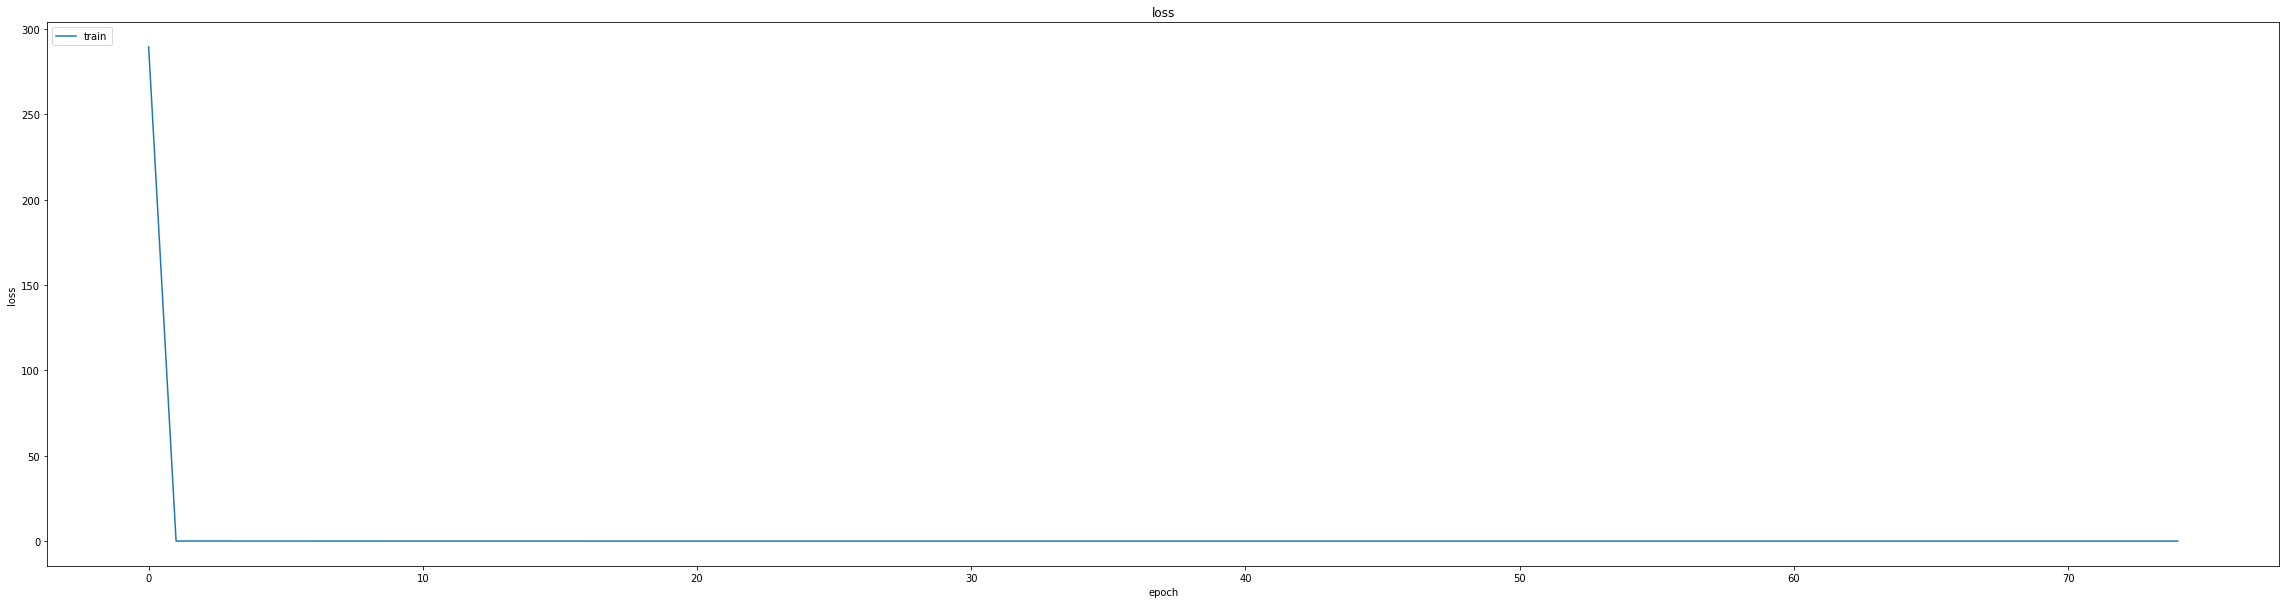

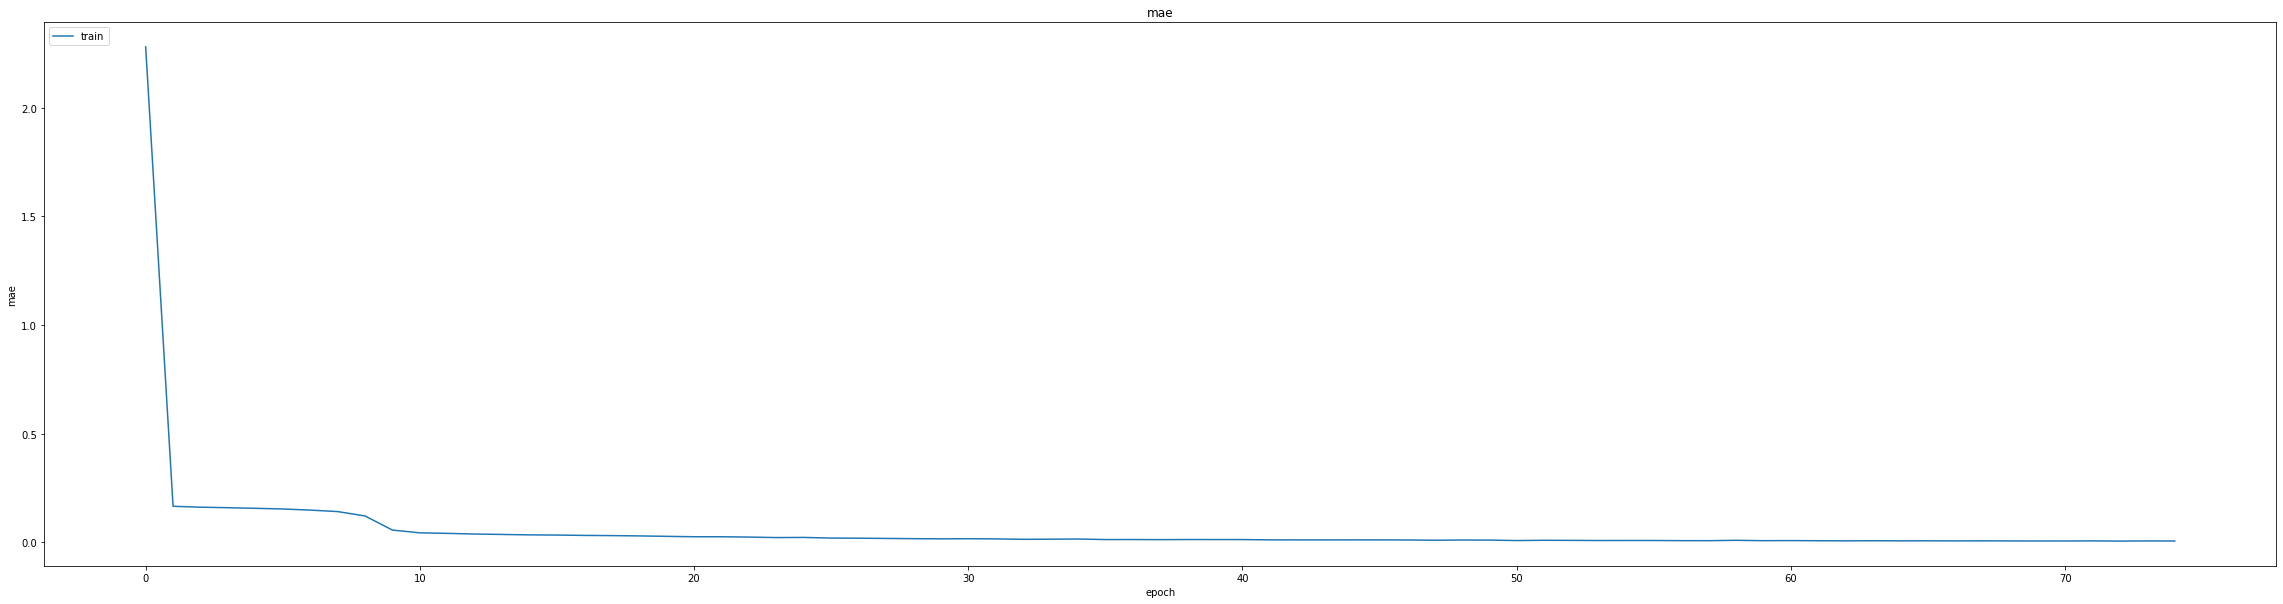

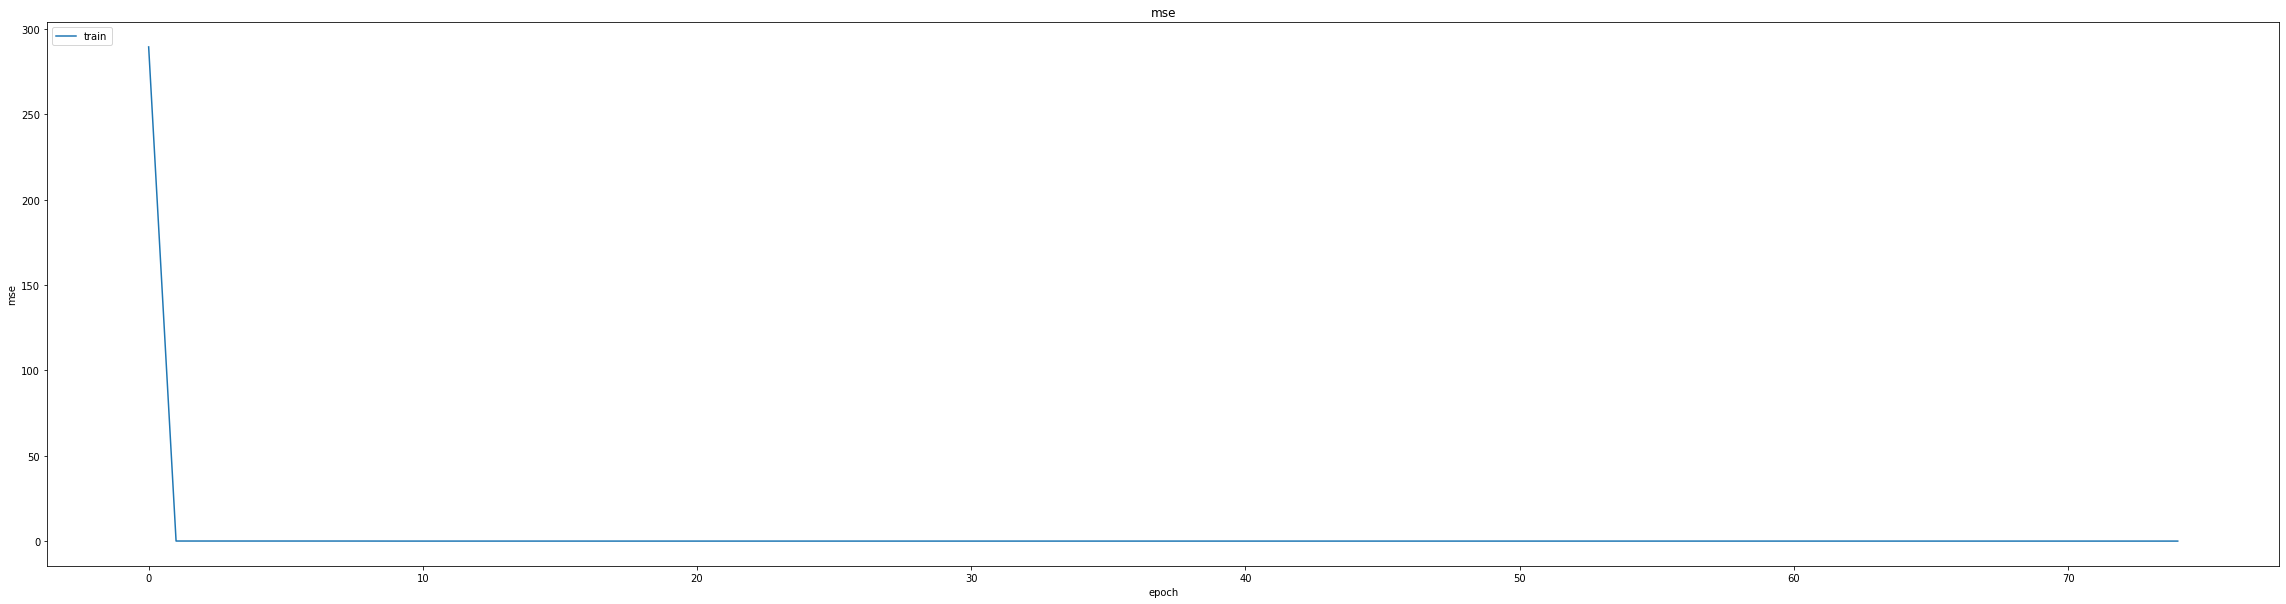

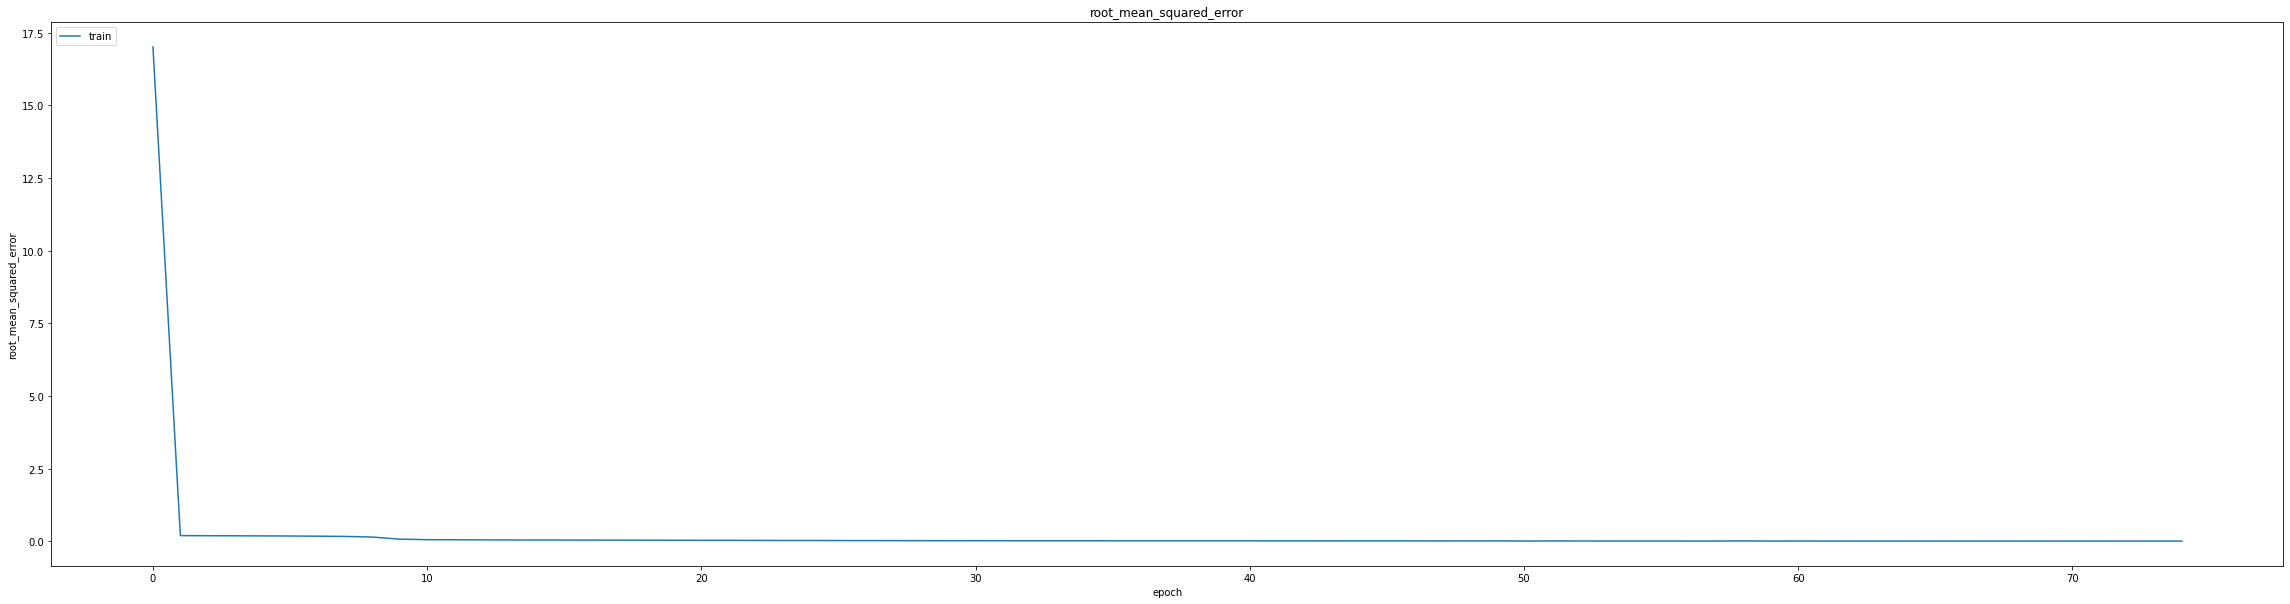

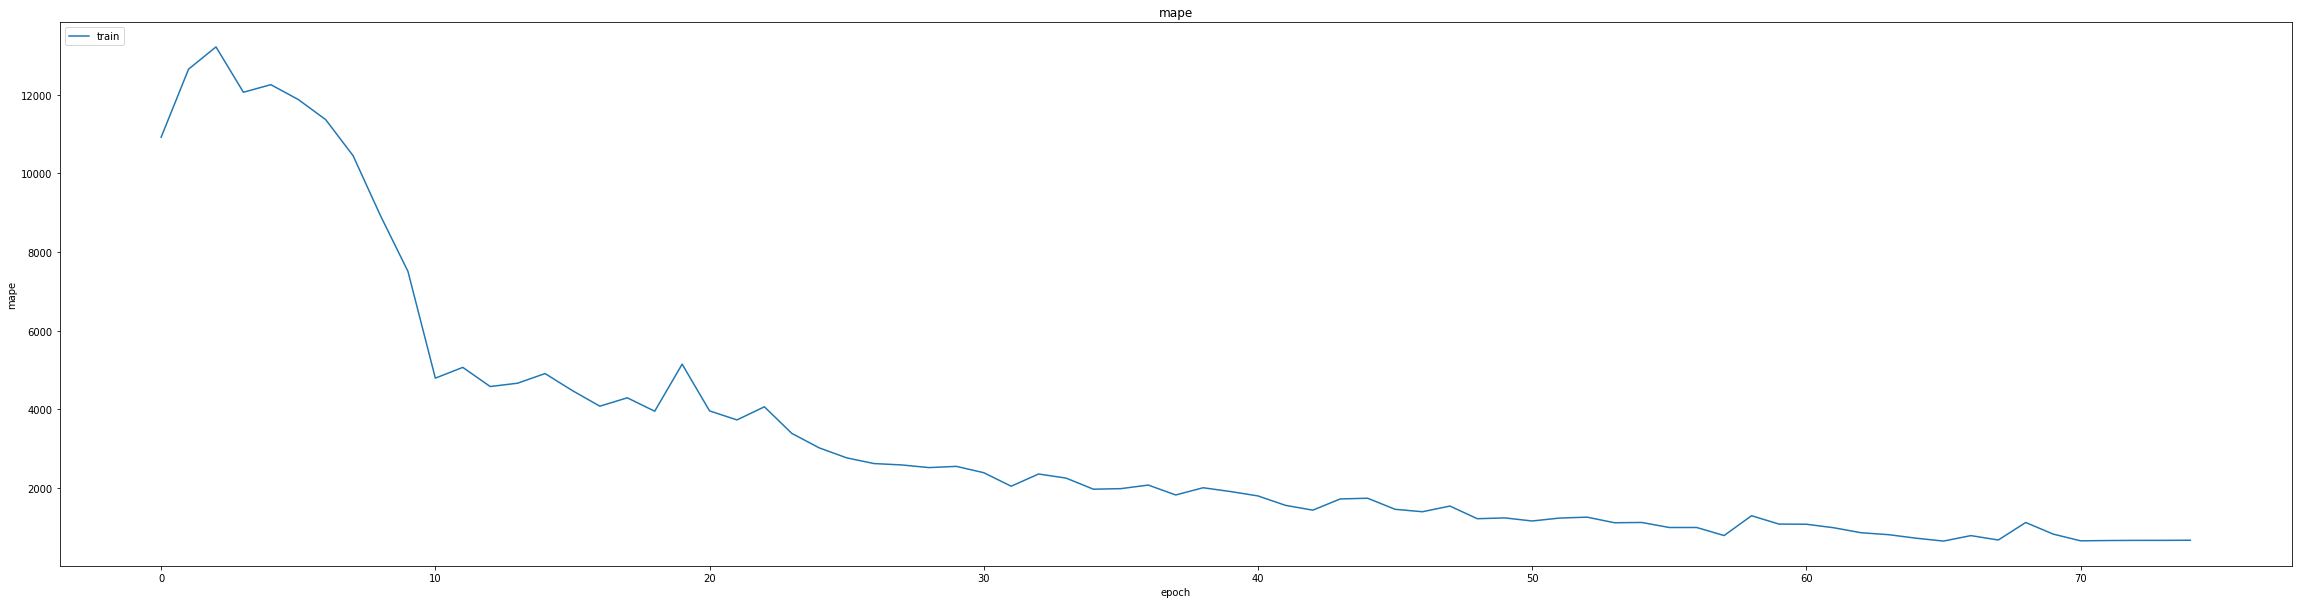

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004619271028786898
0.006468771956861019
348/348 [==============================] - 4s 6ms/step
0.9985121020008481


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
404/406 [============================>.] - ETA: 0s - loss: 4.2158e-04 - mae: 0.0082 - mse: 4.2158e-04 - root_mean_squared_error: 0.0205 - mape: 873.9818
Epoch 1: val_mse did not improve from 0.00004
406/406 [==============================] - 15s 23ms/step - loss: 4.1973e-04 - mae: 0.0082 - mse: 4.1973e-04 - root_mean_squared_error: 0.0205 - mape: 869.9193 - val_loss: 7.5494e-05 - val_mae: 0.0057 - val_mse: 7.5494e-05 - val_root_mean_squared_error: 0.0087 - val_mape: 4792.7319 - lr: 0.0010
Epoch 2/25
403/406 [============================>.] - ETA: 0s - loss: 2.3630e-05 - mae: 0.0037 - mse: 2.3630e-05 - root_mean_squared_error: 0.0049 - mape: 789.5273
Epoch 2: val_mse did not improve from 0.00004
406/406 [==============================] - 7s 17ms/step - loss: 2.3622e-05 - mae: 0.0037 - mse: 2.3622e-05 - root_mean_squared_error: 0.0049 - mape: 783.9102 - val_loss: 4.6248e-05 - val_mae: 0.0042 - val_mse: 4.6248e-05 - val_root_mean_squared_error: 0.0068 - val_mape: 4693.1689 - lr

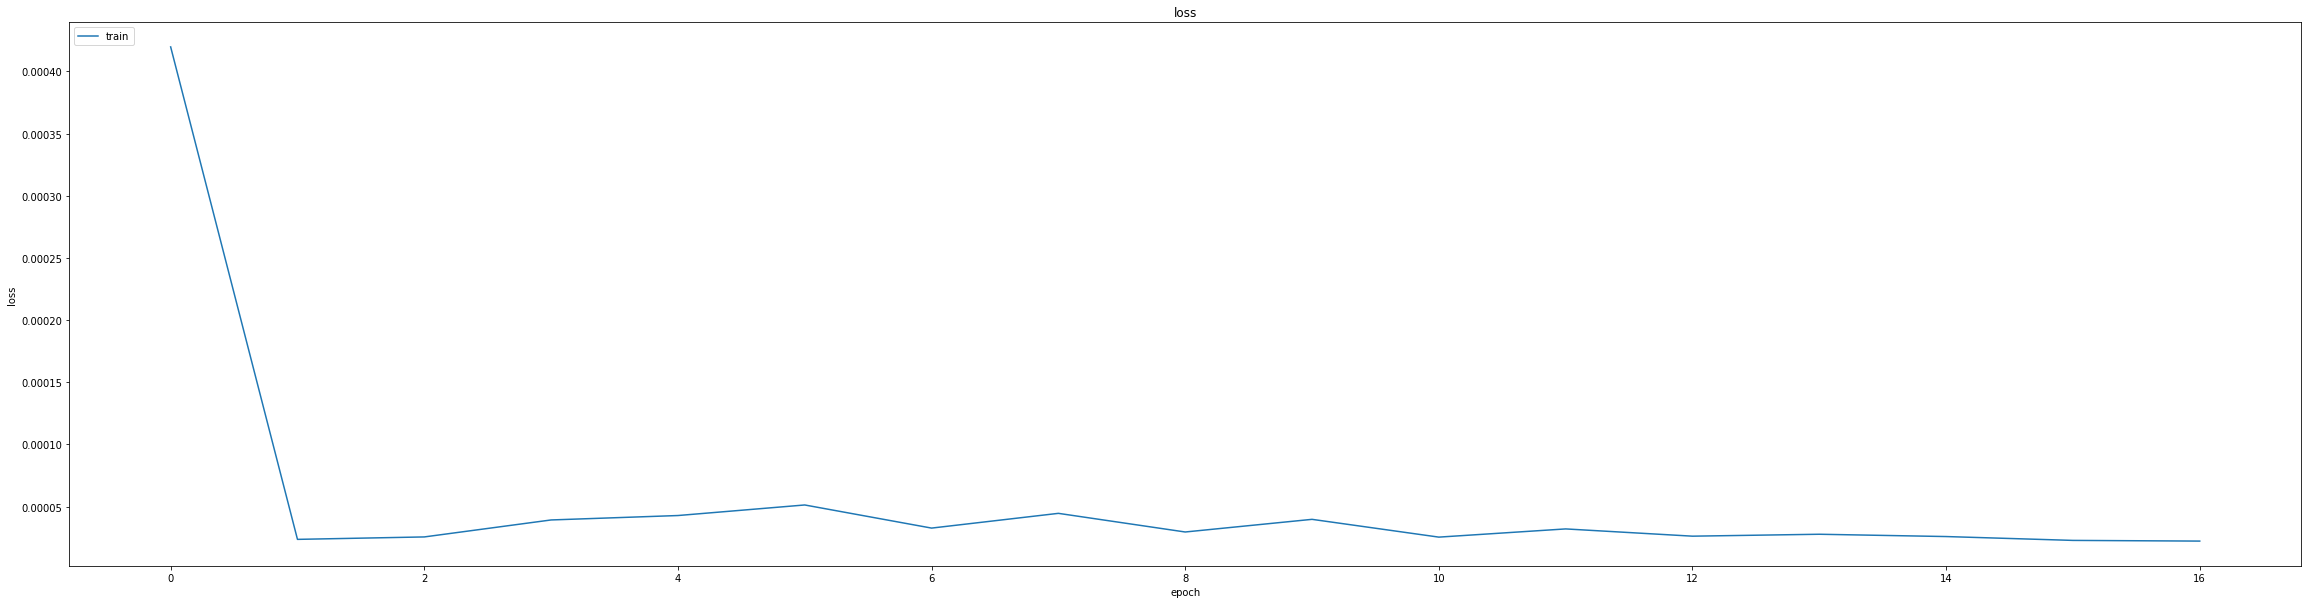

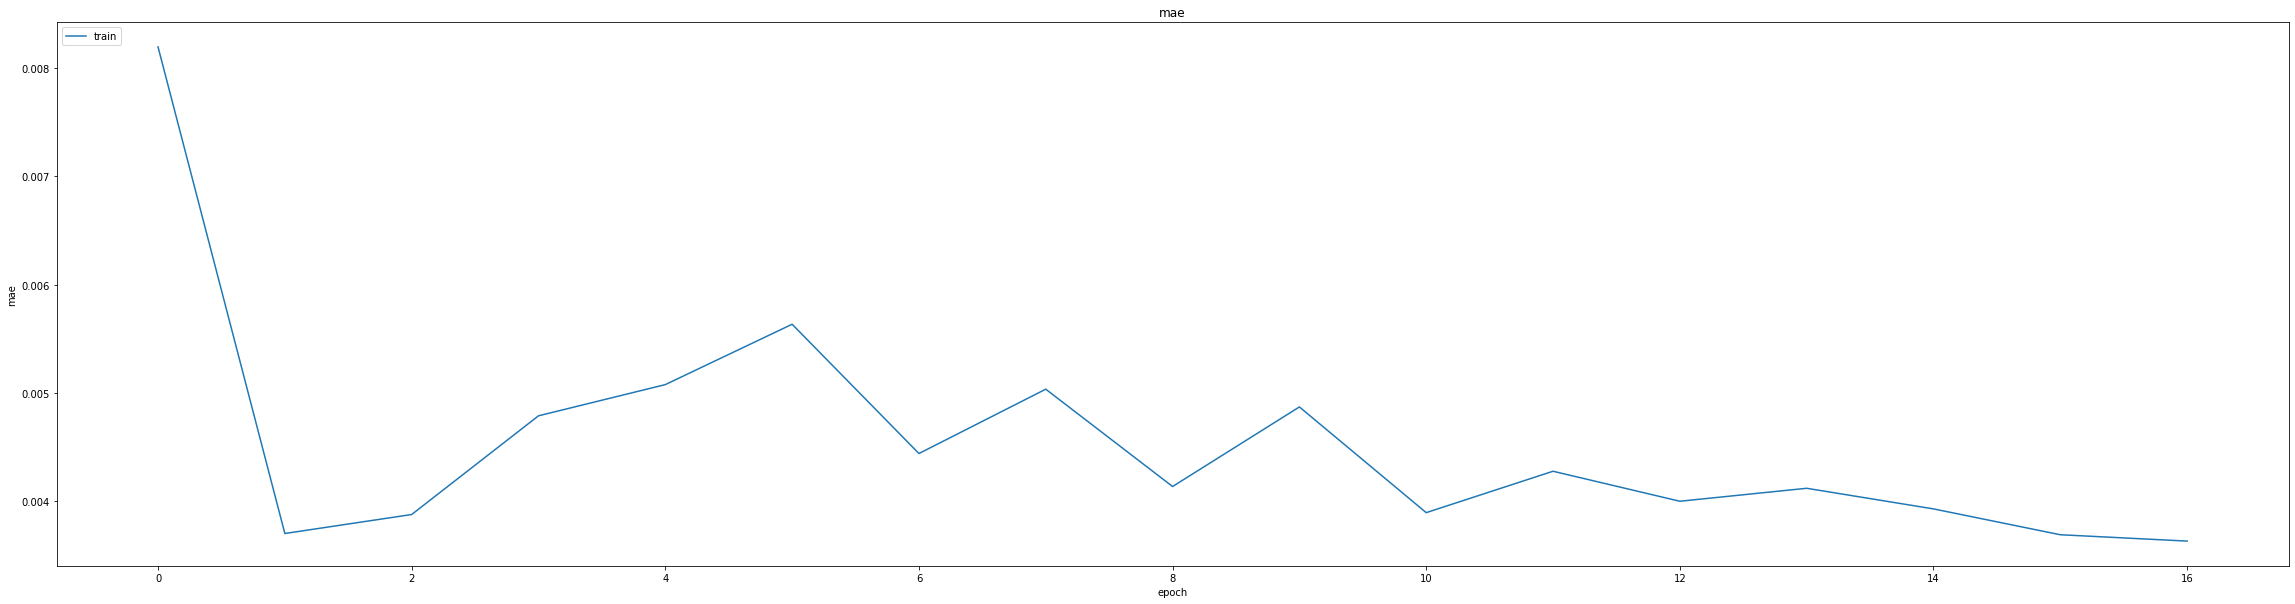

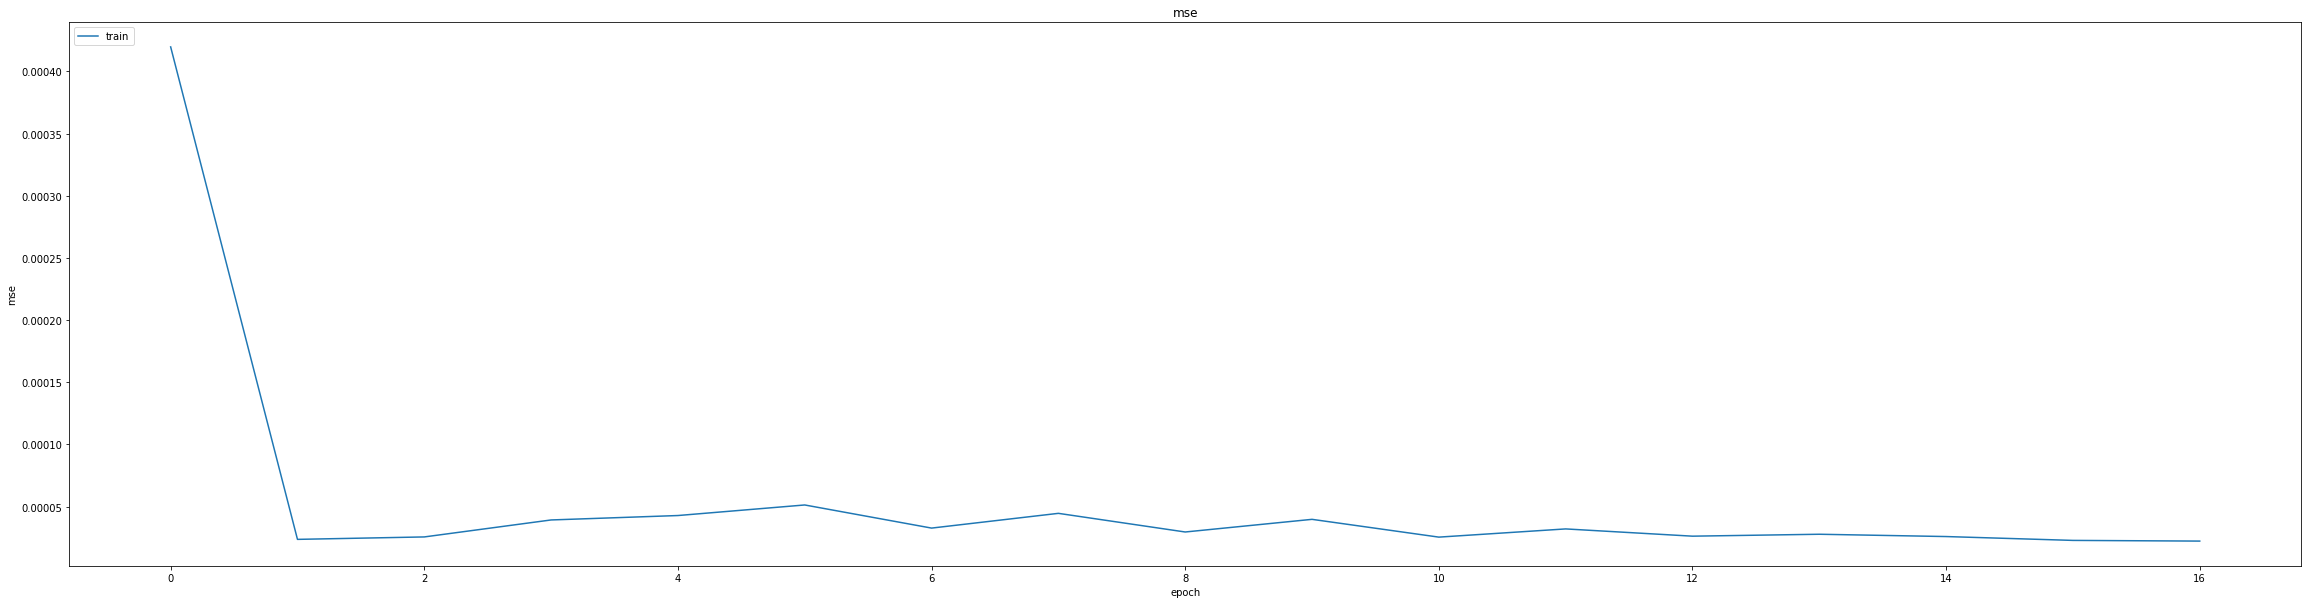

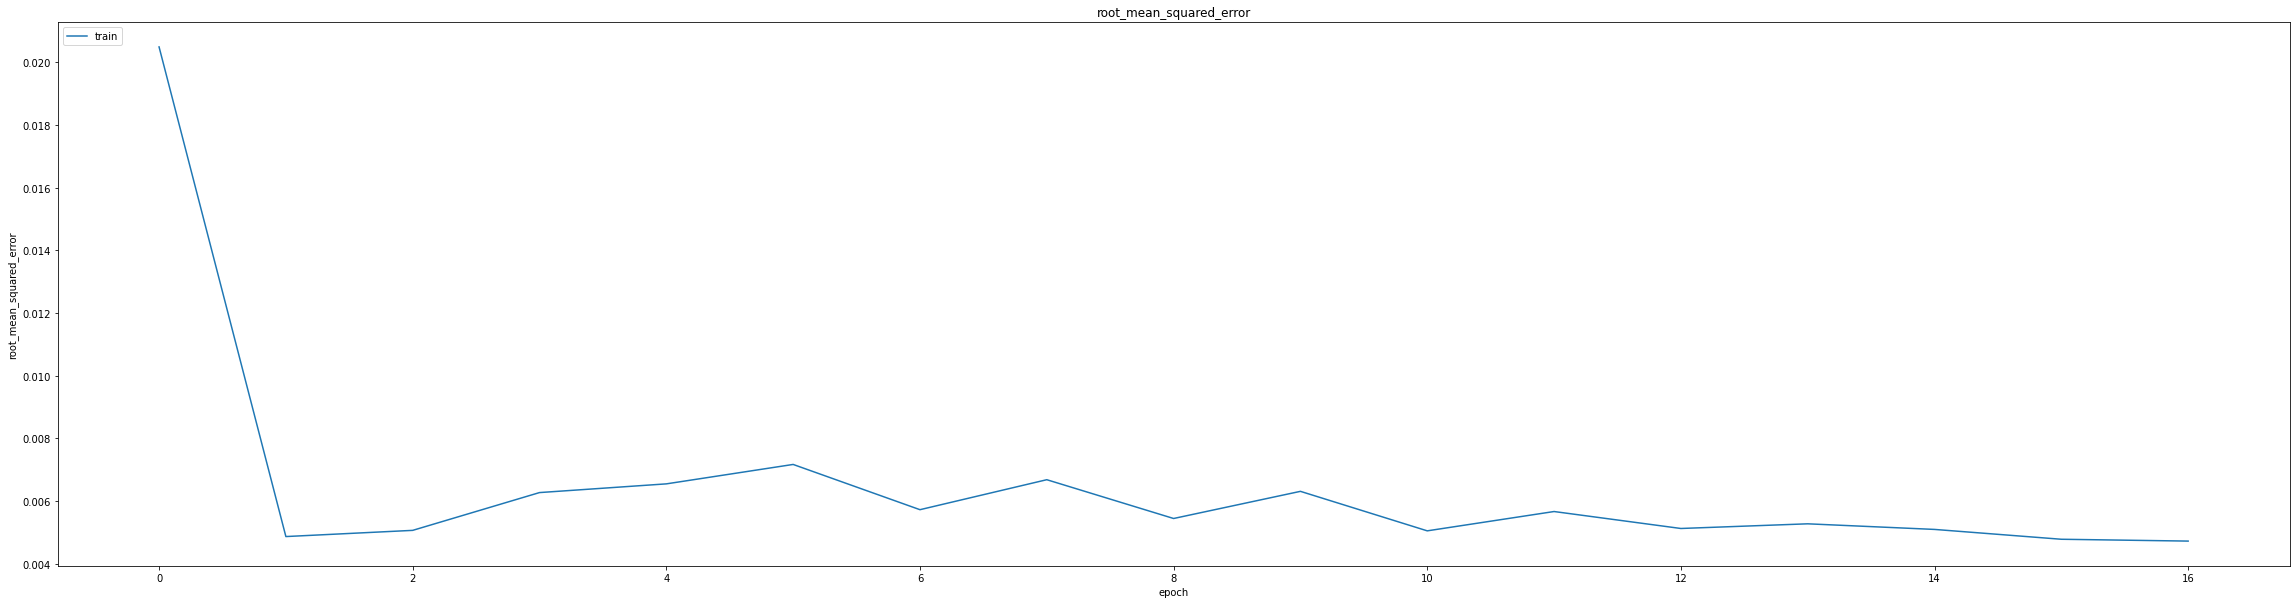

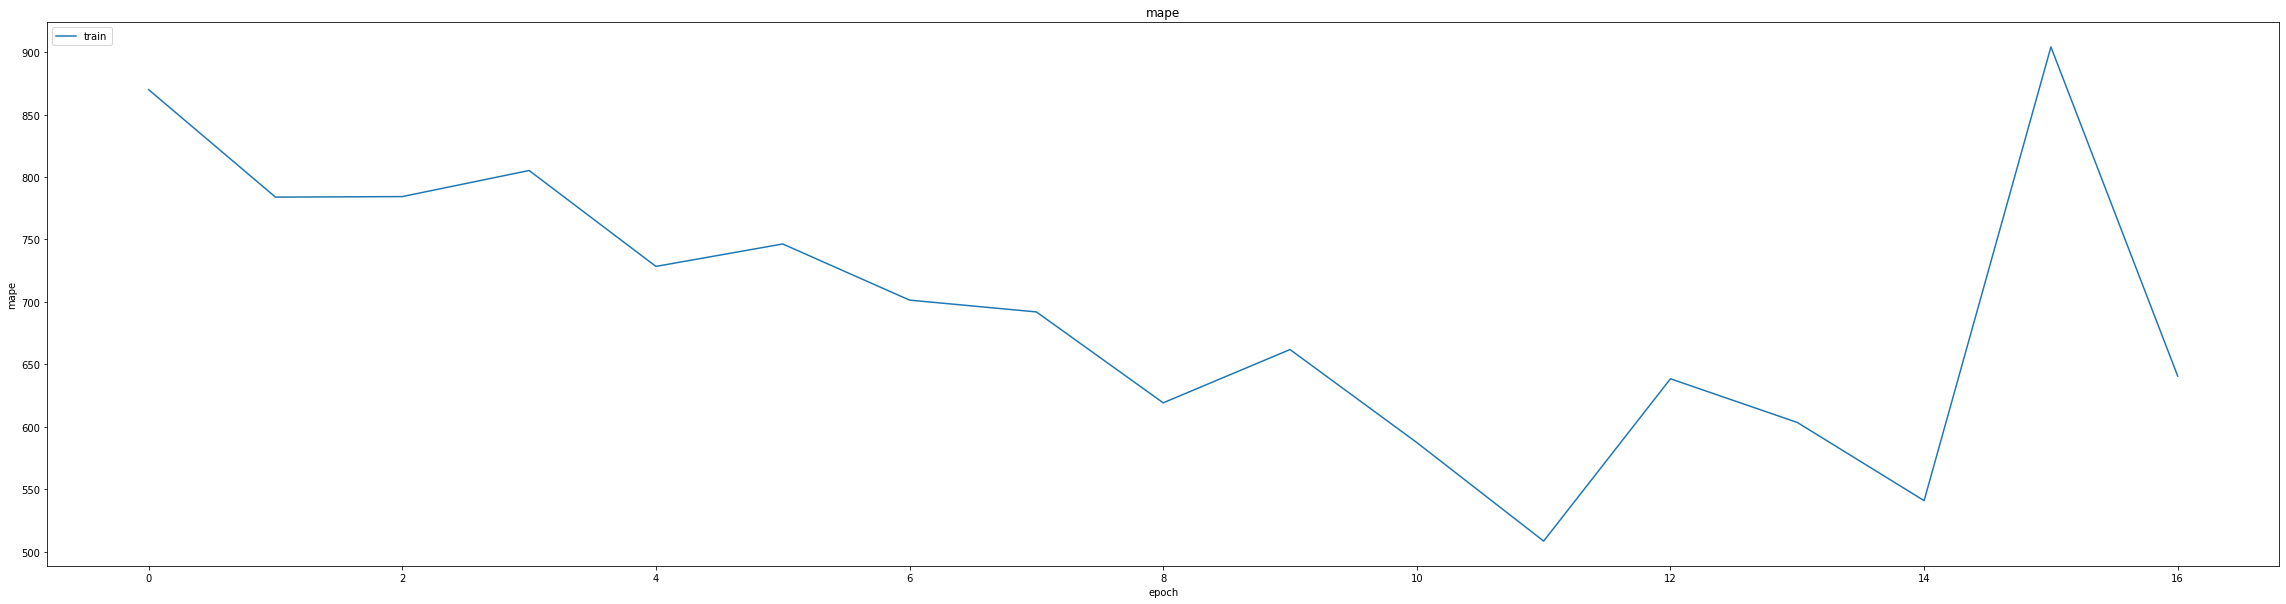

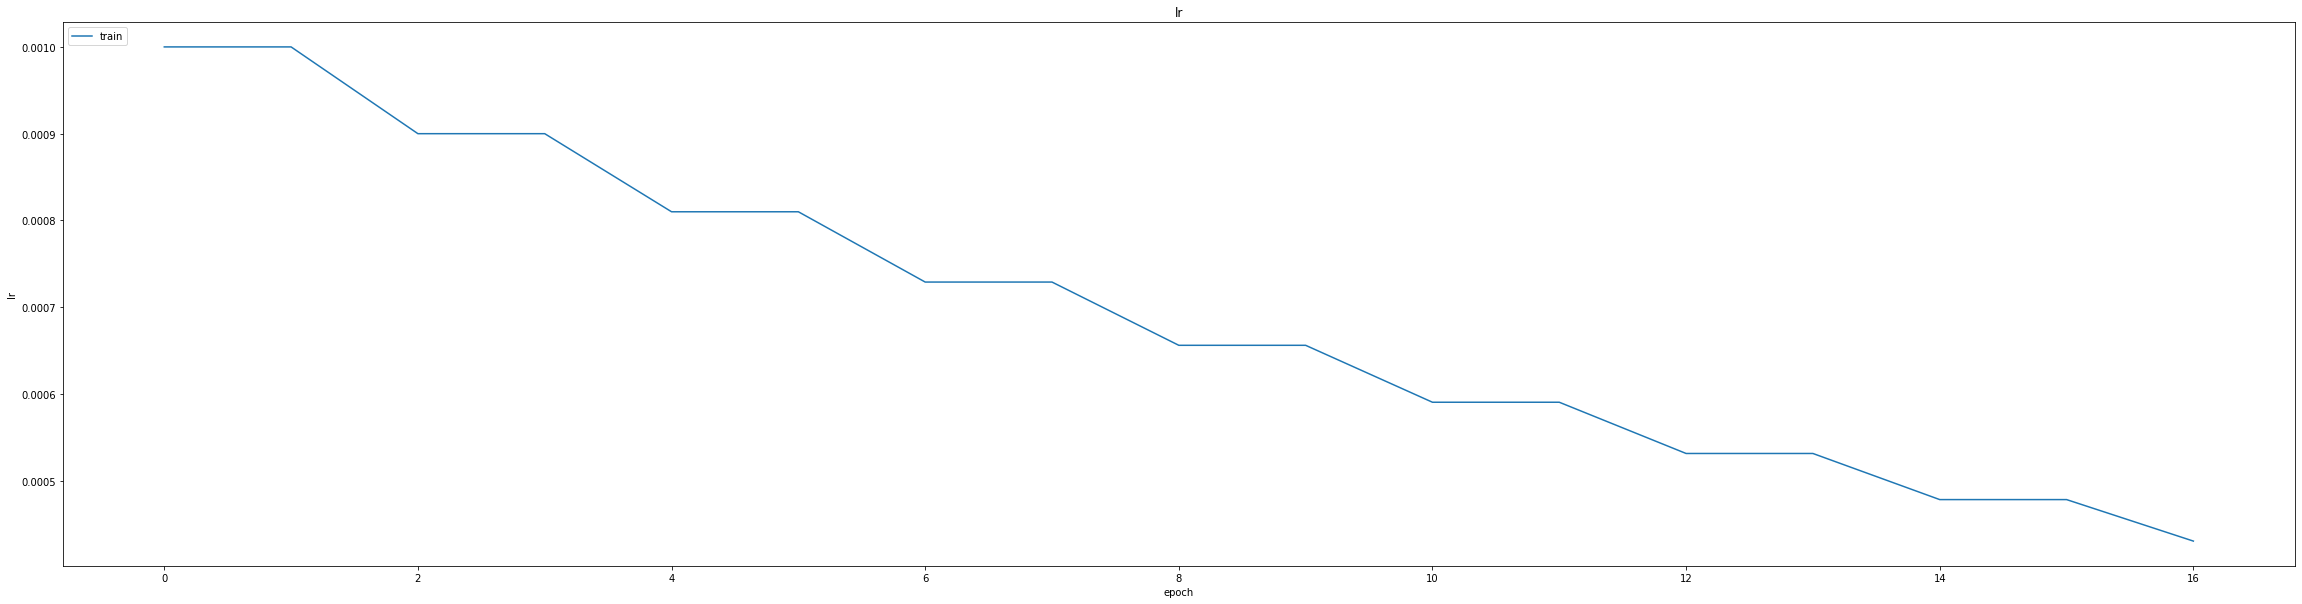

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004158318508416414
0.006800619885325432
348/348 [==============================] - 4s 6ms/step
0.9991959182043644


348/348 [==============================] - 2s 6ms/step


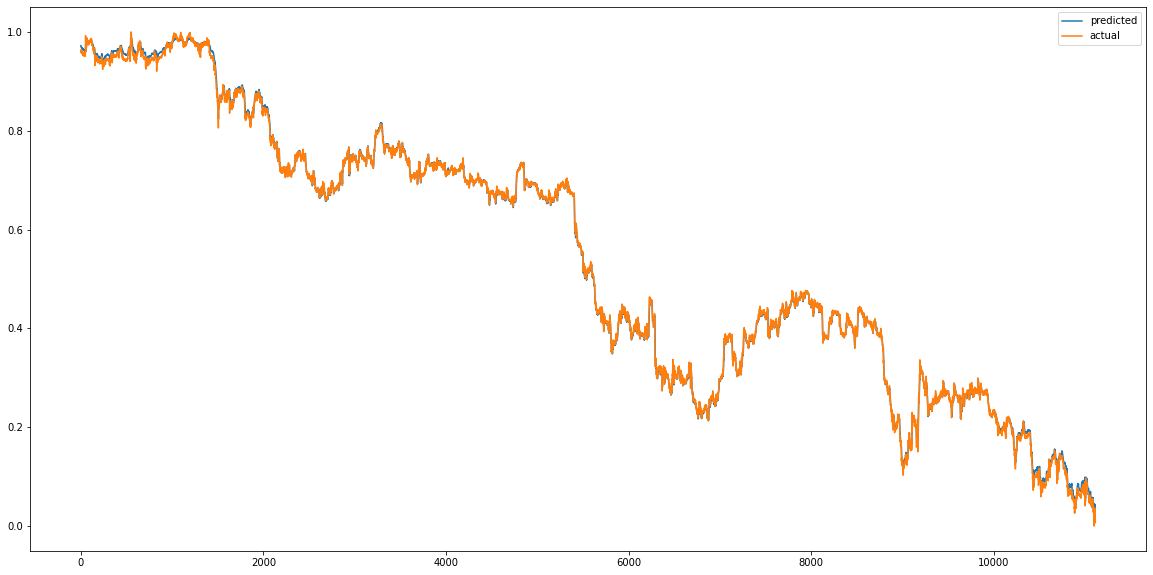

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


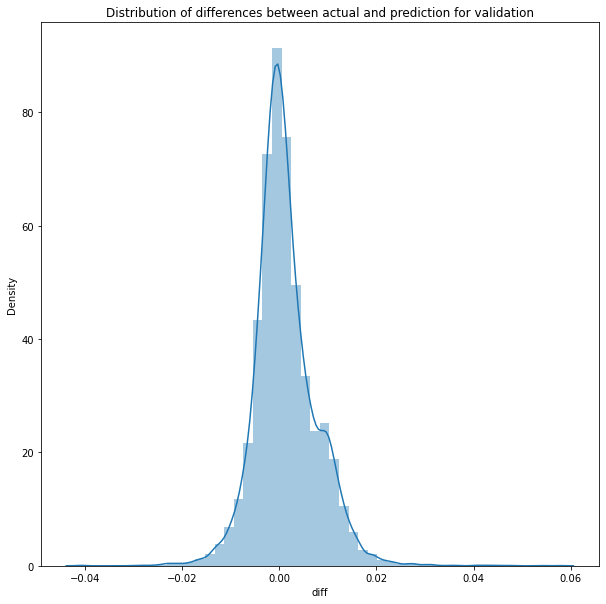

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 6ms/step


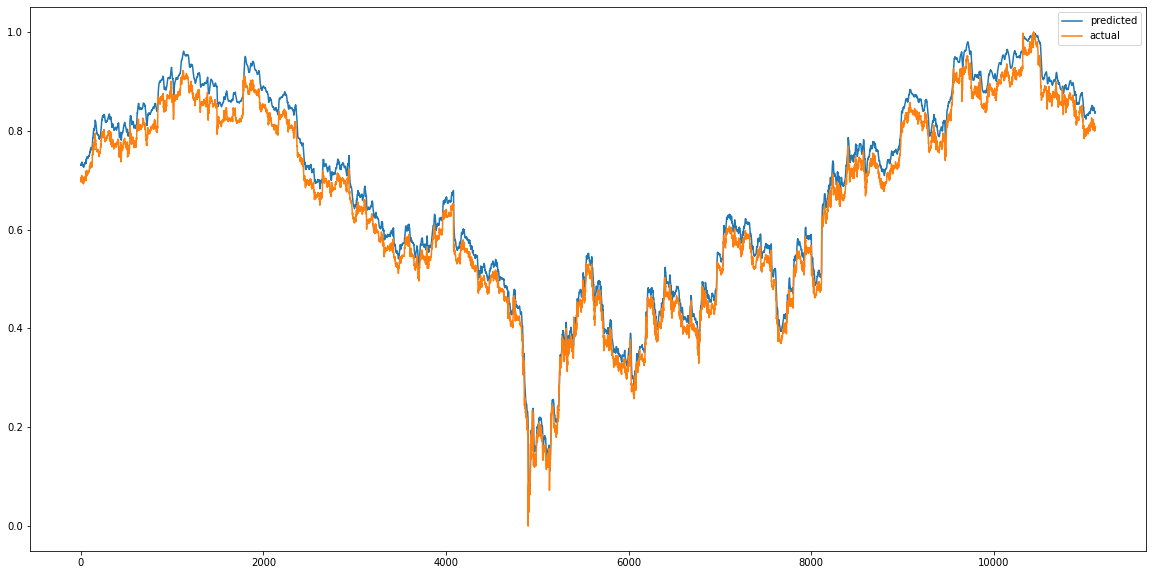

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


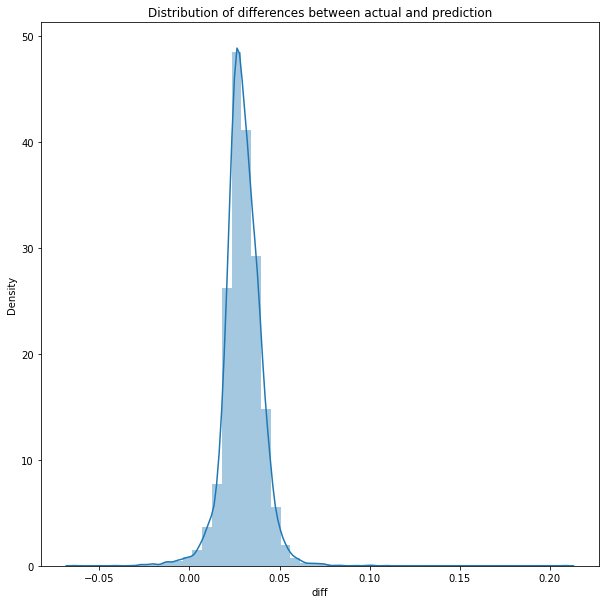

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0009804763237753905
RMSE :  0.03131255856322492
MAE :  0.029771053412316676
348/348 [==============================] - 3s 8ms/step
R2_Score  : 0.9751288598619022


count    11115.000000
mean         0.029572
std          0.010295
min         -0.063590
25%          0.023997
50%          0.029126
75%          0.035495
max          0.208310
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
405/406 [============================>.] - ETA: 0s - loss: 291.1381 - mae: 2.2729 - mse: 291.1381 - root_mean_squared_error: 17.0628 - mape: 13722.6807
Epoch 1: val_mse improved from inf to 0.09065, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 28s 60ms/step - loss: 290.4993 - mae: 2.2682 - mse: 290.4993 - root_mean_squared_error: 17.0440 - mape: 13692.6875 - val_loss: 0.0907 - val_mae: 0.2496 - val_mse: 0.0907 - val_root_mean_squared_error: 0.3011 - val_mape: 60815.1445
Epoch 2/75
405/406 [============================>.] - ETA: 0s - loss: 0.0401 - mae: 0.1670 - mse: 0.0401 - root_mean_squared_error: 0.2003 - mape: 13565.8193
Epoch 2: val_mse improved from 0.09065 to 0.08688, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 21s 51ms/step - loss: 0.0401 - mae: 0.1670 - mse: 0.0401 - root_mean_squared_error: 0.2003 - mape: 13536.1523 - val_loss: 0.0869 - val_mae: 0.2486 - val_mse: 0.0869 - val_root_mean_squared_error: 0.2948 - val_mape: 59369.3555
Epoch 3/75
404/406 [============================>.] - ETA: 0s - loss: 0.0399 - mae: 0.1675 - mse: 0.0399 - root_mean_squared_error: 0.1999 - mape: 13486.1709
Epoch 3: val_mse improved from 0.08688 to 0.08611, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0399 - mae: 0.1675 - mse: 0.0399 - root_mean_squared_error: 0.1999 - mape: 13423.5186 - val_loss: 0.0861 - val_mae: 0.2485 - val_mse: 0.0861 - val_root_mean_squared_error: 0.2934 - val_mape: 59051.5508
Epoch 4/75
404/406 [============================>.] - ETA: 0s - loss: 0.0399 - mae: 0.1677 - mse: 0.0399 - root_mean_squared_error: 0.1997 - mape: 13155.8154
Epoch 4: val_mse improved from 0.08611 to 0.08606, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0399 - mae: 0.1677 - mse: 0.0399 - root_mean_squared_error: 0.1997 - mape: 13094.6963 - val_loss: 0.0861 - val_mae: 0.2484 - val_mse: 0.0861 - val_root_mean_squared_error: 0.2934 - val_mape: 59035.9297
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.0399 - mae: 0.1676 - mse: 0.0399 - root_mean_squared_error: 0.1997 - mape: 12481.6475
Epoch 5: val_mse did not improve from 0.08606
406/406 [==============================] - 5s 12ms/step - loss: 0.0399 - mae: 0.1676 - mse: 0.0399 - root_mean_squared_error: 0.1997 - mape: 12481.6475 - val_loss: 0.0861 - val_mae: 0.2483 - val_mse: 0.0861 - val_root_mean_squared_error: 0.2934 - val_mape: 59045.0117
Epoch 6/75
402/406 [============================>.] - ETA: 0s - loss: 0.0397 - mae: 0.1674 - mse: 0.0397 - root_mean_squared_error: 0.1993 - mape: 12561.4863
Epoch 6: val_mse improved from 0.08606 to 0.08582, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 15s 37ms/step - loss: 0.0397 - mae: 0.1674 - mse: 0.0397 - root_mean_squared_error: 0.1994 - mape: 12441.4873 - val_loss: 0.0858 - val_mae: 0.2481 - val_mse: 0.0858 - val_root_mean_squared_error: 0.2930 - val_mape: 58947.6641
Epoch 7/75
405/406 [============================>.] - ETA: 0s - loss: 0.0398 - mae: 0.1674 - mse: 0.0398 - root_mean_squared_error: 0.1994 - mape: 14289.8164
Epoch 7: val_mse improved from 0.08582 to 0.08570, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0398 - mae: 0.1674 - mse: 0.0398 - root_mean_squared_error: 0.1994 - mape: 14258.5234 - val_loss: 0.0857 - val_mae: 0.2479 - val_mse: 0.0857 - val_root_mean_squared_error: 0.2927 - val_mape: 58903.4336
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 0.0397 - mae: 0.1673 - mse: 0.0397 - root_mean_squared_error: 0.1992 - mape: 12808.5146
Epoch 8: val_mse did not improve from 0.08570
406/406 [==============================] - 5s 12ms/step - loss: 0.0397 - mae: 0.1673 - mse: 0.0397 - root_mean_squared_error: 0.1992 - mape: 12749.0332 - val_loss: 0.0860 - val_mae: 0.2478 - val_mse: 0.0860 - val_root_mean_squared_error: 0.2933 - val_mape: 59038.4180
Epoch 9/75
404/406 [============================>.] - ETA: 0s - loss: 0.0395 - mae: 0.1669 - mse: 0.0395 - root_mean_squared_error: 0.1989 - mape: 12772.1289
Epoch 9: val_mse improved from 0.08570 to 0.08537, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 17s 41ms/step - loss: 0.0396 - mae: 0.1669 - mse: 0.0396 - root_mean_squared_error: 0.1989 - mape: 12712.8574 - val_loss: 0.0854 - val_mae: 0.2474 - val_mse: 0.0854 - val_root_mean_squared_error: 0.2922 - val_mape: 58783.7383
Epoch 10/75
405/406 [============================>.] - ETA: 0s - loss: 0.0394 - mae: 0.1668 - mse: 0.0394 - root_mean_squared_error: 0.1986 - mape: 13638.7676
Epoch 10: val_mse did not improve from 0.08537
406/406 [==============================] - 4s 11ms/step - loss: 0.0394 - mae: 0.1668 - mse: 0.0394 - root_mean_squared_error: 0.1986 - mape: 13608.9121 - val_loss: 0.0855 - val_mae: 0.2472 - val_mse: 0.0855 - val_root_mean_squared_error: 0.2924 - val_mape: 58861.3633
Epoch 11/75
404/406 [============================>.] - ETA: 0s - loss: 0.0393 - mae: 0.1663 - mse: 0.0393 - root_mean_squared_error: 0.1982 - mape: 12787.1543
Epoch 11: val_mse did not improve from 0.08537
406/406 [==============================] - 4s 11ms/

406/406 [==============================] - 16s 38ms/step - loss: 0.0392 - mae: 0.1661 - mse: 0.0392 - root_mean_squared_error: 0.1979 - mape: 12335.5645 - val_loss: 0.0849 - val_mae: 0.2461 - val_mse: 0.0849 - val_root_mean_squared_error: 0.2913 - val_mape: 58649.0273
Epoch 13/75
403/406 [============================>.] - ETA: 0s - loss: 0.0388 - mae: 0.1656 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 13161.7510
Epoch 13: val_mse improved from 0.08487 to 0.08382, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0388 - mae: 0.1656 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 13068.3066 - val_loss: 0.0838 - val_mae: 0.2450 - val_mse: 0.0838 - val_root_mean_squared_error: 0.2895 - val_mape: 58266.4336
Epoch 14/75
405/406 [============================>.] - ETA: 0s - loss: 0.0384 - mae: 0.1644 - mse: 0.0384 - root_mean_squared_error: 0.1959 - mape: 12928.9717
Epoch 14: val_mse improved from 0.08382 to 0.08232, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 0.0384 - mae: 0.1644 - mse: 0.0384 - root_mean_squared_error: 0.1959 - mape: 12900.6729 - val_loss: 0.0823 - val_mae: 0.2427 - val_mse: 0.0823 - val_root_mean_squared_error: 0.2869 - val_mape: 57799.4570
Epoch 15/75
405/406 [============================>.] - ETA: 0s - loss: 0.0371 - mae: 0.1615 - mse: 0.0371 - root_mean_squared_error: 0.1926 - mape: 13097.8037
Epoch 15: val_mse improved from 0.08232 to 0.07784, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0371 - mae: 0.1615 - mse: 0.0371 - root_mean_squared_error: 0.1926 - mape: 13069.1230 - val_loss: 0.0778 - val_mae: 0.2355 - val_mse: 0.0778 - val_root_mean_squared_error: 0.2790 - val_mape: 56626.6914
Epoch 16/75
401/406 [============================>.] - ETA: 0s - loss: 0.0297 - mae: 0.1410 - mse: 0.0297 - root_mean_squared_error: 0.1724 - mape: 12093.7920
Epoch 16: val_mse improved from 0.07784 to 0.03569, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0295 - mae: 0.1404 - mse: 0.0295 - root_mean_squared_error: 0.1718 - mape: 11948.3750 - val_loss: 0.0357 - val_mae: 0.1471 - val_mse: 0.0357 - val_root_mean_squared_error: 0.1889 - val_mape: 46041.6445
Epoch 17/75
403/406 [============================>.] - ETA: 0s - loss: 0.0070 - mae: 0.0605 - mse: 0.0070 - root_mean_squared_error: 0.0836 - mape: 9831.4824
Epoch 17: val_mse improved from 0.03569 to 0.01092, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0070 - mae: 0.0604 - mse: 0.0070 - root_mean_squared_error: 0.0835 - mape: 9761.5791 - val_loss: 0.0109 - val_mae: 0.0672 - val_mse: 0.0109 - val_root_mean_squared_error: 0.1045 - val_mape: 33723.4453
Epoch 18/75
405/406 [============================>.] - ETA: 0s - loss: 0.0035 - mae: 0.0438 - mse: 0.0035 - root_mean_squared_error: 0.0593 - mape: 7238.8740
Epoch 18: val_mse improved from 0.01092 to 0.00584, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0035 - mae: 0.0438 - mse: 0.0035 - root_mean_squared_error: 0.0593 - mape: 7223.0156 - val_loss: 0.0058 - val_mae: 0.0470 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0764 - val_mape: 28627.1230
Epoch 19/75
404/406 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0369 - mse: 0.0025 - root_mean_squared_error: 0.0502 - mape: 5707.5098
Epoch 19: val_mse improved from 0.00584 to 0.00433, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0025 - mae: 0.0369 - mse: 0.0025 - root_mean_squared_error: 0.0501 - mape: 5680.9492 - val_loss: 0.0043 - val_mae: 0.0383 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0658 - val_mape: 26535.4551
Epoch 20/75
406/406 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0336 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 5378.1753
Epoch 20: val_mse improved from 0.00433 to 0.00417, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0021 - mae: 0.0336 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 5378.1753 - val_loss: 0.0042 - val_mae: 0.0454 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0645 - val_mape: 24987.1973
Epoch 21/75
401/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0309 - mse: 0.0018 - root_mean_squared_error: 0.0420 - mape: 5377.1255
Epoch 21: val_mse improved from 0.00417 to 0.00310, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 38ms/step - loss: 0.0018 - mae: 0.0309 - mse: 0.0018 - root_mean_squared_error: 0.0420 - mape: 5312.4341 - val_loss: 0.0031 - val_mae: 0.0328 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0556 - val_mape: 23808.1680
Epoch 22/75
402/406 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0290 - mse: 0.0015 - root_mean_squared_error: 0.0394 - mape: 5168.4185
Epoch 22: val_mse improved from 0.00310 to 0.00276, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0016 - mae: 0.0291 - mse: 0.0016 - root_mean_squared_error: 0.0394 - mape: 5118.9546 - val_loss: 0.0028 - val_mae: 0.0316 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0525 - val_mape: 22972.9902
Epoch 23/75
402/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0264 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 5174.8706
Epoch 23: val_mse improved from 0.00276 to 0.00234, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0013 - mae: 0.0264 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 5125.3389 - val_loss: 0.0023 - val_mae: 0.0299 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0484 - val_mape: 21622.8496
Epoch 24/75
402/406 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0234 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 4956.4199
Epoch 24: val_mse improved from 0.00234 to 0.00186, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0010 - mae: 0.0234 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 4908.9541 - val_loss: 0.0019 - val_mae: 0.0254 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0432 - val_mape: 20372.4082
Epoch 25/75
403/406 [============================>.] - ETA: 0s - loss: 9.8485e-04 - mae: 0.0233 - mse: 9.8485e-04 - root_mean_squared_error: 0.0314 - mape: 4498.7168
Epoch 25: val_mse improved from 0.00186 to 0.00153, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 9.8645e-04 - mae: 0.0233 - mse: 9.8645e-04 - root_mean_squared_error: 0.0314 - mape: 4466.7520 - val_loss: 0.0015 - val_mae: 0.0225 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0391 - val_mape: 19302.2227
Epoch 26/75
404/406 [============================>.] - ETA: 0s - loss: 7.8451e-04 - mae: 0.0205 - mse: 7.8451e-04 - root_mean_squared_error: 0.0280 - mape: 4263.8779
Epoch 26: val_mse improved from 0.00153 to 0.00138, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 7.8758e-04 - mae: 0.0206 - mse: 7.8758e-04 - root_mean_squared_error: 0.0281 - mape: 4244.0405 - val_loss: 0.0014 - val_mae: 0.0223 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0372 - val_mape: 18138.0176
Epoch 27/75
403/406 [============================>.] - ETA: 0s - loss: 7.5122e-04 - mae: 0.0204 - mse: 7.5122e-04 - root_mean_squared_error: 0.0274 - mape: 3819.9641
Epoch 27: val_mse improved from 0.00138 to 0.00114, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 7.5037e-04 - mae: 0.0204 - mse: 7.5037e-04 - root_mean_squared_error: 0.0274 - mape: 3792.7903 - val_loss: 0.0011 - val_mae: 0.0202 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 17162.7617
Epoch 28/75
405/406 [============================>.] - ETA: 0s - loss: 6.5087e-04 - mae: 0.0190 - mse: 6.5087e-04 - root_mean_squared_error: 0.0255 - mape: 3723.8203
Epoch 28: val_mse improved from 0.00114 to 0.00089, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 6.5085e-04 - mae: 0.0190 - mse: 6.5085e-04 - root_mean_squared_error: 0.0255 - mape: 3715.6575 - val_loss: 8.9416e-04 - val_mae: 0.0182 - val_mse: 8.9416e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 16002.8926
Epoch 29/75
404/406 [============================>.] - ETA: 0s - loss: 5.4981e-04 - mae: 0.0176 - mse: 5.4981e-04 - root_mean_squared_error: 0.0234 - mape: 3396.4106
Epoch 29: val_mse did not improve from 0.00089
406/406 [==============================] - 5s 11ms/step - loss: 5.4960e-04 - mae: 0.0176 - mse: 5.4960e-04 - root_mean_squared_error: 0.0234 - mape: 3380.6072 - val_loss: 9.7817e-04 - val_mae: 0.0235 - val_mse: 9.7817e-04 - val_root_mean_squared_error: 0.0313 - val_mape: 15038.5068
Epoch 30/75
403/406 [============================>.] - ETA: 0s - loss: 4.7567e-04 - mae: 0.0164 - mse: 4.7567e-04 - root_mean_squared_error: 0.0218 - mape: 3140.1191
Epoch 30: val_mse improved from 0.00089 to 0.00086, sa

406/406 [==============================] - 15s 38ms/step - loss: 4.7493e-04 - mae: 0.0164 - mse: 4.7493e-04 - root_mean_squared_error: 0.0218 - mape: 3117.7791 - val_loss: 8.5758e-04 - val_mae: 0.0227 - val_mse: 8.5758e-04 - val_root_mean_squared_error: 0.0293 - val_mape: 14179.5967
Epoch 31/75
404/406 [============================>.] - ETA: 0s - loss: 4.6308e-04 - mae: 0.0164 - mse: 4.6308e-04 - root_mean_squared_error: 0.0215 - mape: 3415.6814
Epoch 31: val_mse improved from 0.00086 to 0.00059, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 4.6316e-04 - mae: 0.0164 - mse: 4.6316e-04 - root_mean_squared_error: 0.0215 - mape: 3399.7998 - val_loss: 5.8857e-04 - val_mae: 0.0161 - val_mse: 5.8857e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 13481.0703
Epoch 32/75
405/406 [============================>.] - ETA: 0s - loss: 4.0988e-04 - mae: 0.0154 - mse: 4.0988e-04 - root_mean_squared_error: 0.0202 - mape: 2876.5923
Epoch 32: val_mse did not improve from 0.00059
406/406 [==============================] - 4s 11ms/step - loss: 4.0960e-04 - mae: 0.0154 - mse: 4.0960e-04 - root_mean_squared_error: 0.0202 - mape: 2870.2852 - val_loss: 6.9912e-04 - val_mae: 0.0209 - val_mse: 6.9912e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 12718.5068
Epoch 33/75
401/406 [============================>.] - ETA: 0s - loss: 3.8060e-04 - mae: 0.0148 - mse: 3.8060e-04 - root_mean_squared_error: 0.0195 - mape: 2743.2913
Epoch 33: val_mse did not improve from 0.00059
406/406

406/406 [==============================] - 15s 37ms/step - loss: 3.3709e-04 - mae: 0.0140 - mse: 3.3709e-04 - root_mean_squared_error: 0.0184 - mape: 2564.7959 - val_loss: 3.9088e-04 - val_mae: 0.0131 - val_mse: 3.9088e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 11696.4727
Epoch 35/75
405/406 [============================>.] - ETA: 0s - loss: 3.1696e-04 - mae: 0.0136 - mse: 3.1696e-04 - root_mean_squared_error: 0.0178 - mape: 2419.8618
Epoch 35: val_mse did not improve from 0.00039
406/406 [==============================] - 4s 11ms/step - loss: 3.1662e-04 - mae: 0.0136 - mse: 3.1662e-04 - root_mean_squared_error: 0.0178 - mape: 2414.5562 - val_loss: 4.3398e-04 - val_mae: 0.0150 - val_mse: 4.3398e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 11223.1982
Epoch 36/75
405/406 [============================>.] - ETA: 0s - loss: 3.0881e-04 - mae: 0.0134 - mse: 3.0881e-04 - root_mean_squared_error: 0.0176 - mape: 2528.2571
Epoch 36: val_mse did not improve from 0.00039
406/406

406/406 [==============================] - 15s 37ms/step - loss: 2.6719e-04 - mae: 0.0126 - mse: 2.6719e-04 - root_mean_squared_error: 0.0163 - mape: 2330.1550 - val_loss: 3.9070e-04 - val_mae: 0.0155 - val_mse: 3.9070e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 9869.5049
Epoch 39/75
403/406 [============================>.] - ETA: 0s - loss: 2.5763e-04 - mae: 0.0124 - mse: 2.5763e-04 - root_mean_squared_error: 0.0161 - mape: 2075.2117
Epoch 39: val_mse improved from 0.00039 to 0.00038, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 2.5733e-04 - mae: 0.0124 - mse: 2.5733e-04 - root_mean_squared_error: 0.0160 - mape: 2060.4482 - val_loss: 3.8185e-04 - val_mae: 0.0148 - val_mse: 3.8185e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 9734.5225
Epoch 40/75
403/406 [============================>.] - ETA: 0s - loss: 2.6105e-04 - mae: 0.0126 - mse: 2.6105e-04 - root_mean_squared_error: 0.0162 - mape: 2284.4111
Epoch 40: val_mse did not improve from 0.00038
406/406 [==============================] - 4s 11ms/step - loss: 2.6201e-04 - mae: 0.0126 - mse: 2.6201e-04 - root_mean_squared_error: 0.0162 - mape: 2268.1606 - val_loss: 0.0010 - val_mae: 0.0288 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0323 - val_mape: 9367.1191
Epoch 41/75
404/406 [============================>.] - ETA: 0s - loss: 2.3438e-04 - mae: 0.0118 - mse: 2.3438e-04 - root_mean_squared_error: 0.0153 - mape: 2010.8490
Epoch 41: val_mse did not improve from 0.00038
406/406 [========

406/406 [==============================] - 15s 37ms/step - loss: 2.5581e-04 - mae: 0.0125 - mse: 2.5581e-04 - root_mean_squared_error: 0.0160 - mape: 1957.4248 - val_loss: 2.8584e-04 - val_mae: 0.0128 - val_mse: 2.8584e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 9047.6562
Epoch 43/75
402/406 [============================>.] - ETA: 0s - loss: 1.9288e-04 - mae: 0.0107 - mse: 1.9288e-04 - root_mean_squared_error: 0.0139 - mape: 1957.5193
Epoch 43: val_mse improved from 0.00029 to 0.00029, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 1.9336e-04 - mae: 0.0107 - mse: 1.9336e-04 - root_mean_squared_error: 0.0139 - mape: 1938.7817 - val_loss: 2.8521e-04 - val_mae: 0.0124 - val_mse: 2.8521e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 8989.7207
Epoch 44/75
405/406 [============================>.] - ETA: 0s - loss: 2.2411e-04 - mae: 0.0116 - mse: 2.2411e-04 - root_mean_squared_error: 0.0150 - mape: 1836.6198
Epoch 44: val_mse did not improve from 0.00029
406/406 [==============================] - 4s 11ms/step - loss: 2.2442e-04 - mae: 0.0116 - mse: 2.2442e-04 - root_mean_squared_error: 0.0150 - mape: 1832.5955 - val_loss: 6.4686e-04 - val_mae: 0.0222 - val_mse: 6.4686e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 8358.1992
Epoch 45/75
403/406 [============================>.] - ETA: 0s - loss: 2.2518e-04 - mae: 0.0116 - mse: 2.2518e-04 - root_mean_squared_error: 0.0150 - mape: 1822.0223
Epoch 45: val_mse improved from 0.00029 to 0.00024, savi

406/406 [==============================] - 15s 38ms/step - loss: 2.2447e-04 - mae: 0.0116 - mse: 2.2447e-04 - root_mean_squared_error: 0.0150 - mape: 1809.0579 - val_loss: 2.4357e-04 - val_mae: 0.0113 - val_mse: 2.4357e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 8205.4102
Epoch 46/75
406/406 [==============================] - ETA: 0s - loss: 1.7626e-04 - mae: 0.0103 - mse: 1.7626e-04 - root_mean_squared_error: 0.0133 - mape: 1742.0082
Epoch 46: val_mse did not improve from 0.00024
406/406 [==============================] - 4s 11ms/step - loss: 1.7626e-04 - mae: 0.0103 - mse: 1.7626e-04 - root_mean_squared_error: 0.0133 - mape: 1742.0082 - val_loss: 3.7463e-04 - val_mae: 0.0155 - val_mse: 3.7463e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 7937.7178
Epoch 47/75
403/406 [============================>.] - ETA: 0s - loss: 2.3898e-04 - mae: 0.0121 - mse: 2.3898e-04 - root_mean_squared_error: 0.0155 - mape: 1796.7416
Epoch 47: val_mse did not improve from 0.00024
406/406 [

406/406 [==============================] - 15s 37ms/step - loss: 2.2579e-04 - mae: 0.0115 - mse: 2.2579e-04 - root_mean_squared_error: 0.0150 - mape: 1655.3511 - val_loss: 1.8564e-04 - val_mae: 0.0101 - val_mse: 1.8564e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 7810.7012
Epoch 49/75
406/406 [==============================] - ETA: 0s - loss: 1.6466e-04 - mae: 0.0100 - mse: 1.6466e-04 - root_mean_squared_error: 0.0128 - mape: 1665.6416
Epoch 49: val_mse did not improve from 0.00019
406/406 [==============================] - 4s 11ms/step - loss: 1.6466e-04 - mae: 0.0100 - mse: 1.6466e-04 - root_mean_squared_error: 0.0128 - mape: 1665.6416 - val_loss: 2.0985e-04 - val_mae: 0.0110 - val_mse: 2.0985e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 7715.8486
Epoch 50/75
401/406 [============================>.] - ETA: 0s - loss: 1.8082e-04 - mae: 0.0106 - mse: 1.8082e-04 - root_mean_squared_error: 0.0134 - mape: 1578.2437
Epoch 50: val_mse improved from 0.00019 to 0.00016, savi

406/406 [==============================] - 15s 37ms/step - loss: 1.8099e-04 - mae: 0.0106 - mse: 1.8099e-04 - root_mean_squared_error: 0.0135 - mape: 1559.2625 - val_loss: 1.5800e-04 - val_mae: 0.0087 - val_mse: 1.5800e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 7297.5269
Epoch 51/75
405/406 [============================>.] - ETA: 0s - loss: 1.6702e-04 - mae: 0.0101 - mse: 1.6702e-04 - root_mean_squared_error: 0.0129 - mape: 1619.9321
Epoch 51: val_mse did not improve from 0.00016
406/406 [==============================] - 5s 11ms/step - loss: 1.6696e-04 - mae: 0.0101 - mse: 1.6696e-04 - root_mean_squared_error: 0.0129 - mape: 1616.3809 - val_loss: 2.0192e-04 - val_mae: 0.0107 - val_mse: 2.0192e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 7378.1660
Epoch 52/75
403/406 [============================>.] - ETA: 0s - loss: 1.4414e-04 - mae: 0.0093 - mse: 1.4414e-04 - root_mean_squared_error: 0.0120 - mape: 1484.9423
Epoch 52: val_mse did not improve from 0.00016
406/406 [

406/406 [==============================] - 16s 38ms/step - loss: 1.5211e-04 - mae: 0.0097 - mse: 1.5211e-04 - root_mean_squared_error: 0.0123 - mape: 1426.5917 - val_loss: 1.3255e-04 - val_mae: 0.0082 - val_mse: 1.3255e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 6555.8203
Epoch 55/75
405/406 [============================>.] - ETA: 0s - loss: 1.9134e-04 - mae: 0.0110 - mse: 1.9134e-04 - root_mean_squared_error: 0.0138 - mape: 1428.0148
Epoch 55: val_mse did not improve from 0.00013
406/406 [==============================] - 4s 11ms/step - loss: 1.9107e-04 - mae: 0.0110 - mse: 1.9107e-04 - root_mean_squared_error: 0.0138 - mape: 1424.8843 - val_loss: 2.0724e-04 - val_mae: 0.0117 - val_mse: 2.0724e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 6464.2075
Epoch 56/75
405/406 [============================>.] - ETA: 0s - loss: 1.1649e-04 - mae: 0.0085 - mse: 1.1649e-04 - root_mean_squared_error: 0.0108 - mape: 1402.8021
Epoch 56: val_mse did not improve from 0.00013
406/406 [

406/406 [==============================] - 15s 37ms/step - loss: 1.2589e-04 - mae: 0.0088 - mse: 1.2589e-04 - root_mean_squared_error: 0.0112 - mape: 1394.9492 - val_loss: 1.0431e-04 - val_mae: 0.0074 - val_mse: 1.0431e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 6267.0840
Epoch 58/75
405/406 [============================>.] - ETA: 0s - loss: 1.1998e-04 - mae: 0.0086 - mse: 1.1998e-04 - root_mean_squared_error: 0.0110 - mape: 1506.1096
Epoch 58: val_mse did not improve from 0.00010
406/406 [==============================] - 4s 11ms/step - loss: 1.1982e-04 - mae: 0.0086 - mse: 1.1982e-04 - root_mean_squared_error: 0.0109 - mape: 1502.8068 - val_loss: 1.0820e-04 - val_mae: 0.0075 - val_mse: 1.0820e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 5873.2974
Epoch 59/75
406/406 [==============================] - ETA: 0s - loss: 1.1634e-04 - mae: 0.0085 - mse: 1.1634e-04 - root_mean_squared_error: 0.0108 - mape: 1153.4630
Epoch 59: val_mse did not improve from 0.00010
406/406 [

406/406 [==============================] - 15s 37ms/step - loss: 1.0510e-04 - mae: 0.0081 - mse: 1.0510e-04 - root_mean_squared_error: 0.0103 - mape: 1200.6360 - val_loss: 9.2248e-05 - val_mae: 0.0071 - val_mse: 9.2248e-05 - val_root_mean_squared_error: 0.0096 - val_mape: 5545.4922
Epoch 61/75
404/406 [============================>.] - ETA: 0s - loss: 1.2279e-04 - mae: 0.0086 - mse: 1.2279e-04 - root_mean_squared_error: 0.0111 - mape: 1069.5863
Epoch 61: val_mse improved from 0.00009 to 0.00006, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 1.2246e-04 - mae: 0.0086 - mse: 1.2246e-04 - root_mean_squared_error: 0.0111 - mape: 1064.6088 - val_loss: 6.3520e-05 - val_mae: 0.0056 - val_mse: 6.3520e-05 - val_root_mean_squared_error: 0.0080 - val_mape: 4891.4067
Epoch 62/75
405/406 [============================>.] - ETA: 0s - loss: 9.3486e-05 - mae: 0.0076 - mse: 9.3486e-05 - root_mean_squared_error: 0.0097 - mape: 1108.7517
Epoch 62: val_mse did not improve from 0.00006
406/406 [==============================] - 5s 11ms/step - loss: 9.3469e-05 - mae: 0.0076 - mse: 9.3469e-05 - root_mean_squared_error: 0.0097 - mape: 1106.3221 - val_loss: 9.8219e-05 - val_mae: 0.0075 - val_mse: 9.8219e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 5192.6240
Epoch 63/75
405/406 [============================>.] - ETA: 0s - loss: 8.9644e-05 - mae: 0.0075 - mse: 8.9644e-05 - root_mean_squared_error: 0.0095 - mape: 1020.6518
Epoch 63: val_mse did not improve from 0.00006
406/406 [

406/406 [==============================] - 15s 37ms/step - loss: 7.9352e-05 - mae: 0.0070 - mse: 7.9352e-05 - root_mean_squared_error: 0.0089 - mape: 845.3224 - val_loss: 5.8376e-05 - val_mae: 0.0056 - val_mse: 5.8376e-05 - val_root_mean_squared_error: 0.0076 - val_mape: 4075.8589
Epoch 66/75
402/406 [============================>.] - ETA: 0s - loss: 7.6472e-05 - mae: 0.0069 - mse: 7.6472e-05 - root_mean_squared_error: 0.0087 - mape: 772.2139
Epoch 66: val_mse did not improve from 0.00006
406/406 [==============================] - 5s 11ms/step - loss: 7.6359e-05 - mae: 0.0069 - mse: 7.6359e-05 - root_mean_squared_error: 0.0087 - mape: 764.8237 - val_loss: 8.7383e-05 - val_mae: 0.0069 - val_mse: 8.7383e-05 - val_root_mean_squared_error: 0.0093 - val_mape: 3489.9839
Epoch 67/75
403/406 [============================>.] - ETA: 0s - loss: 9.3453e-05 - mae: 0.0073 - mse: 9.3453e-05 - root_mean_squared_error: 0.0097 - mape: 726.5353
Epoch 67: val_mse did not improve from 0.00006
406/406 [====

406/406 [==============================] - 15s 38ms/step - loss: 7.7476e-05 - mae: 0.0069 - mse: 7.7476e-05 - root_mean_squared_error: 0.0088 - mape: 830.1791 - val_loss: 5.1197e-05 - val_mae: 0.0053 - val_mse: 5.1197e-05 - val_root_mean_squared_error: 0.0072 - val_mape: 3974.5322
Epoch 69/75
403/406 [============================>.] - ETA: 0s - loss: 8.5373e-05 - mae: 0.0071 - mse: 8.5373e-05 - root_mean_squared_error: 0.0092 - mape: 749.6523
Epoch 69: val_mse did not improve from 0.00005
406/406 [==============================] - 5s 12ms/step - loss: 8.5475e-05 - mae: 0.0072 - mse: 8.5475e-05 - root_mean_squared_error: 0.0092 - mape: 744.3242 - val_loss: 7.7368e-05 - val_mae: 0.0071 - val_mse: 7.7368e-05 - val_root_mean_squared_error: 0.0088 - val_mape: 3847.5896
Epoch 70/75
402/406 [============================>.] - ETA: 0s - loss: 6.9323e-05 - mae: 0.0065 - mse: 6.9323e-05 - root_mean_squared_error: 0.0083 - mape: 890.1245
Epoch 70: val_mse did not improve from 0.00005
406/406 [====

406/406 [==============================] - 15s 37ms/step - loss: 6.7271e-05 - mae: 0.0061 - mse: 6.7271e-05 - root_mean_squared_error: 0.0082 - mape: 682.1712 - val_loss: 4.7429e-05 - val_mae: 0.0053 - val_mse: 4.7429e-05 - val_root_mean_squared_error: 0.0069 - val_mape: 3797.6309
Epoch 74/75
403/406 [============================>.] - ETA: 0s - loss: 6.7510e-05 - mae: 0.0064 - mse: 6.7510e-05 - root_mean_squared_error: 0.0082 - mape: 718.1691
Epoch 74: val_mse did not improve from 0.00005
406/406 [==============================] - 4s 11ms/step - loss: 6.7194e-05 - mae: 0.0064 - mse: 6.7194e-05 - root_mean_squared_error: 0.0082 - mape: 713.0598 - val_loss: 7.2300e-05 - val_mae: 0.0067 - val_mse: 7.2300e-05 - val_root_mean_squared_error: 0.0085 - val_mape: 3245.3760
Epoch 75/75
405/406 [============================>.] - ETA: 0s - loss: 5.2396e-05 - mae: 0.0057 - mse: 5.2396e-05 - root_mean_squared_error: 0.0072 - mape: 867.5908
Epoch 75: val_mse did not improve from 0.00005
406/406 [====

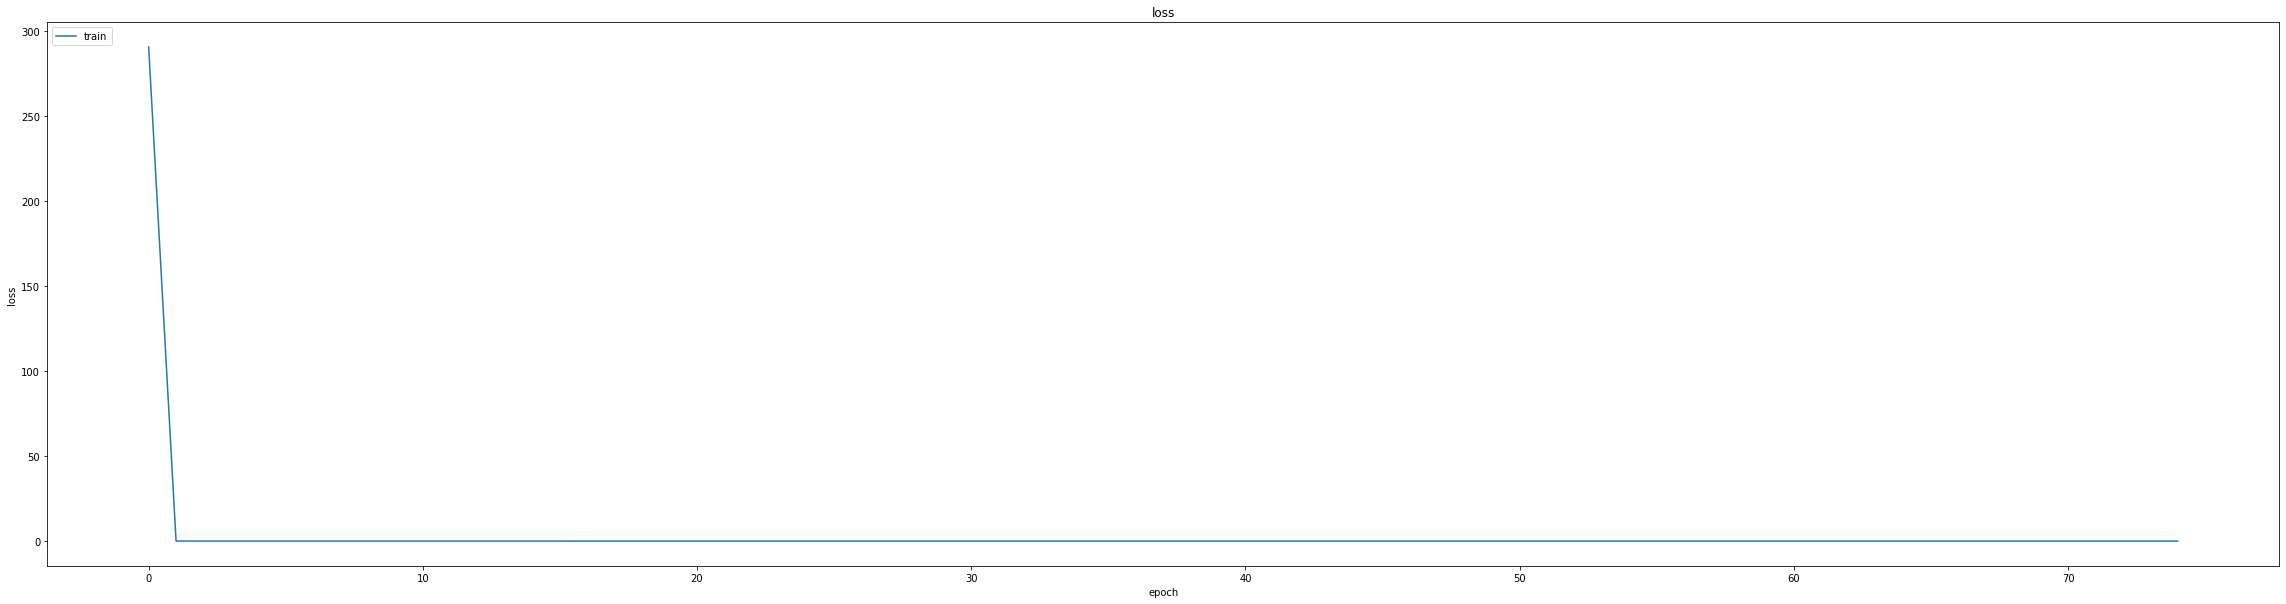

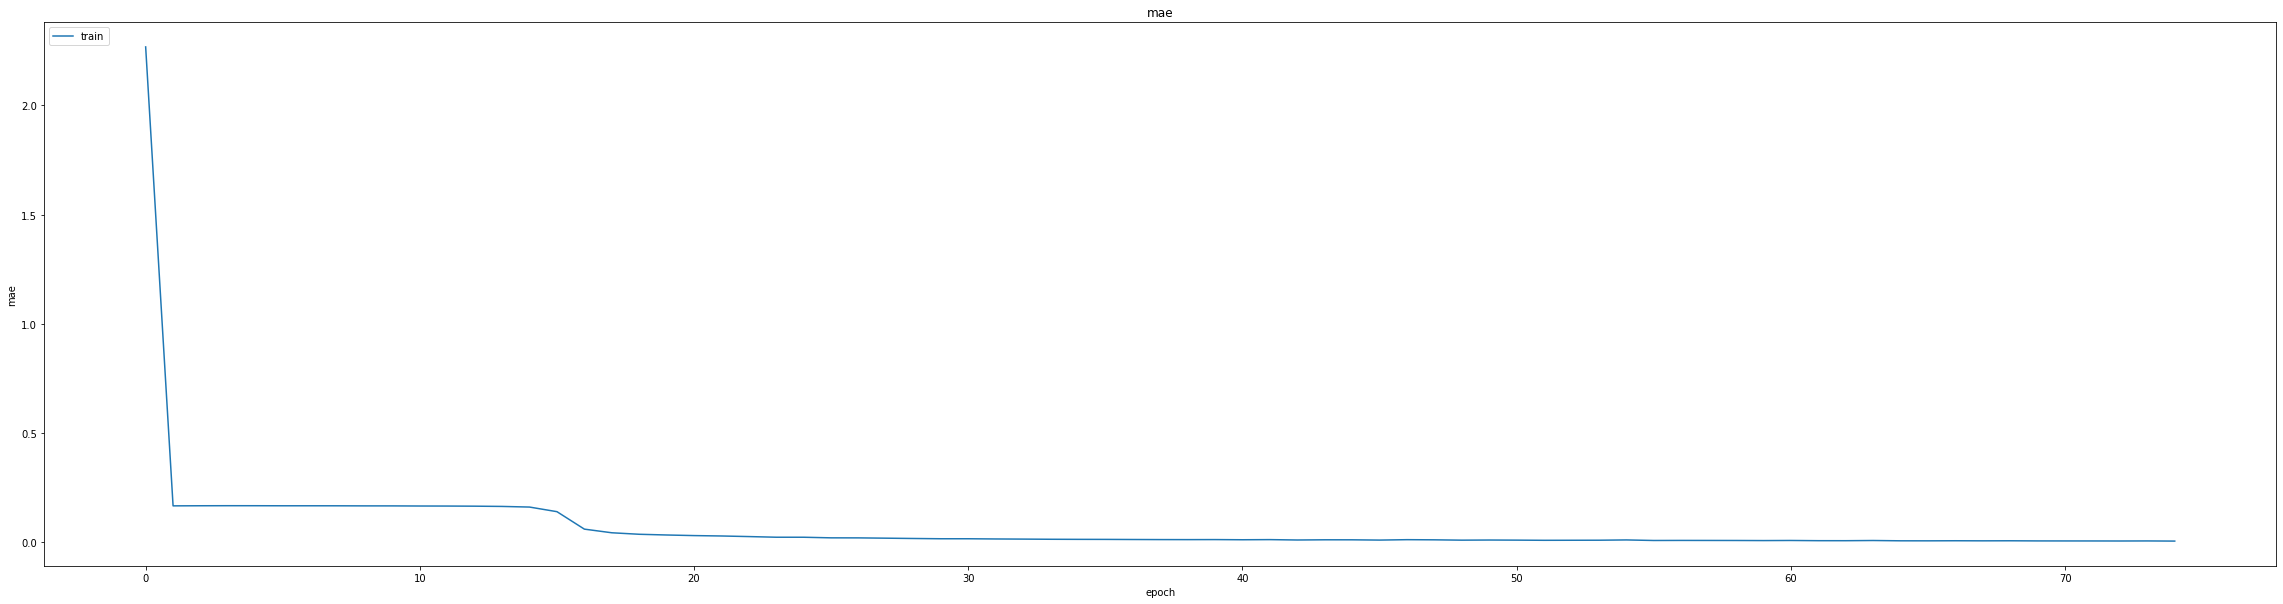

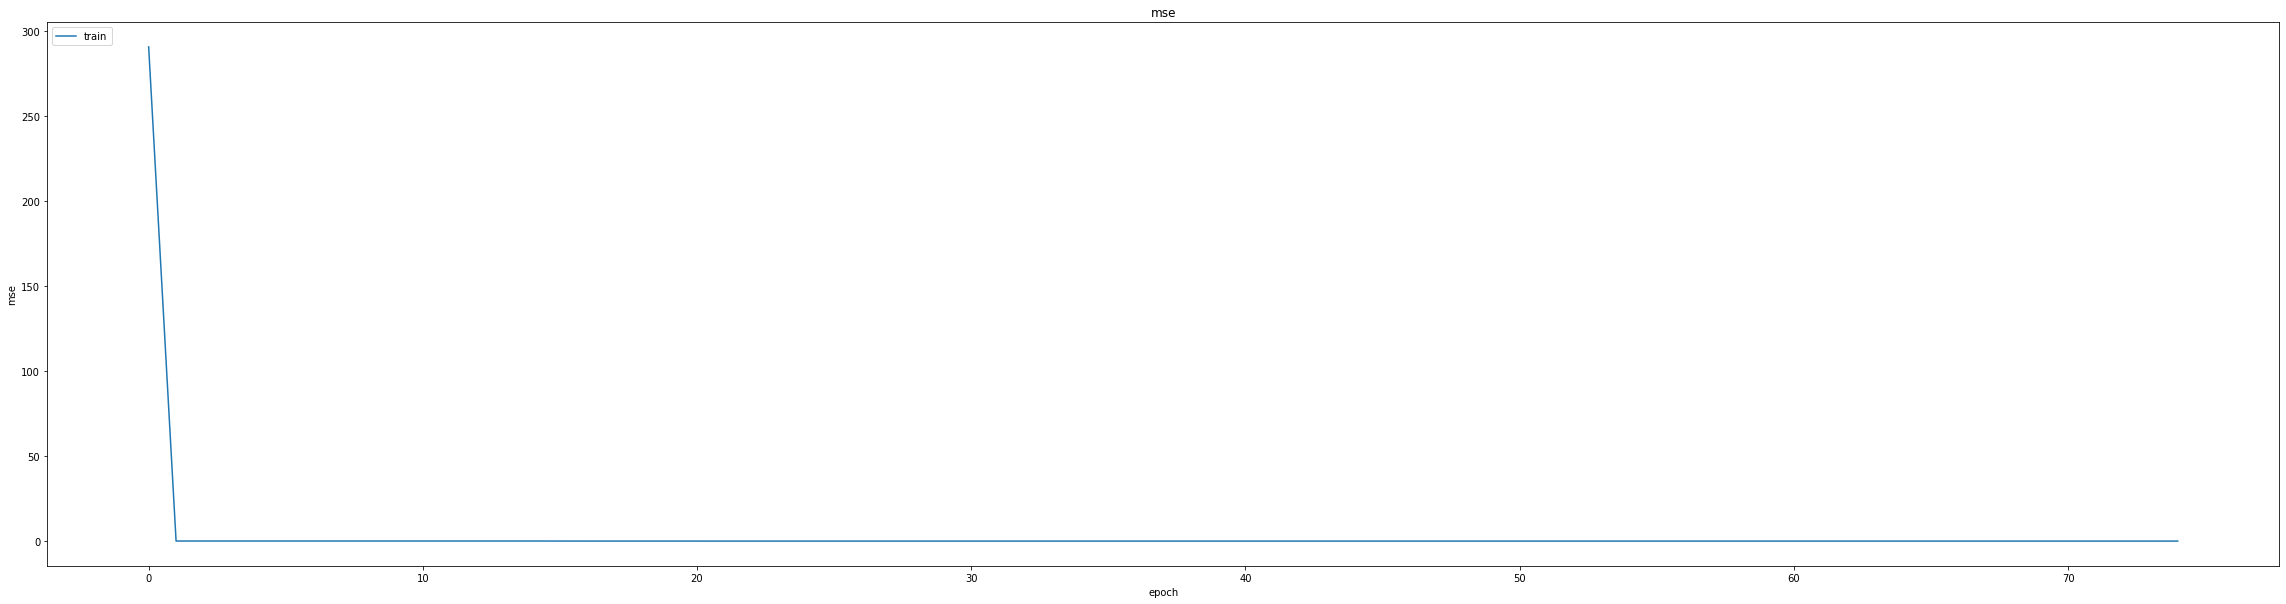

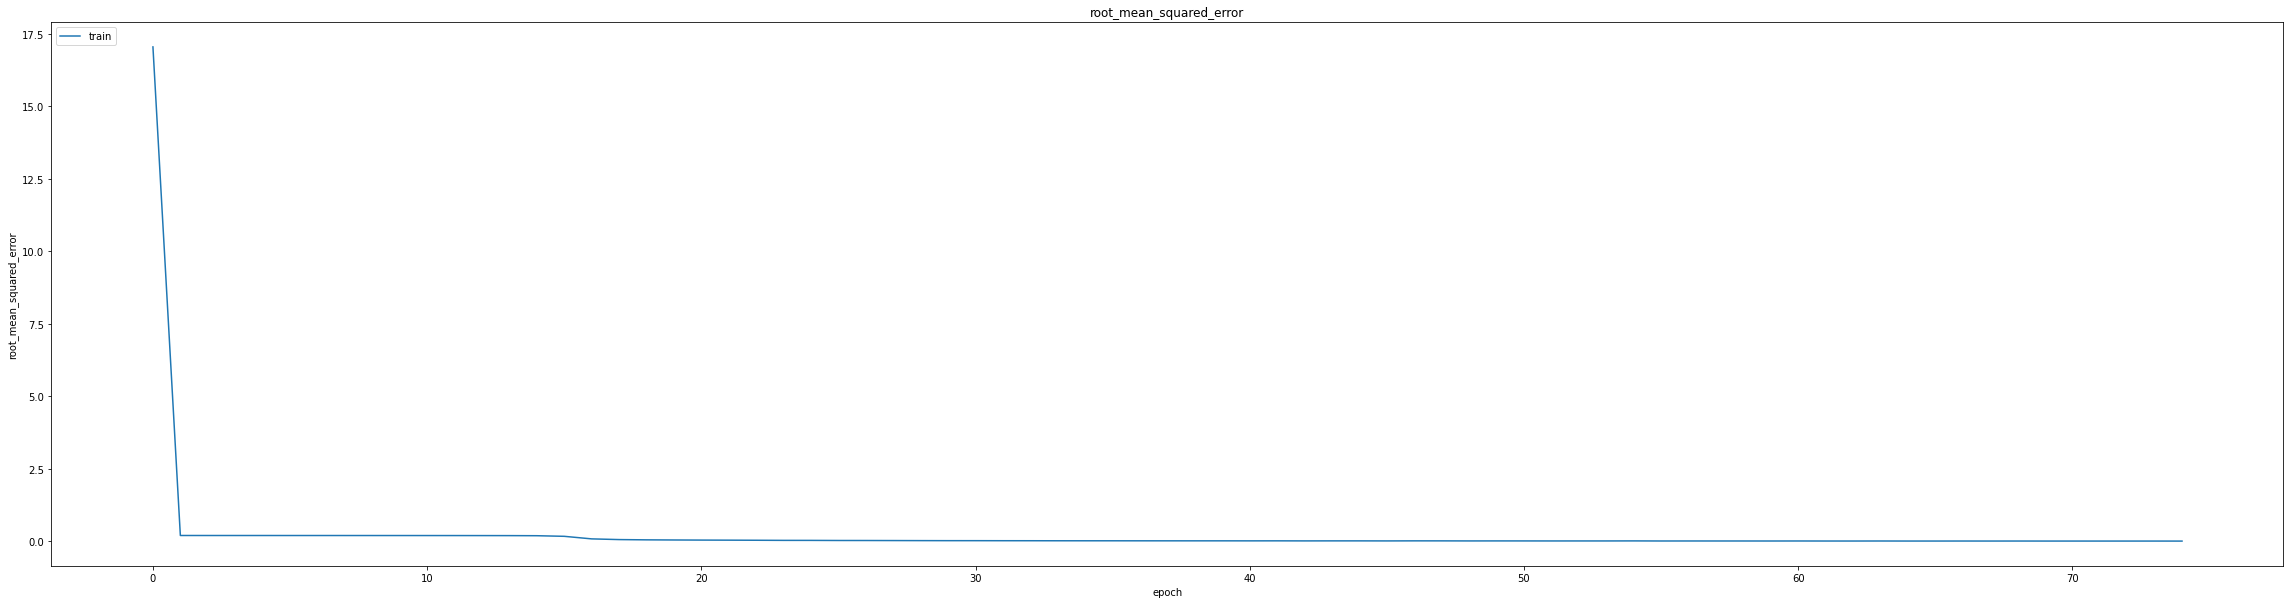

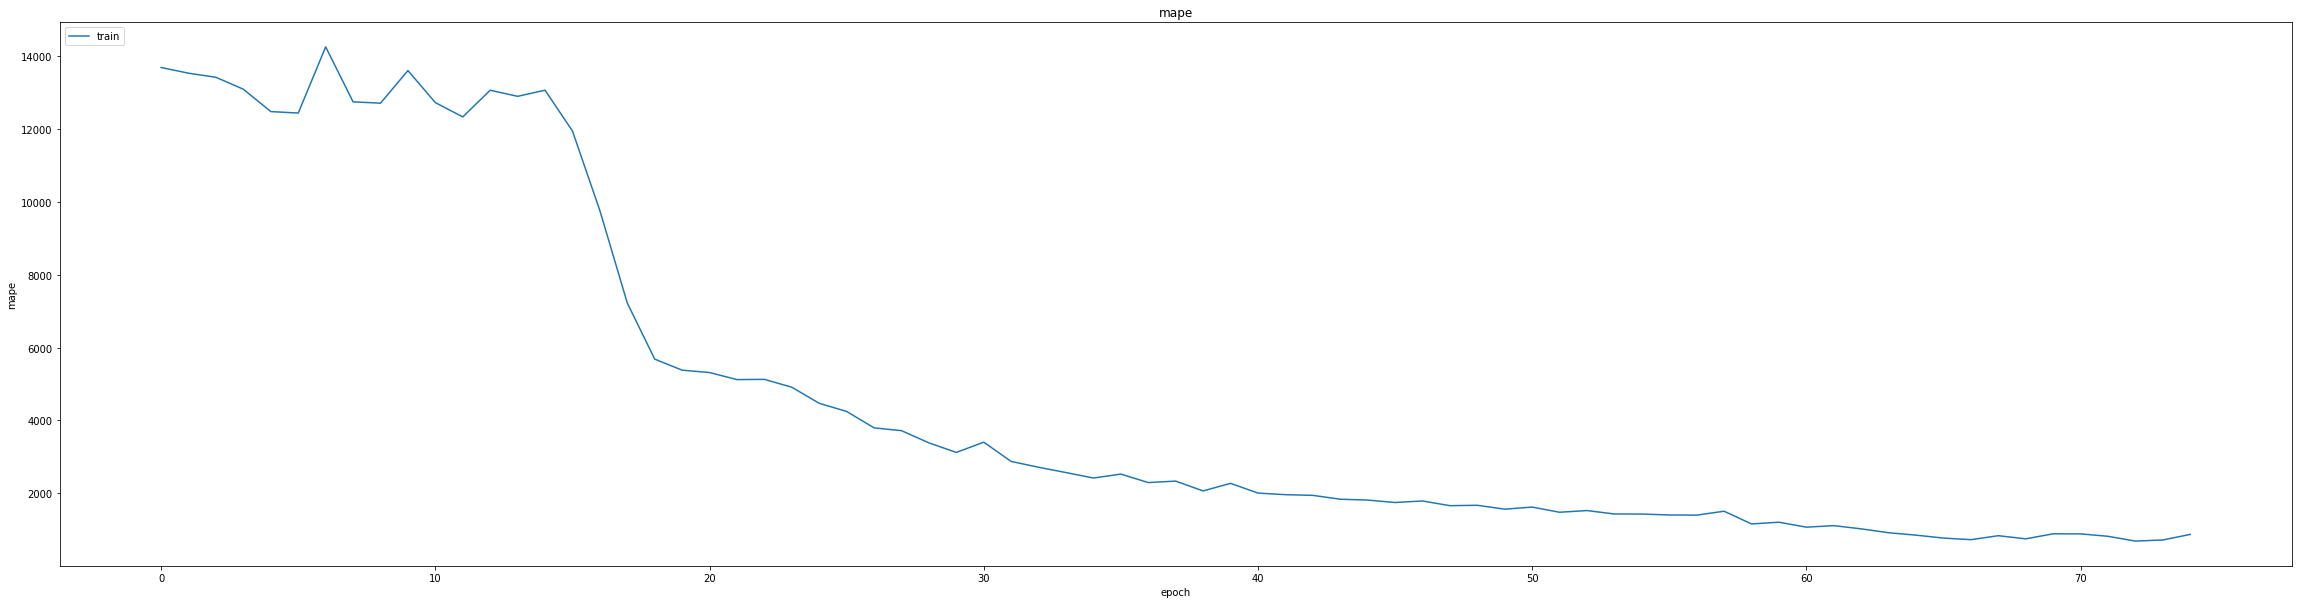

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005284694954752922
0.006886846851557493
348/348 [==============================] - 2s 4ms/step
0.9950913979734313


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


403/406 [============================>.] - ETA: 0s - loss: 6.2430e-04 - mae: 0.0101 - mse: 6.2430e-04 - root_mean_squared_error: 0.0250 - mape: 943.0005
Epoch 1: val_mse did not improve from 0.00005
406/406 [==============================] - 14s 21ms/step - loss: 6.2010e-04 - mae: 0.0100 - mse: 6.2010e-04 - root_mean_squared_error: 0.0249 - mape: 936.2922 - val_loss: 7.6245e-05 - val_mae: 0.0066 - val_mse: 7.6245e-05 - val_root_mean_squared_error: 0.0087 - val_mape: 3408.0767 - lr: 0.0010
Epoch 2/25
402/406 [============================>.] - ETA: 0s - loss: 2.9308e-05 - mae: 0.0041 - mse: 2.9308e-05 - root_mean_squared_error: 0.0054 - mape: 785.9560
Epoch 2: val_mse improved from 0.00005 to 0.00004, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 2.9303e-05 - mae: 0.0041 - mse: 2.9303e-05 - root_mean_squared_error: 0.0054 - mape: 778.4295 - val_loss: 3.8281e-05 - val_mae: 0.0043 - val_mse: 3.8281e-05 - val_root_mean_squared_error: 0.0062 - val_mape: 3501.7998 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
405/406 [============================>.] - ETA: 0s - loss: 2.5817e-05 - mae: 0.0038 - mse: 2.5817e-05 - root_mean_squared_error: 0.0051 - mape: 733.0638
Epoch 3: val_mse did not improve from 0.00004
406/406 [==============================] - 4s 11ms/step - loss: 2.5809e-05 - mae: 0.0038 - mse: 2.5809e-05 - root_mean_squared_error: 0.0051 - mape: 731.4566 - val_loss: 5.1475e-05 - val_mae: 0.0055 - val_mse: 5.1475e-05 - val_root_mean_squared_error: 0.0072 - val_mape: 3103.7603 - lr: 9.0000e-04
Epoch 4/25
406/406 [==============================] - ETA: 0s - loss: 2.6843e-05 - mae: 0.0039 - mse: 2.6843e-05 - root_mean_squared_error: 0.0052 - mape: 586.16

406/406 [==============================] - 15s 37ms/step - loss: 2.9491e-05 - mae: 0.0042 - mse: 2.9491e-05 - root_mean_squared_error: 0.0054 - mape: 531.6326 - val_loss: 3.3305e-05 - val_mae: 0.0041 - val_mse: 3.3305e-05 - val_root_mean_squared_error: 0.0058 - val_mape: 3398.3350 - lr: 7.2900e-04
Epoch 8/25
401/406 [============================>.] - ETA: 0s - loss: 4.3078e-05 - mae: 0.0051 - mse: 4.3078e-05 - root_mean_squared_error: 0.0066 - mape: 491.0529
Epoch 8: val_mse did not improve from 0.00003
406/406 [==============================] - 4s 11ms/step - loss: 4.2933e-05 - mae: 0.0051 - mse: 4.2933e-05 - root_mean_squared_error: 0.0066 - mape: 485.1469 - val_loss: 4.1996e-05 - val_mae: 0.0050 - val_mse: 4.1996e-05 - val_root_mean_squared_error: 0.0065 - val_mape: 3095.3042 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
404/406 [============================>.] - ETA: 0s - loss: 3.4479e-05 - mae: 0.0045 - mse: 3.4479e-05 - root_mean_squared_error: 0.0059 - mape: 57

406/406 [==============================] - 15s 37ms/step - loss: 2.1164e-05 - mae: 0.0035 - mse: 2.1164e-05 - root_mean_squared_error: 0.0046 - mape: 621.6758 - val_loss: 3.2963e-05 - val_mae: 0.0043 - val_mse: 3.2963e-05 - val_root_mean_squared_error: 0.0057 - val_mape: 2610.8232 - lr: 3.8742e-04
Epoch 20/25
406/406 [==============================] - ETA: 0s - loss: 2.1905e-05 - mae: 0.0036 - mse: 2.1905e-05 - root_mean_squared_error: 0.0047 - mape: 800.7440
Epoch 20: val_mse improved from 0.00003 to 0.00003, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 2.1905e-05 - mae: 0.0036 - mse: 2.1905e-05 - root_mean_squared_error: 0.0047 - mape: 800.7440 - val_loss: 3.1952e-05 - val_mae: 0.0042 - val_mse: 3.1952e-05 - val_root_mean_squared_error: 0.0057 - val_mape: 3001.6536 - lr: 3.8742e-04
lr changed to 0.0003486784757114947
Epoch 21/25
404/406 [============================>.] - ETA: 0s - loss: 1.8832e-05 - mae: 0.0033 - mse: 1.8832e-05 - root_mean_squared_error: 0.0043 - mape: 488.1620
Epoch 21: val_mse did not improve from 0.00003
406/406 [==============================] - 5s 11ms/step - loss: 1.8871e-05 - mae: 0.0033 - mse: 1.8871e-05 - root_mean_squared_error: 0.0043 - mape: 485.8925 - val_loss: 4.9138e-05 - val_mae: 0.0057 - val_mse: 4.9138e-05 - val_root_mean_squared_error: 0.0070 - val_mape: 2362.6243 - lr: 3.4868e-04
Epoch 22/25
402/406 [============================>.] - ETA: 0s - loss: 2.0705e-05 - mae: 0.0035 - mse: 2.0705e-05 - root_mean_squared_error: 0.0046 - mape:

406/406 [==============================] - 15s 37ms/step - loss: 2.0650e-05 - mae: 0.0035 - mse: 2.0650e-05 - root_mean_squared_error: 0.0045 - mape: 468.6464 - val_loss: 2.9923e-05 - val_mae: 0.0039 - val_mse: 2.9923e-05 - val_root_mean_squared_error: 0.0055 - val_mape: 2413.9880 - lr: 3.4868e-04
lr changed to 0.00031381062290165574
Epoch 23/25
403/406 [============================>.] - ETA: 0s - loss: 1.8052e-05 - mae: 0.0032 - mse: 1.8052e-05 - root_mean_squared_error: 0.0042 - mape: 547.0072
Epoch 23: val_mse improved from 0.00003 to 0.00003, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 1.8012e-05 - mae: 0.0032 - mse: 1.8012e-05 - root_mean_squared_error: 0.0042 - mape: 543.1151 - val_loss: 2.7382e-05 - val_mae: 0.0038 - val_mse: 2.7382e-05 - val_root_mean_squared_error: 0.0052 - val_mape: 2513.7688 - lr: 3.1381e-04
Epoch 24/25
405/406 [============================>.] - ETA: 0s - loss: 1.9480e-05 - mae: 0.0034 - mse: 1.9480e-05 - root_mean_squared_error: 0.0044 - mape: 507.1246
Epoch 24: val_mse did not improve from 0.00003
406/406 [==============================] - 4s 11ms/step - loss: 1.9486e-05 - mae: 0.0034 - mse: 1.9486e-05 - root_mean_squared_error: 0.0044 - mape: 506.0138 - val_loss: 3.2093e-05 - val_mae: 0.0043 - val_mse: 3.2093e-05 - val_root_mean_squared_error: 0.0057 - val_mape: 2536.3091 - lr: 3.1381e-04
lr changed to 0.0002824295632308349
Epoch 25/25
406/406 [==============================] - ETA: 0s - loss: 1.7171e-05 - mae: 0.0031 - mse: 1.7171e-05 - root_mean_squared_error: 0.0041 - mape:

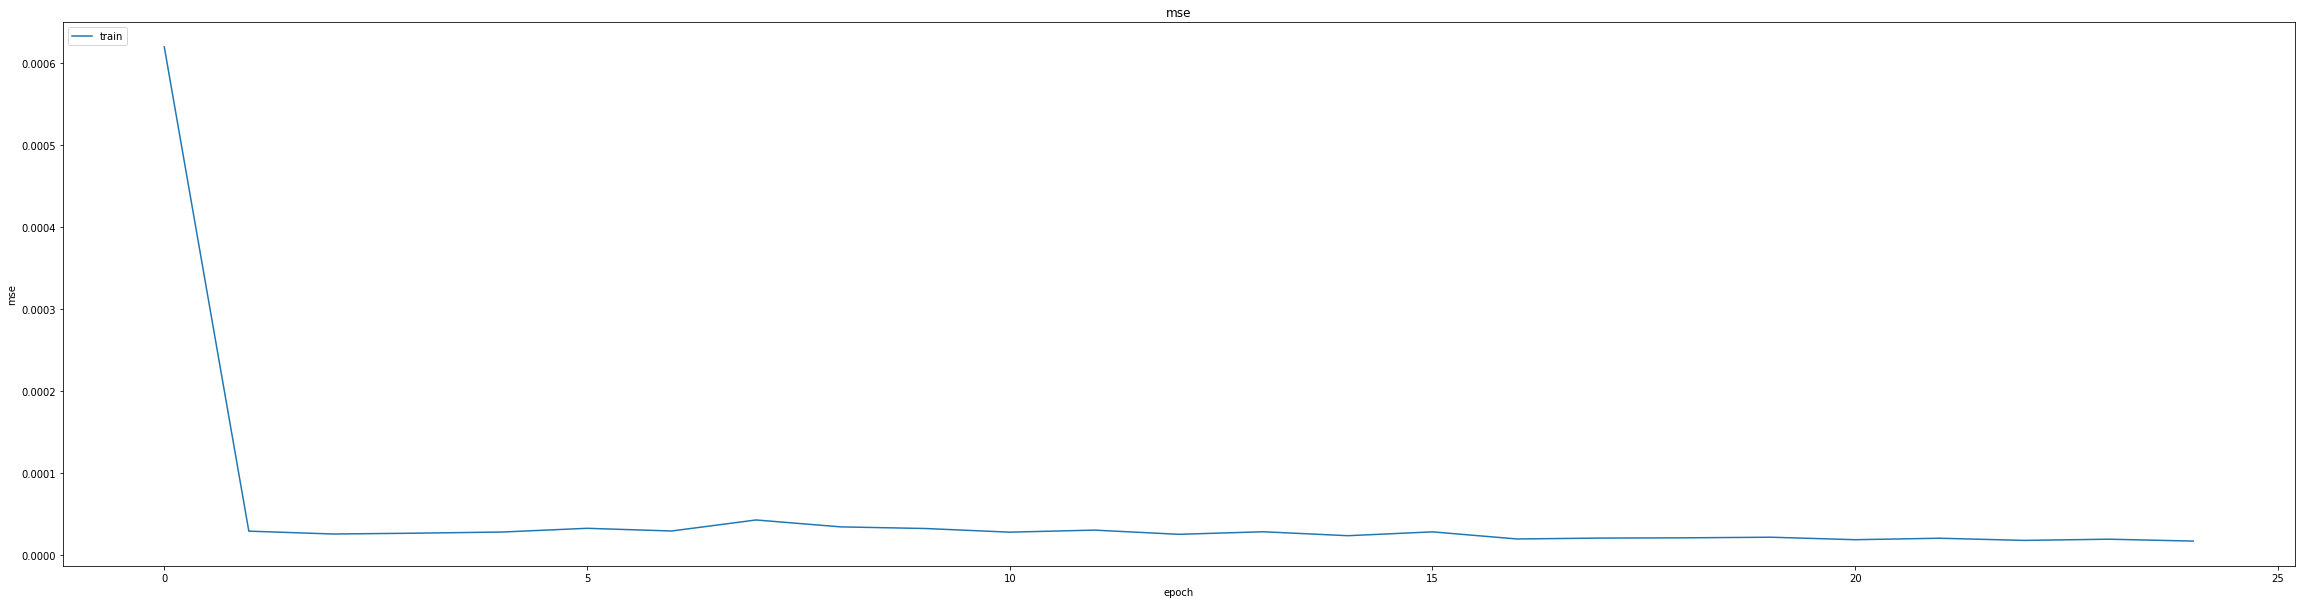

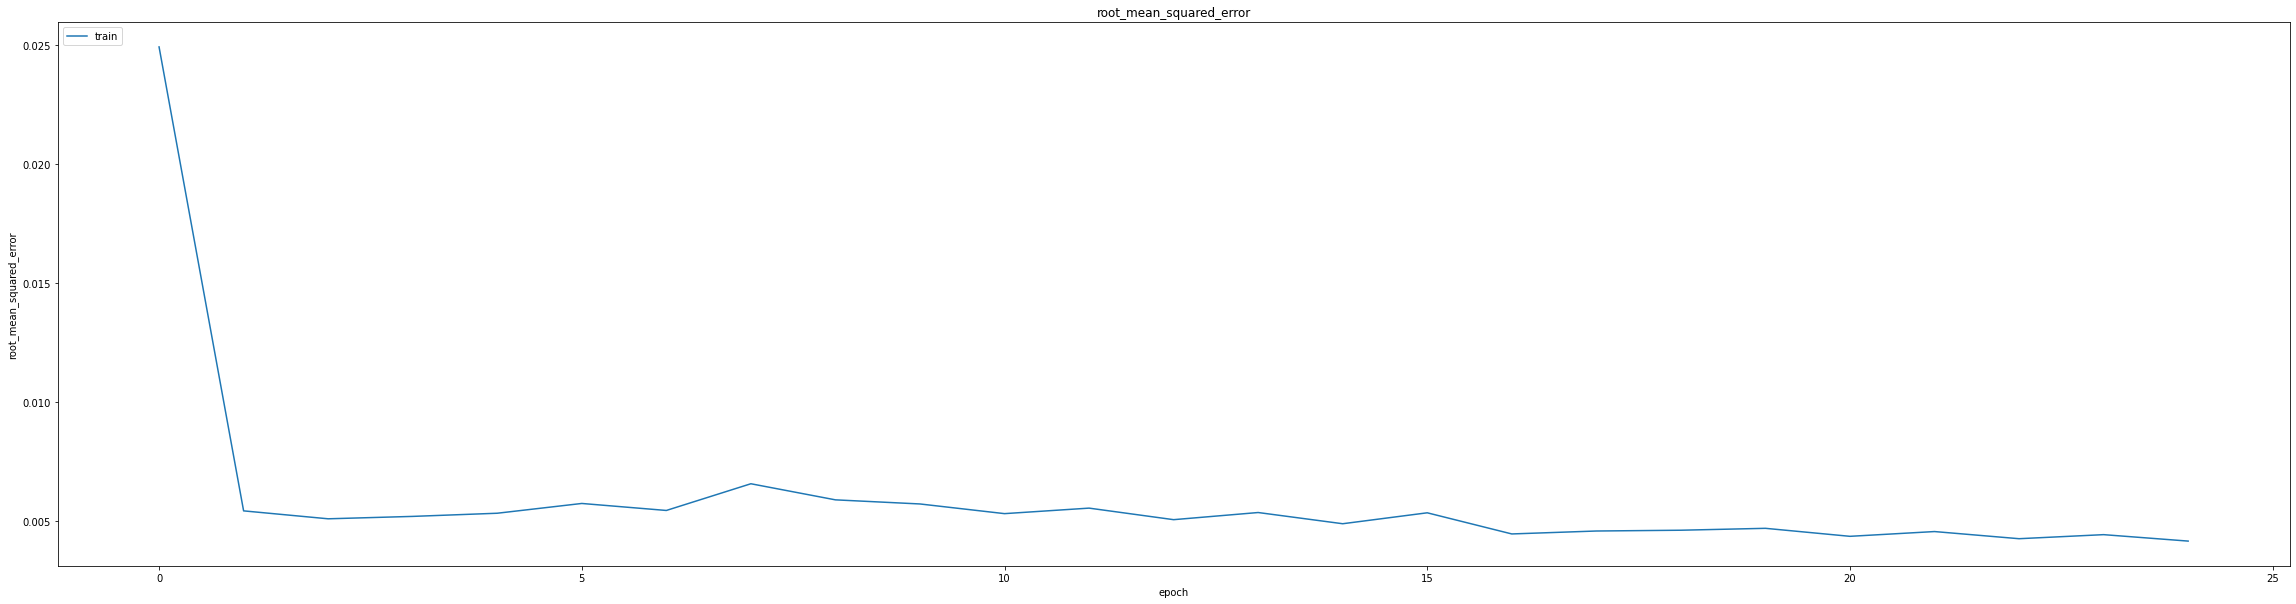

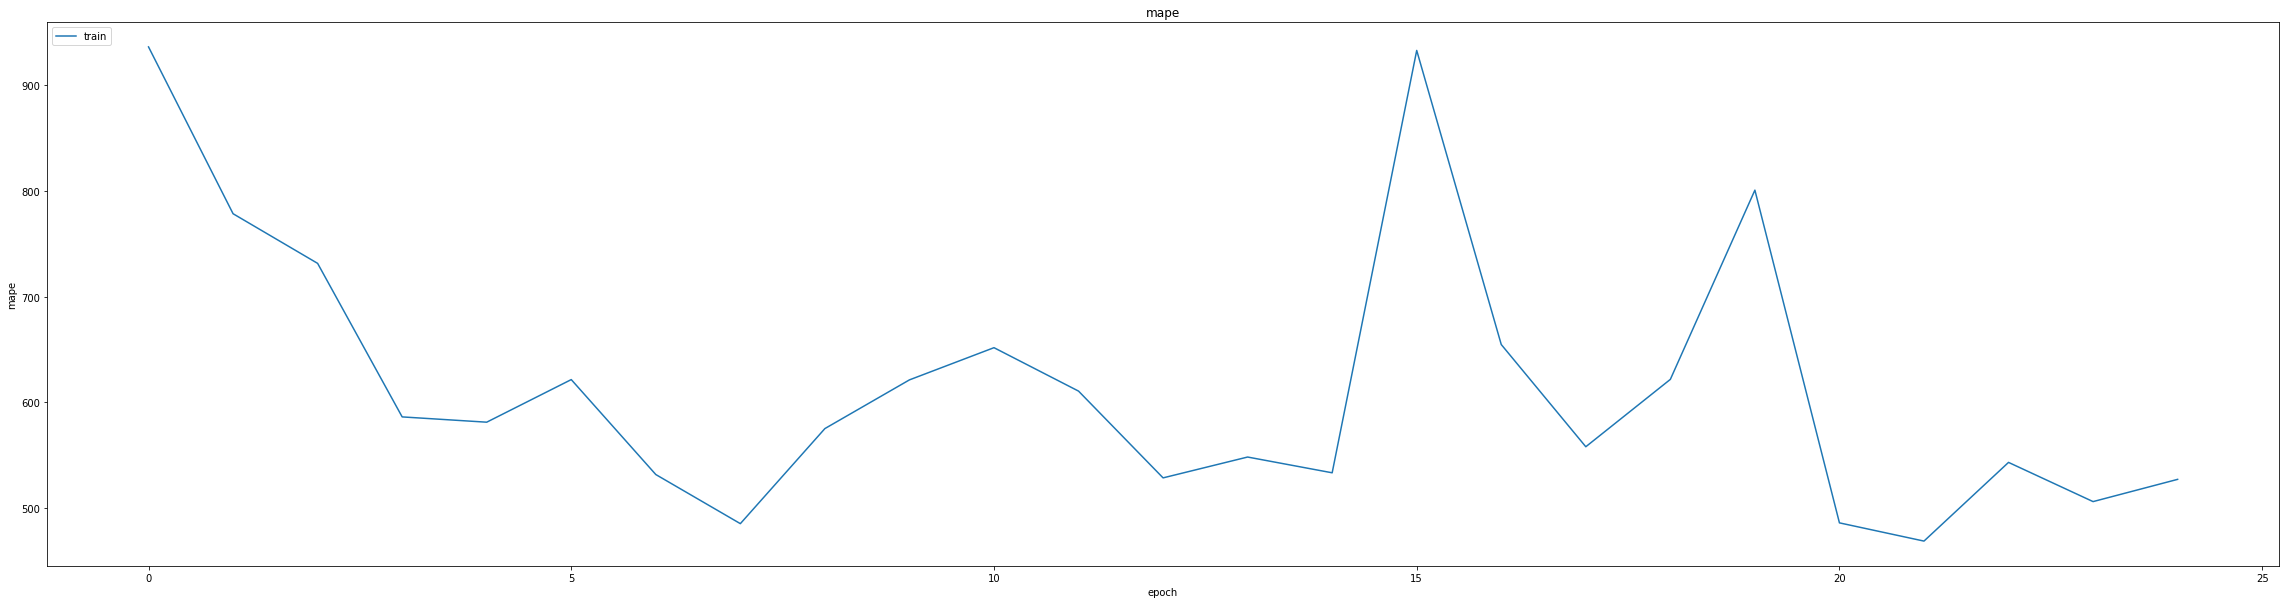

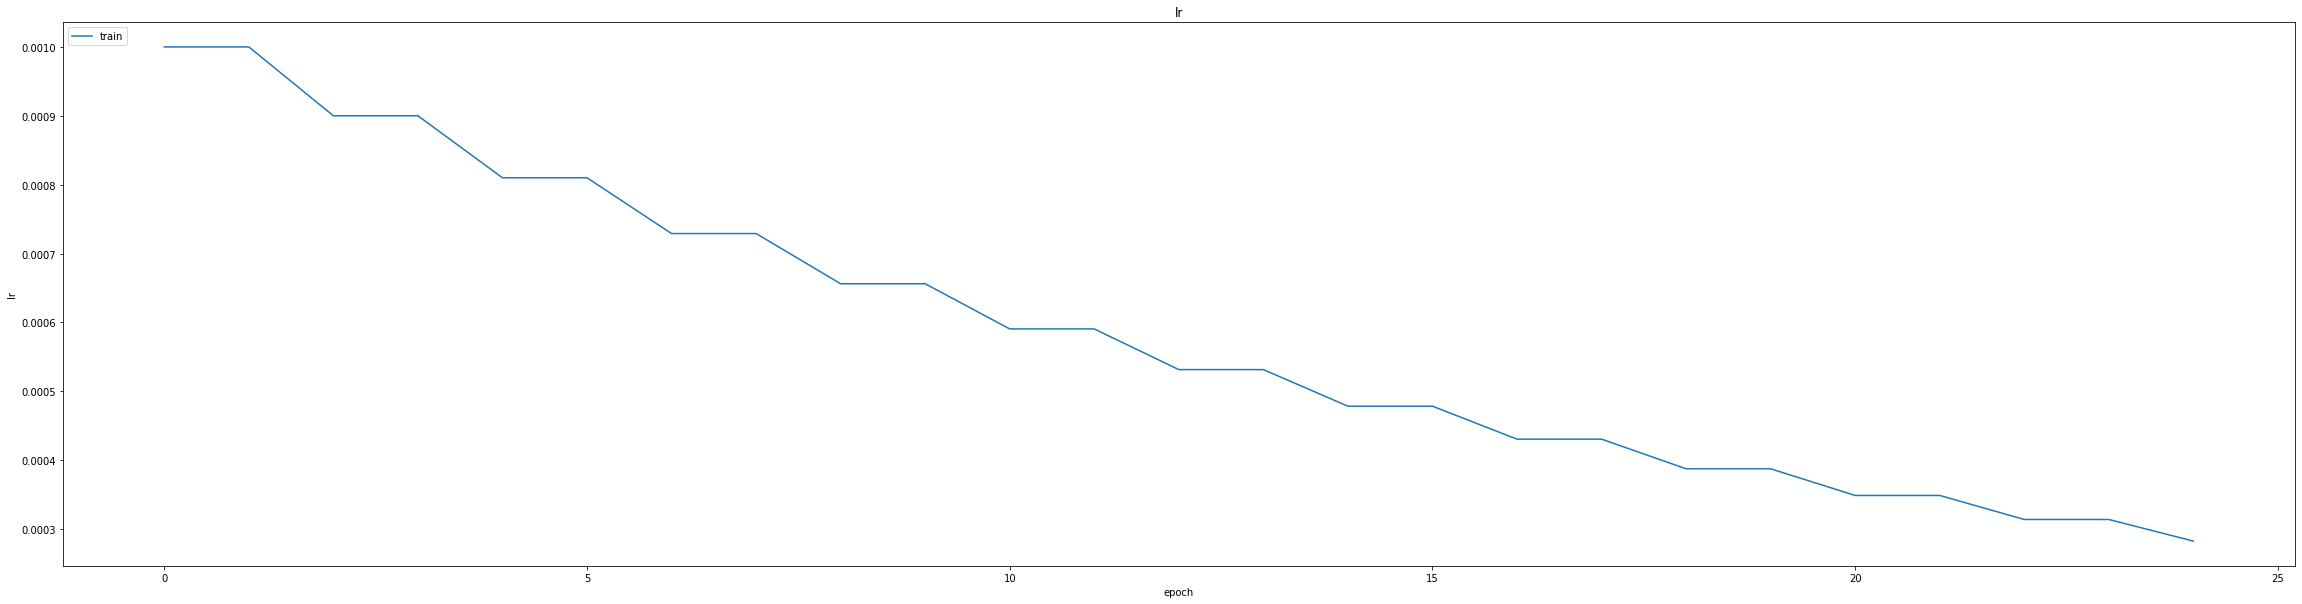

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0037736494559794664
0.005232741590589285
348/348 [==============================] - 3s 4ms/step
0.999615346788663


348/348 [==============================] - 1s 4ms/step


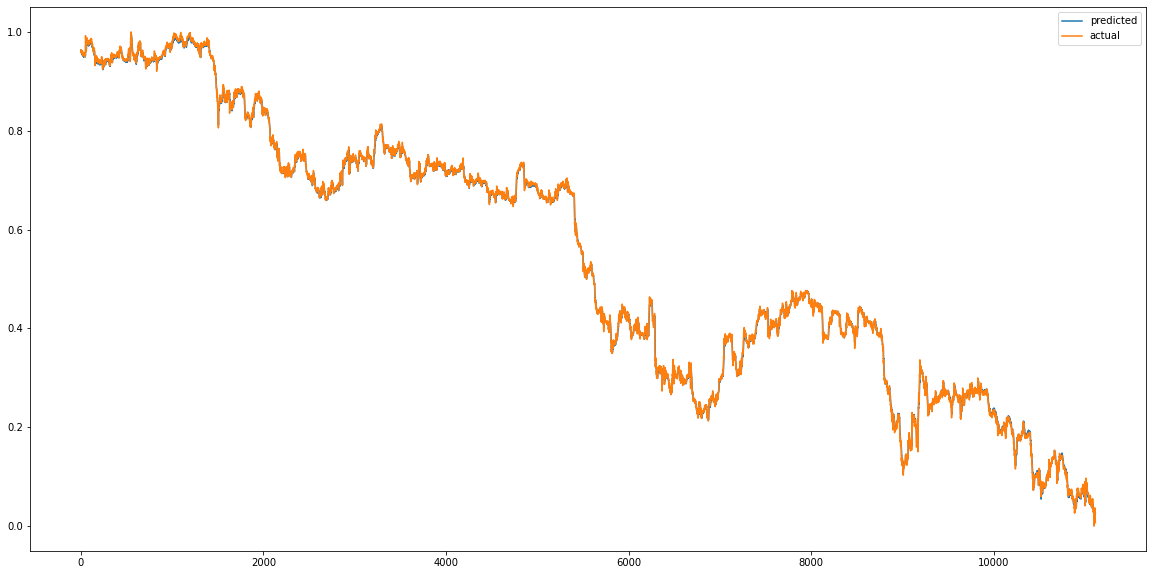

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


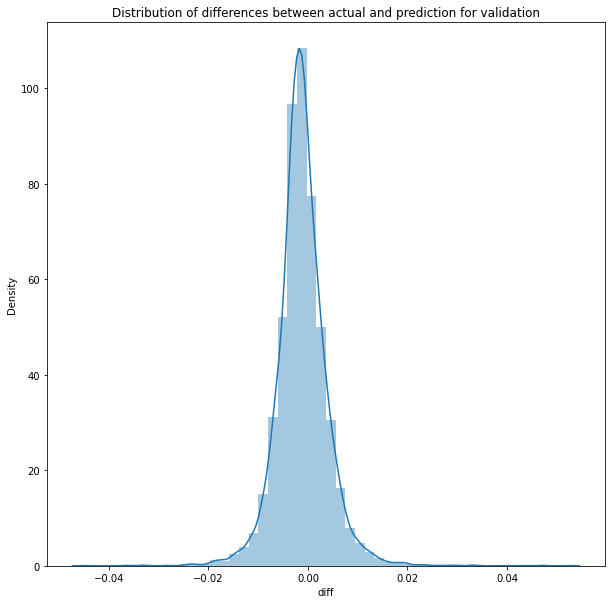

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

348/348 [==============================] - 1s 4ms/step


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


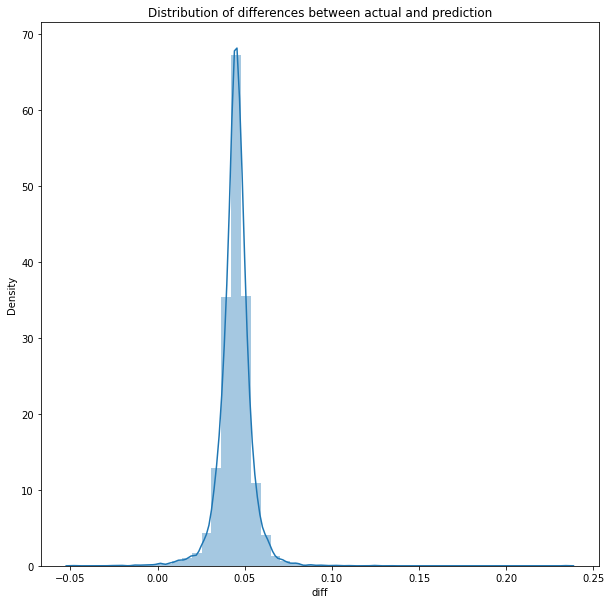

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.002074485495372642
RMSE :  0.04554652012363449
MAE :  0.04467169571662882
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9473778017793422


count    11115.000000
mean         0.044620
std          0.009139
min         -0.048138
25%          0.040785
50%          0.044831
75%          0.048797
max          0.234303
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
406/406 [==============================] - ETA: 0s - loss: 167.0416 - mae: 1.8864 - mse: 167.0416 - root_mean_squared_error: 12.9245 - mape: 990.3869
Epoch 1: val_mse improved from inf to 0.33570, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 42s 79ms/step - loss: 167.0416 - mae: 1.8864 - mse: 167.0416 - root_mean_squared_error: 12.9245 - mape: 990.3869 - val_loss: 0.3357 - val_mae: 0.5106 - val_mse: 0.3357 - val_root_mean_squared_error: 0.5794 - val_mape: 3562.8662
Epoch 2/75
403/406 [============================>.] - ETA: 0s - loss: 0.4239 - mae: 0.6200 - mse: 0.4239 - root_mean_squared_error: 0.6511 - mape: 1584.7029
Epoch 2: val_mse improved from 0.33570 to 0.30042, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 70ms/step - loss: 0.4237 - mae: 0.6197 - mse: 0.4237 - root_mean_squared_error: 0.6509 - mape: 1574.0604 - val_loss: 0.3004 - val_mae: 0.4752 - val_mse: 0.3004 - val_root_mean_squared_error: 0.5481 - val_mape: 7007.1650
Epoch 3/75
402/406 [============================>.] - ETA: 0s - loss: 0.2551 - mae: 0.4441 - mse: 0.2551 - root_mean_squared_error: 0.5050 - mape: 4395.2974
Epoch 3: val_mse improved from 0.30042 to 0.00443, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 0.2527 - mae: 0.4404 - mse: 0.2527 - root_mean_squared_error: 0.5027 - mape: 4353.2515 - val_loss: 0.0044 - val_mae: 0.0486 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0666 - val_mape: 14639.5596
Epoch 4/75
406/406 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0407 - mse: 0.0028 - root_mean_squared_error: 0.0529 - mape: 3415.1709
Epoch 4: val_mse improved from 0.00443 to 0.00355, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 70ms/step - loss: 0.0028 - mae: 0.0407 - mse: 0.0028 - root_mean_squared_error: 0.0529 - mape: 3415.1709 - val_loss: 0.0036 - val_mae: 0.0498 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0596 - val_mape: 16340.4834
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0330 - mse: 0.0018 - root_mean_squared_error: 0.0429 - mape: 3934.2695
Epoch 5: val_mse improved from 0.00355 to 0.00269, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 0.0018 - mae: 0.0330 - mse: 0.0018 - root_mean_squared_error: 0.0429 - mape: 3934.2695 - val_loss: 0.0027 - val_mae: 0.0417 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0519 - val_mape: 17114.5547
Epoch 6/75
404/406 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0296 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 3702.2642
Epoch 6: val_mse improved from 0.00269 to 0.00228, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 27s 68ms/step - loss: 0.0015 - mae: 0.0296 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 3685.0410 - val_loss: 0.0023 - val_mae: 0.0346 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0477 - val_mape: 17334.2559
Epoch 7/75
406/406 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 3316.5388
Epoch 7: val_mse improved from 0.00228 to 0.00205, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 71ms/step - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 3316.5388 - val_loss: 0.0021 - val_mae: 0.0284 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0453 - val_mape: 17069.2656
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0253 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 3569.5381
Epoch 8: val_mse improved from 0.00205 to 0.00185, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 0.0011 - mae: 0.0253 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 3552.9546 - val_loss: 0.0018 - val_mae: 0.0288 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0430 - val_mape: 16305.2109
Epoch 9/75
406/406 [==============================] - ETA: 0s - loss: 9.8500e-04 - mae: 0.0241 - mse: 9.8500e-04 - root_mean_squared_error: 0.0314 - mape: 3268.2878
Epoch 9: val_mse did not improve from 0.00185
406/406 [==============================] - 6s 15ms/step - loss: 9.8500e-04 - mae: 0.0241 - mse: 9.8500e-04 - root_mean_squared_error: 0.0314 - mape: 3268.2878 - val_loss: 0.0019 - val_mae: 0.0250 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0434 - val_mape: 16670.0469
Epoch 10/75
403/406 [============================>.] - ETA: 0s - loss: 8.7494e-04 - mae: 0.0227 - mse: 8.7494e-04 - root_mean_squared_error: 0.0296 - mape: 2972.0881
Epoch 10: val_mse improved from 0.00185 to 0.00177, saving model to /content/dri

406/406 [==============================] - 28s 68ms/step - loss: 8.7512e-04 - mae: 0.0227 - mse: 8.7512e-04 - root_mean_squared_error: 0.0296 - mape: 2950.9602 - val_loss: 0.0018 - val_mae: 0.0293 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0421 - val_mape: 16071.2344
Epoch 11/75
403/406 [============================>.] - ETA: 0s - loss: 7.9605e-04 - mae: 0.0217 - mse: 7.9605e-04 - root_mean_squared_error: 0.0282 - mape: 3307.8328
Epoch 11: val_mse did not improve from 0.00177
406/406 [==============================] - 6s 14ms/step - loss: 7.9625e-04 - mae: 0.0217 - mse: 7.9625e-04 - root_mean_squared_error: 0.0282 - mape: 3284.3035 - val_loss: 0.0018 - val_mae: 0.0294 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0428 - val_mape: 15806.2344
Epoch 12/75
403/406 [============================>.] - ETA: 0s - loss: 7.0426e-04 - mae: 0.0205 - mse: 7.0426e-04 - root_mean_squared_error: 0.0265 - mape: 2721.2351
Epoch 12: val_mse did not improve from 0.00177
406/406 [==============

406/406 [==============================] - 28s 68ms/step - loss: 6.3132e-04 - mae: 0.0194 - mse: 6.3132e-04 - root_mean_squared_error: 0.0251 - mape: 2813.1516 - val_loss: 0.0017 - val_mae: 0.0244 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0409 - val_mape: 15285.3760
Epoch 14/75
406/406 [==============================] - ETA: 0s - loss: 5.7021e-04 - mae: 0.0185 - mse: 5.7021e-04 - root_mean_squared_error: 0.0239 - mape: 2730.8145
Epoch 14: val_mse improved from 0.00167 to 0.00160, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 71ms/step - loss: 5.7021e-04 - mae: 0.0185 - mse: 5.7021e-04 - root_mean_squared_error: 0.0239 - mape: 2730.8145 - val_loss: 0.0016 - val_mae: 0.0263 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0400 - val_mape: 14618.0879
Epoch 15/75
402/406 [============================>.] - ETA: 0s - loss: 5.0012e-04 - mae: 0.0173 - mse: 5.0012e-04 - root_mean_squared_error: 0.0224 - mape: 2669.1877
Epoch 15: val_mse improved from 0.00160 to 0.00141, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 68ms/step - loss: 5.0006e-04 - mae: 0.0173 - mse: 5.0006e-04 - root_mean_squared_error: 0.0224 - mape: 2643.6343 - val_loss: 0.0014 - val_mae: 0.0275 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0375 - val_mape: 13073.3350
Epoch 16/75
404/406 [============================>.] - ETA: 0s - loss: 4.4976e-04 - mae: 0.0164 - mse: 4.4976e-04 - root_mean_squared_error: 0.0212 - mape: 2435.0430
Epoch 16: val_mse improved from 0.00141 to 0.00140, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 69ms/step - loss: 4.4975e-04 - mae: 0.0164 - mse: 4.4975e-04 - root_mean_squared_error: 0.0212 - mape: 2423.7170 - val_loss: 0.0014 - val_mae: 0.0256 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0374 - val_mape: 13229.6016
Epoch 17/75
403/406 [============================>.] - ETA: 0s - loss: 4.0295e-04 - mae: 0.0156 - mse: 4.0295e-04 - root_mean_squared_error: 0.0201 - mape: 2476.4109
Epoch 17: val_mse improved from 0.00140 to 0.00123, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 69ms/step - loss: 4.0260e-04 - mae: 0.0156 - mse: 4.0260e-04 - root_mean_squared_error: 0.0201 - mape: 2458.8042 - val_loss: 0.0012 - val_mae: 0.0248 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0351 - val_mape: 11945.1289
Epoch 18/75
405/406 [============================>.] - ETA: 0s - loss: 3.5206e-04 - mae: 0.0145 - mse: 3.5206e-04 - root_mean_squared_error: 0.0188 - mape: 2441.0991
Epoch 18: val_mse improved from 0.00123 to 0.00118, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 71ms/step - loss: 3.5193e-04 - mae: 0.0145 - mse: 3.5193e-04 - root_mean_squared_error: 0.0188 - mape: 2435.7495 - val_loss: 0.0012 - val_mae: 0.0223 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0343 - val_mape: 11926.9150
Epoch 19/75
405/406 [============================>.] - ETA: 0s - loss: 3.0679e-04 - mae: 0.0136 - mse: 3.0679e-04 - root_mean_squared_error: 0.0175 - mape: 2120.3665
Epoch 19: val_mse did not improve from 0.00118
406/406 [==============================] - 6s 14ms/step - loss: 3.0687e-04 - mae: 0.0136 - mse: 3.0687e-04 - root_mean_squared_error: 0.0175 - mape: 2115.7241 - val_loss: 0.0012 - val_mae: 0.0232 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0352 - val_mape: 11879.6152
Epoch 20/75
405/406 [============================>.] - ETA: 0s - loss: 2.7699e-04 - mae: 0.0129 - mse: 2.7699e-04 - root_mean_squared_error: 0.0166 - mape: 2148.6248
Epoch 20: val_mse did not improve from 0.00118
406/406 [==============

406/406 [==============================] - 28s 69ms/step - loss: 2.4849e-04 - mae: 0.0123 - mse: 2.4849e-04 - root_mean_squared_error: 0.0158 - mape: 2106.6985 - val_loss: 0.0011 - val_mae: 0.0225 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0335 - val_mape: 10658.7236
Epoch 22/75
406/406 [==============================] - ETA: 0s - loss: 2.2010e-04 - mae: 0.0115 - mse: 2.2010e-04 - root_mean_squared_error: 0.0148 - mape: 1981.2057
Epoch 22: val_mse improved from 0.00112 to 0.00107, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 69ms/step - loss: 2.2010e-04 - mae: 0.0115 - mse: 2.2010e-04 - root_mean_squared_error: 0.0148 - mape: 1981.2057 - val_loss: 0.0011 - val_mae: 0.0241 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0327 - val_mape: 10334.1680
Epoch 23/75
404/406 [============================>.] - ETA: 0s - loss: 1.9613e-04 - mae: 0.0109 - mse: 1.9613e-04 - root_mean_squared_error: 0.0140 - mape: 2032.7297
Epoch 23: val_mse improved from 0.00107 to 0.00091, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 70ms/step - loss: 1.9593e-04 - mae: 0.0109 - mse: 1.9593e-04 - root_mean_squared_error: 0.0140 - mape: 2023.2692 - val_loss: 9.0702e-04 - val_mae: 0.0235 - val_mse: 9.0702e-04 - val_root_mean_squared_error: 0.0301 - val_mape: 9099.0430
Epoch 24/75
404/406 [============================>.] - ETA: 0s - loss: 1.8136e-04 - mae: 0.0104 - mse: 1.8136e-04 - root_mean_squared_error: 0.0135 - mape: 1947.1663
Epoch 24: val_mse did not improve from 0.00091
406/406 [==============================] - 6s 14ms/step - loss: 1.8128e-04 - mae: 0.0104 - mse: 1.8128e-04 - root_mean_squared_error: 0.0135 - mape: 1938.1063 - val_loss: 9.1823e-04 - val_mae: 0.0214 - val_mse: 9.1823e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 9231.5820
Epoch 25/75
405/406 [============================>.] - ETA: 0s - loss: 1.6553e-04 - mae: 0.0100 - mse: 1.6553e-04 - root_mean_squared_error: 0.0129 - mape: 1714.1210
Epoch 25: val_mse did not improve from 0.00091
406/406 [

406/406 [==============================] - 28s 70ms/step - loss: 1.5065e-04 - mae: 0.0095 - mse: 1.5065e-04 - root_mean_squared_error: 0.0123 - mape: 1585.2450 - val_loss: 6.7076e-04 - val_mae: 0.0187 - val_mse: 6.7076e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 7876.3281
Epoch 27/75
404/406 [============================>.] - ETA: 0s - loss: 1.4313e-04 - mae: 0.0093 - mse: 1.4313e-04 - root_mean_squared_error: 0.0120 - mape: 1415.5094
Epoch 27: val_mse improved from 0.00067 to 0.00066, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 69ms/step - loss: 1.4300e-04 - mae: 0.0093 - mse: 1.4300e-04 - root_mean_squared_error: 0.0120 - mape: 1408.9235 - val_loss: 6.6068e-04 - val_mae: 0.0191 - val_mse: 6.6068e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 7451.3828
Epoch 28/75
402/406 [============================>.] - ETA: 0s - loss: 1.3240e-04 - mae: 0.0089 - mse: 1.3240e-04 - root_mean_squared_error: 0.0115 - mape: 1483.9045
Epoch 28: val_mse improved from 0.00066 to 0.00059, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 68ms/step - loss: 1.3224e-04 - mae: 0.0089 - mse: 1.3224e-04 - root_mean_squared_error: 0.0115 - mape: 1469.6986 - val_loss: 5.9222e-04 - val_mae: 0.0158 - val_mse: 5.9222e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 7252.0005
Epoch 29/75
403/406 [============================>.] - ETA: 0s - loss: 1.2511e-04 - mae: 0.0087 - mse: 1.2511e-04 - root_mean_squared_error: 0.0112 - mape: 1619.2450
Epoch 29: val_mse did not improve from 0.00059
406/406 [==============================] - 6s 14ms/step - loss: 1.2525e-04 - mae: 0.0087 - mse: 1.2525e-04 - root_mean_squared_error: 0.0112 - mape: 1607.7279 - val_loss: 7.1369e-04 - val_mae: 0.0173 - val_mse: 7.1369e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 7306.8364
Epoch 30/75
404/406 [============================>.] - ETA: 0s - loss: 1.1860e-04 - mae: 0.0085 - mse: 1.1860e-04 - root_mean_squared_error: 0.0109 - mape: 1501.5619
Epoch 30: val_mse did not improve from 0.00059
406/406 [

406/406 [==============================] - 27s 67ms/step - loss: 1.1403e-04 - mae: 0.0083 - mse: 1.1403e-04 - root_mean_squared_error: 0.0107 - mape: 1458.7883 - val_loss: 5.6376e-04 - val_mae: 0.0166 - val_mse: 5.6376e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 6790.2505
Epoch 32/75
406/406 [==============================] - ETA: 0s - loss: 9.8693e-05 - mae: 0.0077 - mse: 9.8693e-05 - root_mean_squared_error: 0.0099 - mape: 1442.9349
Epoch 32: val_mse improved from 0.00056 to 0.00054, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 69ms/step - loss: 9.8693e-05 - mae: 0.0077 - mse: 9.8693e-05 - root_mean_squared_error: 0.0099 - mape: 1442.9349 - val_loss: 5.4340e-04 - val_mae: 0.0163 - val_mse: 5.4340e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 6635.4077
Epoch 33/75
403/406 [============================>.] - ETA: 0s - loss: 1.0250e-04 - mae: 0.0079 - mse: 1.0250e-04 - root_mean_squared_error: 0.0101 - mape: 1336.0684
Epoch 33: val_mse did not improve from 0.00054
406/406 [==============================] - 6s 14ms/step - loss: 1.0235e-04 - mae: 0.0079 - mse: 1.0235e-04 - root_mean_squared_error: 0.0101 - mape: 1326.5634 - val_loss: 6.1843e-04 - val_mae: 0.0210 - val_mse: 6.1843e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 6224.5967
Epoch 34/75
406/406 [==============================] - ETA: 0s - loss: 1.0358e-04 - mae: 0.0079 - mse: 1.0358e-04 - root_mean_squared_error: 0.0102 - mape: 1204.1279
Epoch 34: val_mse improved from 0.00054 to 0.00051, savi

406/406 [==============================] - 27s 67ms/step - loss: 1.0358e-04 - mae: 0.0079 - mse: 1.0358e-04 - root_mean_squared_error: 0.0102 - mape: 1204.1279 - val_loss: 5.1292e-04 - val_mae: 0.0146 - val_mse: 5.1292e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 6470.4775
Epoch 35/75
404/406 [============================>.] - ETA: 0s - loss: 1.0205e-04 - mae: 0.0079 - mse: 1.0205e-04 - root_mean_squared_error: 0.0101 - mape: 1246.5856
Epoch 35: val_mse improved from 0.00051 to 0.00049, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 27s 67ms/step - loss: 1.0194e-04 - mae: 0.0079 - mse: 1.0194e-04 - root_mean_squared_error: 0.0101 - mape: 1240.7871 - val_loss: 4.8805e-04 - val_mae: 0.0150 - val_mse: 4.8805e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 6547.1265
Epoch 36/75
404/406 [============================>.] - ETA: 0s - loss: 8.5676e-05 - mae: 0.0072 - mse: 8.5676e-05 - root_mean_squared_error: 0.0093 - mape: 1308.8193
Epoch 36: val_mse improved from 0.00049 to 0.00038, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 27s 67ms/step - loss: 8.5548e-05 - mae: 0.0072 - mse: 8.5548e-05 - root_mean_squared_error: 0.0092 - mape: 1302.7279 - val_loss: 3.7584e-04 - val_mae: 0.0149 - val_mse: 3.7584e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 5701.7891
Epoch 37/75
405/406 [============================>.] - ETA: 0s - loss: 9.4362e-05 - mae: 0.0076 - mse: 9.4362e-05 - root_mean_squared_error: 0.0097 - mape: 1260.0352
Epoch 37: val_mse did not improve from 0.00038
406/406 [==============================] - 6s 14ms/step - loss: 9.4544e-05 - mae: 0.0076 - mse: 9.4544e-05 - root_mean_squared_error: 0.0097 - mape: 1257.2751 - val_loss: 4.7635e-04 - val_mae: 0.0197 - val_mse: 4.7635e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 5293.6841
Epoch 38/75
404/406 [============================>.] - ETA: 0s - loss: 1.0466e-04 - mae: 0.0081 - mse: 1.0466e-04 - root_mean_squared_error: 0.0102 - mape: 1171.8392
Epoch 38: val_mse improved from 0.00038 to 0.00026, savi

406/406 [==============================] - 28s 69ms/step - loss: 1.0511e-04 - mae: 0.0081 - mse: 1.0511e-04 - root_mean_squared_error: 0.0103 - mape: 1166.3931 - val_loss: 2.5716e-04 - val_mae: 0.0101 - val_mse: 2.5716e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 5379.7793
Epoch 39/75
404/406 [============================>.] - ETA: 0s - loss: 1.0476e-04 - mae: 0.0080 - mse: 1.0476e-04 - root_mean_squared_error: 0.0102 - mape: 1148.6240
Epoch 39: val_mse did not improve from 0.00026
406/406 [==============================] - 6s 15ms/step - loss: 1.0453e-04 - mae: 0.0080 - mse: 1.0453e-04 - root_mean_squared_error: 0.0102 - mape: 1143.2788 - val_loss: 3.5065e-04 - val_mae: 0.0162 - val_mse: 3.5065e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 5098.3169
Epoch 40/75
403/406 [============================>.] - ETA: 0s - loss: 1.2080e-04 - mae: 0.0087 - mse: 1.2080e-04 - root_mean_squared_error: 0.0110 - mape: 1250.9689
Epoch 40: val_mse improved from 0.00026 to 0.00021, savi

406/406 [==============================] - 28s 68ms/step - loss: 1.2032e-04 - mae: 0.0087 - mse: 1.2032e-04 - root_mean_squared_error: 0.0110 - mape: 1242.0667 - val_loss: 2.1130e-04 - val_mae: 0.0114 - val_mse: 2.1130e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 5016.7808
Epoch 41/75
406/406 [==============================] - ETA: 0s - loss: 1.0205e-04 - mae: 0.0079 - mse: 1.0205e-04 - root_mean_squared_error: 0.0101 - mape: 1196.8813
Epoch 41: val_mse did not improve from 0.00021
406/406 [==============================] - 6s 15ms/step - loss: 1.0205e-04 - mae: 0.0079 - mse: 1.0205e-04 - root_mean_squared_error: 0.0101 - mape: 1196.8813 - val_loss: 4.3955e-04 - val_mae: 0.0182 - val_mse: 4.3955e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 4848.4434
Epoch 42/75
406/406 [==============================] - ETA: 0s - loss: 1.1641e-04 - mae: 0.0084 - mse: 1.1641e-04 - root_mean_squared_error: 0.0108 - mape: 1162.6594
Epoch 42: val_mse improved from 0.00021 to 0.00015, savi

406/406 [==============================] - 27s 67ms/step - loss: 1.1641e-04 - mae: 0.0084 - mse: 1.1641e-04 - root_mean_squared_error: 0.0108 - mape: 1162.6594 - val_loss: 1.4628e-04 - val_mae: 0.0086 - val_mse: 1.4628e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 4862.9731
Epoch 43/75
406/406 [==============================] - ETA: 0s - loss: 1.3943e-04 - mae: 0.0093 - mse: 1.3943e-04 - root_mean_squared_error: 0.0118 - mape: 1143.0383
Epoch 43: val_mse did not improve from 0.00015
406/406 [==============================] - 6s 15ms/step - loss: 1.3943e-04 - mae: 0.0093 - mse: 1.3943e-04 - root_mean_squared_error: 0.0118 - mape: 1143.0383 - val_loss: 1.4769e-04 - val_mae: 0.0075 - val_mse: 1.4769e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 4918.6069
Epoch 44/75
404/406 [============================>.] - ETA: 0s - loss: 1.3025e-04 - mae: 0.0088 - mse: 1.3025e-04 - root_mean_squared_error: 0.0114 - mape: 1109.9021
Epoch 44: val_mse did not improve from 0.00015
406/406 [

406/406 [==============================] - 27s 67ms/step - loss: 1.6685e-04 - mae: 0.0099 - mse: 1.6685e-04 - root_mean_squared_error: 0.0129 - mape: 1081.0665 - val_loss: 1.2903e-04 - val_mae: 0.0079 - val_mse: 1.2903e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 4904.5610
Epoch 46/75
404/406 [============================>.] - ETA: 0s - loss: 8.5959e-05 - mae: 0.0074 - mse: 8.5959e-05 - root_mean_squared_error: 0.0093 - mape: 1137.1222
Epoch 46: val_mse did not improve from 0.00013
406/406 [==============================] - 6s 14ms/step - loss: 8.5715e-05 - mae: 0.0073 - mse: 8.5715e-05 - root_mean_squared_error: 0.0093 - mape: 1131.8295 - val_loss: 1.3477e-04 - val_mae: 0.0092 - val_mse: 1.3477e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 4754.7041
Epoch 47/75
406/406 [==============================] - ETA: 0s - loss: 1.3997e-04 - mae: 0.0091 - mse: 1.3997e-04 - root_mean_squared_error: 0.0118 - mape: 993.6605 
Epoch 47: val_mse did not improve from 0.00013
406/406 [

406/406 [==============================] - 28s 70ms/step - loss: 1.4492e-04 - mae: 0.0092 - mse: 1.4492e-04 - root_mean_squared_error: 0.0120 - mape: 1087.0381 - val_loss: 1.2507e-04 - val_mae: 0.0089 - val_mse: 1.2507e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 4676.3896
Epoch 49/75
403/406 [============================>.] - ETA: 0s - loss: 1.1253e-04 - mae: 0.0084 - mse: 1.1253e-04 - root_mean_squared_error: 0.0106 - mape: 1040.6046
Epoch 49: val_mse improved from 0.00013 to 0.00012, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 27s 67ms/step - loss: 1.1208e-04 - mae: 0.0084 - mse: 1.1208e-04 - root_mean_squared_error: 0.0106 - mape: 1033.2021 - val_loss: 1.1793e-04 - val_mae: 0.0091 - val_mse: 1.1793e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 4448.6851
Epoch 50/75
403/406 [============================>.] - ETA: 0s - loss: 1.3377e-04 - mae: 0.0092 - mse: 1.3377e-04 - root_mean_squared_error: 0.0116 - mape: 1056.7433
Epoch 50: val_mse did not improve from 0.00012
406/406 [==============================] - 6s 15ms/step - loss: 1.3408e-04 - mae: 0.0093 - mse: 1.3408e-04 - root_mean_squared_error: 0.0116 - mape: 1049.2312 - val_loss: 1.5520e-04 - val_mae: 0.0108 - val_mse: 1.5520e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 4515.7441
Epoch 51/75
404/406 [============================>.] - ETA: 0s - loss: 1.4229e-04 - mae: 0.0089 - mse: 1.4229e-04 - root_mean_squared_error: 0.0119 - mape: 1101.1162
Epoch 51: val_mse did not improve from 0.00012
406/406 [

406/406 [==============================] - 28s 68ms/step - loss: 1.1439e-04 - mae: 0.0082 - mse: 1.1439e-04 - root_mean_squared_error: 0.0107 - mape: 958.2170 - val_loss: 8.9811e-05 - val_mae: 0.0075 - val_mse: 8.9811e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 3975.6602
Epoch 53/75
405/406 [============================>.] - ETA: 0s - loss: 9.5151e-05 - mae: 0.0073 - mse: 9.5151e-05 - root_mean_squared_error: 0.0098 - mape: 873.1142
Epoch 53: val_mse did not improve from 0.00009
406/406 [==============================] - 6s 14ms/step - loss: 9.5010e-05 - mae: 0.0073 - mse: 9.5010e-05 - root_mean_squared_error: 0.0097 - mape: 871.2001 - val_loss: 1.1816e-04 - val_mae: 0.0080 - val_mse: 1.1816e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 3646.6689
Epoch 54/75
406/406 [==============================] - ETA: 0s - loss: 1.2196e-04 - mae: 0.0085 - mse: 1.2196e-04 - root_mean_squared_error: 0.0110 - mape: 908.7559
Epoch 54: val_mse improved from 0.00009 to 0.00009, saving m

406/406 [==============================] - 27s 67ms/step - loss: 1.2196e-04 - mae: 0.0085 - mse: 1.2196e-04 - root_mean_squared_error: 0.0110 - mape: 908.7559 - val_loss: 8.5700e-05 - val_mae: 0.0070 - val_mse: 8.5700e-05 - val_root_mean_squared_error: 0.0093 - val_mape: 3891.0598
Epoch 55/75
404/406 [============================>.] - ETA: 0s - loss: 1.2356e-04 - mae: 0.0086 - mse: 1.2356e-04 - root_mean_squared_error: 0.0111 - mape: 946.5607
Epoch 55: val_mse did not improve from 0.00009
406/406 [==============================] - 7s 17ms/step - loss: 1.2322e-04 - mae: 0.0085 - mse: 1.2322e-04 - root_mean_squared_error: 0.0111 - mape: 942.1564 - val_loss: 1.0848e-04 - val_mae: 0.0067 - val_mse: 1.0848e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 3521.0076
Epoch 56/75
405/406 [============================>.] - ETA: 0s - loss: 1.1439e-04 - mae: 0.0080 - mse: 1.1439e-04 - root_mean_squared_error: 0.0107 - mape: 777.7028
Epoch 56: val_mse did not improve from 0.00009
406/406 [====

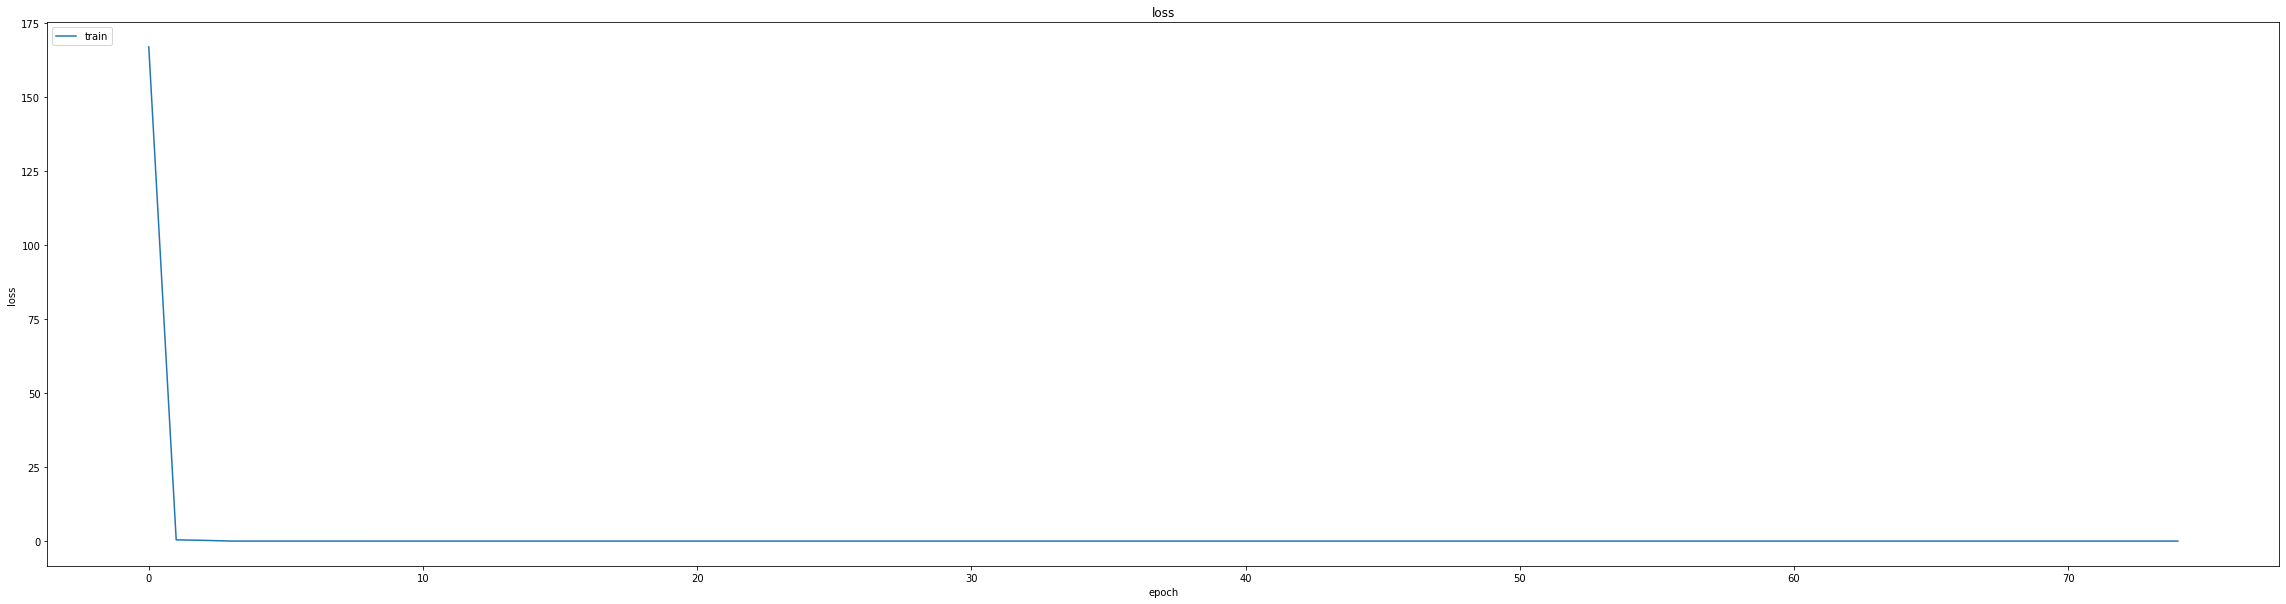

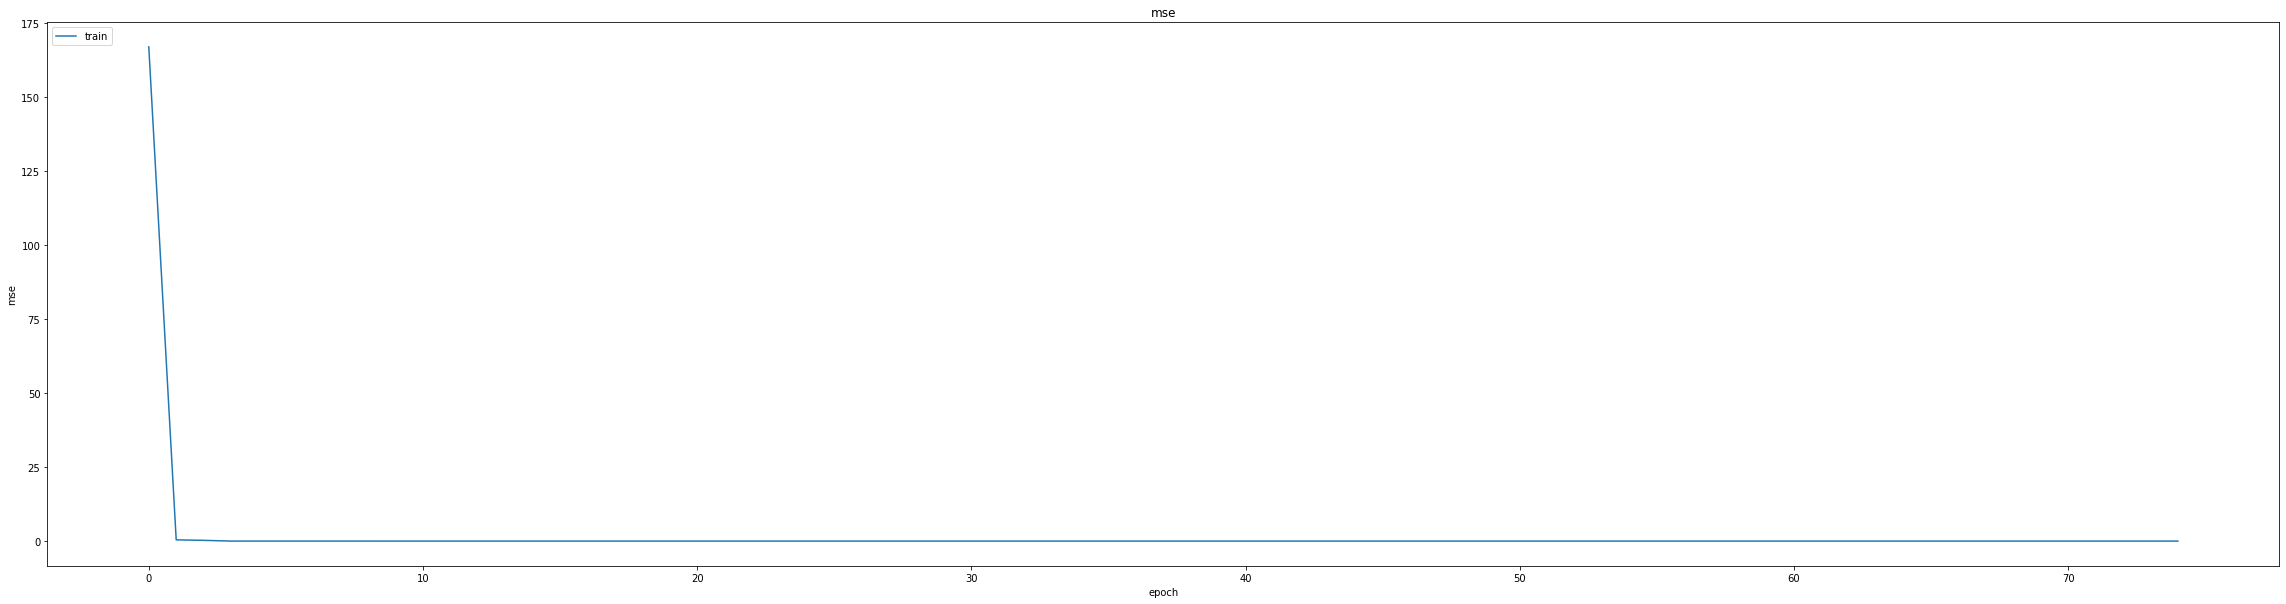

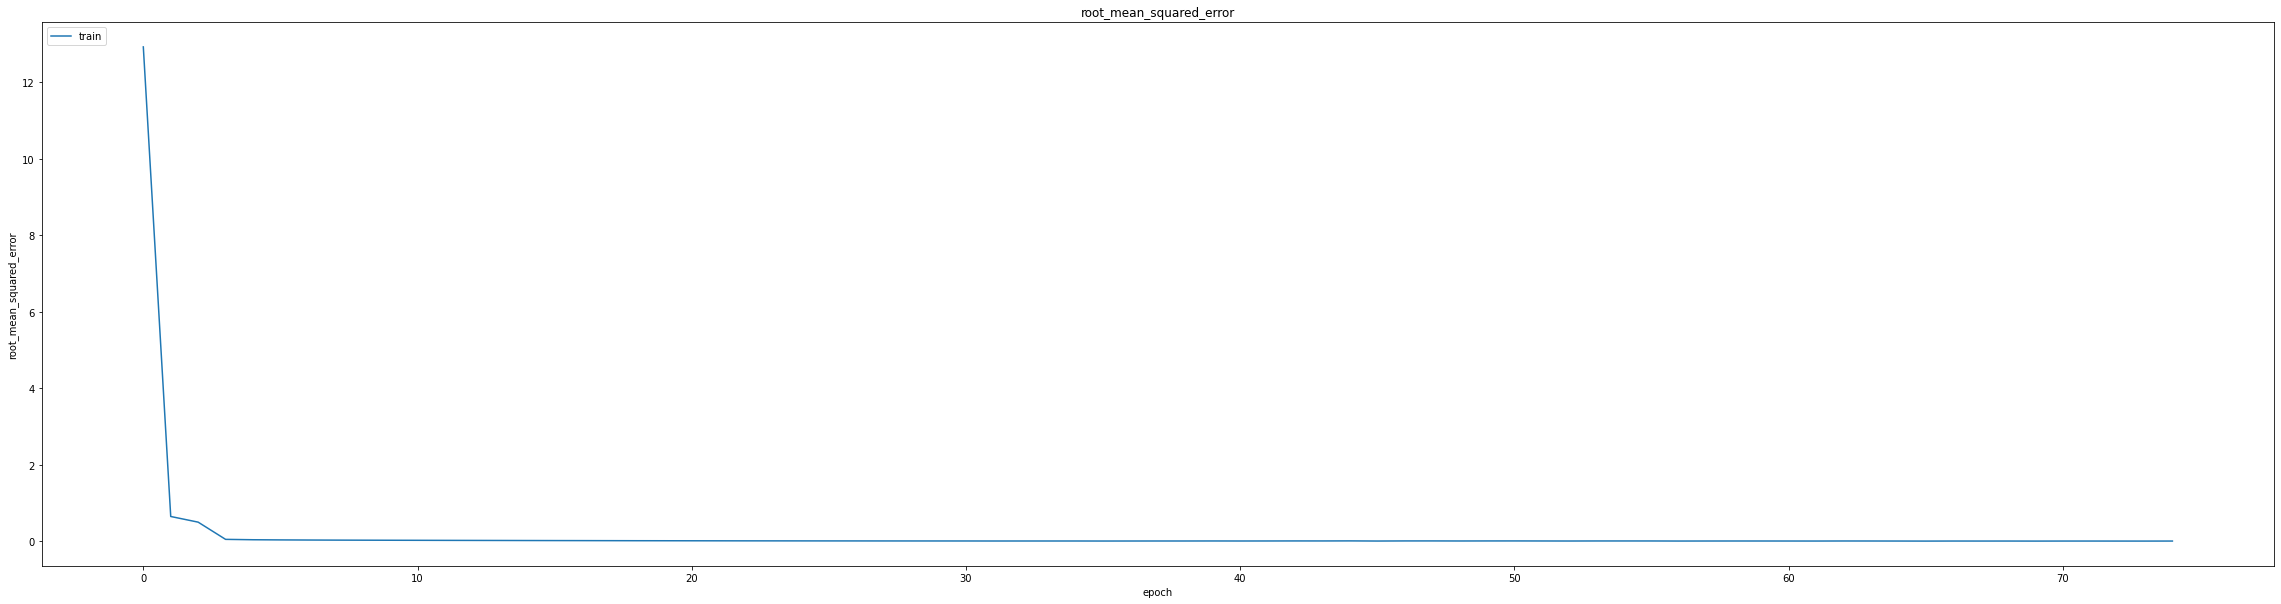

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006412337068468332
0.009257414378225803
348/348 [==============================] - 3s 5ms/step
0.9981610729685365


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


403/406 [============================>.] - ETA: 0s - loss: 9.5157e-04 - mae: 0.0111 - mse: 9.5157e-04 - root_mean_squared_error: 0.0308 - mape: 908.0166
Epoch 1: val_mse did not improve from 0.00009
406/406 [==============================] - 14s 19ms/step - loss: 9.4495e-04 - mae: 0.0110 - mse: 9.4495e-04 - root_mean_squared_error: 0.0307 - mape: 901.5546 - val_loss: 1.5185e-04 - val_mae: 0.0089 - val_mse: 1.5185e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 3747.7041 - lr: 0.0010
Epoch 2/25
403/406 [============================>.] - ETA: 0s - loss: 2.6613e-05 - mae: 0.0039 - mse: 2.6613e-05 - root_mean_squared_error: 0.0052 - mape: 1075.7919
Epoch 2: val_mse did not improve from 0.00009
406/406 [==============================] - 6s 15ms/step - loss: 2.6625e-05 - mae: 0.0039 - mse: 2.6625e-05 - root_mean_squared_error: 0.0052 - mape: 1068.1398 - val_loss: 9.7870e-05 - val_mae: 0.0080 - val_mse: 9.7870e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 3322.1621 - lr: 0.0010


406/406 [==============================] - 40s 99ms/step - loss: 2.6685e-05 - mae: 0.0039 - mse: 2.6685e-05 - root_mean_squared_error: 0.0052 - mape: 798.3730 - val_loss: 8.2816e-05 - val_mae: 0.0063 - val_mse: 8.2816e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 3191.7761 - lr: 9.0000e-04
Epoch 4/25
405/406 [============================>.] - ETA: 0s - loss: 4.0931e-05 - mae: 0.0049 - mse: 4.0931e-05 - root_mean_squared_error: 0.0064 - mape: 730.0911
Epoch 4: val_mse did not improve from 0.00008
406/406 [==============================] - 6s 14ms/step - loss: 4.1193e-05 - mae: 0.0049 - mse: 4.1193e-05 - root_mean_squared_error: 0.0064 - mape: 728.4933 - val_loss: 4.2773e-04 - val_mae: 0.0176 - val_mse: 4.2773e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 2890.9382 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
404/406 [============================>.] - ETA: 0s - loss: 5.0399e-05 - mae: 0.0055 - mse: 5.0399e-05 - root_mean_squared_error: 0.0071 - mape: 76

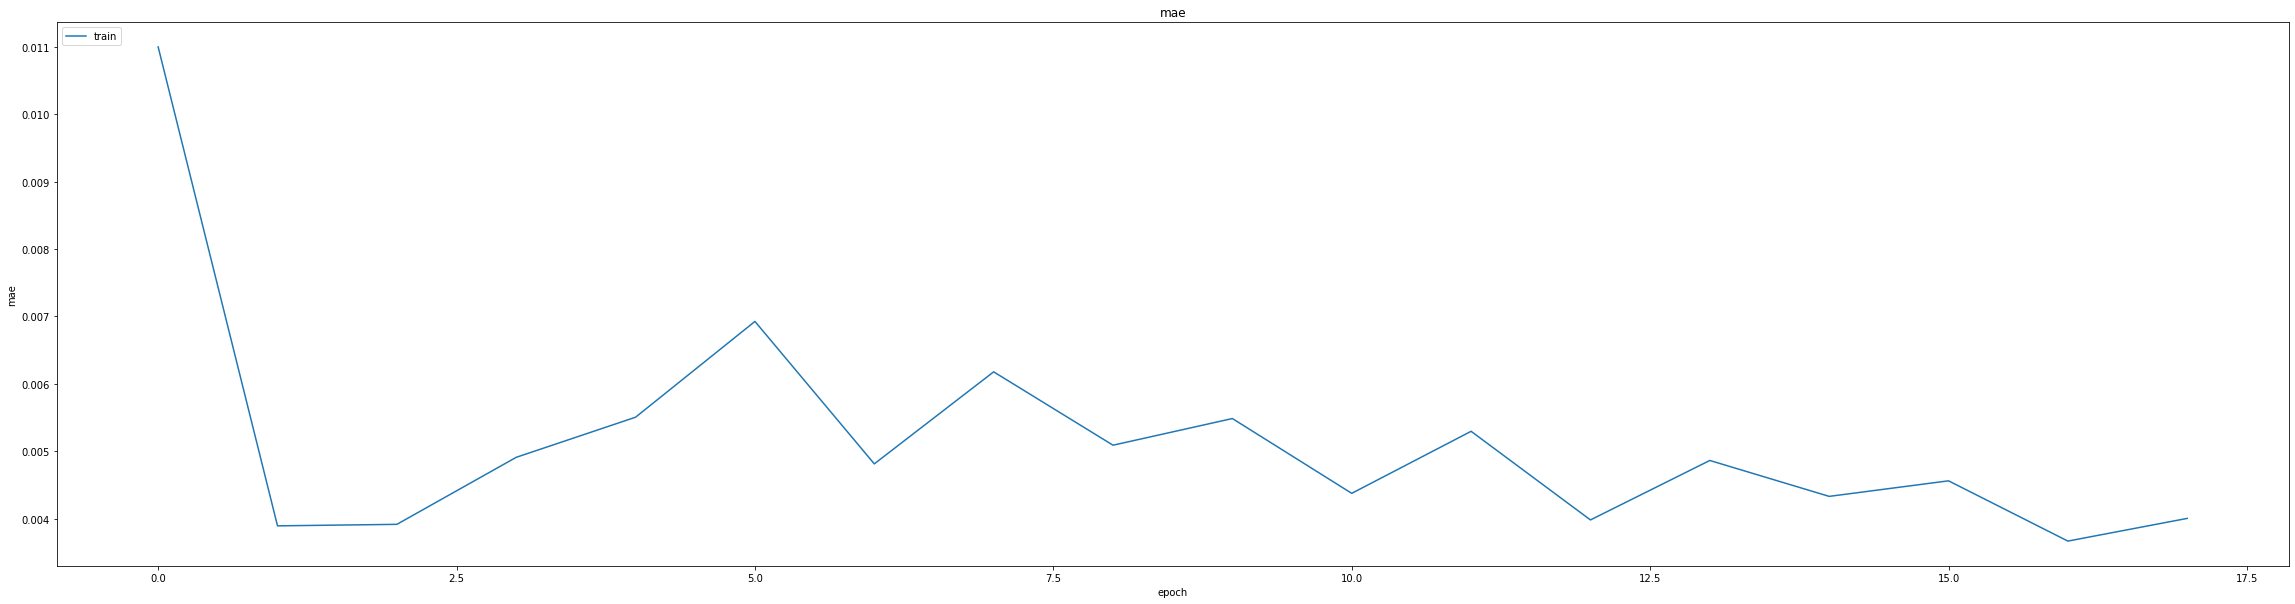

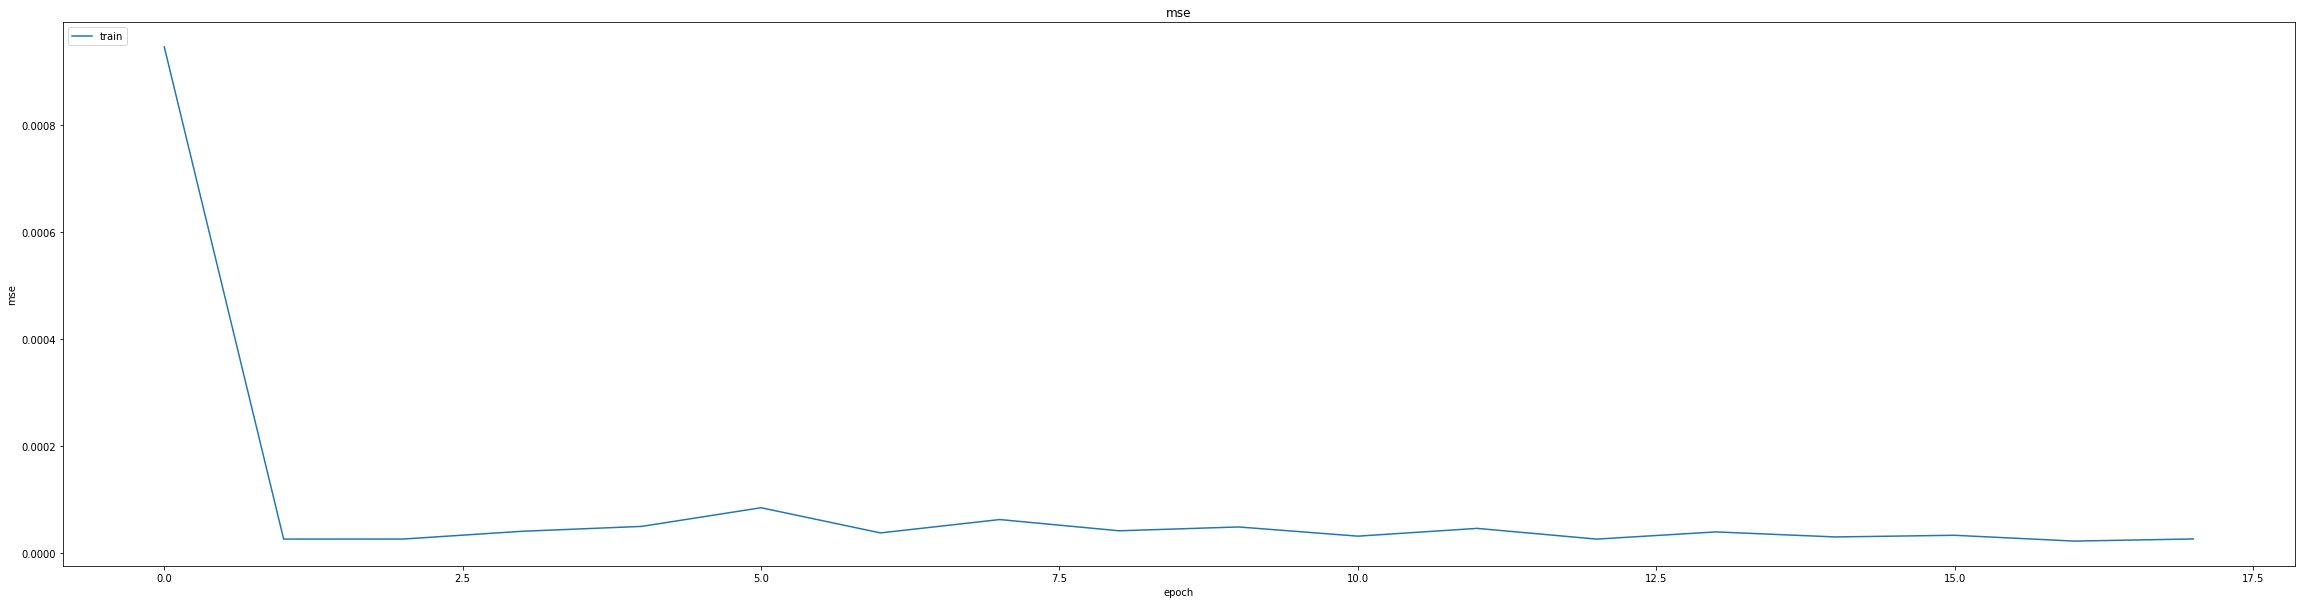

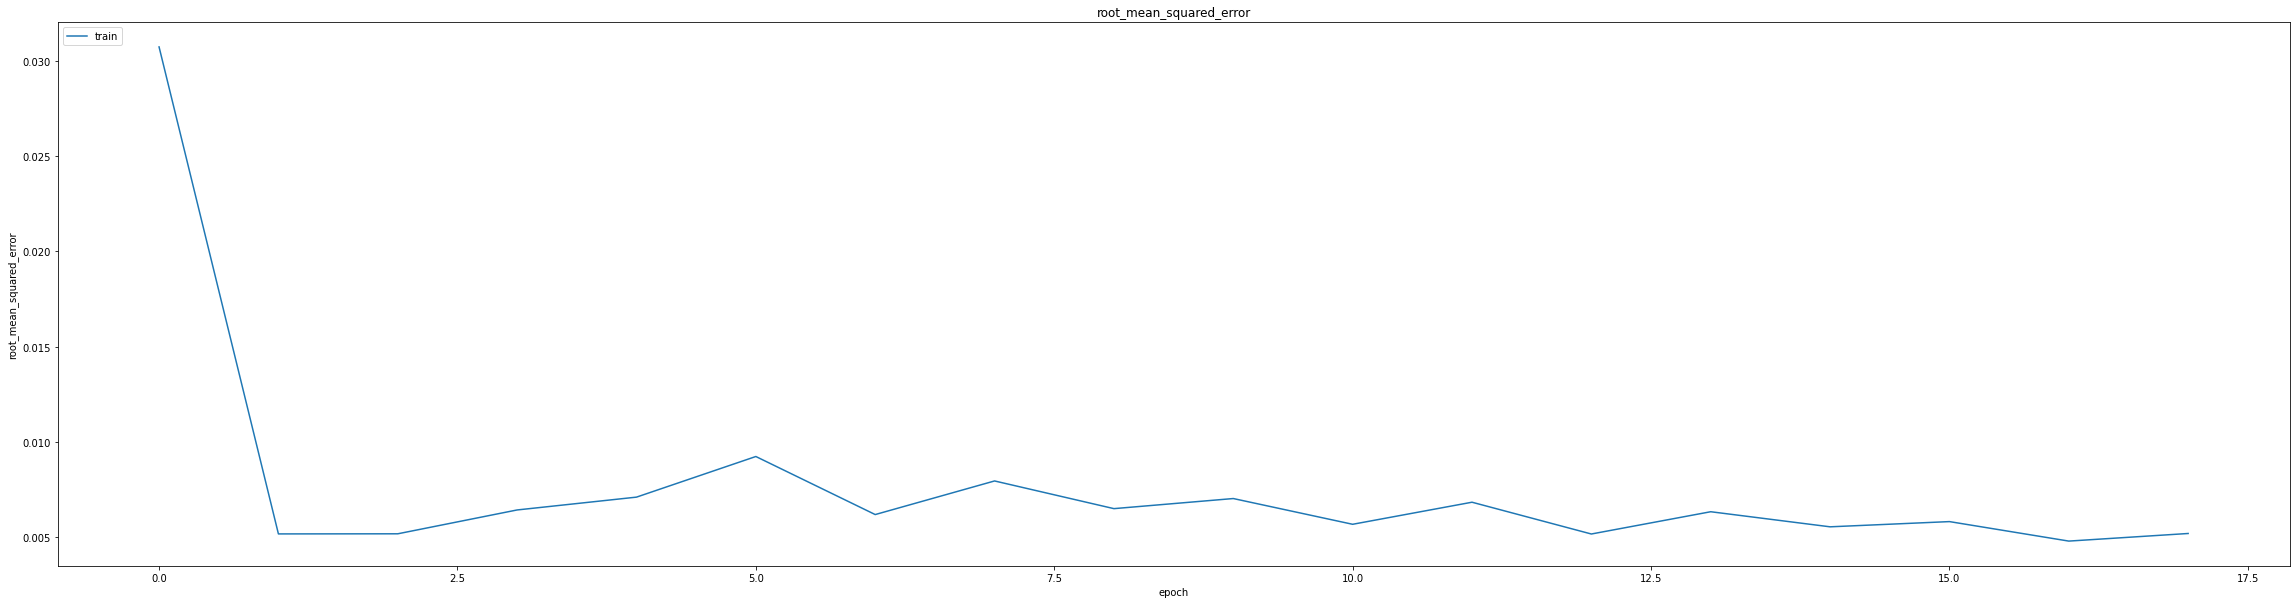

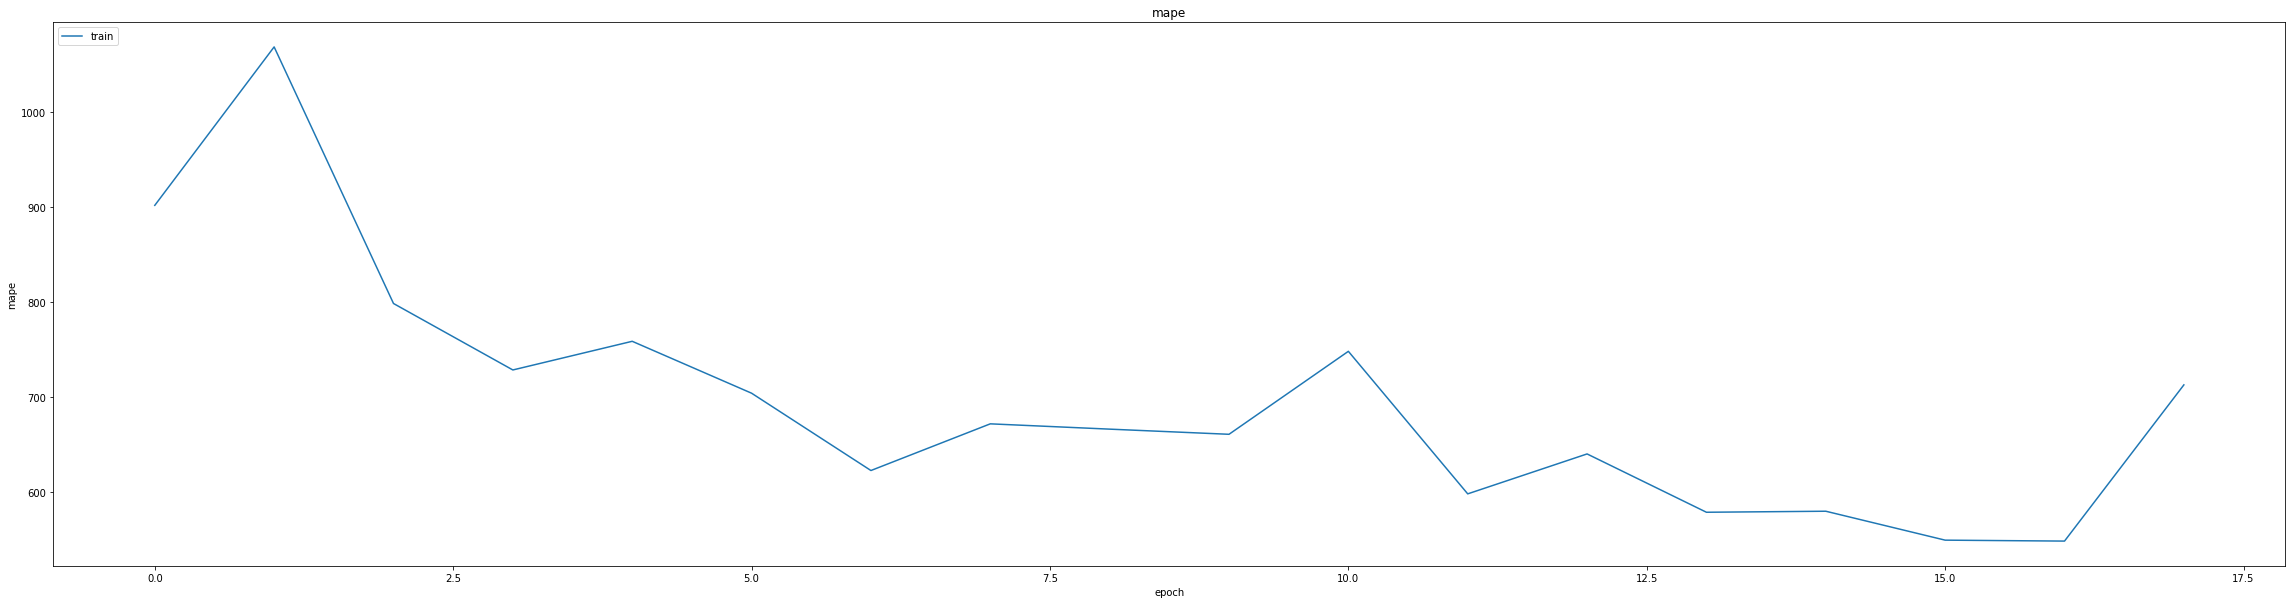

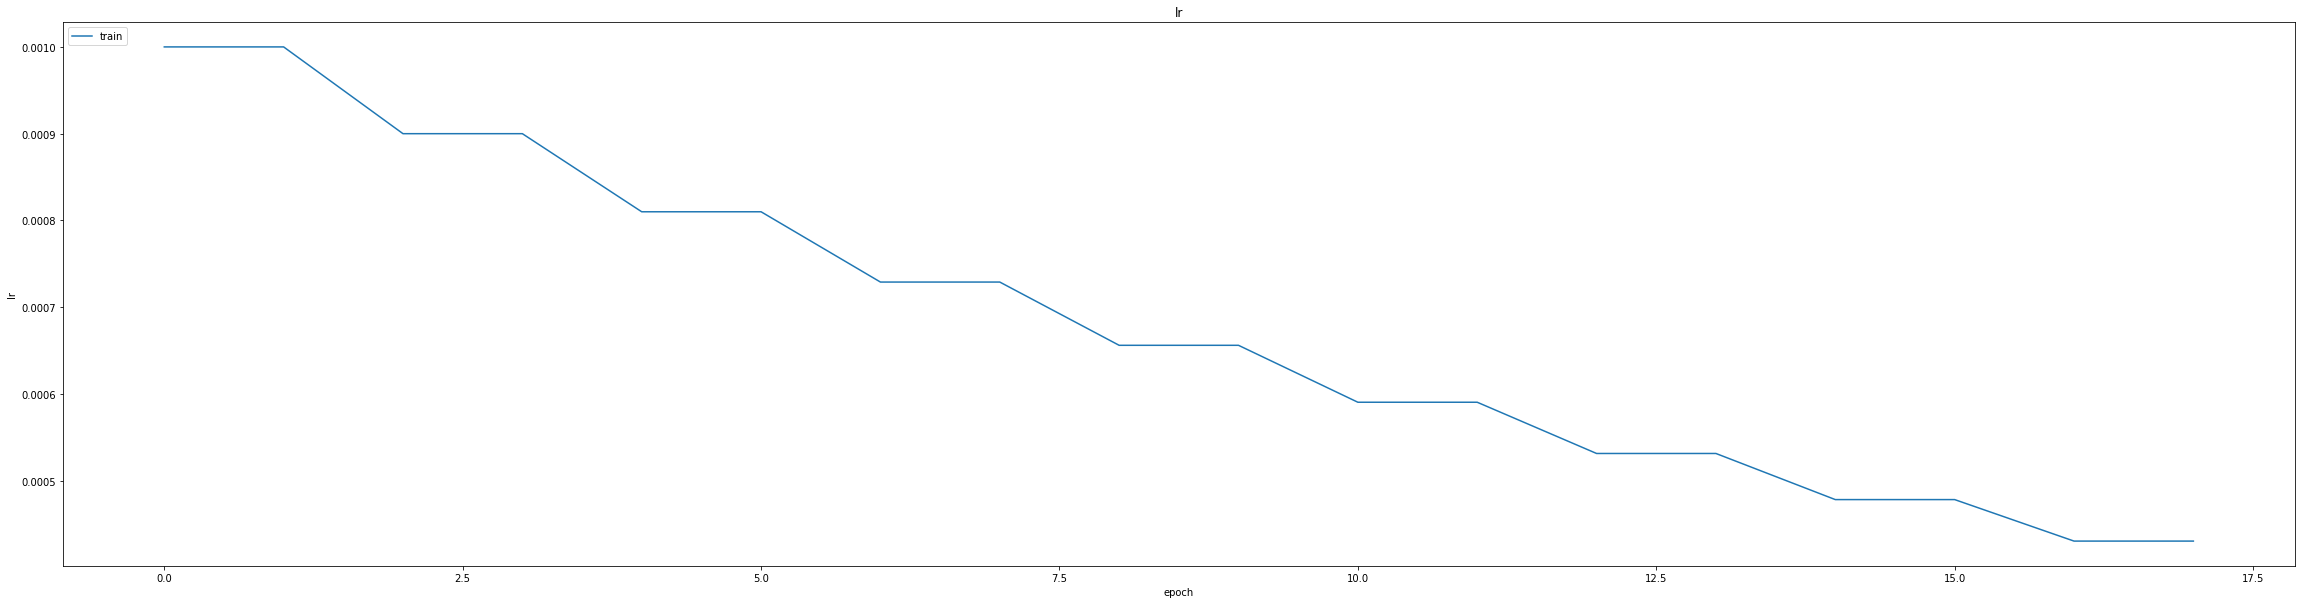

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006340211722999811
0.009100338444113731
348/348 [==============================] - 3s 5ms/step
0.9977814785504343


348/348 [==============================] - 2s 5ms/step


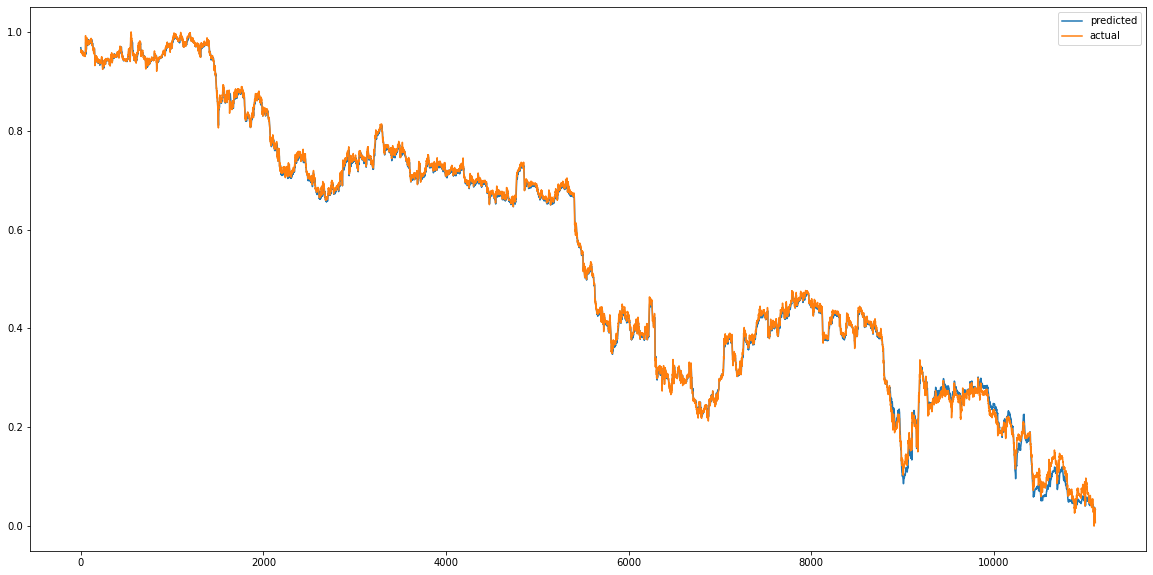

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


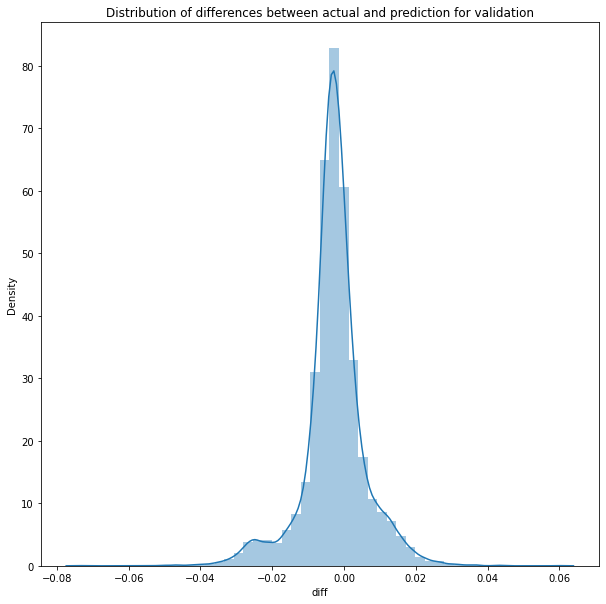

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 5ms/step


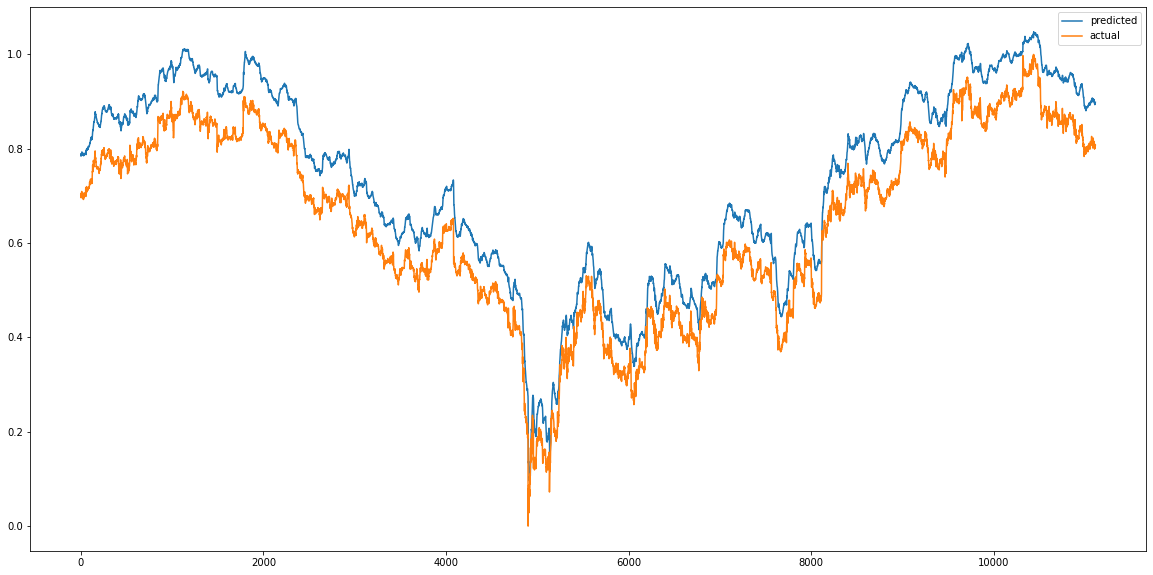

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.007161873861840402
RMSE :  0.08462785511780622
MAE :  0.08332443574474462
348/348 [==============================] - 2s 5ms/step
R2_Score  : 0.8183291485364755


count    11115.000000
mean         0.083301
std          0.014927
min         -0.039240
25%          0.074899
50%          0.083996
75%          0.093527
max          0.266483
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
405/406 [============================>.] - ETA: 0s - loss: 336.4166 - mae: 3.7498 - mse: 336.4166 - root_mean_squared_error: 18.3417 - mape: 41846.4414
Epoch 1: val_mse improved from inf to 0.46648, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 25s 54ms/step - loss: 335.6790 - mae: 3.7426 - mse: 335.6790 - root_mean_squared_error: 18.3215 - mape: 41754.8047 - val_loss: 0.4665 - val_mae: 0.6240 - val_mse: 0.4665 - val_root_mean_squared_error: 0.6830 - val_mape: 106656.3281
Epoch 2/75
405/406 [============================>.] - ETA: 0s - loss: 0.1514 - mae: 0.3237 - mse: 0.1514 - root_mean_squared_error: 0.3891 - mape: 21616.3867
Epoch 2: val_mse improved from 0.46648 to 0.16557, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.1512 - mae: 0.3234 - mse: 0.1512 - root_mean_squared_error: 0.3889 - mape: 21569.0801 - val_loss: 0.1656 - val_mae: 0.3332 - val_mse: 0.1656 - val_root_mean_squared_error: 0.4069 - val_mape: 77015.2266
Epoch 3/75
403/406 [============================>.] - ETA: 0s - loss: 0.0545 - mae: 0.1784 - mse: 0.0545 - root_mean_squared_error: 0.2335 - mape: 15759.4736
Epoch 3: val_mse improved from 0.16557 to 0.10805, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0545 - mae: 0.1784 - mse: 0.0545 - root_mean_squared_error: 0.2335 - mape: 15647.5977 - val_loss: 0.1080 - val_mae: 0.2637 - val_mse: 0.1080 - val_root_mean_squared_error: 0.3287 - val_mape: 66155.2266
Epoch 4/75
401/406 [============================>.] - ETA: 0s - loss: 0.0413 - mae: 0.1656 - mse: 0.0413 - root_mean_squared_error: 0.2031 - mape: 13858.1123
Epoch 4: val_mse improved from 0.10805 to 0.09373, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0412 - mae: 0.1655 - mse: 0.0412 - root_mean_squared_error: 0.2030 - mape: 13691.5488 - val_loss: 0.0937 - val_mae: 0.2509 - val_mse: 0.0937 - val_root_mean_squared_error: 0.3062 - val_mape: 62072.7891
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.0393 - mae: 0.1651 - mse: 0.0393 - root_mean_squared_error: 0.1982 - mape: 13343.9453
Epoch 5: val_mse improved from 0.09373 to 0.08931, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0393 - mae: 0.1651 - mse: 0.0393 - root_mean_squared_error: 0.1982 - mape: 13343.9453 - val_loss: 0.0893 - val_mae: 0.2484 - val_mse: 0.0893 - val_root_mean_squared_error: 0.2988 - val_mape: 60594.0469
Epoch 6/75
402/406 [============================>.] - ETA: 0s - loss: 0.0368 - mae: 0.1596 - mse: 0.0368 - root_mean_squared_error: 0.1920 - mape: 13401.7832
Epoch 6: val_mse improved from 0.08931 to 0.07808, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0368 - mae: 0.1594 - mse: 0.0368 - root_mean_squared_error: 0.1917 - mape: 13273.6006 - val_loss: 0.0781 - val_mae: 0.2251 - val_mse: 0.0781 - val_root_mean_squared_error: 0.2794 - val_mape: 58887.1641
Epoch 7/75
401/406 [============================>.] - ETA: 0s - loss: 0.0166 - mae: 0.0850 - mse: 0.0166 - root_mean_squared_error: 0.1287 - mape: 11527.7119
Epoch 7: val_mse improved from 0.07808 to 0.04240, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 0.0165 - mae: 0.0848 - mse: 0.0165 - root_mean_squared_error: 0.1285 - mape: 11389.0498 - val_loss: 0.0424 - val_mae: 0.1533 - val_mse: 0.0424 - val_root_mean_squared_error: 0.2059 - val_mape: 50651.3672
Epoch 8/75
403/406 [============================>.] - ETA: 0s - loss: 0.0097 - mae: 0.0639 - mse: 0.0097 - root_mean_squared_error: 0.0984 - mape: 10439.1377
Epoch 8: val_mse improved from 0.04240 to 0.03051, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0097 - mae: 0.0639 - mse: 0.0097 - root_mean_squared_error: 0.0983 - mape: 10364.9268 - val_loss: 0.0305 - val_mae: 0.1259 - val_mse: 0.0305 - val_root_mean_squared_error: 0.1747 - val_mape: 46081.0234
Epoch 9/75
402/406 [============================>.] - ETA: 0s - loss: 0.0069 - mae: 0.0550 - mse: 0.0069 - root_mean_squared_error: 0.0829 - mape: 9402.7363
Epoch 9: val_mse improved from 0.03051 to 0.02249, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0069 - mae: 0.0550 - mse: 0.0069 - root_mean_squared_error: 0.0828 - mape: 9312.9570 - val_loss: 0.0225 - val_mae: 0.1011 - val_mse: 0.0225 - val_root_mean_squared_error: 0.1500 - val_mape: 42525.5078
Epoch 10/75
405/406 [============================>.] - ETA: 0s - loss: 0.0048 - mae: 0.0453 - mse: 0.0048 - root_mean_squared_error: 0.0690 - mape: 8635.2061
Epoch 10: val_mse improved from 0.02249 to 0.01669, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0048 - mae: 0.0453 - mse: 0.0048 - root_mean_squared_error: 0.0690 - mape: 8616.2773 - val_loss: 0.0167 - val_mae: 0.0803 - val_mse: 0.0167 - val_root_mean_squared_error: 0.1292 - val_mape: 39418.5703
Epoch 11/75
405/406 [============================>.] - ETA: 0s - loss: 0.0036 - mae: 0.0390 - mse: 0.0036 - root_mean_squared_error: 0.0597 - mape: 8477.4014
Epoch 11: val_mse improved from 0.01669 to 0.01319, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0036 - mae: 0.0390 - mse: 0.0036 - root_mean_squared_error: 0.0597 - mape: 8458.8398 - val_loss: 0.0132 - val_mae: 0.0685 - val_mse: 0.0132 - val_root_mean_squared_error: 0.1148 - val_mape: 36995.4688
Epoch 12/75
402/406 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0335 - mse: 0.0027 - root_mean_squared_error: 0.0523 - mape: 7559.3315
Epoch 12: val_mse improved from 0.01319 to 0.01079, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0027 - mae: 0.0335 - mse: 0.0027 - root_mean_squared_error: 0.0522 - mape: 7486.9253 - val_loss: 0.0108 - val_mae: 0.0628 - val_mse: 0.0108 - val_root_mean_squared_error: 0.1039 - val_mape: 34900.0859
Epoch 13/75
403/406 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0294 - mse: 0.0022 - root_mean_squared_error: 0.0465 - mape: 7495.3867
Epoch 13: val_mse improved from 0.01079 to 0.00910, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0022 - mae: 0.0294 - mse: 0.0022 - root_mean_squared_error: 0.0465 - mape: 7442.1055 - val_loss: 0.0091 - val_mae: 0.0584 - val_mse: 0.0091 - val_root_mean_squared_error: 0.0954 - val_mape: 33180.3320
Epoch 14/75
402/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0267 - mse: 0.0018 - root_mean_squared_error: 0.0426 - mape: 7252.6528
Epoch 14: val_mse improved from 0.00910 to 0.00774, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0018 - mae: 0.0267 - mse: 0.0018 - root_mean_squared_error: 0.0426 - mape: 7183.2593 - val_loss: 0.0077 - val_mae: 0.0530 - val_mse: 0.0077 - val_root_mean_squared_error: 0.0880 - val_mape: 31750.7129
Epoch 15/75
402/406 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0249 - mse: 0.0016 - root_mean_squared_error: 0.0397 - mape: 6881.5566
Epoch 15: val_mse improved from 0.00774 to 0.00667, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0016 - mae: 0.0249 - mse: 0.0016 - root_mean_squared_error: 0.0397 - mape: 6815.6616 - val_loss: 0.0067 - val_mae: 0.0481 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0817 - val_mape: 30477.0020
Epoch 16/75
406/406 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0233 - mse: 0.0014 - root_mean_squared_error: 0.0374 - mape: 6634.5762
Epoch 16: val_mse improved from 0.00667 to 0.00577, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 0.0014 - mae: 0.0233 - mse: 0.0014 - root_mean_squared_error: 0.0374 - mape: 6634.5762 - val_loss: 0.0058 - val_mae: 0.0436 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0759 - val_mape: 29327.2129
Epoch 17/75
402/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0220 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 6310.8179
Epoch 17: val_mse improved from 0.00577 to 0.00498, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0012 - mae: 0.0220 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 6250.3950 - val_loss: 0.0050 - val_mae: 0.0385 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0706 - val_mape: 28282.6289
Epoch 18/75
405/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0208 - mse: 0.0011 - root_mean_squared_error: 0.0333 - mape: 5794.9536
Epoch 18: val_mse improved from 0.00498 to 0.00438, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0011 - mae: 0.0208 - mse: 0.0011 - root_mean_squared_error: 0.0333 - mape: 5782.2451 - val_loss: 0.0044 - val_mae: 0.0349 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0662 - val_mape: 27319.2637
Epoch 19/75
406/406 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0198 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 5709.3325
Epoch 19: val_mse improved from 0.00438 to 0.00387, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0010 - mae: 0.0198 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 5709.3325 - val_loss: 0.0039 - val_mae: 0.0325 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0622 - val_mape: 26379.3965
Epoch 20/75
401/406 [============================>.] - ETA: 0s - loss: 9.1711e-04 - mae: 0.0190 - mse: 9.1711e-04 - root_mean_squared_error: 0.0303 - mape: 5697.7764
Epoch 20: val_mse improved from 0.00387 to 0.00340, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 9.1567e-04 - mae: 0.0190 - mse: 9.1567e-04 - root_mean_squared_error: 0.0303 - mape: 5629.1807 - val_loss: 0.0034 - val_mae: 0.0302 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0583 - val_mape: 25400.1211
Epoch 21/75
406/406 [==============================] - ETA: 0s - loss: 8.3285e-04 - mae: 0.0183 - mse: 8.3285e-04 - root_mean_squared_error: 0.0289 - mape: 5385.2427
Epoch 21: val_mse improved from 0.00340 to 0.00298, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 8.3285e-04 - mae: 0.0183 - mse: 8.3285e-04 - root_mean_squared_error: 0.0289 - mape: 5385.2427 - val_loss: 0.0030 - val_mae: 0.0286 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0546 - val_mape: 24378.6387
Epoch 22/75
401/406 [============================>.] - ETA: 0s - loss: 7.5096e-04 - mae: 0.0175 - mse: 7.5096e-04 - root_mean_squared_error: 0.0274 - mape: 5376.1719
Epoch 22: val_mse improved from 0.00298 to 0.00259, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 7.4997e-04 - mae: 0.0175 - mse: 7.4997e-04 - root_mean_squared_error: 0.0274 - mape: 5311.4517 - val_loss: 0.0026 - val_mae: 0.0260 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0509 - val_mape: 23432.3691
Epoch 23/75
403/406 [============================>.] - ETA: 0s - loss: 6.8746e-04 - mae: 0.0169 - mse: 6.8746e-04 - root_mean_squared_error: 0.0262 - mape: 5023.7539
Epoch 23: val_mse improved from 0.00259 to 0.00229, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 6.8773e-04 - mae: 0.0169 - mse: 6.8773e-04 - root_mean_squared_error: 0.0262 - mape: 4988.0122 - val_loss: 0.0023 - val_mae: 0.0257 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0478 - val_mape: 22419.4316
Epoch 24/75
401/406 [============================>.] - ETA: 0s - loss: 6.2278e-04 - mae: 0.0163 - mse: 6.2278e-04 - root_mean_squared_error: 0.0250 - mape: 4764.1709
Epoch 24: val_mse improved from 0.00229 to 0.00194, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 6.2173e-04 - mae: 0.0163 - mse: 6.2173e-04 - root_mean_squared_error: 0.0249 - mape: 4706.8149 - val_loss: 0.0019 - val_mae: 0.0222 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0440 - val_mape: 21487.1074
Epoch 25/75
406/406 [==============================] - ETA: 0s - loss: 5.5957e-04 - mae: 0.0156 - mse: 5.5957e-04 - root_mean_squared_error: 0.0237 - mape: 4543.1626
Epoch 25: val_mse improved from 0.00194 to 0.00169, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 5.5957e-04 - mae: 0.0156 - mse: 5.5957e-04 - root_mean_squared_error: 0.0237 - mape: 4543.1626 - val_loss: 0.0017 - val_mae: 0.0220 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0412 - val_mape: 20422.7559
Epoch 26/75
404/406 [============================>.] - ETA: 0s - loss: 4.9913e-04 - mae: 0.0149 - mse: 4.9913e-04 - root_mean_squared_error: 0.0223 - mape: 4310.1875
Epoch 26: val_mse improved from 0.00169 to 0.00148, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 5.0028e-04 - mae: 0.0149 - mse: 5.0028e-04 - root_mean_squared_error: 0.0224 - mape: 4290.1455 - val_loss: 0.0015 - val_mae: 0.0213 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0385 - val_mape: 19460.3516
Epoch 27/75
401/406 [============================>.] - ETA: 0s - loss: 4.5336e-04 - mae: 0.0144 - mse: 4.5336e-04 - root_mean_squared_error: 0.0213 - mape: 4059.1455
Epoch 27: val_mse improved from 0.00148 to 0.00124, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 4.5414e-04 - mae: 0.0144 - mse: 4.5414e-04 - root_mean_squared_error: 0.0213 - mape: 4010.3042 - val_loss: 0.0012 - val_mae: 0.0186 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0351 - val_mape: 18565.3770
Epoch 28/75
402/406 [============================>.] - ETA: 0s - loss: 4.0949e-04 - mae: 0.0138 - mse: 4.0949e-04 - root_mean_squared_error: 0.0202 - mape: 4034.3635
Epoch 28: val_mse improved from 0.00124 to 0.00105, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 4.0892e-04 - mae: 0.0138 - mse: 4.0892e-04 - root_mean_squared_error: 0.0202 - mape: 3995.7229 - val_loss: 0.0011 - val_mae: 0.0171 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0324 - val_mape: 17683.0645
Epoch 29/75
402/406 [============================>.] - ETA: 0s - loss: 3.6765e-04 - mae: 0.0133 - mse: 3.6765e-04 - root_mean_squared_error: 0.0192 - mape: 3622.0364
Epoch 29: val_mse improved from 0.00105 to 0.00089, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 3.6673e-04 - mae: 0.0133 - mse: 3.6673e-04 - root_mean_squared_error: 0.0192 - mape: 3587.3430 - val_loss: 8.8737e-04 - val_mae: 0.0163 - val_mse: 8.8737e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 16627.0957
Epoch 30/75
403/406 [============================>.] - ETA: 0s - loss: 3.2852e-04 - mae: 0.0127 - mse: 3.2852e-04 - root_mean_squared_error: 0.0181 - mape: 3571.4255
Epoch 30: val_mse improved from 0.00089 to 0.00077, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 3.2877e-04 - mae: 0.0127 - mse: 3.2877e-04 - root_mean_squared_error: 0.0181 - mape: 3546.0208 - val_loss: 7.6961e-04 - val_mae: 0.0156 - val_mse: 7.6961e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 15807.7520
Epoch 31/75
406/406 [==============================] - ETA: 0s - loss: 2.9052e-04 - mae: 0.0121 - mse: 2.9052e-04 - root_mean_squared_error: 0.0170 - mape: 3233.8967
Epoch 31: val_mse improved from 0.00077 to 0.00063, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 2.9052e-04 - mae: 0.0121 - mse: 2.9052e-04 - root_mean_squared_error: 0.0170 - mape: 3233.8967 - val_loss: 6.3010e-04 - val_mae: 0.0147 - val_mse: 6.3010e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 14675.7207
Epoch 32/75
406/406 [==============================] - ETA: 0s - loss: 2.6086e-04 - mae: 0.0116 - mse: 2.6086e-04 - root_mean_squared_error: 0.0162 - mape: 3021.9854
Epoch 32: val_mse improved from 0.00063 to 0.00055, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 2.6086e-04 - mae: 0.0116 - mse: 2.6086e-04 - root_mean_squared_error: 0.0162 - mape: 3021.9854 - val_loss: 5.5058e-04 - val_mae: 0.0144 - val_mse: 5.5058e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 13834.0420
Epoch 33/75
404/406 [============================>.] - ETA: 0s - loss: 2.3182e-04 - mae: 0.0111 - mse: 2.3182e-04 - root_mean_squared_error: 0.0152 - mape: 2780.4275
Epoch 33: val_mse improved from 0.00055 to 0.00049, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 2.3190e-04 - mae: 0.0111 - mse: 2.3190e-04 - root_mean_squared_error: 0.0152 - mape: 2767.4980 - val_loss: 4.8585e-04 - val_mae: 0.0140 - val_mse: 4.8585e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 12998.1406
Epoch 34/75
403/406 [============================>.] - ETA: 0s - loss: 2.1125e-04 - mae: 0.0107 - mse: 2.1125e-04 - root_mean_squared_error: 0.0145 - mape: 2634.7278
Epoch 34: val_mse improved from 0.00049 to 0.00044, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 2.1074e-04 - mae: 0.0107 - mse: 2.1074e-04 - root_mean_squared_error: 0.0145 - mape: 2615.9753 - val_loss: 4.4335e-04 - val_mae: 0.0143 - val_mse: 4.4335e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 12141.1914
Epoch 35/75
404/406 [============================>.] - ETA: 0s - loss: 1.8846e-04 - mae: 0.0102 - mse: 1.8846e-04 - root_mean_squared_error: 0.0137 - mape: 2564.9546
Epoch 35: val_mse did not improve from 0.00044
406/406 [==============================] - 4s 10ms/step - loss: 1.8846e-04 - mae: 0.0102 - mse: 1.8846e-04 - root_mean_squared_error: 0.0137 - mape: 2553.0164 - val_loss: 4.5980e-04 - val_mae: 0.0154 - val_mse: 4.5980e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 11495.1191
Epoch 36/75
404/406 [============================>.] - ETA: 0s - loss: 1.7193e-04 - mae: 0.0097 - mse: 1.7193e-04 - root_mean_squared_error: 0.0131 - mape: 2368.2266
Epoch 36: val_mse improved from 0.00044 to 0.00036, sa

406/406 [==============================] - 12s 29ms/step - loss: 1.7201e-04 - mae: 0.0097 - mse: 1.7201e-04 - root_mean_squared_error: 0.0131 - mape: 2357.2119 - val_loss: 3.6484e-04 - val_mae: 0.0131 - val_mse: 3.6484e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 10871.3232
Epoch 37/75
406/406 [==============================] - ETA: 0s - loss: 1.5924e-04 - mae: 0.0094 - mse: 1.5924e-04 - root_mean_squared_error: 0.0126 - mape: 2263.3984
Epoch 37: val_mse improved from 0.00036 to 0.00035, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 1.5924e-04 - mae: 0.0094 - mse: 1.5924e-04 - root_mean_squared_error: 0.0126 - mape: 2263.3984 - val_loss: 3.4859e-04 - val_mae: 0.0133 - val_mse: 3.4859e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 10392.1650
Epoch 38/75
405/406 [============================>.] - ETA: 0s - loss: 1.4894e-04 - mae: 0.0092 - mse: 1.4894e-04 - root_mean_squared_error: 0.0122 - mape: 2177.9727
Epoch 38: val_mse improved from 0.00035 to 0.00031, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 1.4898e-04 - mae: 0.0092 - mse: 1.4898e-04 - root_mean_squared_error: 0.0122 - mape: 2173.1990 - val_loss: 3.1423e-04 - val_mae: 0.0123 - val_mse: 3.1423e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 9874.4551
Epoch 39/75
402/406 [============================>.] - ETA: 0s - loss: 1.3646e-04 - mae: 0.0088 - mse: 1.3646e-04 - root_mean_squared_error: 0.0117 - mape: 2045.9169
Epoch 39: val_mse improved from 0.00031 to 0.00031, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 1.3645e-04 - mae: 0.0088 - mse: 1.3645e-04 - root_mean_squared_error: 0.0117 - mape: 2026.3214 - val_loss: 3.0999e-04 - val_mae: 0.0119 - val_mse: 3.0999e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 9638.2051
Epoch 40/75
401/406 [============================>.] - ETA: 0s - loss: 1.3253e-04 - mae: 0.0087 - mse: 1.3253e-04 - root_mean_squared_error: 0.0115 - mape: 1956.1116
Epoch 40: val_mse improved from 0.00031 to 0.00026, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 1.3242e-04 - mae: 0.0087 - mse: 1.3242e-04 - root_mean_squared_error: 0.0115 - mape: 1932.5609 - val_loss: 2.5858e-04 - val_mae: 0.0108 - val_mse: 2.5858e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 9057.8965
Epoch 41/75
403/406 [============================>.] - ETA: 0s - loss: 1.3349e-04 - mae: 0.0088 - mse: 1.3349e-04 - root_mean_squared_error: 0.0116 - mape: 1847.1193
Epoch 41: val_mse did not improve from 0.00026
406/406 [==============================] - 4s 10ms/step - loss: 1.3343e-04 - mae: 0.0088 - mse: 1.3343e-04 - root_mean_squared_error: 0.0116 - mape: 1833.9766 - val_loss: 2.9242e-04 - val_mae: 0.0121 - val_mse: 2.9242e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 8724.0791
Epoch 42/75
405/406 [============================>.] - ETA: 0s - loss: 1.2563e-04 - mae: 0.0086 - mse: 1.2563e-04 - root_mean_squared_error: 0.0112 - mape: 1798.4244
Epoch 42: val_mse did not improve from 0.00026
406/406 [

406/406 [==============================] - 11s 27ms/step - loss: 1.3035e-04 - mae: 0.0087 - mse: 1.3035e-04 - root_mean_squared_error: 0.0114 - mape: 1612.9008 - val_loss: 2.2895e-04 - val_mae: 0.0107 - val_mse: 2.2895e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 7726.2271
Epoch 46/75
402/406 [============================>.] - ETA: 0s - loss: 1.1703e-04 - mae: 0.0083 - mse: 1.1703e-04 - root_mean_squared_error: 0.0108 - mape: 1591.0359
Epoch 46: val_mse did not improve from 0.00023
406/406 [==============================] - 4s 10ms/step - loss: 1.1668e-04 - mae: 0.0083 - mse: 1.1668e-04 - root_mean_squared_error: 0.0108 - mape: 1575.8041 - val_loss: 2.5828e-04 - val_mae: 0.0104 - val_mse: 2.5828e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 7931.1250
Epoch 47/75
403/406 [============================>.] - ETA: 0s - loss: 1.0908e-04 - mae: 0.0080 - mse: 1.0908e-04 - root_mean_squared_error: 0.0104 - mape: 1576.7439
Epoch 47: val_mse improved from 0.00023 to 0.00022, savi

406/406 [==============================] - 13s 31ms/step - loss: 1.0887e-04 - mae: 0.0080 - mse: 1.0887e-04 - root_mean_squared_error: 0.0104 - mape: 1565.5255 - val_loss: 2.1969e-04 - val_mae: 0.0101 - val_mse: 2.1969e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 7367.7603
Epoch 48/75
405/406 [============================>.] - ETA: 0s - loss: 1.2842e-04 - mae: 0.0087 - mse: 1.2842e-04 - root_mean_squared_error: 0.0113 - mape: 1453.1398
Epoch 48: val_mse did not improve from 0.00022
406/406 [==============================] - 4s 10ms/step - loss: 1.2846e-04 - mae: 0.0087 - mse: 1.2846e-04 - root_mean_squared_error: 0.0113 - mape: 1449.9550 - val_loss: 3.0007e-04 - val_mae: 0.0124 - val_mse: 3.0007e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 7655.3584
Epoch 49/75
401/406 [============================>.] - ETA: 0s - loss: 1.2118e-04 - mae: 0.0085 - mse: 1.2118e-04 - root_mean_squared_error: 0.0110 - mape: 1526.5608
Epoch 49: val_mse did not improve from 0.00022
406/406 [

406/406 [==============================] - 11s 28ms/step - loss: 1.0623e-04 - mae: 0.0079 - mse: 1.0623e-04 - root_mean_squared_error: 0.0103 - mape: 1287.0461 - val_loss: 2.0144e-04 - val_mae: 0.0092 - val_mse: 2.0144e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 6579.4312
Epoch 55/75
402/406 [============================>.] - ETA: 0s - loss: 1.2648e-04 - mae: 0.0087 - mse: 1.2648e-04 - root_mean_squared_error: 0.0112 - mape: 1246.1827
Epoch 55: val_mse improved from 0.00020 to 0.00020, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 1.2584e-04 - mae: 0.0087 - mse: 1.2584e-04 - root_mean_squared_error: 0.0112 - mape: 1234.2496 - val_loss: 1.9809e-04 - val_mae: 0.0092 - val_mse: 1.9809e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 6569.5234
Epoch 56/75
403/406 [============================>.] - ETA: 0s - loss: 1.1010e-04 - mae: 0.0082 - mse: 1.1010e-04 - root_mean_squared_error: 0.0105 - mape: 1309.5913
Epoch 56: val_mse did not improve from 0.00020
406/406 [==============================] - 4s 10ms/step - loss: 1.0983e-04 - mae: 0.0082 - mse: 1.0983e-04 - root_mean_squared_error: 0.0105 - mape: 1300.2839 - val_loss: 2.1512e-04 - val_mae: 0.0101 - val_mse: 2.1512e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 6176.2461
Epoch 57/75
405/406 [============================>.] - ETA: 0s - loss: 9.5514e-05 - mae: 0.0076 - mse: 9.5514e-05 - root_mean_squared_error: 0.0098 - mape: 1249.1777
Epoch 57: val_mse did not improve from 0.00020
406/406 [

406/406 [==============================] - 12s 29ms/step - loss: 9.1359e-05 - mae: 0.0075 - mse: 9.1359e-05 - root_mean_squared_error: 0.0096 - mape: 1127.6313 - val_loss: 1.7673e-04 - val_mae: 0.0099 - val_mse: 1.7673e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 7007.5898
Epoch 62/75
402/406 [============================>.] - ETA: 0s - loss: 9.6100e-05 - mae: 0.0077 - mse: 9.6100e-05 - root_mean_squared_error: 0.0098 - mape: 1129.1964
Epoch 62: val_mse did not improve from 0.00018
406/406 [==============================] - 4s 10ms/step - loss: 9.6642e-05 - mae: 0.0077 - mse: 9.6642e-05 - root_mean_squared_error: 0.0098 - mape: 1118.3895 - val_loss: 2.9394e-04 - val_mae: 0.0145 - val_mse: 2.9394e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 6050.9980
Epoch 63/75
404/406 [============================>.] - ETA: 0s - loss: 8.7714e-05 - mae: 0.0073 - mse: 8.7714e-05 - root_mean_squared_error: 0.0094 - mape: 1175.2786
Epoch 63: val_mse did not improve from 0.00018
406/406 [

406/406 [==============================] - 12s 29ms/step - loss: 7.9823e-05 - mae: 0.0070 - mse: 7.9823e-05 - root_mean_squared_error: 0.0089 - mape: 1020.6285 - val_loss: 1.6017e-04 - val_mae: 0.0081 - val_mse: 1.6017e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 7431.6660
Epoch 67/75
401/406 [============================>.] - ETA: 0s - loss: 9.0785e-05 - mae: 0.0074 - mse: 9.0785e-05 - root_mean_squared_error: 0.0095 - mape: 1219.7965
Epoch 67: val_mse improved from 0.00016 to 0.00013, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 9.0395e-05 - mae: 0.0074 - mse: 9.0395e-05 - root_mean_squared_error: 0.0095 - mape: 1205.1156 - val_loss: 1.2831e-04 - val_mae: 0.0085 - val_mse: 1.2831e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 7164.7168
Epoch 68/75
404/406 [============================>.] - ETA: 0s - loss: 7.1279e-05 - mae: 0.0065 - mse: 7.1279e-05 - root_mean_squared_error: 0.0084 - mape: 1079.2220
Epoch 68: val_mse did not improve from 0.00013
406/406 [==============================] - 4s 10ms/step - loss: 7.1184e-05 - mae: 0.0065 - mse: 7.1184e-05 - root_mean_squared_error: 0.0084 - mape: 1074.2035 - val_loss: 1.4468e-04 - val_mae: 0.0093 - val_mse: 1.4468e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 7687.7236
Epoch 69/75
403/406 [============================>.] - ETA: 0s - loss: 8.0291e-05 - mae: 0.0070 - mse: 8.0291e-05 - root_mean_squared_error: 0.0090 - mape: 1029.9247
Epoch 69: val_mse improved from 0.00013 to 0.00008, savi

406/406 [==============================] - 13s 31ms/step - loss: 8.0544e-05 - mae: 0.0070 - mse: 8.0544e-05 - root_mean_squared_error: 0.0090 - mape: 1022.6005 - val_loss: 8.1793e-05 - val_mae: 0.0063 - val_mse: 8.1793e-05 - val_root_mean_squared_error: 0.0090 - val_mape: 4914.8569
Epoch 70/75
406/406 [==============================] - ETA: 0s - loss: 6.3061e-05 - mae: 0.0062 - mse: 6.3061e-05 - root_mean_squared_error: 0.0079 - mape: 1051.2893
Epoch 70: val_mse did not improve from 0.00008
406/406 [==============================] - 4s 10ms/step - loss: 6.3061e-05 - mae: 0.0062 - mse: 6.3061e-05 - root_mean_squared_error: 0.0079 - mape: 1051.2893 - val_loss: 1.5370e-04 - val_mae: 0.0085 - val_mse: 1.5370e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 7127.0786
Epoch 71/75
404/406 [============================>.] - ETA: 0s - loss: 7.9019e-05 - mae: 0.0070 - mse: 7.9019e-05 - root_mean_squared_error: 0.0089 - mape: 1202.2244
Epoch 71: val_mse did not improve from 0.00008
406/406 [

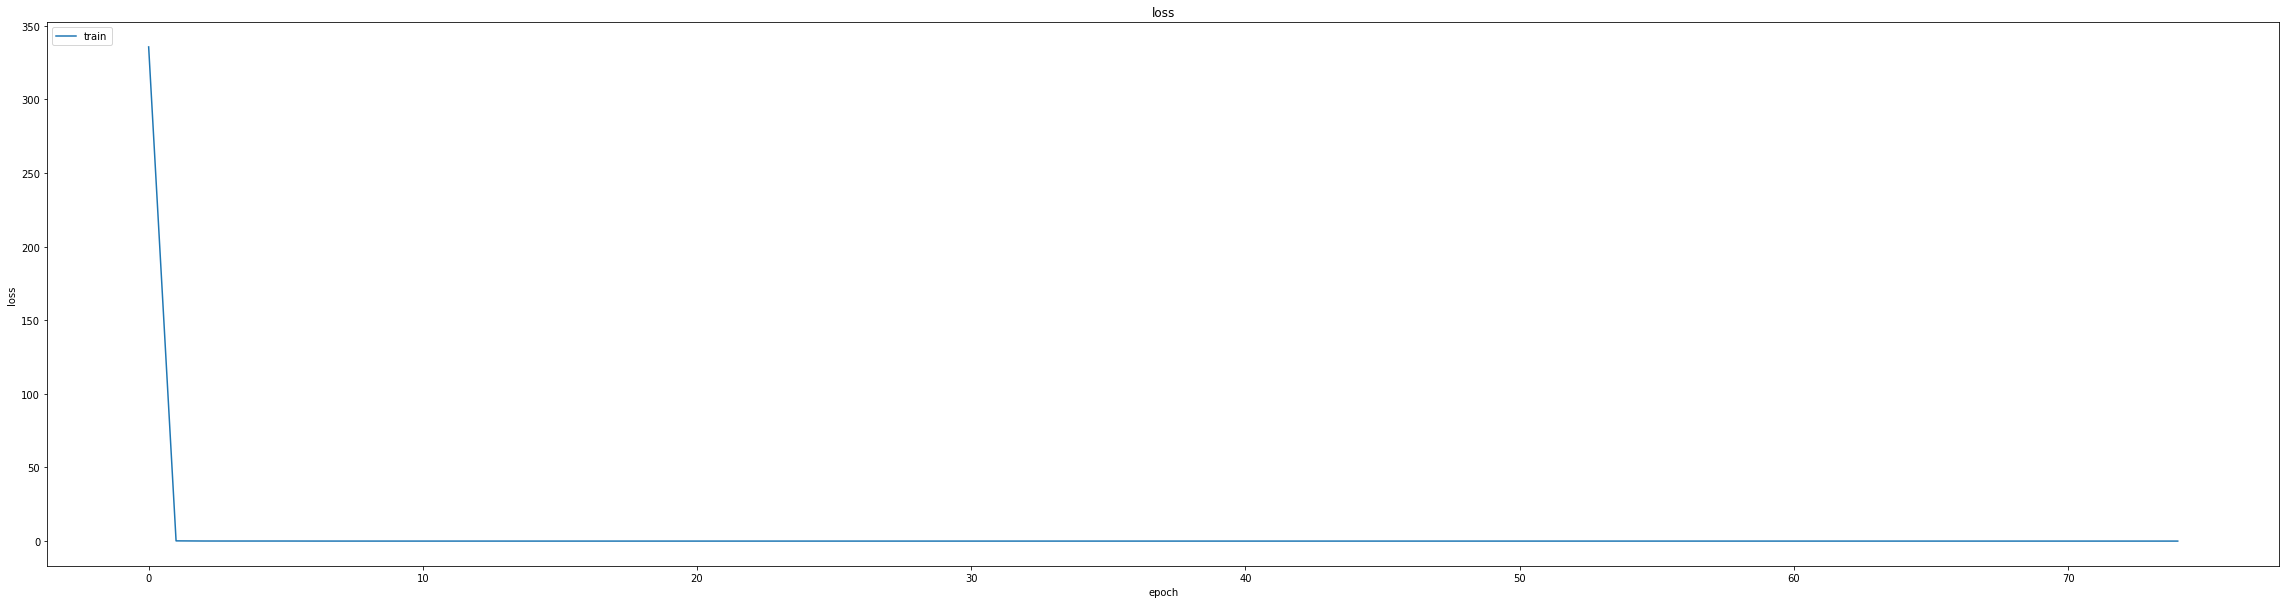

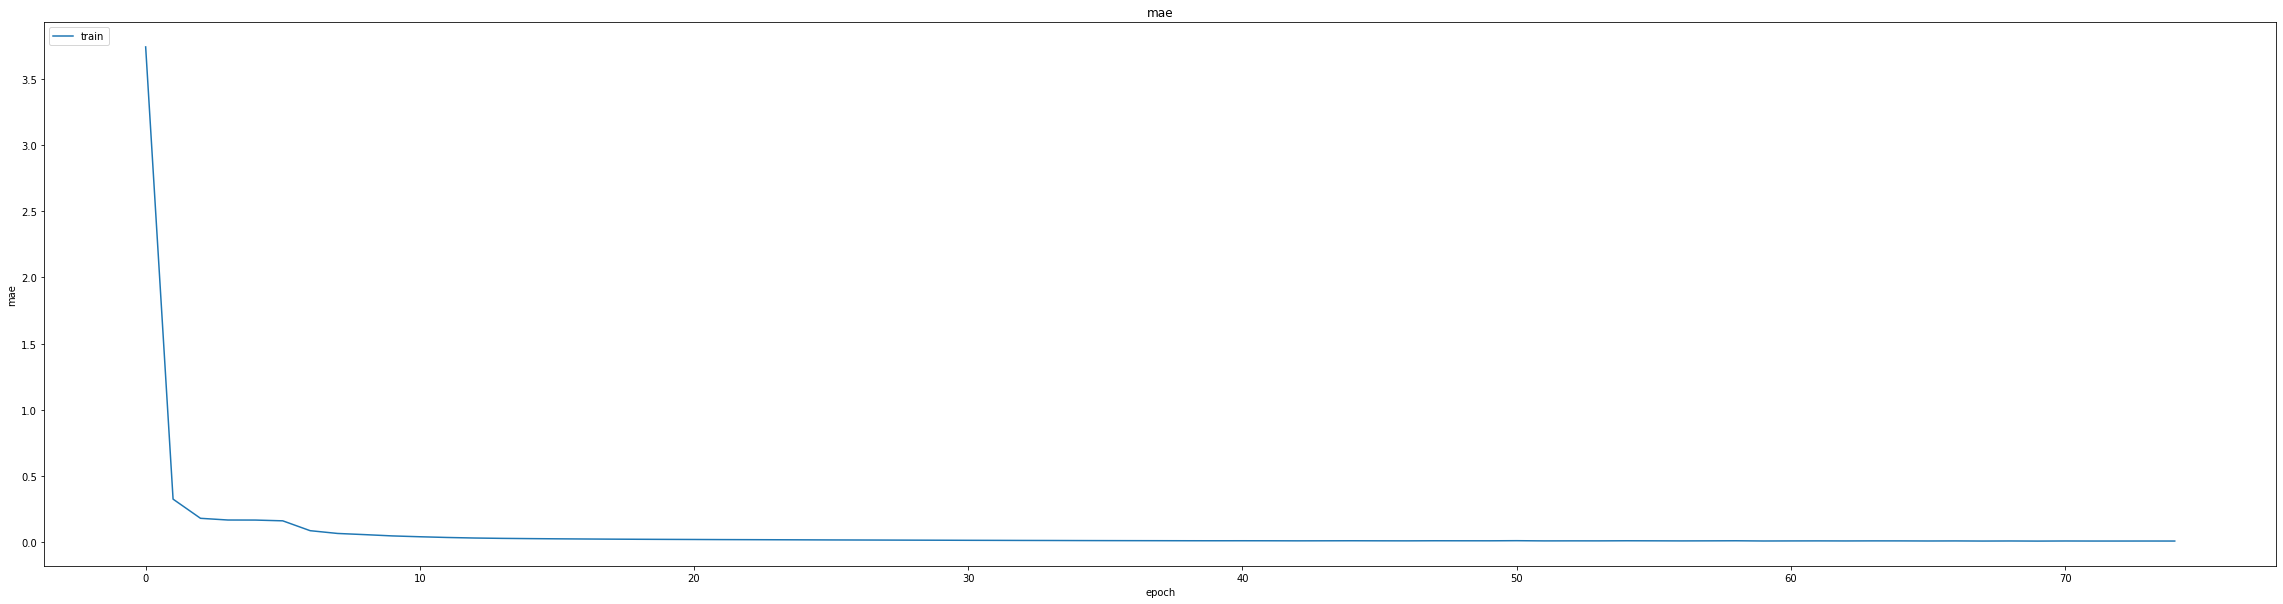

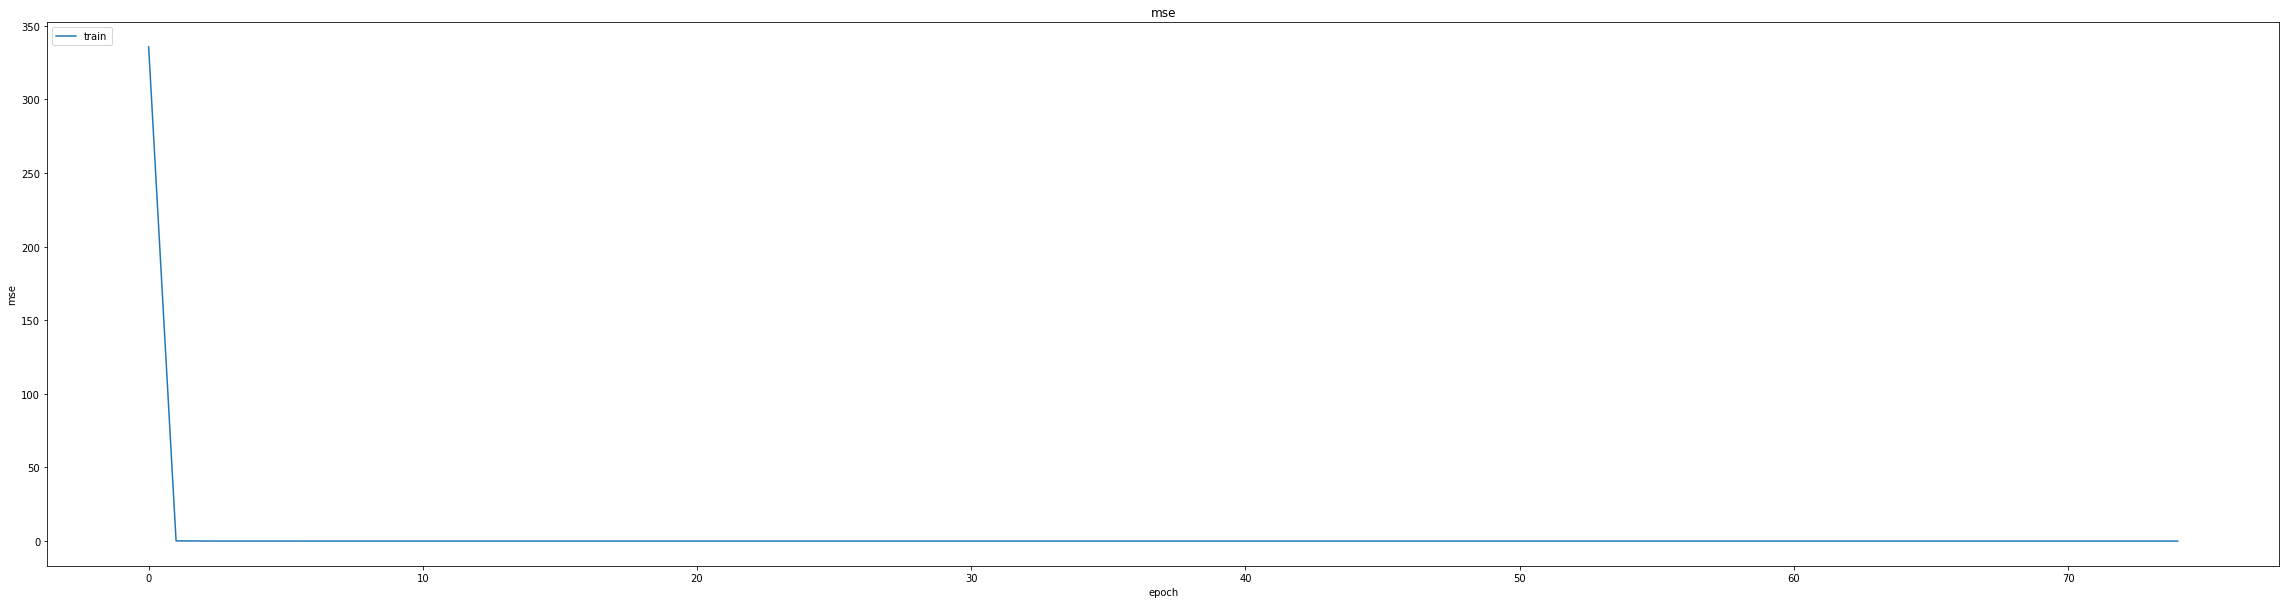

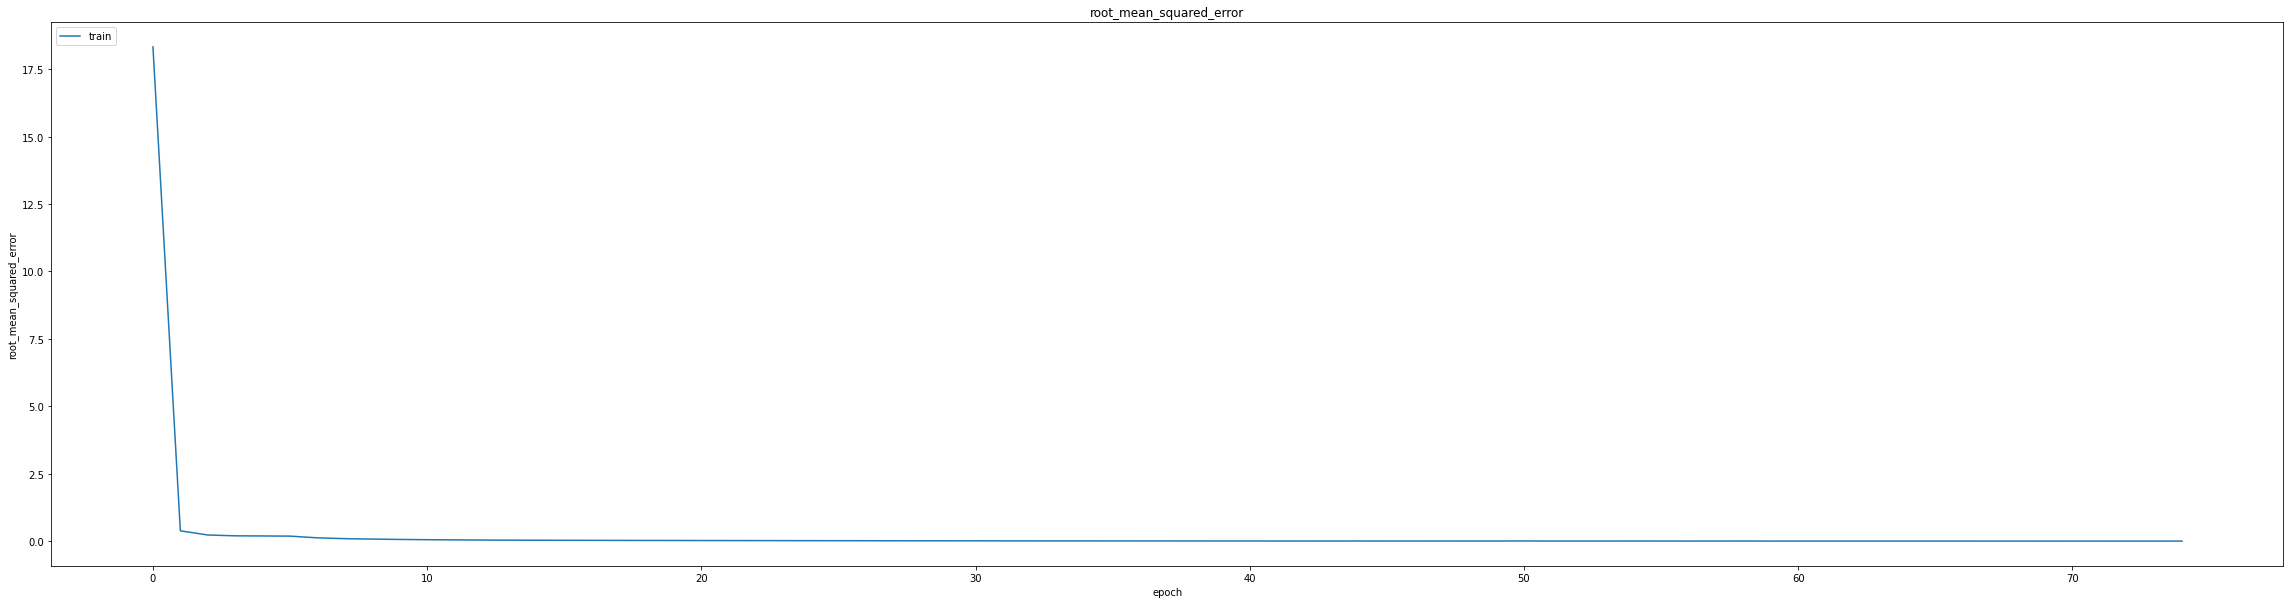

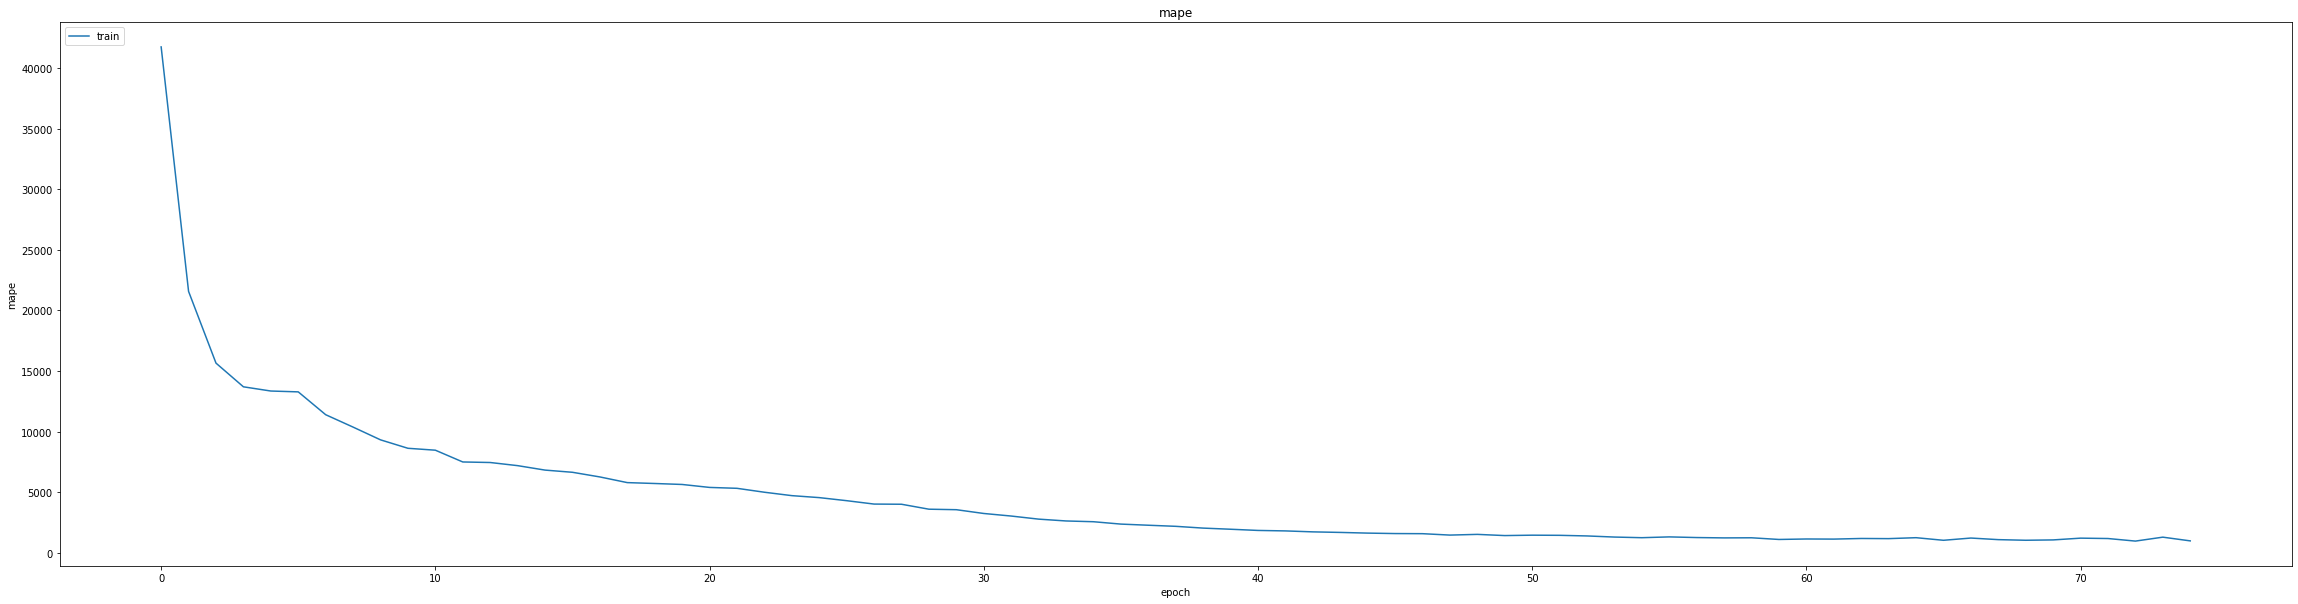

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006340074352920055
0.009043924510478973
348/348 [==============================] - 2s 3ms/step
0.9984345016602246


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
402/406 [============================>.] - ETA: 0s - loss: 2.4140e-04 - mae: 0.0076 - mse: 2.4140e-04 - root_mean_squared_error: 0.0155 - mape: 1224.2721
Epoch 1: val_mse did not improve from 0.00008
406/406 [==============================] - 7s 11ms/step - loss: 2.3958e-04 - mae: 0.0075 - mse: 2.3958e-04 - root_mean_squared_error: 0.0155 - mape: 1212.5494 - val_loss: 8.3659e-05 - val_mae: 0.0067 - val_mse: 8.3659e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 5999.6211 - lr: 0.0010
Epoch 2/25
401/406 [============================>.] - ETA: 0s - loss: 4.5826e-05 - mae: 0.0051 - mse: 4.5826e-05 - root_mean_squared_error: 0.0068 - mape: 1014.1445
Epoch 2: val_mse did not improve from 0.00008
406/406 [==============================] - 4s 9ms/step - loss: 4.6247e-05 - mae: 0.0051 - mse: 4.6247e-05 - root_mean_squared_error: 0.0068 - mape: 1001.9394 - val_loss: 9.8928e-05 - val_mae: 0.0073 - val_mse: 9.8928e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 4839.8691 - 

406/406 [==============================] - 12s 30ms/step - loss: 3.7555e-05 - mae: 0.0047 - mse: 3.7555e-05 - root_mean_squared_error: 0.0061 - mape: 1163.4093 - val_loss: 7.9480e-05 - val_mae: 0.0061 - val_mse: 7.9480e-05 - val_root_mean_squared_error: 0.0089 - val_mape: 6927.4077 - lr: 6.5610e-04
Epoch 10/25
405/406 [============================>.] - ETA: 0s - loss: 4.3745e-05 - mae: 0.0051 - mse: 4.3745e-05 - root_mean_squared_error: 0.0066 - mape: 881.5723
Epoch 10: val_mse did not improve from 0.00008
406/406 [==============================] - 4s 10ms/step - loss: 4.3717e-05 - mae: 0.0051 - mse: 4.3717e-05 - root_mean_squared_error: 0.0066 - mape: 879.6398 - val_loss: 8.8457e-05 - val_mae: 0.0057 - val_mse: 8.8457e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 7496.8428 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
401/406 [============================>.] - ETA: 0s - loss: 3.2403e-05 - mae: 0.0043 - mse: 3.2403e-05 - root_mean_squared_error: 0.0057 - mape

406/406 [==============================] - 11s 28ms/step - loss: 3.2448e-05 - mae: 0.0043 - mse: 3.2448e-05 - root_mean_squared_error: 0.0057 - mape: 1260.8934 - val_loss: 7.2510e-05 - val_mae: 0.0058 - val_mse: 7.2510e-05 - val_root_mean_squared_error: 0.0085 - val_mape: 6849.1221 - lr: 5.9049e-04
Epoch 12/25
401/406 [============================>.] - ETA: 0s - loss: 3.5613e-05 - mae: 0.0046 - mse: 3.5613e-05 - root_mean_squared_error: 0.0060 - mape: 1008.8741
Epoch 12: val_mse did not improve from 0.00007
406/406 [==============================] - 4s 10ms/step - loss: 3.5593e-05 - mae: 0.0046 - mse: 3.5593e-05 - root_mean_squared_error: 0.0060 - mape: 996.7283 - val_loss: 1.5299e-04 - val_mae: 0.0105 - val_mse: 1.5299e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 6512.7197 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
402/406 [============================>.] - ETA: 0s - loss: 3.1167e-05 - mae: 0.0043 - mse: 3.1167e-05 - root_mean_squared_error: 0.0056 - map

406/406 [==============================] - 11s 28ms/step - loss: 3.1089e-05 - mae: 0.0043 - mse: 3.1089e-05 - root_mean_squared_error: 0.0056 - mape: 879.9770 - val_loss: 6.3869e-05 - val_mae: 0.0056 - val_mse: 6.3869e-05 - val_root_mean_squared_error: 0.0080 - val_mape: 5822.4126 - lr: 5.3144e-04
Epoch 14/25
406/406 [==============================] - ETA: 0s - loss: 3.2147e-05 - mae: 0.0043 - mse: 3.2147e-05 - root_mean_squared_error: 0.0057 - mape: 844.5303
Epoch 14: val_mse did not improve from 0.00006
406/406 [==============================] - 4s 10ms/step - loss: 3.2147e-05 - mae: 0.0043 - mse: 3.2147e-05 - root_mean_squared_error: 0.0057 - mape: 844.5303 - val_loss: 8.5965e-05 - val_mae: 0.0062 - val_mse: 8.5965e-05 - val_root_mean_squared_error: 0.0093 - val_mape: 6644.2583 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
406/406 [==============================] - ETA: 0s - loss: 2.8665e-05 - mae: 0.0041 - mse: 2.8665e-05 - root_mean_squared_error: 0.0054 - mape

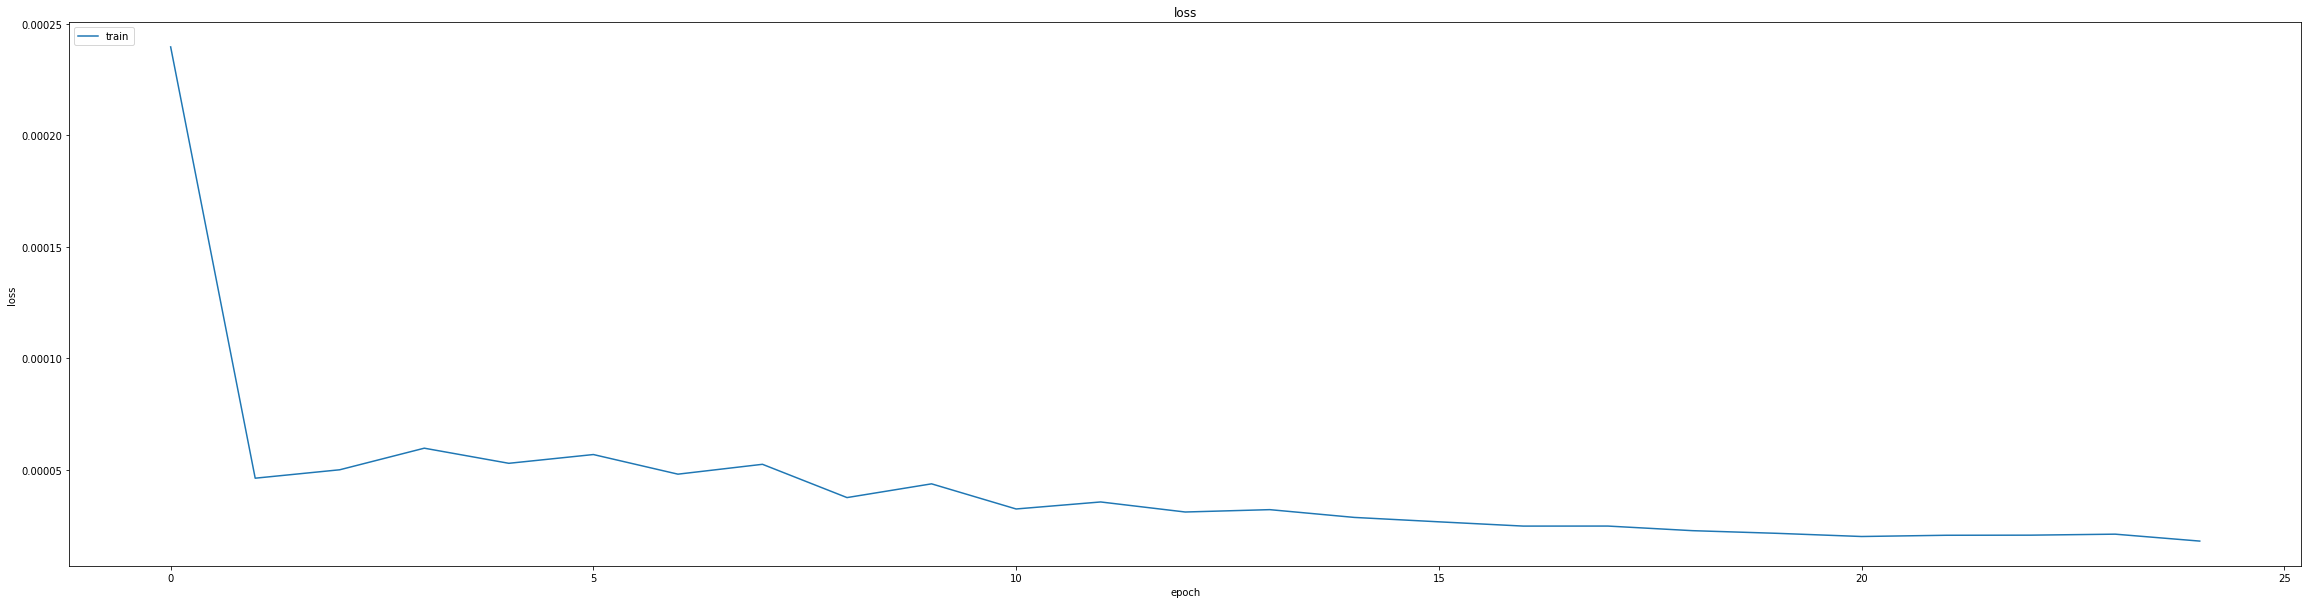

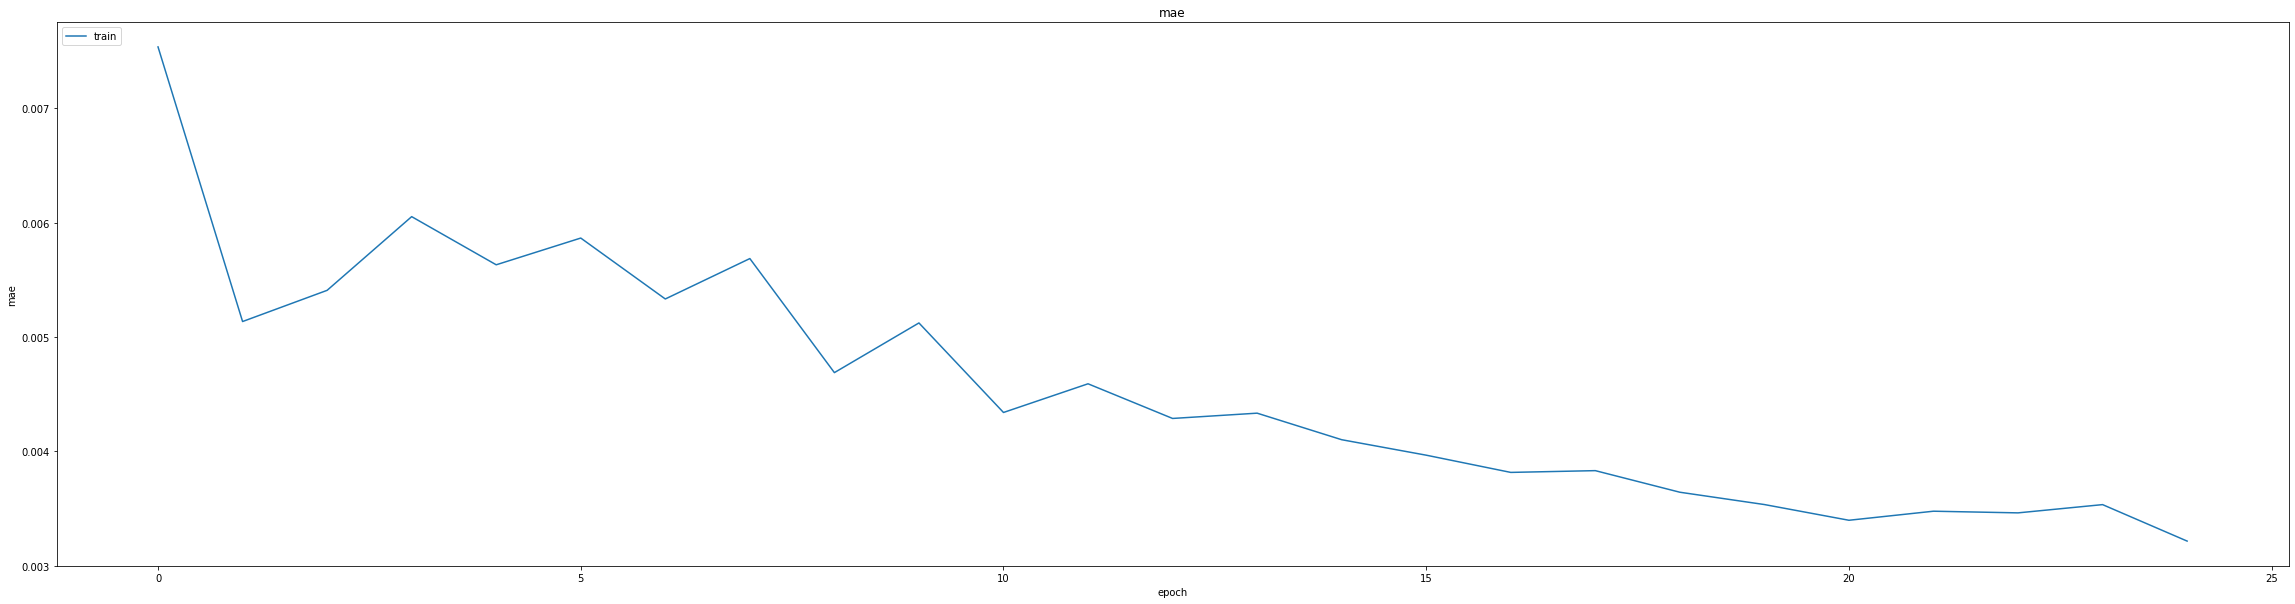

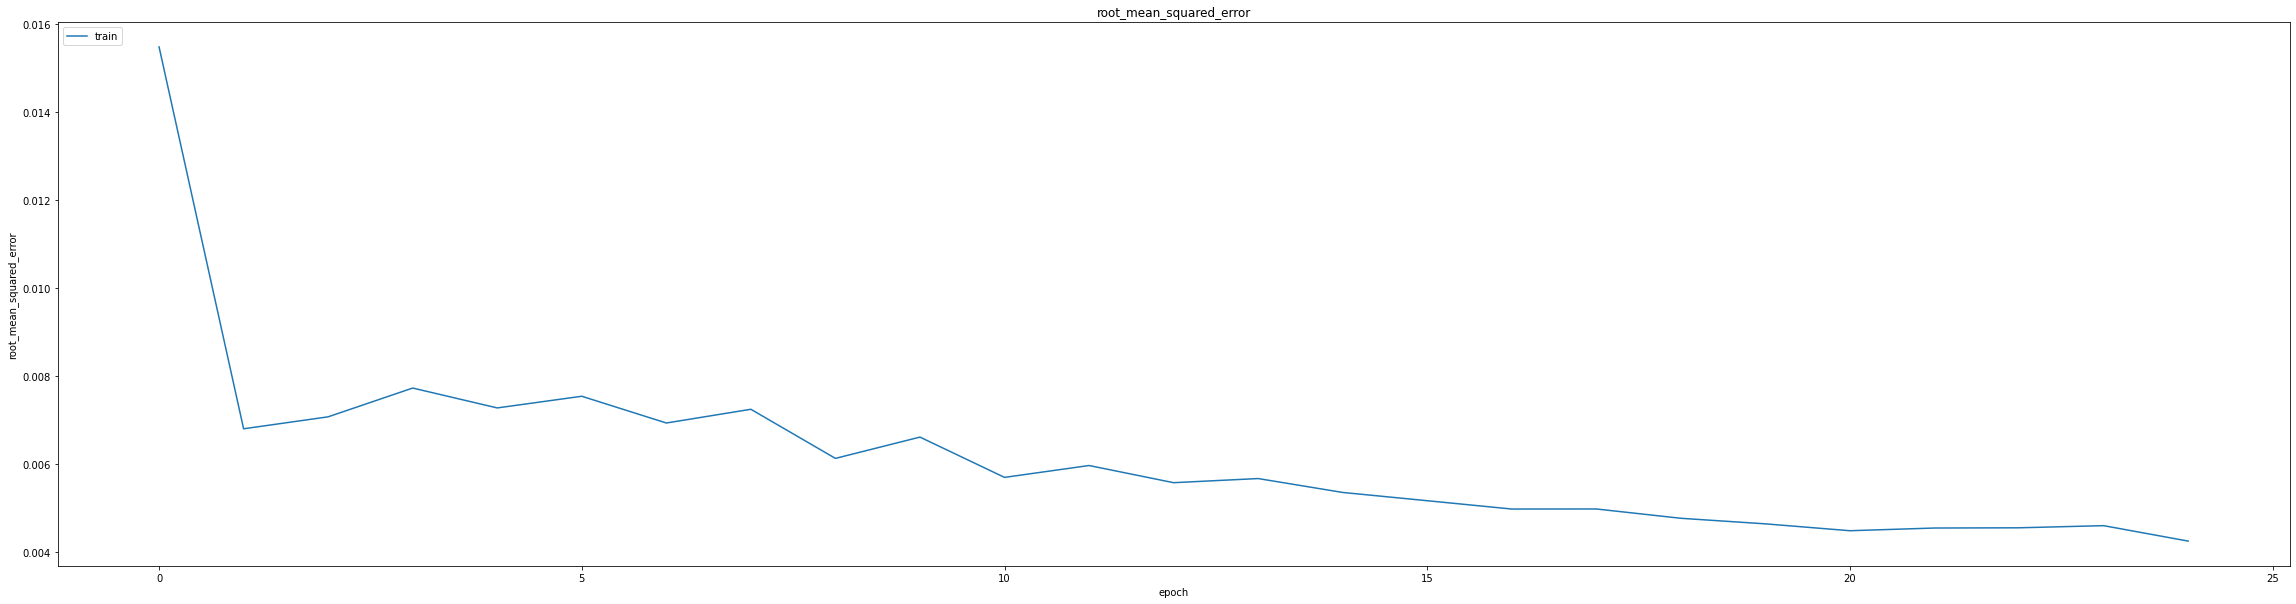

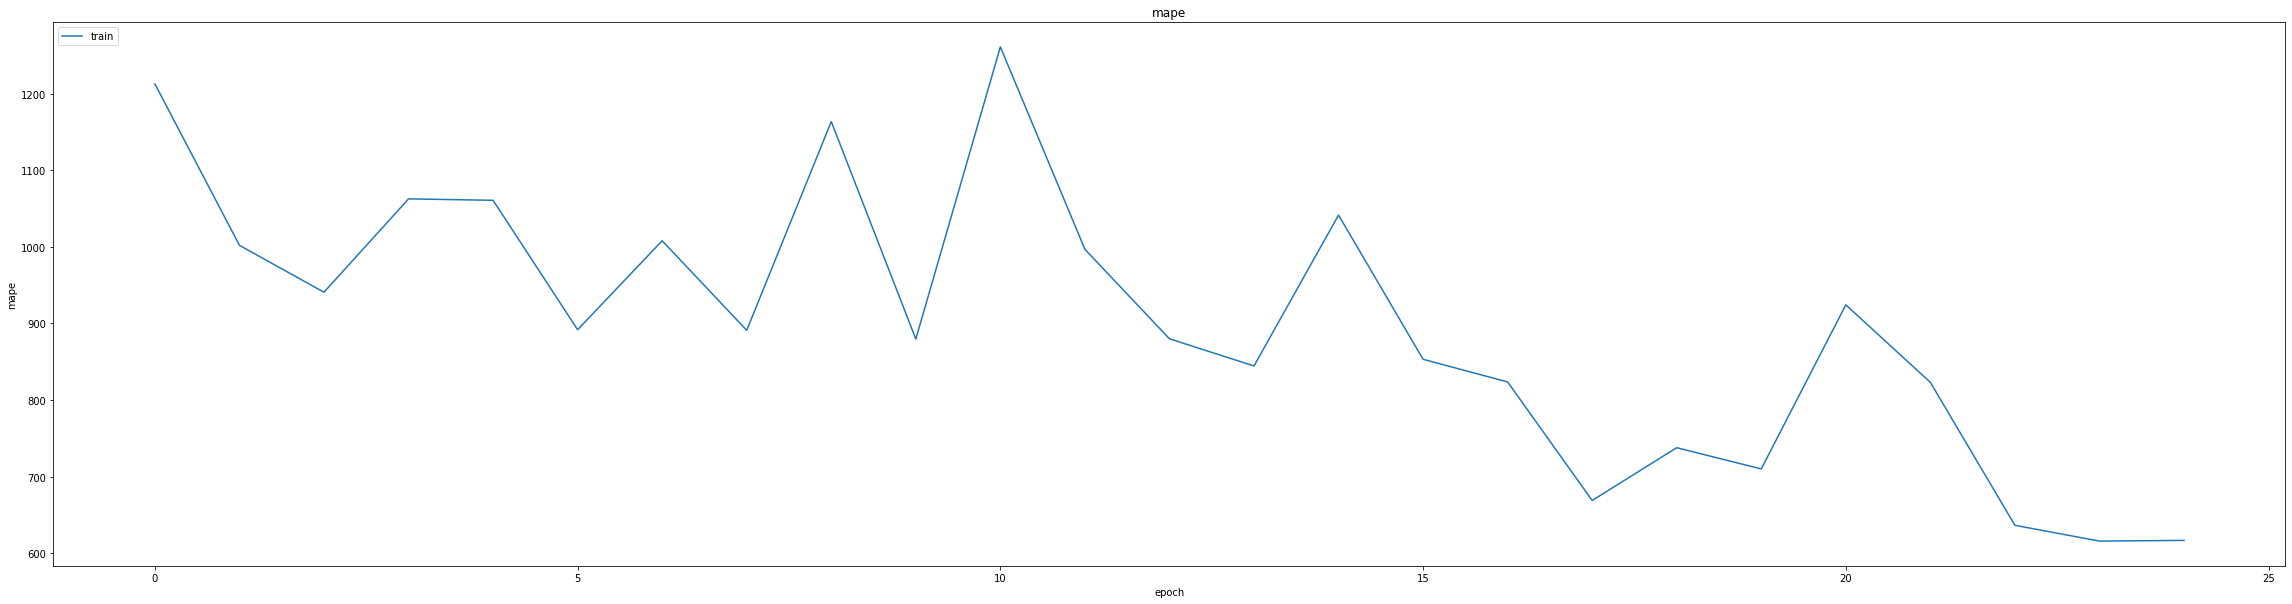

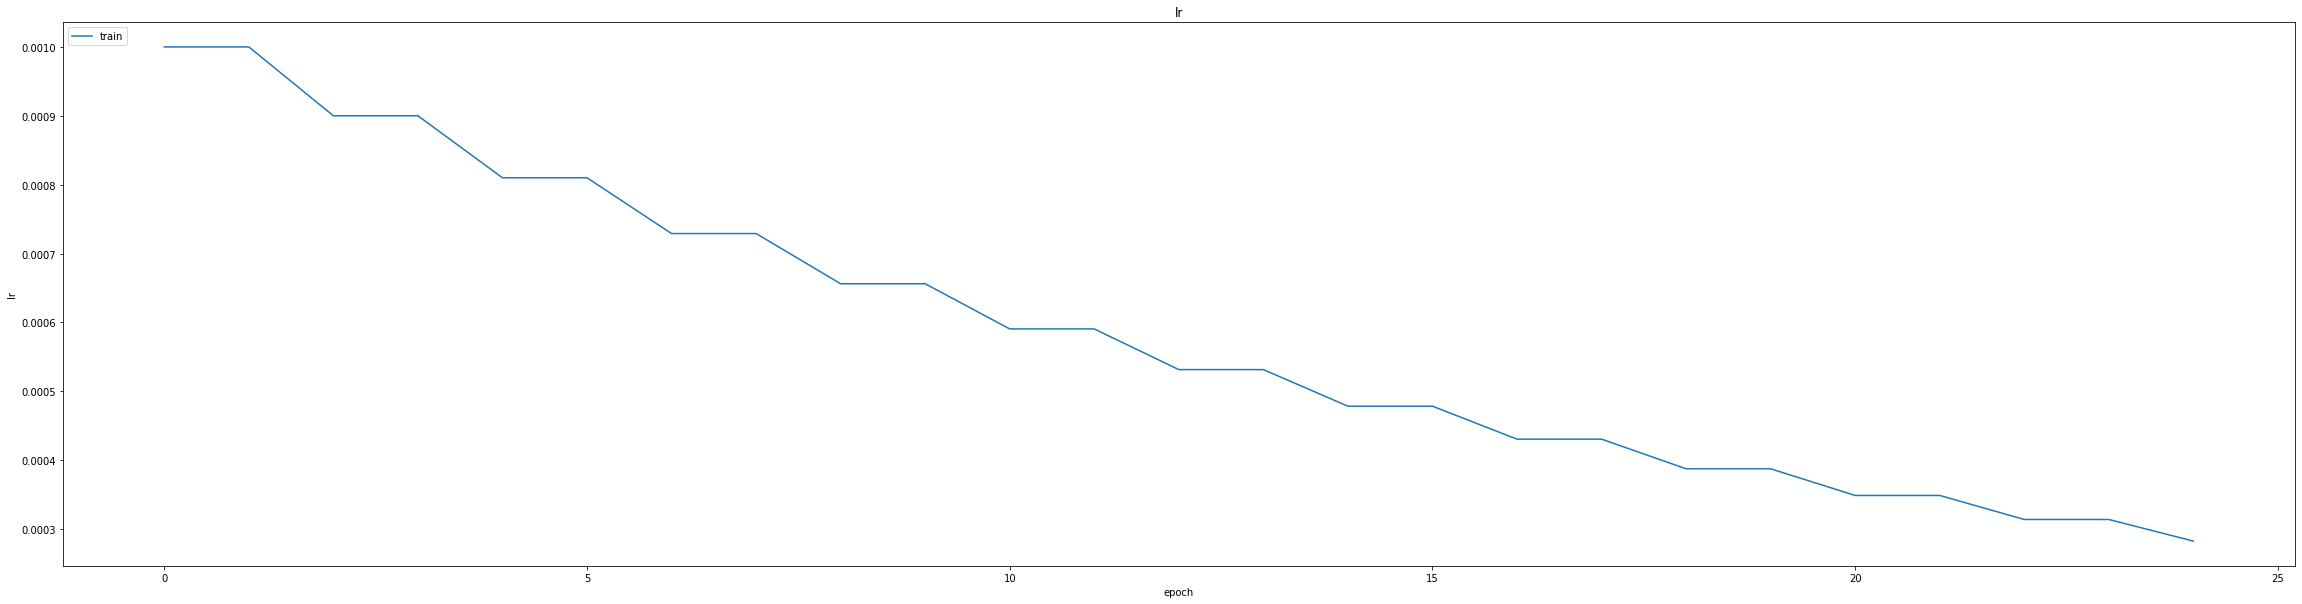

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0049894205294549465
0.007991809397935867
348/348 [==============================] - 2s 3ms/step
0.999104595586125


348/348 [==============================] - 1s 3ms/step


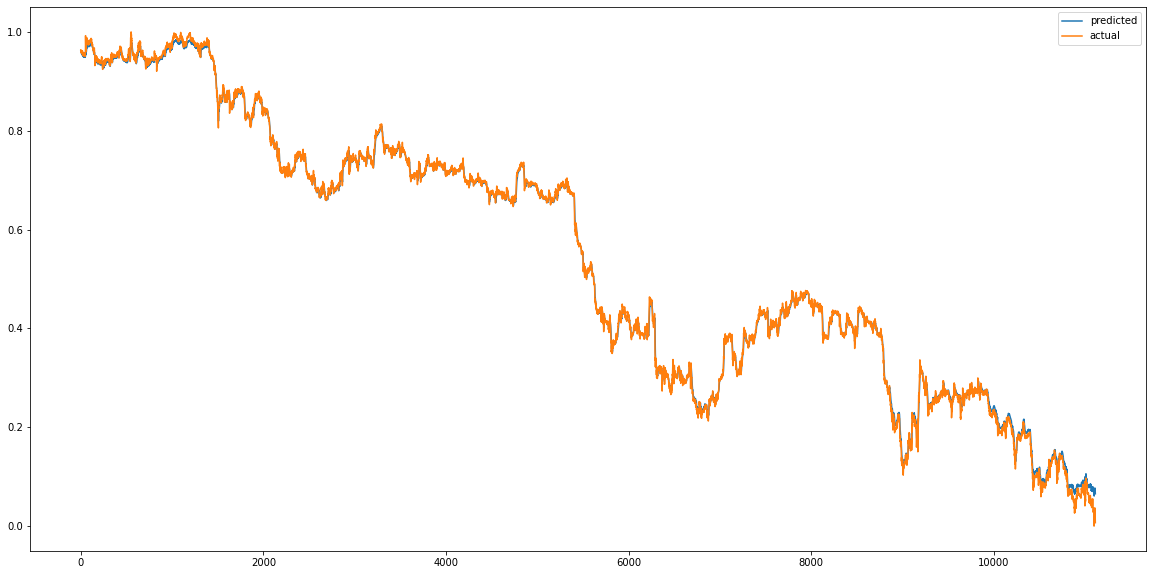

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


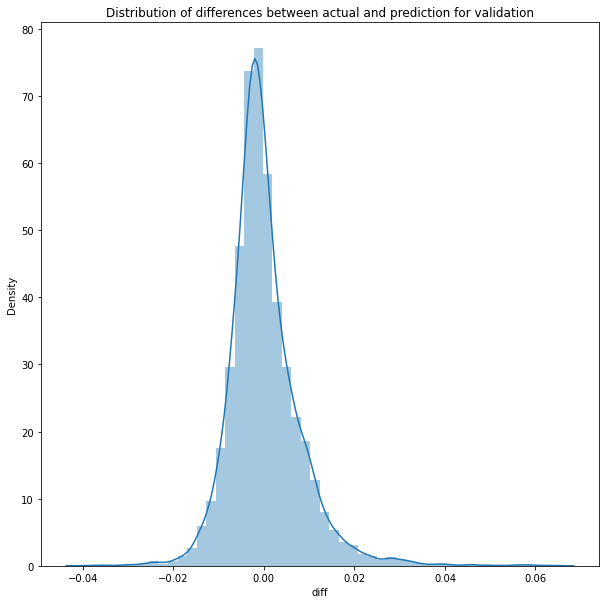

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 3ms/step


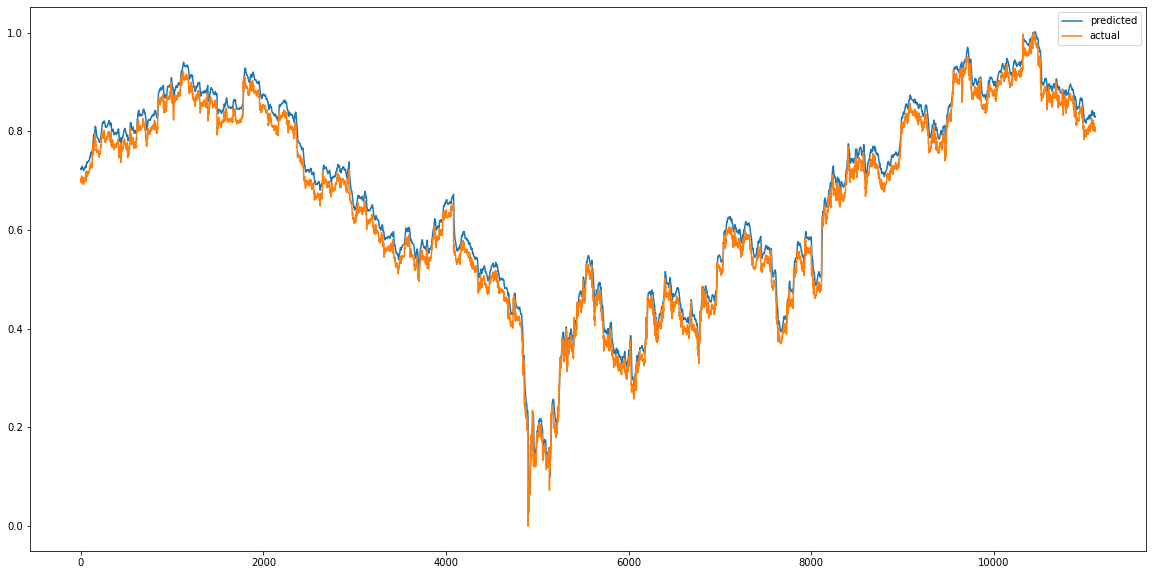

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


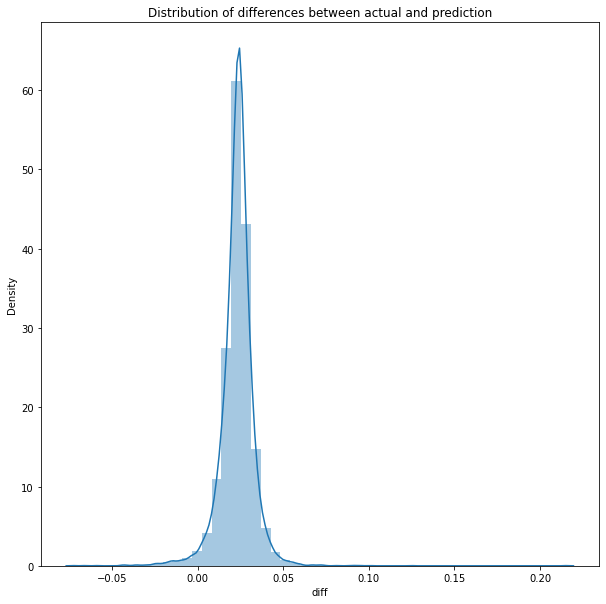

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0006267672859154637
RMSE :  0.025035320767177394
MAE :  0.02352619585130754
348/348 [==============================] - 1s 3ms/step
R2_Score  : 0.984101179579449


count    11115.000000
mean         0.023030
std          0.009818
min         -0.072307
25%          0.019092
50%          0.023641
75%          0.027651
max          0.214938
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
400/406 [============================>.] - ETA: 0s - loss: 302.9541 - mae: 2.3412 - mse: 302.9541 - root_mean_squared_error: 17.4056 - mape: 13085.1260
Epoch 1: val_mse improved from inf to 0.01975, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 14s 28ms/step - loss: 298.5575 - mae: 2.3079 - mse: 298.5575 - root_mean_squared_error: 17.2788 - mape: 12895.4287 - val_loss: 0.0197 - val_mae: 0.1000 - val_mse: 0.0197 - val_root_mean_squared_error: 0.1405 - val_mape: 42476.4570
Epoch 2/75
404/406 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0308 - mse: 0.0026 - root_mean_squared_error: 0.0505 - mape: 9565.7773
Epoch 2: val_mse improved from 0.01975 to 0.00620, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 19s 47ms/step - loss: 0.0025 - mae: 0.0307 - mse: 0.0025 - root_mean_squared_error: 0.0504 - mape: 9521.2520 - val_loss: 0.0062 - val_mae: 0.0527 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0788 - val_mape: 30232.8184
Epoch 3/75
405/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0216 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 6537.9116
Epoch 3: val_mse improved from 0.00620 to 0.00340, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0012 - mae: 0.0216 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 6523.5737 - val_loss: 0.0034 - val_mae: 0.0349 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0583 - val_mape: 25363.2070
Epoch 4/75
404/406 [============================>.] - ETA: 0s - loss: 8.6716e-04 - mae: 0.0187 - mse: 8.6716e-04 - root_mean_squared_error: 0.0294 - mape: 5854.8794
Epoch 4: val_mse improved from 0.00340 to 0.00243, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 8.6818e-04 - mae: 0.0187 - mse: 8.6818e-04 - root_mean_squared_error: 0.0295 - mape: 5827.6494 - val_loss: 0.0024 - val_mae: 0.0290 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0493 - val_mape: 22305.1660
Epoch 5/75
401/406 [============================>.] - ETA: 0s - loss: 6.9929e-04 - mae: 0.0173 - mse: 6.9929e-04 - root_mean_squared_error: 0.0264 - mape: 5076.5186
Epoch 5: val_mse improved from 0.00243 to 0.00196, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 7.0106e-04 - mae: 0.0173 - mse: 7.0106e-04 - root_mean_squared_error: 0.0265 - mape: 5015.4282 - val_loss: 0.0020 - val_mae: 0.0276 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0443 - val_mape: 20061.6934
Epoch 6/75
406/406 [==============================] - ETA: 0s - loss: 5.8691e-04 - mae: 0.0162 - mse: 5.8691e-04 - root_mean_squared_error: 0.0242 - mape: 4155.3228
Epoch 6: val_mse improved from 0.00196 to 0.00152, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 25ms/step - loss: 5.8691e-04 - mae: 0.0162 - mse: 5.8691e-04 - root_mean_squared_error: 0.0242 - mape: 4155.3228 - val_loss: 0.0015 - val_mae: 0.0238 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0390 - val_mape: 18385.4902
Epoch 7/75
404/406 [============================>.] - ETA: 0s - loss: 5.1520e-04 - mae: 0.0154 - mse: 5.1520e-04 - root_mean_squared_error: 0.0227 - mape: 4098.4546
Epoch 7: val_mse improved from 0.00152 to 0.00123, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 5.1469e-04 - mae: 0.0154 - mse: 5.1469e-04 - root_mean_squared_error: 0.0227 - mape: 4079.3804 - val_loss: 0.0012 - val_mae: 0.0218 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0351 - val_mape: 16995.8047
Epoch 8/75
405/406 [============================>.] - ETA: 0s - loss: 4.4072e-04 - mae: 0.0145 - mse: 4.4072e-04 - root_mean_squared_error: 0.0210 - mape: 3879.9829
Epoch 8: val_mse improved from 0.00123 to 0.00101, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 4.4035e-04 - mae: 0.0145 - mse: 4.4035e-04 - root_mean_squared_error: 0.0210 - mape: 3871.4739 - val_loss: 0.0010 - val_mae: 0.0201 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0318 - val_mape: 15713.9912
Epoch 9/75
405/406 [============================>.] - ETA: 0s - loss: 3.9200e-04 - mae: 0.0139 - mse: 3.9200e-04 - root_mean_squared_error: 0.0198 - mape: 3658.0874
Epoch 9: val_mse improved from 0.00101 to 0.00088, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 25ms/step - loss: 3.9207e-04 - mae: 0.0140 - mse: 3.9207e-04 - root_mean_squared_error: 0.0198 - mape: 3650.0671 - val_loss: 8.8374e-04 - val_mae: 0.0194 - val_mse: 8.8374e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 14700.4932
Epoch 10/75
404/406 [============================>.] - ETA: 0s - loss: 3.5198e-04 - mae: 0.0134 - mse: 3.5198e-04 - root_mean_squared_error: 0.0188 - mape: 3469.1130
Epoch 10: val_mse improved from 0.00088 to 0.00074, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 3.5168e-04 - mae: 0.0134 - mse: 3.5168e-04 - root_mean_squared_error: 0.0188 - mape: 3452.9675 - val_loss: 7.3808e-04 - val_mae: 0.0180 - val_mse: 7.3808e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 13755.1104
Epoch 11/75
405/406 [============================>.] - ETA: 0s - loss: 3.2037e-04 - mae: 0.0129 - mse: 3.2037e-04 - root_mean_squared_error: 0.0179 - mape: 3312.3694
Epoch 11: val_mse improved from 0.00074 to 0.00064, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 3.2023e-04 - mae: 0.0129 - mse: 3.2023e-04 - root_mean_squared_error: 0.0179 - mape: 3305.1057 - val_loss: 6.3655e-04 - val_mae: 0.0174 - val_mse: 6.3655e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 12930.1162
Epoch 12/75
400/406 [============================>.] - ETA: 0s - loss: 3.0142e-04 - mae: 0.0127 - mse: 3.0142e-04 - root_mean_squared_error: 0.0174 - mape: 3161.6079
Epoch 12: val_mse improved from 0.00064 to 0.00054, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 3.0102e-04 - mae: 0.0127 - mse: 3.0102e-04 - root_mean_squared_error: 0.0173 - mape: 3115.7708 - val_loss: 5.3594e-04 - val_mae: 0.0164 - val_mse: 5.3594e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 12219.3047
Epoch 13/75
405/406 [============================>.] - ETA: 0s - loss: 2.6293e-04 - mae: 0.0120 - mse: 2.6293e-04 - root_mean_squared_error: 0.0162 - mape: 2468.8152
Epoch 13: val_mse improved from 0.00054 to 0.00047, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 2.6281e-04 - mae: 0.0120 - mse: 2.6281e-04 - root_mean_squared_error: 0.0162 - mape: 2463.4031 - val_loss: 4.6771e-04 - val_mae: 0.0151 - val_mse: 4.6771e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 10570.4883
Epoch 14/75
406/406 [==============================] - ETA: 0s - loss: 2.2173e-04 - mae: 0.0113 - mse: 2.2173e-04 - root_mean_squared_error: 0.0149 - mape: 2130.5403
Epoch 14: val_mse improved from 0.00047 to 0.00036, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 2.2173e-04 - mae: 0.0113 - mse: 2.2173e-04 - root_mean_squared_error: 0.0149 - mape: 2130.5403 - val_loss: 3.5700e-04 - val_mae: 0.0136 - val_mse: 3.5700e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 9470.2988
Epoch 15/75
406/406 [==============================] - ETA: 0s - loss: 1.9931e-04 - mae: 0.0108 - mse: 1.9931e-04 - root_mean_squared_error: 0.0141 - mape: 2022.4557
Epoch 15: val_mse did not improve from 0.00036
406/406 [==============================] - 4s 9ms/step - loss: 1.9931e-04 - mae: 0.0108 - mse: 1.9931e-04 - root_mean_squared_error: 0.0141 - mape: 2022.4557 - val_loss: 4.4900e-04 - val_mae: 0.0155 - val_mse: 4.4900e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 9127.8809
Epoch 16/75
404/406 [============================>.] - ETA: 0s - loss: 1.8500e-04 - mae: 0.0104 - mse: 1.8500e-04 - root_mean_squared_error: 0.0136 - mape: 2055.4807
Epoch 16: val_mse improved from 0.00036 to 0.00031, savin

406/406 [==============================] - 11s 26ms/step - loss: 1.8508e-04 - mae: 0.0104 - mse: 1.8508e-04 - root_mean_squared_error: 0.0136 - mape: 2045.9189 - val_loss: 3.1260e-04 - val_mae: 0.0128 - val_mse: 3.1260e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 8838.1084
Epoch 17/75
404/406 [============================>.] - ETA: 0s - loss: 1.6954e-04 - mae: 0.0099 - mse: 1.6954e-04 - root_mean_squared_error: 0.0130 - mape: 2007.6702
Epoch 17: val_mse improved from 0.00031 to 0.00030, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 25ms/step - loss: 1.6926e-04 - mae: 0.0099 - mse: 1.6926e-04 - root_mean_squared_error: 0.0130 - mape: 1998.3245 - val_loss: 2.9654e-04 - val_mae: 0.0125 - val_mse: 2.9654e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 8629.1992
Epoch 18/75
403/406 [============================>.] - ETA: 0s - loss: 1.5264e-04 - mae: 0.0094 - mse: 1.5264e-04 - root_mean_squared_error: 0.0124 - mape: 1935.1814
Epoch 18: val_mse did not improve from 0.00030
406/406 [==============================] - 4s 9ms/step - loss: 1.5278e-04 - mae: 0.0094 - mse: 1.5278e-04 - root_mean_squared_error: 0.0124 - mape: 1921.4208 - val_loss: 3.0348e-04 - val_mae: 0.0126 - val_mse: 3.0348e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 8488.9355
Epoch 19/75
405/406 [============================>.] - ETA: 0s - loss: 1.4504e-04 - mae: 0.0092 - mse: 1.4504e-04 - root_mean_squared_error: 0.0120 - mape: 1920.1450
Epoch 19: val_mse improved from 0.00030 to 0.00029, savin

406/406 [==============================] - 11s 27ms/step - loss: 1.4516e-04 - mae: 0.0092 - mse: 1.4516e-04 - root_mean_squared_error: 0.0120 - mape: 1915.9412 - val_loss: 2.9340e-04 - val_mae: 0.0125 - val_mse: 2.9340e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 8254.8896
Epoch 20/75
402/406 [============================>.] - ETA: 0s - loss: 1.3177e-04 - mae: 0.0087 - mse: 1.3177e-04 - root_mean_squared_error: 0.0115 - mape: 1901.1802
Epoch 20: val_mse did not improve from 0.00029
406/406 [==============================] - 4s 9ms/step - loss: 1.3178e-04 - mae: 0.0087 - mse: 1.3178e-04 - root_mean_squared_error: 0.0115 - mape: 1882.9734 - val_loss: 2.9361e-04 - val_mae: 0.0125 - val_mse: 2.9361e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 8032.5234
Epoch 21/75
406/406 [==============================] - ETA: 0s - loss: 1.2411e-04 - mae: 0.0085 - mse: 1.2411e-04 - root_mean_squared_error: 0.0111 - mape: 1716.1910
Epoch 21: val_mse improved from 0.00029 to 0.00021, savin

406/406 [==============================] - 11s 26ms/step - loss: 1.2411e-04 - mae: 0.0085 - mse: 1.2411e-04 - root_mean_squared_error: 0.0111 - mape: 1716.1910 - val_loss: 2.1406e-04 - val_mae: 0.0107 - val_mse: 2.1406e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 7755.4077
Epoch 22/75
403/406 [============================>.] - ETA: 0s - loss: 1.1928e-04 - mae: 0.0083 - mse: 1.1928e-04 - root_mean_squared_error: 0.0109 - mape: 1741.6951
Epoch 22: val_mse did not improve from 0.00021
406/406 [==============================] - 4s 10ms/step - loss: 1.1930e-04 - mae: 0.0084 - mse: 1.1930e-04 - root_mean_squared_error: 0.0109 - mape: 1729.3077 - val_loss: 2.7882e-04 - val_mae: 0.0125 - val_mse: 2.7882e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 7569.6592
Epoch 23/75
400/406 [============================>.] - ETA: 0s - loss: 1.1090e-04 - mae: 0.0081 - mse: 1.1090e-04 - root_mean_squared_error: 0.0105 - mape: 1757.7415
Epoch 23: val_mse improved from 0.00021 to 0.00019, savi

406/406 [==============================] - 10s 25ms/step - loss: 1.1098e-04 - mae: 0.0081 - mse: 1.1098e-04 - root_mean_squared_error: 0.0105 - mape: 1732.2787 - val_loss: 1.8632e-04 - val_mae: 0.0101 - val_mse: 1.8632e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 7363.8296
Epoch 24/75
402/406 [============================>.] - ETA: 0s - loss: 9.7995e-05 - mae: 0.0075 - mse: 9.7995e-05 - root_mean_squared_error: 0.0099 - mape: 1639.0979
Epoch 24: val_mse did not improve from 0.00019
406/406 [==============================] - 4s 9ms/step - loss: 9.8085e-05 - mae: 0.0075 - mse: 9.8085e-05 - root_mean_squared_error: 0.0099 - mape: 1623.4033 - val_loss: 2.6532e-04 - val_mae: 0.0124 - val_mse: 2.6532e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 7143.3296
Epoch 25/75
406/406 [==============================] - ETA: 0s - loss: 9.9092e-05 - mae: 0.0076 - mse: 9.9092e-05 - root_mean_squared_error: 0.0100 - mape: 1659.2606
Epoch 25: val_mse did not improve from 0.00019
406/406 [=

406/406 [==============================] - 11s 26ms/step - loss: 8.8771e-05 - mae: 0.0072 - mse: 8.8771e-05 - root_mean_squared_error: 0.0094 - mape: 1506.4792 - val_loss: 1.7589e-04 - val_mae: 0.0099 - val_mse: 1.7589e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 6817.3755
Epoch 27/75
406/406 [==============================] - ETA: 0s - loss: 8.5346e-05 - mae: 0.0071 - mse: 8.5346e-05 - root_mean_squared_error: 0.0092 - mape: 1531.9709
Epoch 27: val_mse did not improve from 0.00018
406/406 [==============================] - 4s 9ms/step - loss: 8.5346e-05 - mae: 0.0071 - mse: 8.5346e-05 - root_mean_squared_error: 0.0092 - mape: 1531.9709 - val_loss: 1.8897e-04 - val_mae: 0.0106 - val_mse: 1.8897e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 6703.1001
Epoch 28/75
404/406 [============================>.] - ETA: 0s - loss: 7.5834e-05 - mae: 0.0066 - mse: 7.5834e-05 - root_mean_squared_error: 0.0087 - mape: 1510.6910
Epoch 28: val_mse did not improve from 0.00018
406/406 [=

406/406 [==============================] - 11s 26ms/step - loss: 7.5813e-05 - mae: 0.0067 - mse: 7.5813e-05 - root_mean_squared_error: 0.0087 - mape: 1423.9290 - val_loss: 1.4548e-04 - val_mae: 0.0091 - val_mse: 1.4548e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 6278.0522
Epoch 31/75
401/406 [============================>.] - ETA: 0s - loss: 6.8408e-05 - mae: 0.0063 - mse: 6.8408e-05 - root_mean_squared_error: 0.0083 - mape: 1473.6193
Epoch 31: val_mse did not improve from 0.00015
406/406 [==============================] - 4s 9ms/step - loss: 6.8397e-05 - mae: 0.0063 - mse: 6.8397e-05 - root_mean_squared_error: 0.0083 - mape: 1455.8774 - val_loss: 1.9033e-04 - val_mae: 0.0109 - val_mse: 1.9033e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 6078.1030
Epoch 32/75
402/406 [============================>.] - ETA: 0s - loss: 6.4326e-05 - mae: 0.0062 - mse: 6.4326e-05 - root_mean_squared_error: 0.0080 - mape: 1424.4635
Epoch 32: val_mse improved from 0.00015 to 0.00012, savin

406/406 [==============================] - 11s 28ms/step - loss: 6.4176e-05 - mae: 0.0061 - mse: 6.4176e-05 - root_mean_squared_error: 0.0080 - mape: 1410.8201 - val_loss: 1.2439e-04 - val_mae: 0.0084 - val_mse: 1.2439e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 5999.1362
Epoch 33/75
404/406 [============================>.] - ETA: 0s - loss: 6.7365e-05 - mae: 0.0063 - mse: 6.7365e-05 - root_mean_squared_error: 0.0082 - mape: 1354.9856
Epoch 33: val_mse did not improve from 0.00012
406/406 [==============================] - 4s 9ms/step - loss: 6.7301e-05 - mae: 0.0063 - mse: 6.7301e-05 - root_mean_squared_error: 0.0082 - mape: 1348.6799 - val_loss: 1.5257e-04 - val_mae: 0.0097 - val_mse: 1.5257e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 5812.3862
Epoch 34/75
402/406 [============================>.] - ETA: 0s - loss: 6.0859e-05 - mae: 0.0060 - mse: 6.0859e-05 - root_mean_squared_error: 0.0078 - mape: 1371.9274
Epoch 34: val_mse did not improve from 0.00012
406/406 [=

406/406 [==============================] - 11s 27ms/step - loss: 5.9388e-05 - mae: 0.0059 - mse: 5.9388e-05 - root_mean_squared_error: 0.0077 - mape: 1244.8958 - val_loss: 1.1602e-04 - val_mae: 0.0082 - val_mse: 1.1602e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 5629.6138
Epoch 36/75
402/406 [============================>.] - ETA: 0s - loss: 5.7102e-05 - mae: 0.0058 - mse: 5.7102e-05 - root_mean_squared_error: 0.0076 - mape: 1279.0114
Epoch 36: val_mse did not improve from 0.00012
406/406 [==============================] - 4s 9ms/step - loss: 5.7202e-05 - mae: 0.0058 - mse: 5.7202e-05 - root_mean_squared_error: 0.0076 - mape: 1266.7627 - val_loss: 1.9439e-04 - val_mae: 0.0117 - val_mse: 1.9439e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 5464.9961
Epoch 37/75
402/406 [============================>.] - ETA: 0s - loss: 5.5217e-05 - mae: 0.0057 - mse: 5.5217e-05 - root_mean_squared_error: 0.0074 - mape: 1270.7726
Epoch 37: val_mse improved from 0.00012 to 0.00009, savin

406/406 [==============================] - 11s 26ms/step - loss: 5.5122e-05 - mae: 0.0057 - mse: 5.5122e-05 - root_mean_squared_error: 0.0074 - mape: 1258.6007 - val_loss: 8.7761e-05 - val_mae: 0.0070 - val_mse: 8.7761e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 5382.0767
Epoch 38/75
404/406 [============================>.] - ETA: 0s - loss: 5.6773e-05 - mae: 0.0058 - mse: 5.6773e-05 - root_mean_squared_error: 0.0075 - mape: 1206.4449
Epoch 38: val_mse did not improve from 0.00009
406/406 [==============================] - 4s 9ms/step - loss: 5.6715e-05 - mae: 0.0058 - mse: 5.6715e-05 - root_mean_squared_error: 0.0075 - mape: 1200.8298 - val_loss: 1.3878e-04 - val_mae: 0.0093 - val_mse: 1.3878e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 5208.8979
Epoch 39/75
401/406 [============================>.] - ETA: 0s - loss: 5.0507e-05 - mae: 0.0055 - mse: 5.0507e-05 - root_mean_squared_error: 0.0071 - mape: 1182.7729
Epoch 39: val_mse did not improve from 0.00009
406/406 [=

406/406 [==============================] - 10s 25ms/step - loss: 5.6098e-05 - mae: 0.0059 - mse: 5.6098e-05 - root_mean_squared_error: 0.0075 - mape: 992.3537 - val_loss: 7.5786e-05 - val_mae: 0.0067 - val_mse: 7.5786e-05 - val_root_mean_squared_error: 0.0087 - val_mape: 4393.7109
Epoch 49/75
406/406 [==============================] - ETA: 0s - loss: 6.9743e-05 - mae: 0.0065 - mse: 6.9743e-05 - root_mean_squared_error: 0.0084 - mape: 987.8548 
Epoch 49: val_mse improved from 0.00008 to 0.00007, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 6.9743e-05 - mae: 0.0065 - mse: 6.9743e-05 - root_mean_squared_error: 0.0084 - mape: 987.8548 - val_loss: 6.7376e-05 - val_mae: 0.0061 - val_mse: 6.7376e-05 - val_root_mean_squared_error: 0.0082 - val_mape: 4389.7407
Epoch 50/75
403/406 [============================>.] - ETA: 0s - loss: 5.5811e-05 - mae: 0.0058 - mse: 5.5811e-05 - root_mean_squared_error: 0.0075 - mape: 981.3085
Epoch 50: val_mse did not improve from 0.00007
406/406 [==============================] - 4s 9ms/step - loss: 5.5697e-05 - mae: 0.0058 - mse: 5.5697e-05 - root_mean_squared_error: 0.0075 - mape: 974.3309 - val_loss: 9.7892e-05 - val_mae: 0.0076 - val_mse: 9.7892e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 4310.1846
Epoch 51/75
403/406 [============================>.] - ETA: 0s - loss: 6.0524e-05 - mae: 0.0061 - mse: 6.0524e-05 - root_mean_squared_error: 0.0078 - mape: 973.9025
Epoch 51: val_mse did not improve from 0.00007
406/406 [=====

406/406 [==============================] - 11s 27ms/step - loss: 7.0128e-05 - mae: 0.0066 - mse: 7.0128e-05 - root_mean_squared_error: 0.0084 - mape: 910.2780 - val_loss: 5.0486e-05 - val_mae: 0.0051 - val_mse: 5.0486e-05 - val_root_mean_squared_error: 0.0071 - val_mape: 4032.2981
Epoch 60/75
405/406 [============================>.] - ETA: 0s - loss: 4.8654e-05 - mae: 0.0054 - mse: 4.8654e-05 - root_mean_squared_error: 0.0070 - mape: 873.3173
Epoch 60: val_mse did not improve from 0.00005
406/406 [==============================] - 4s 9ms/step - loss: 4.8758e-05 - mae: 0.0054 - mse: 4.8758e-05 - root_mean_squared_error: 0.0070 - mape: 871.4040 - val_loss: 6.2857e-05 - val_mae: 0.0056 - val_mse: 6.2857e-05 - val_root_mean_squared_error: 0.0079 - val_mape: 3909.9797
Epoch 61/75
405/406 [============================>.] - ETA: 0s - loss: 5.5208e-05 - mae: 0.0058 - mse: 5.5208e-05 - root_mean_squared_error: 0.0074 - mape: 863.1688
Epoch 61: val_mse did not improve from 0.00005
406/406 [=====

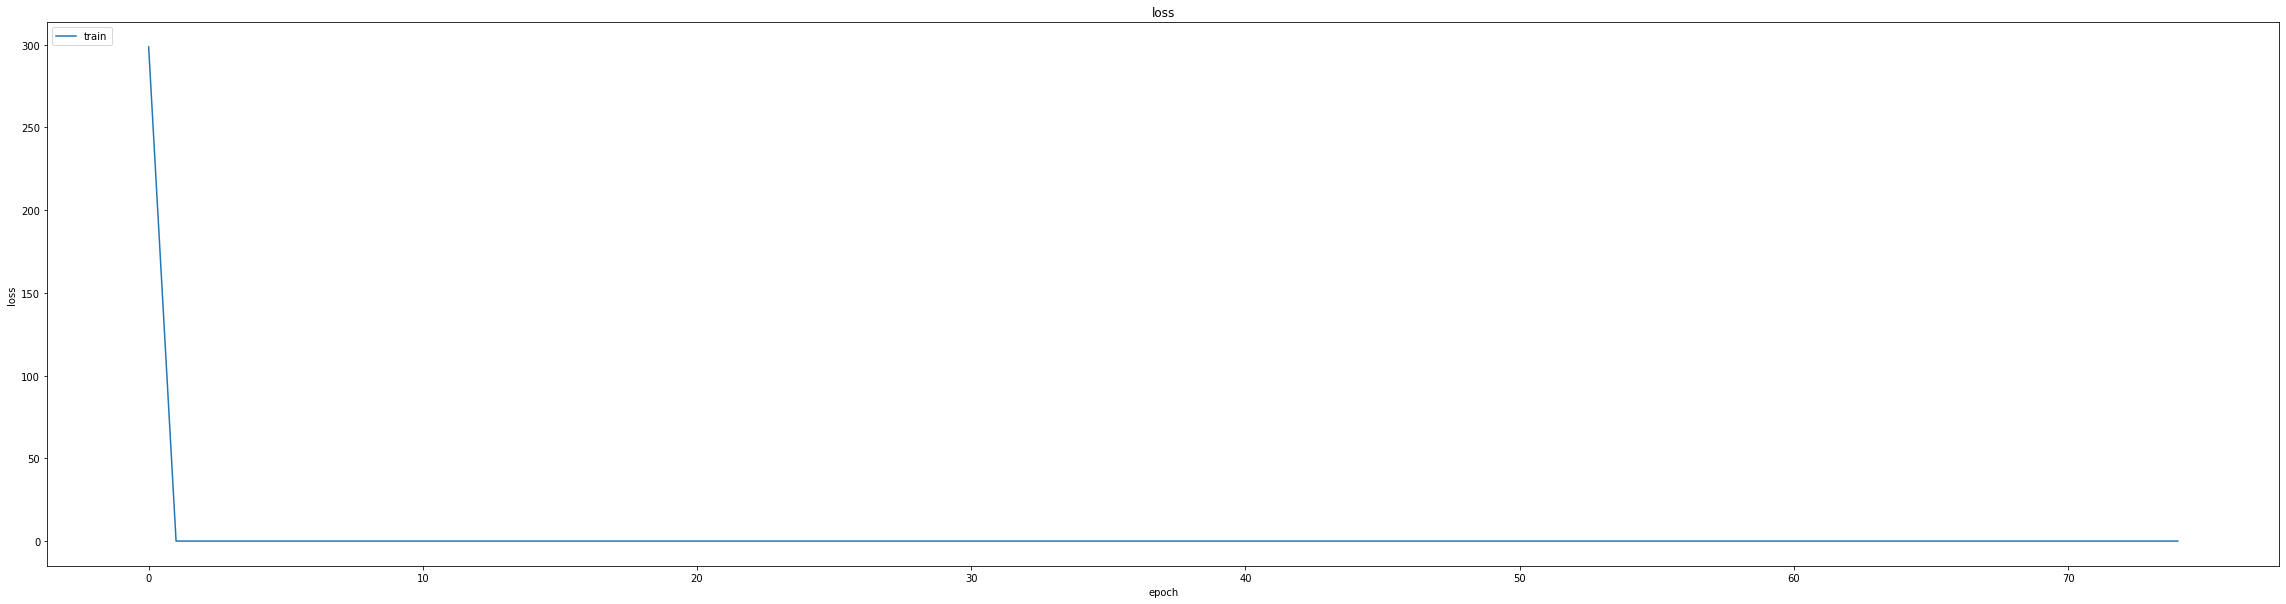

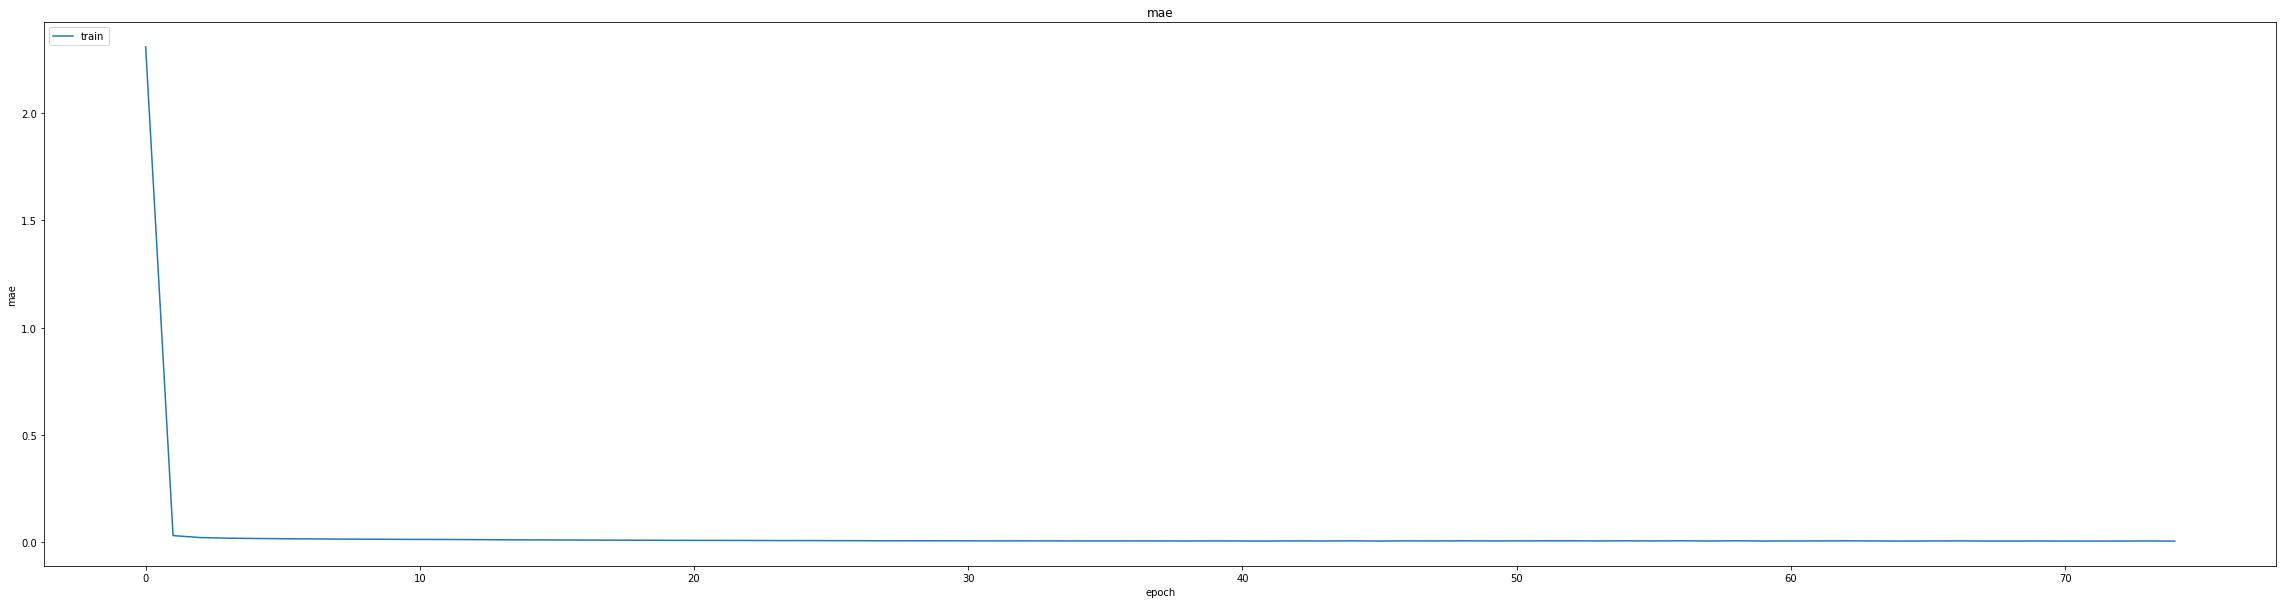

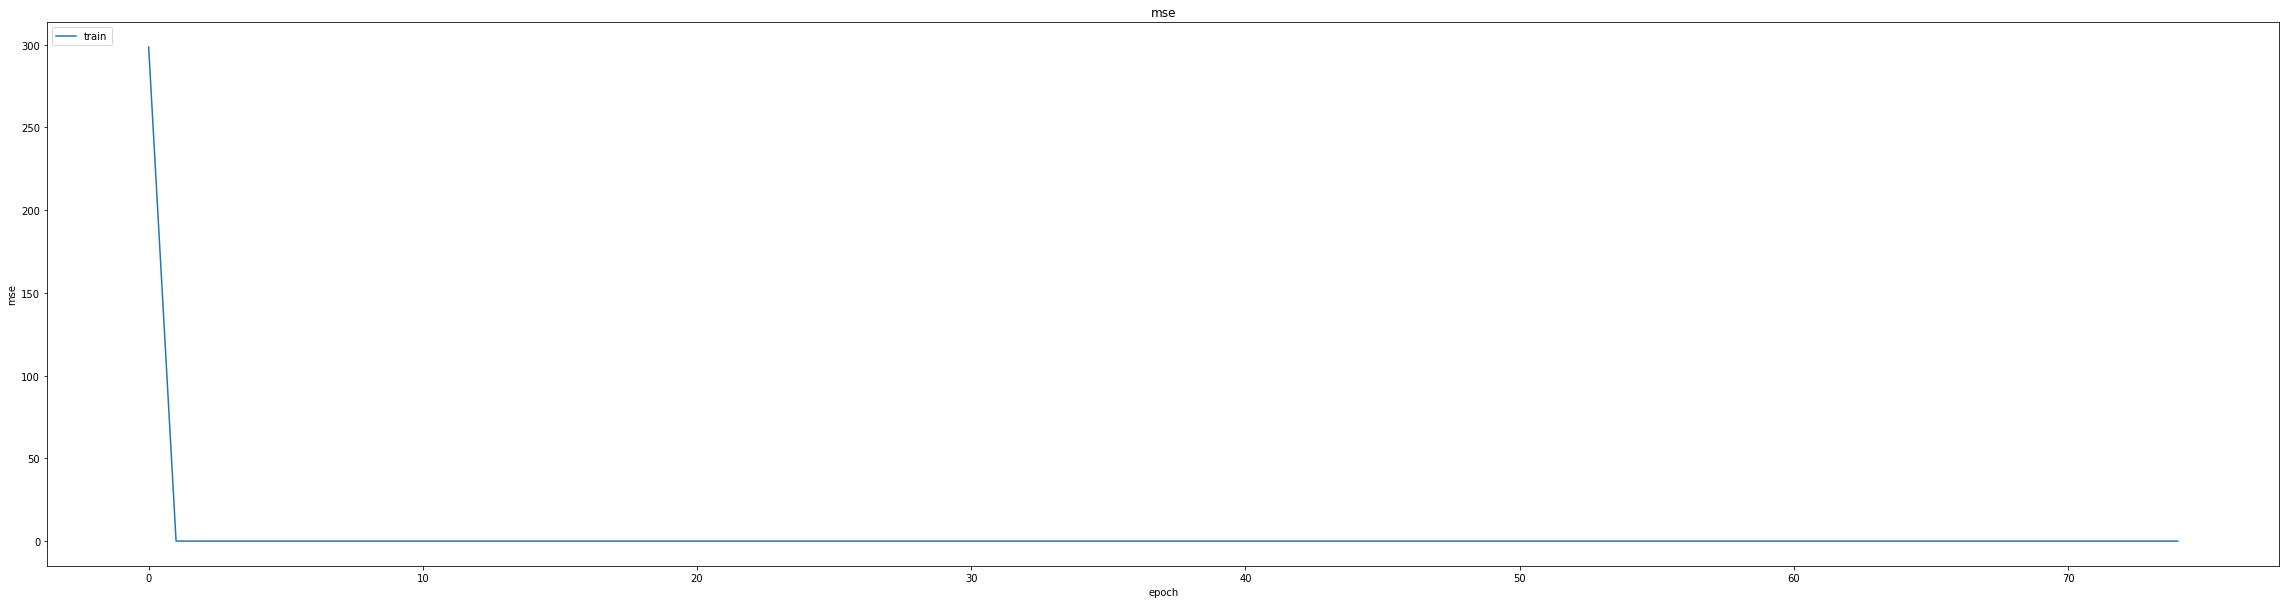

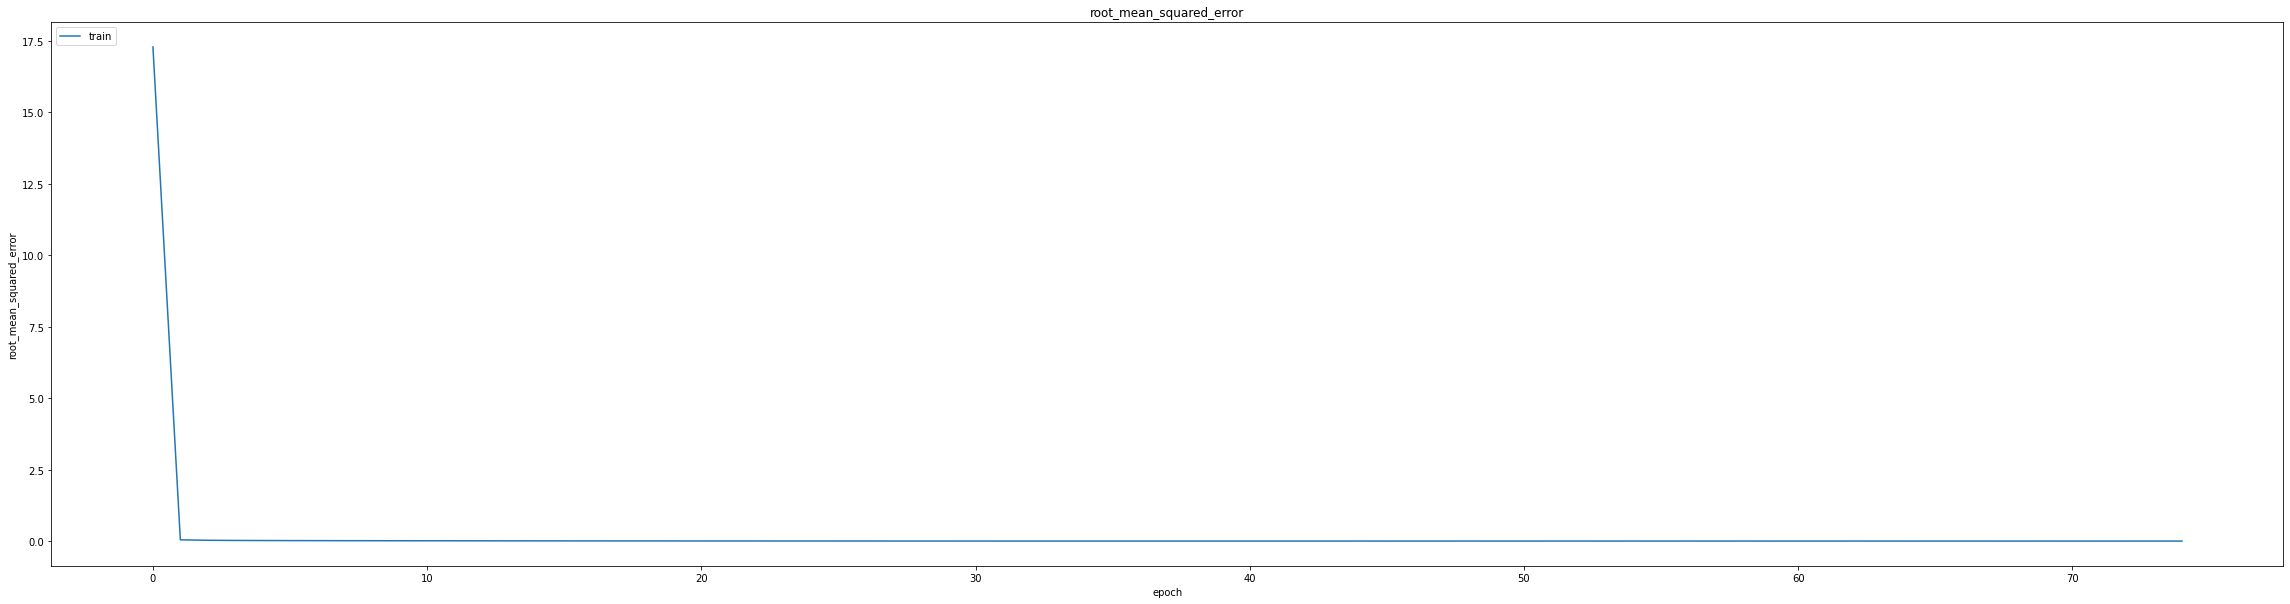

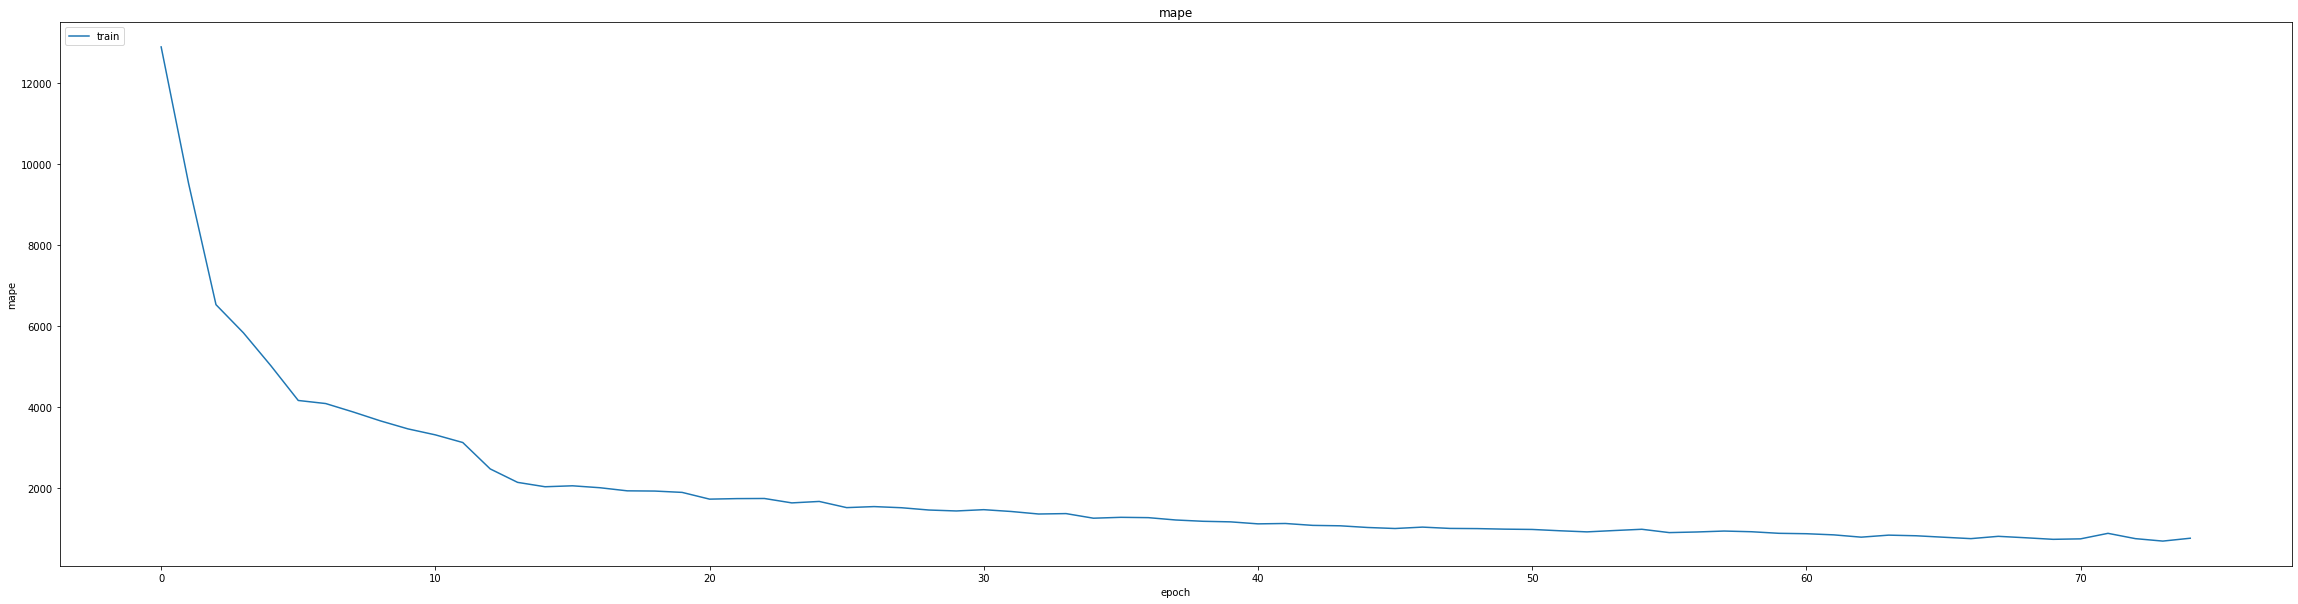

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005125886294990778
0.007105373777449131
348/348 [==============================] - 2s 3ms/step
0.9967148806208327


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
401/406 [============================>.] - ETA: 0s - loss: 3.8736e-04 - mae: 0.0082 - mse: 3.8736e-04 - root_mean_squared_error: 0.0197 - mape: 875.7978
Epoch 1: val_mse did not improve from 0.00005
406/406 [==============================] - 7s 11ms/step - loss: 3.8298e-04 - mae: 0.0082 - mse: 3.8298e-04 - root_mean_squared_error: 0.0196 - mape: 865.2540 - val_loss: 9.0342e-05 - val_mae: 0.0074 - val_mse: 9.0342e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 4296.6733 - lr: 0.0010
Epoch 2/25
401/406 [============================>.] - ETA: 0s - loss: 2.6045e-05 - mae: 0.0038 - mse: 2.6045e-05 - root_mean_squared_error: 0.0051 - mape: 861.7358
Epoch 2: val_mse did not improve from 0.00005
406/406 [==============================] - 4s 9ms/step - loss: 2.6076e-05 - mae: 0.0038 - mse: 2.6076e-05 - root_mean_squared_error: 0.0051 - mape: 851.3632 - val_loss: 9.1644e-05 - val_mae: 0.0079 - val_mse: 9.1644e-05 - val_root_mean_squared_error: 0.0096 - val_mape: 3537.4116 - lr: 

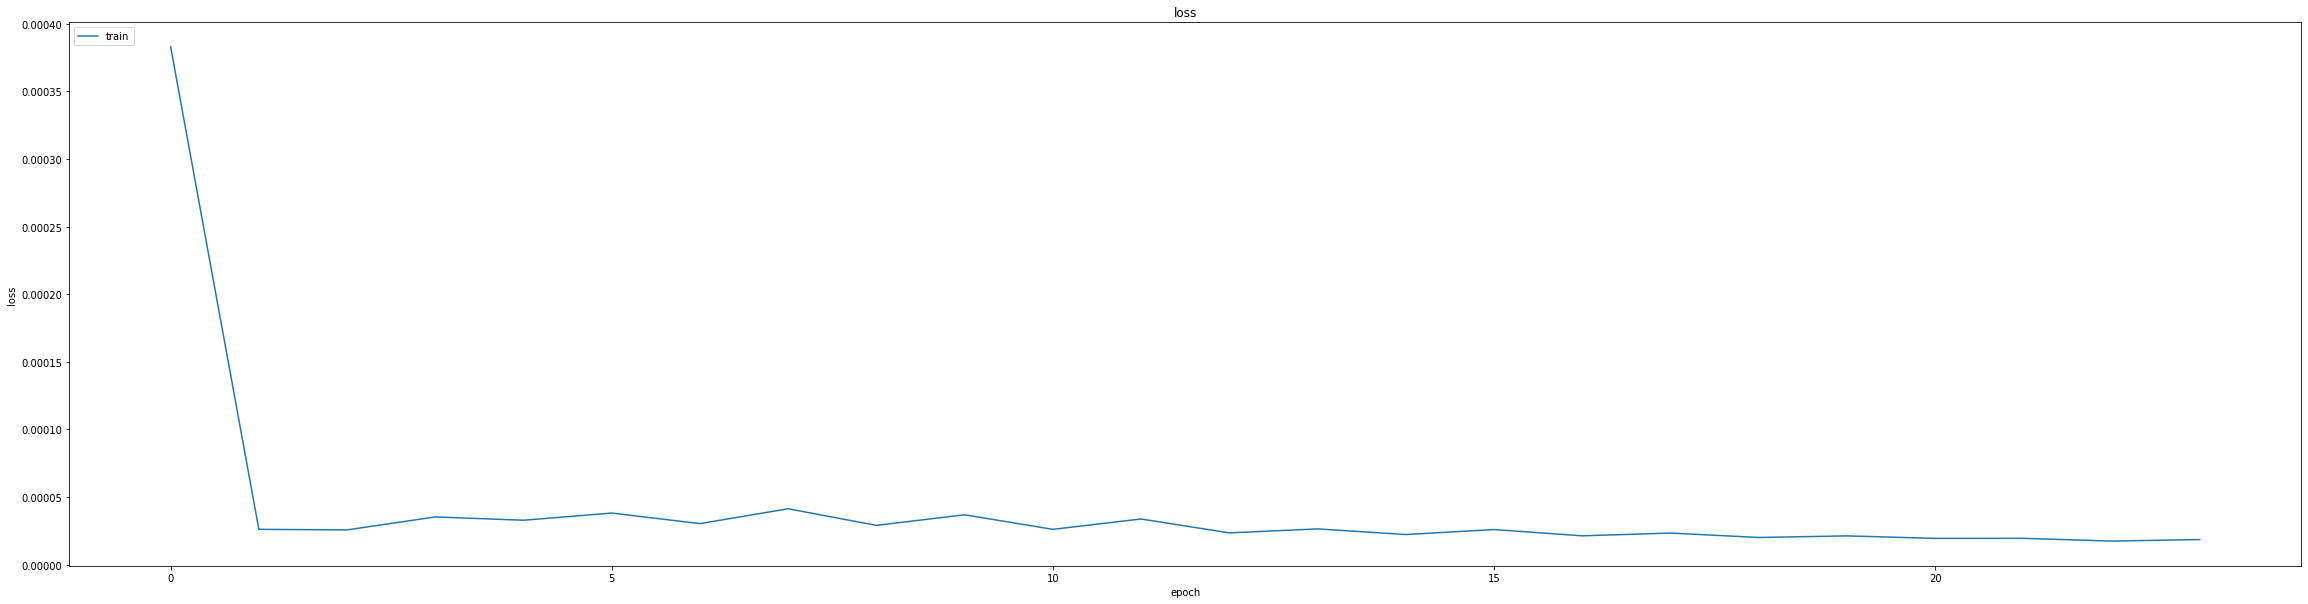

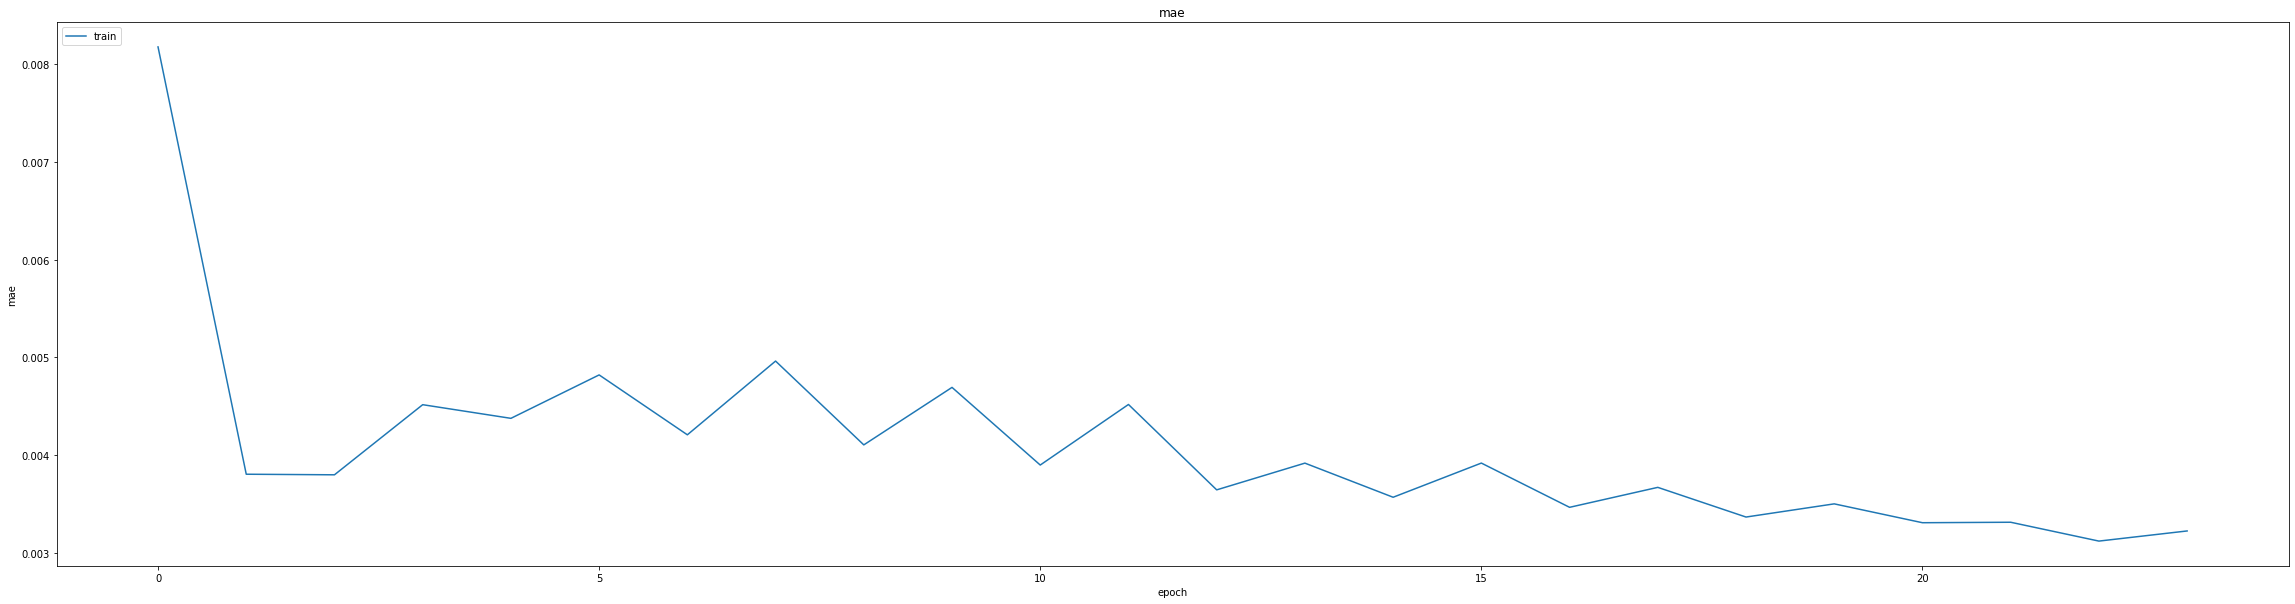

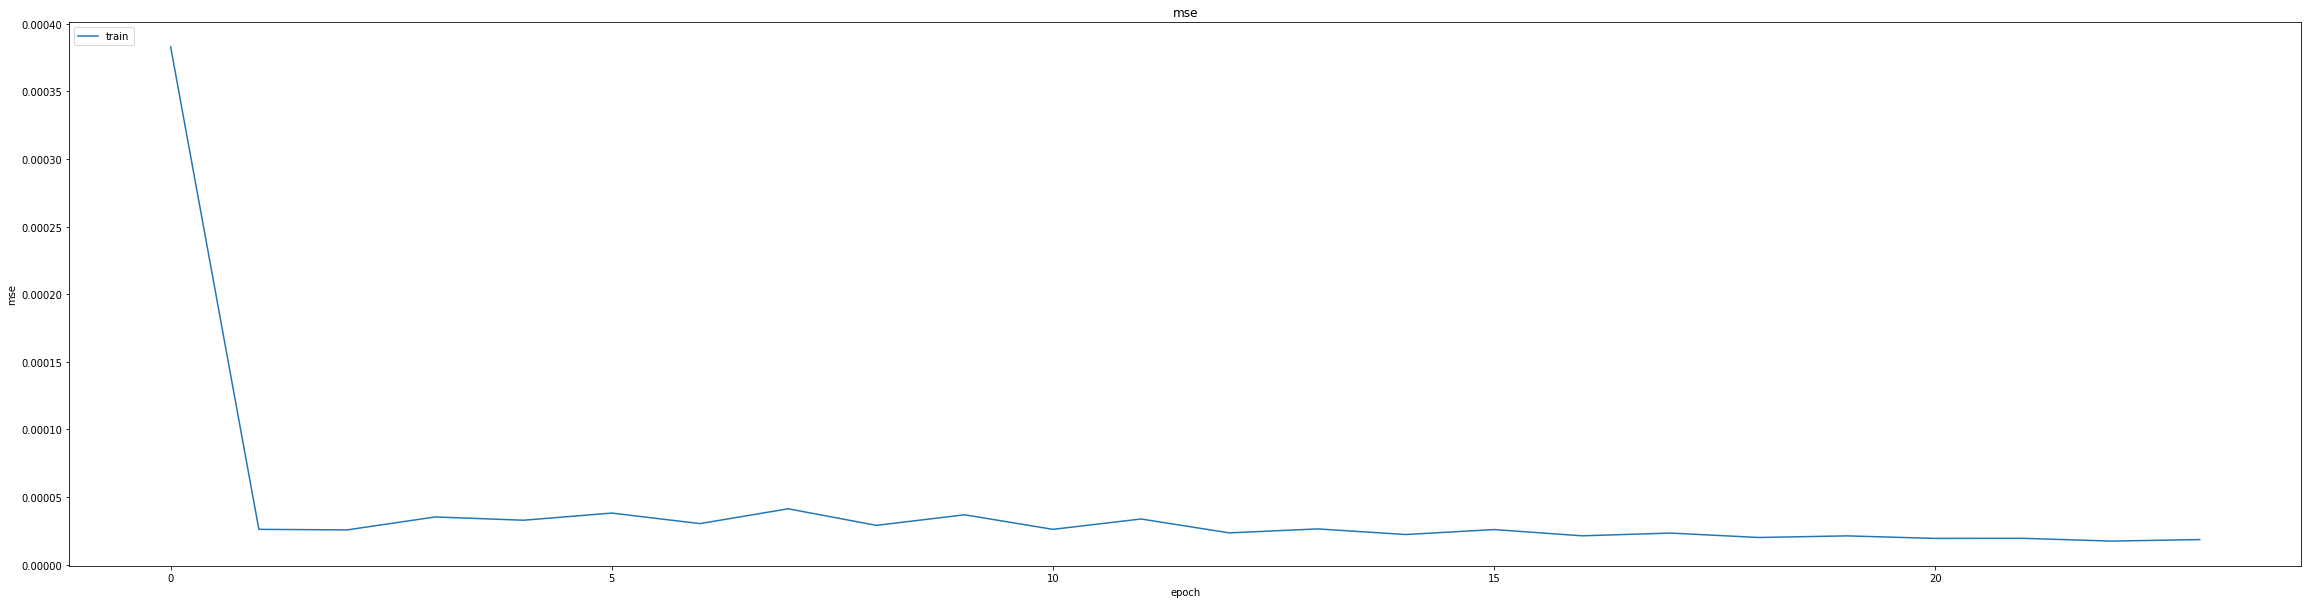

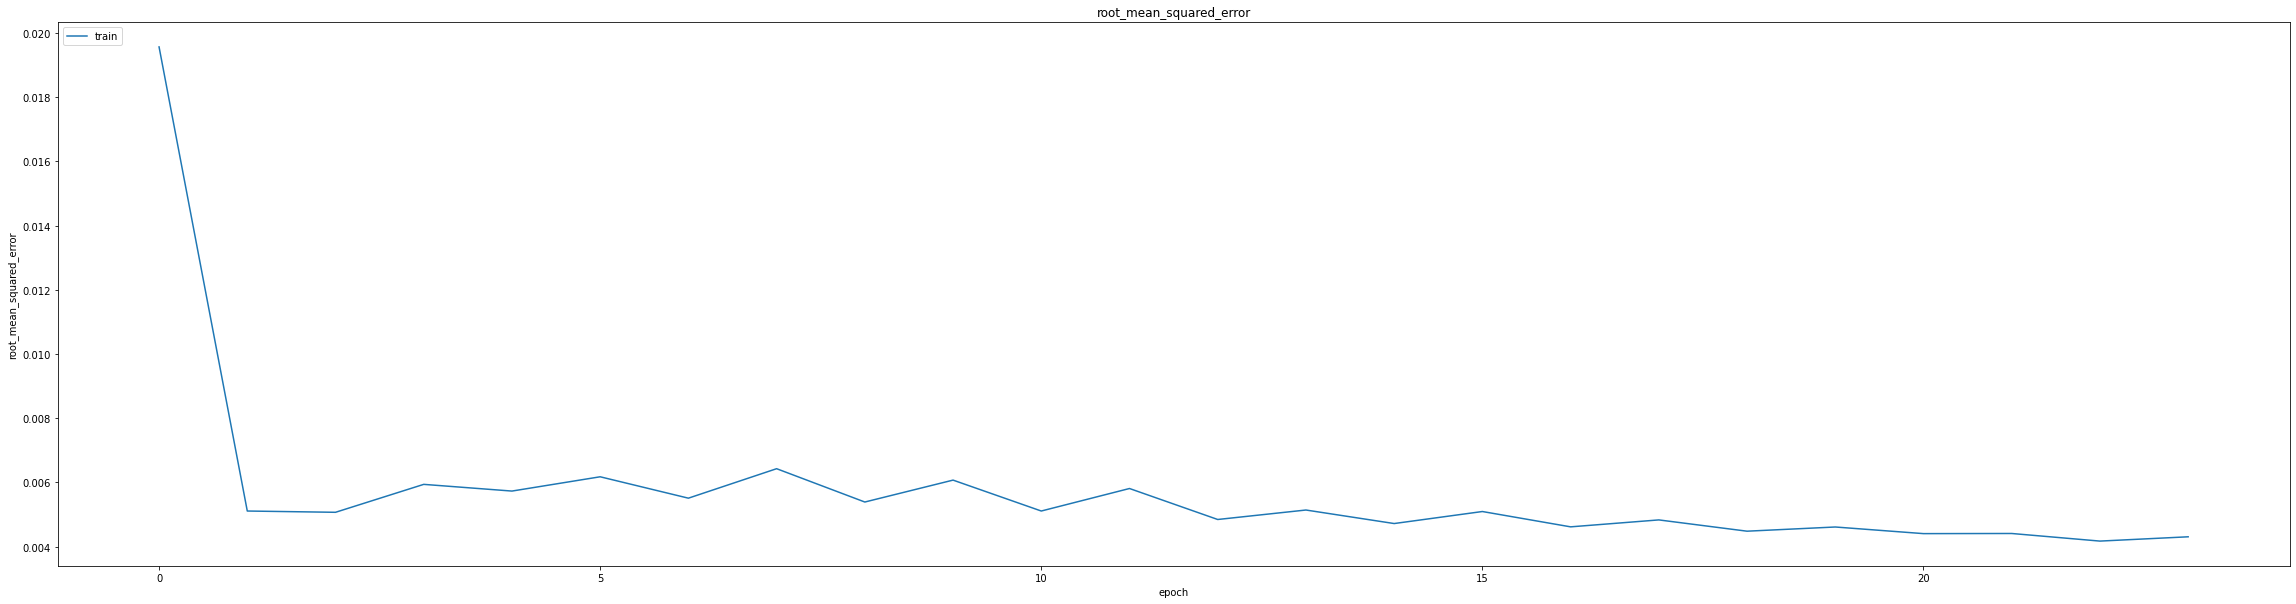

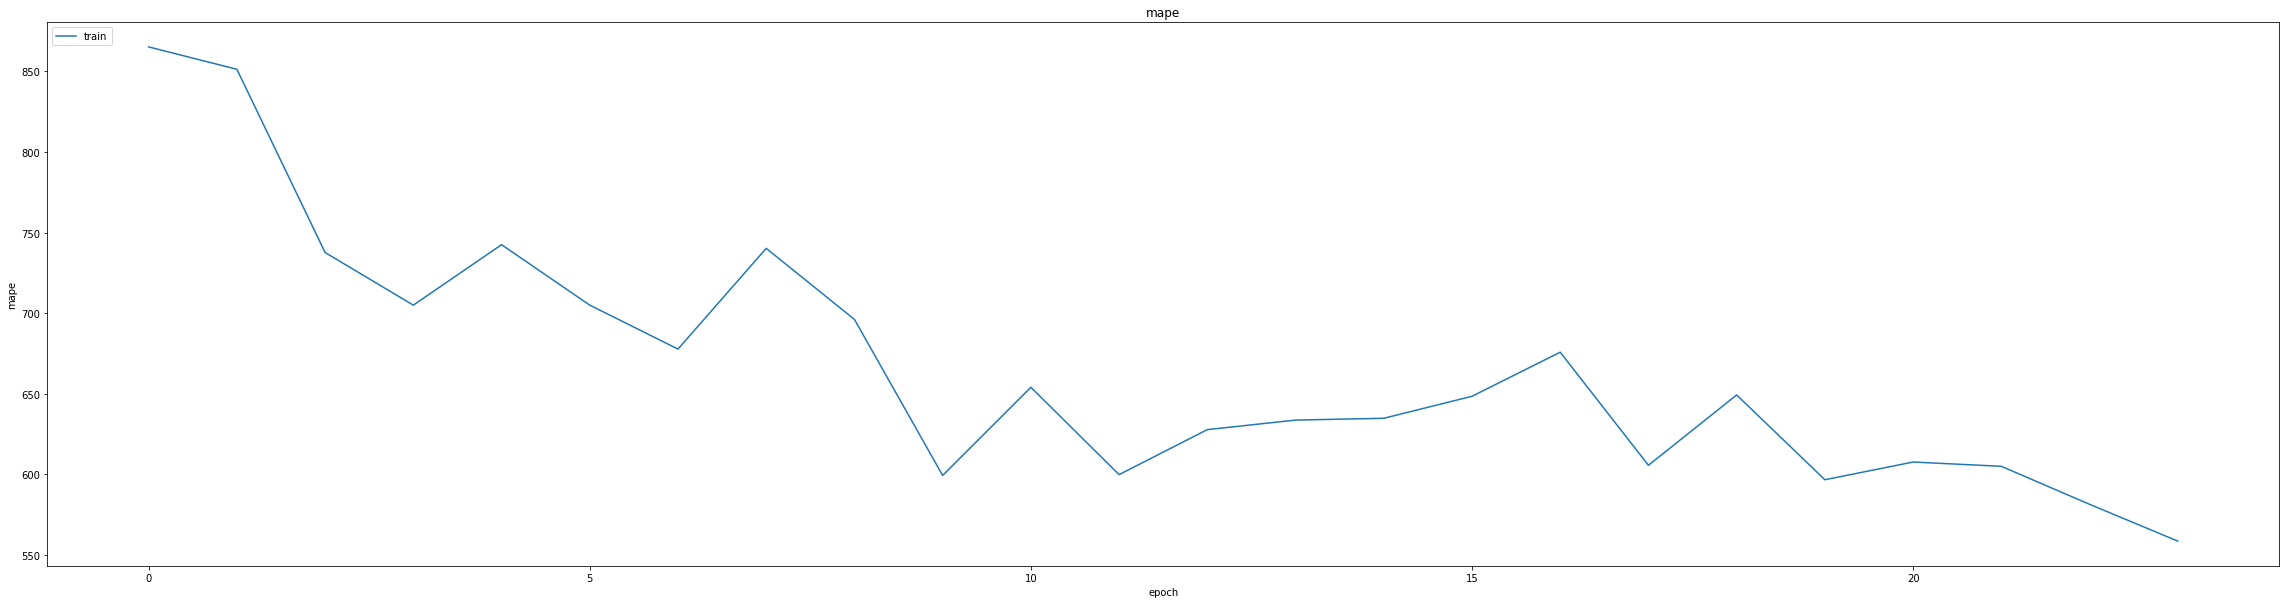

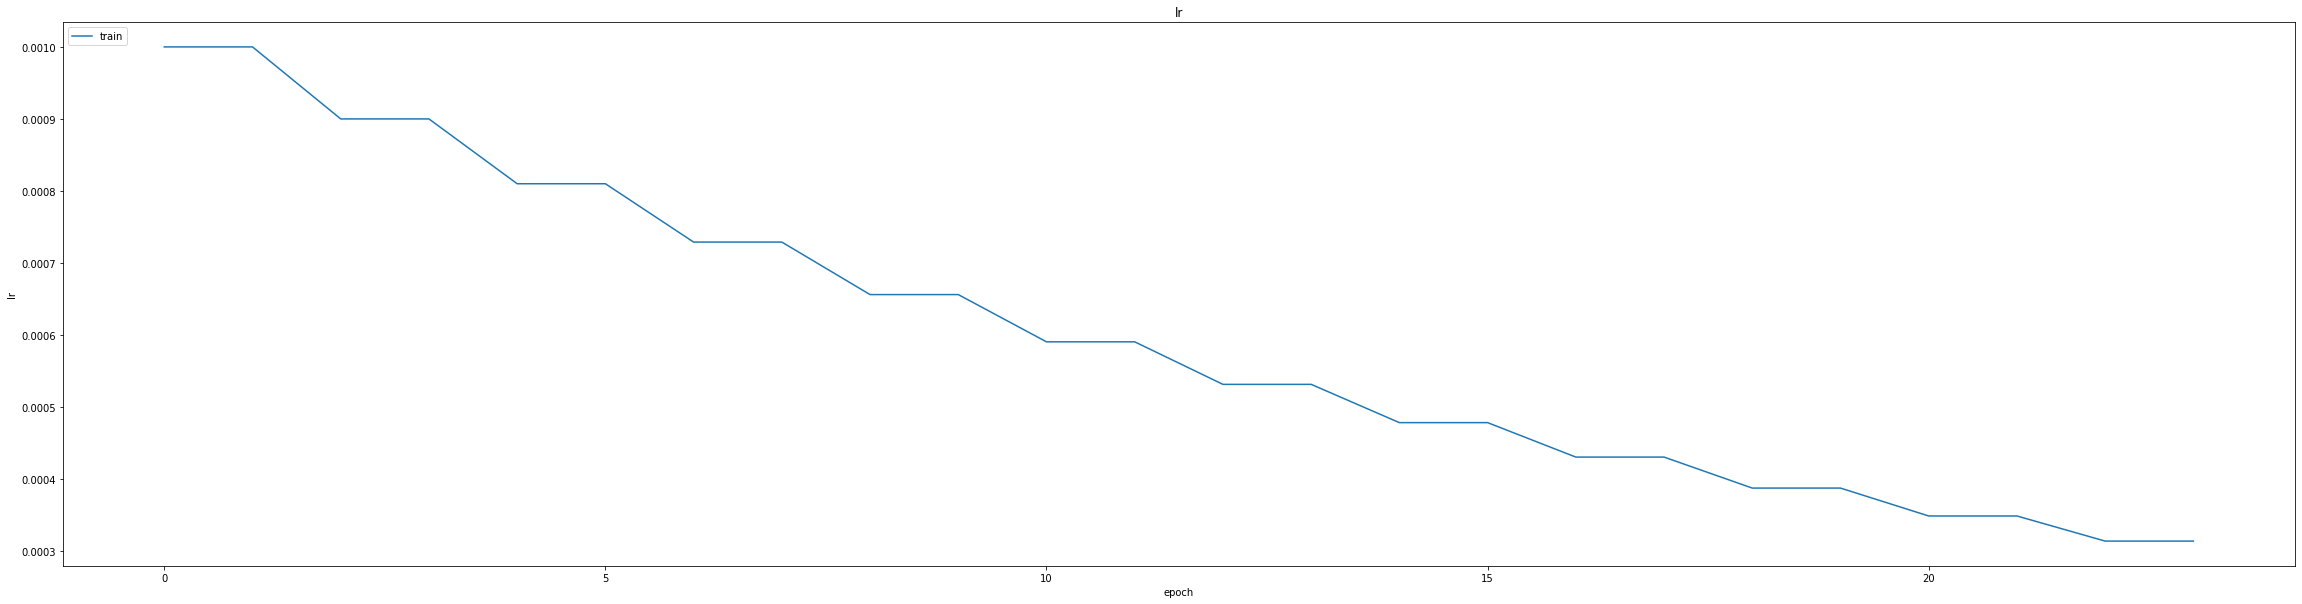

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005113651044666767
0.007156807463616133
348/348 [==============================] - 2s 3ms/step
0.9989852499259599


348/348 [==============================] - 1s 3ms/step


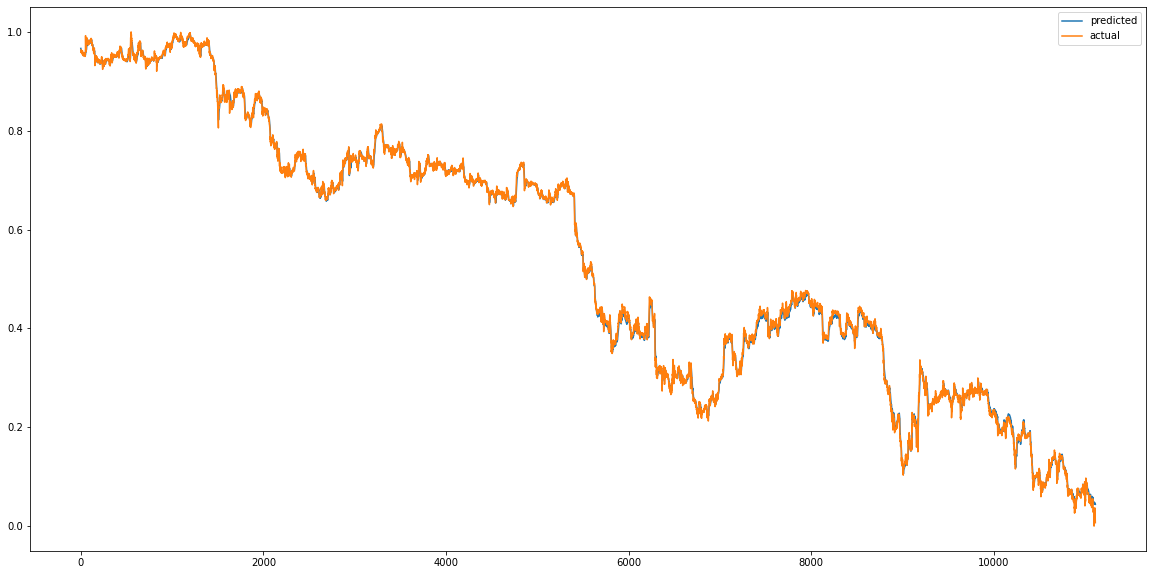

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


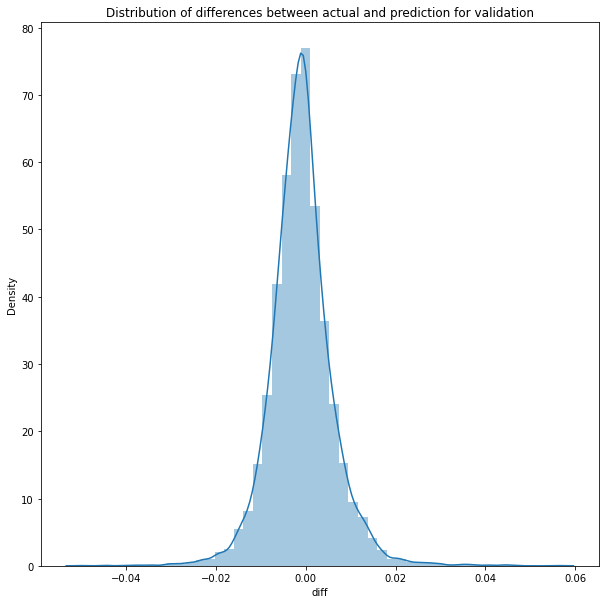

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 3ms/step


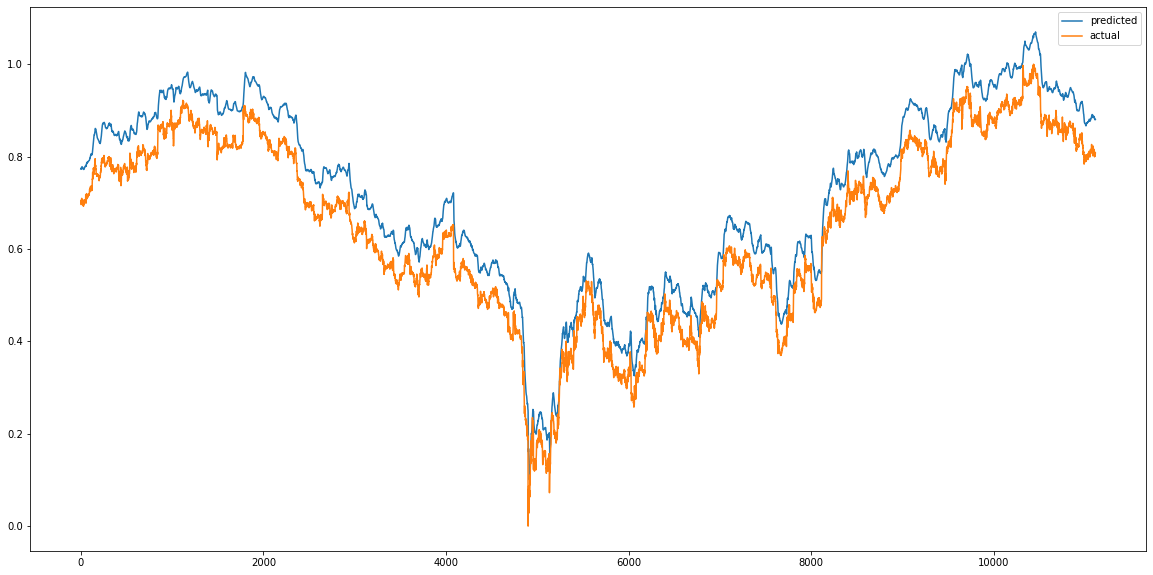

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.005131396751205656
RMSE :  0.07163376823262654
MAE :  0.07045013838411182
348/348 [==============================] - 2s 4ms/step
R2_Score  : 0.8698350131616636


count    11115.000000
mean         0.070416
std          0.013151
min         -0.031612
25%          0.064363
50%          0.071466
75%          0.078045
max          0.246670
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
404/406 [============================>.] - ETA: 0s - loss: 1316.6619 - mae: 14.1225 - mse: 1316.6619 - root_mean_squared_error: 36.2858 - mape: 72790.7891
Epoch 1: val_mse improved from inf to 5.08547, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 54s 111ms/step - loss: 1310.5504 - mae: 14.0666 - mse: 1310.5504 - root_mean_squared_error: 36.2015 - mape: 72453.5391 - val_loss: 5.0855 - val_mae: 2.2384 - val_mse: 5.0855 - val_root_mean_squared_error: 2.2551 - val_mape: 251630.0312
Epoch 2/75
406/406 [==============================] - ETA: 0s - loss: 2.1899 - mae: 1.4282 - mse: 2.1899 - root_mean_squared_error: 1.4798 - mape: 50377.6484
Epoch 2: val_mse improved from 5.08547 to 1.21400, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 2.1899 - mae: 1.4282 - mse: 2.1899 - root_mean_squared_error: 1.4798 - mape: 50377.6484 - val_loss: 1.2140 - val_mae: 1.0674 - val_mse: 1.2140 - val_root_mean_squared_error: 1.1018 - val_mape: 145746.2656
Epoch 3/75
404/406 [============================>.] - ETA: 0s - loss: 0.5737 - mae: 0.7208 - mse: 0.5737 - root_mean_squared_error: 0.7575 - mape: 25807.3457
Epoch 3: val_mse improved from 1.21400 to 0.49332, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 100ms/step - loss: 0.5725 - mae: 0.7199 - mse: 0.5725 - root_mean_squared_error: 0.7566 - mape: 25687.6582 - val_loss: 0.4933 - val_mae: 0.6472 - val_mse: 0.4933 - val_root_mean_squared_error: 0.7024 - val_mape: 107752.0078
Epoch 4/75
404/406 [============================>.] - ETA: 0s - loss: 0.2172 - mae: 0.4175 - mse: 0.2172 - root_mean_squared_error: 0.4660 - mape: 20132.1484
Epoch 4: val_mse improved from 0.49332 to 0.26272, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 98ms/step - loss: 0.2168 - mae: 0.4171 - mse: 0.2168 - root_mean_squared_error: 0.4657 - mape: 20038.7305 - val_loss: 0.2627 - val_mae: 0.4344 - val_mse: 0.2627 - val_root_mean_squared_error: 0.5126 - val_mape: 88475.1719
Epoch 5/75
404/406 [============================>.] - ETA: 0s - loss: 0.1038 - mae: 0.2577 - mse: 0.1038 - root_mean_squared_error: 0.3221 - mape: 18209.9688
Epoch 5: val_mse improved from 0.26272 to 0.16994, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 0.1037 - mae: 0.2576 - mse: 0.1037 - root_mean_squared_error: 0.3220 - mape: 18125.4316 - val_loss: 0.1699 - val_mae: 0.3385 - val_mse: 0.1699 - val_root_mean_squared_error: 0.4122 - val_mape: 77195.3203
Epoch 6/75
405/406 [============================>.] - ETA: 0s - loss: 0.0625 - mae: 0.1883 - mse: 0.0625 - root_mean_squared_error: 0.2500 - mape: 15789.6973
Epoch 6: val_mse improved from 0.16994 to 0.12779, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 98ms/step - loss: 0.0625 - mae: 0.1883 - mse: 0.0625 - root_mean_squared_error: 0.2499 - mape: 15755.1406 - val_loss: 0.1278 - val_mae: 0.2892 - val_mse: 0.1278 - val_root_mean_squared_error: 0.3575 - val_mape: 70152.6641
Epoch 7/75
405/406 [============================>.] - ETA: 0s - loss: 0.0470 - mae: 0.1694 - mse: 0.0470 - root_mean_squared_error: 0.2168 - mape: 15158.0508
Epoch 7: val_mse improved from 0.12779 to 0.10734, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0470 - mae: 0.1694 - mse: 0.0470 - root_mean_squared_error: 0.2168 - mape: 15124.8545 - val_loss: 0.1073 - val_mae: 0.2630 - val_mse: 0.1073 - val_root_mean_squared_error: 0.3276 - val_mape: 65681.6094
Epoch 8/75
406/406 [==============================] - ETA: 0s - loss: 0.0414 - mae: 0.1650 - mse: 0.0414 - root_mean_squared_error: 0.2035 - mape: 13776.9814
Epoch 8: val_mse improved from 0.10734 to 0.09710, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 104ms/step - loss: 0.0414 - mae: 0.1650 - mse: 0.0414 - root_mean_squared_error: 0.2035 - mape: 13776.9814 - val_loss: 0.0971 - val_mae: 0.2530 - val_mse: 0.0971 - val_root_mean_squared_error: 0.3116 - val_mape: 62905.0938
Epoch 9/75
403/406 [============================>.] - ETA: 0s - loss: 0.0396 - mae: 0.1647 - mse: 0.0396 - root_mean_squared_error: 0.1989 - mape: 13397.1279
Epoch 9: val_mse improved from 0.09710 to 0.09202, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 98ms/step - loss: 0.0396 - mae: 0.1647 - mse: 0.0396 - root_mean_squared_error: 0.1989 - mape: 13302.0039 - val_loss: 0.0920 - val_mae: 0.2496 - val_mse: 0.0920 - val_root_mean_squared_error: 0.3034 - val_mape: 61292.9141
Epoch 10/75
404/406 [============================>.] - ETA: 0s - loss: 0.0391 - mae: 0.1652 - mse: 0.0391 - root_mean_squared_error: 0.1977 - mape: 13156.2031
Epoch 10: val_mse improved from 0.09202 to 0.08958, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 100ms/step - loss: 0.0391 - mae: 0.1652 - mse: 0.0391 - root_mean_squared_error: 0.1977 - mape: 13095.0723 - val_loss: 0.0896 - val_mae: 0.2484 - val_mse: 0.0896 - val_root_mean_squared_error: 0.2993 - val_mape: 60434.5664
Epoch 11/75
405/406 [============================>.] - ETA: 0s - loss: 0.0390 - mae: 0.1656 - mse: 0.0390 - root_mean_squared_error: 0.1974 - mape: 13046.8604
Epoch 11: val_mse improved from 0.08958 to 0.08847, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 100ms/step - loss: 0.0390 - mae: 0.1656 - mse: 0.0390 - root_mean_squared_error: 0.1974 - mape: 13018.3203 - val_loss: 0.0885 - val_mae: 0.2481 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2974 - val_mape: 60024.7773
Epoch 12/75
404/406 [============================>.] - ETA: 0s - loss: 0.0389 - mae: 0.1660 - mse: 0.0389 - root_mean_squared_error: 0.1973 - mape: 12826.2627
Epoch 12: val_mse improved from 0.08847 to 0.08822, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 100ms/step - loss: 0.0389 - mae: 0.1660 - mse: 0.0389 - root_mean_squared_error: 0.1973 - mape: 12766.6982 - val_loss: 0.0882 - val_mae: 0.2480 - val_mse: 0.0882 - val_root_mean_squared_error: 0.2970 - val_mape: 59928.4180
Epoch 13/75
403/406 [============================>.] - ETA: 0s - loss: 0.0389 - mae: 0.1659 - mse: 0.0389 - root_mean_squared_error: 0.1972 - mape: 13159.4717
Epoch 13: val_mse improved from 0.08822 to 0.08789, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0389 - mae: 0.1659 - mse: 0.0389 - root_mean_squared_error: 0.1972 - mape: 13066.0498 - val_loss: 0.0879 - val_mae: 0.2479 - val_mse: 0.0879 - val_root_mean_squared_error: 0.2965 - val_mape: 59800.5664
Epoch 14/75
406/406 [==============================] - ETA: 0s - loss: 0.0389 - mae: 0.1661 - mse: 0.0389 - root_mean_squared_error: 0.1973 - mape: 12802.9717
Epoch 14: val_mse did not improve from 0.08789
406/406 [==============================] - 7s 18ms/step - loss: 0.0389 - mae: 0.1661 - mse: 0.0389 - root_mean_squared_error: 0.1973 - mape: 12802.9717 - val_loss: 0.0879 - val_mae: 0.2479 - val_mse: 0.0879 - val_root_mean_squared_error: 0.2965 - val_mape: 59814.4570
Epoch 15/75
403/406 [============================>.] - ETA: 0s - loss: 0.0389 - mae: 0.1660 - mse: 0.0389 - root_mean_squared_error: 0.1973 - mape: 12802.0225
Epoch 15: val_mse did not improve from 0.08789
406/406 [==============================] - 7s 18ms/

406/406 [==============================] - 41s 100ms/step - loss: 0.0388 - mae: 0.1658 - mse: 0.0388 - root_mean_squared_error: 0.1971 - mape: 13276.2490 - val_loss: 0.0878 - val_mae: 0.2478 - val_mse: 0.0878 - val_root_mean_squared_error: 0.2964 - val_mape: 59790.9688
Epoch 20/75
405/406 [============================>.] - ETA: 0s - loss: 0.0388 - mae: 0.1657 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 13009.1592
Epoch 20: val_mse improved from 0.08785 to 0.08754, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 100ms/step - loss: 0.0388 - mae: 0.1657 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 12980.6963 - val_loss: 0.0875 - val_mae: 0.2476 - val_mse: 0.0875 - val_root_mean_squared_error: 0.2959 - val_mape: 59679.0586
Epoch 21/75
406/406 [==============================] - ETA: 0s - loss: 0.0383 - mae: 0.1644 - mse: 0.0383 - root_mean_squared_error: 0.1957 - mape: 12587.4541
Epoch 21: val_mse improved from 0.08754 to 0.08506, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 98ms/step - loss: 0.0383 - mae: 0.1644 - mse: 0.0383 - root_mean_squared_error: 0.1957 - mape: 12587.4541 - val_loss: 0.0851 - val_mae: 0.2438 - val_mse: 0.0851 - val_root_mean_squared_error: 0.2917 - val_mape: 58783.6797
Epoch 22/75
404/406 [============================>.] - ETA: 0s - loss: 0.0325 - mae: 0.1501 - mse: 0.0325 - root_mean_squared_error: 0.1802 - mape: 12390.6406
Epoch 22: val_mse improved from 0.08506 to 0.05320, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0324 - mae: 0.1500 - mse: 0.0324 - root_mean_squared_error: 0.1800 - mape: 12333.0508 - val_loss: 0.0532 - val_mae: 0.1896 - val_mse: 0.0532 - val_root_mean_squared_error: 0.2307 - val_mape: 50118.9219
Epoch 23/75
406/406 [==============================] - ETA: 0s - loss: 0.0097 - mae: 0.0727 - mse: 0.0097 - root_mean_squared_error: 0.0987 - mape: 8673.3252
Epoch 23: val_mse improved from 0.05320 to 0.01692, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0097 - mae: 0.0727 - mse: 0.0097 - root_mean_squared_error: 0.0987 - mape: 8673.3252 - val_loss: 0.0169 - val_mae: 0.0901 - val_mse: 0.0169 - val_root_mean_squared_error: 0.1301 - val_mape: 38637.3828
Epoch 24/75
405/406 [============================>.] - ETA: 0s - loss: 0.0044 - mae: 0.0484 - mse: 0.0044 - root_mean_squared_error: 0.0660 - mape: 7942.6831
Epoch 24: val_mse improved from 0.01692 to 0.01131, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0044 - mae: 0.0484 - mse: 0.0044 - root_mean_squared_error: 0.0660 - mape: 7925.2759 - val_loss: 0.0113 - val_mae: 0.0713 - val_mse: 0.0113 - val_root_mean_squared_error: 0.1064 - val_mape: 34466.9531
Epoch 25/75
405/406 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0387 - mse: 0.0029 - root_mean_squared_error: 0.0540 - mape: 6886.0117
Epoch 25: val_mse improved from 0.01131 to 0.00837, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 0.0029 - mae: 0.0386 - mse: 0.0029 - root_mean_squared_error: 0.0540 - mape: 6870.9385 - val_loss: 0.0084 - val_mae: 0.0568 - val_mse: 0.0084 - val_root_mean_squared_error: 0.0915 - val_mape: 31803.5332
Epoch 26/75
406/406 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0322 - mse: 0.0021 - root_mean_squared_error: 0.0460 - mape: 6539.2358
Epoch 26: val_mse improved from 0.00837 to 0.00659, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 98ms/step - loss: 0.0021 - mae: 0.0322 - mse: 0.0021 - root_mean_squared_error: 0.0460 - mape: 6539.2358 - val_loss: 0.0066 - val_mae: 0.0493 - val_mse: 0.0066 - val_root_mean_squared_error: 0.0812 - val_mape: 29738.8418
Epoch 27/75
403/406 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0284 - mse: 0.0017 - root_mean_squared_error: 0.0410 - mape: 6361.3418
Epoch 27: val_mse improved from 0.00659 to 0.00536, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0017 - mae: 0.0284 - mse: 0.0017 - root_mean_squared_error: 0.0410 - mape: 6316.1240 - val_loss: 0.0054 - val_mae: 0.0439 - val_mse: 0.0054 - val_root_mean_squared_error: 0.0732 - val_mape: 28080.7070
Epoch 28/75
403/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0261 - mse: 0.0014 - root_mean_squared_error: 0.0378 - mape: 5935.4546
Epoch 28: val_mse improved from 0.00536 to 0.00441, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0014 - mae: 0.0261 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 5893.2373 - val_loss: 0.0044 - val_mae: 0.0384 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0664 - val_mape: 26635.7715
Epoch 29/75
406/406 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0246 - mse: 0.0013 - root_mean_squared_error: 0.0354 - mape: 5442.4639
Epoch 29: val_mse improved from 0.00441 to 0.00385, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0013 - mae: 0.0246 - mse: 0.0013 - root_mean_squared_error: 0.0354 - mape: 5442.4639 - val_loss: 0.0038 - val_mae: 0.0386 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0620 - val_mape: 25382.0508
Epoch 30/75
406/406 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0236 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 5273.5400
Epoch 30: val_mse improved from 0.00385 to 0.00343, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 100ms/step - loss: 0.0011 - mae: 0.0236 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 5273.5400 - val_loss: 0.0034 - val_mae: 0.0369 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0586 - val_mape: 24188.1992
Epoch 31/75
405/406 [============================>.] - ETA: 0s - loss: 9.5921e-04 - mae: 0.0213 - mse: 9.5921e-04 - root_mean_squared_error: 0.0310 - mape: 5059.6172
Epoch 31: val_mse improved from 0.00343 to 0.00285, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 9.5818e-04 - mae: 0.0213 - mse: 9.5818e-04 - root_mean_squared_error: 0.0310 - mape: 5048.5210 - val_loss: 0.0029 - val_mae: 0.0317 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0534 - val_mape: 23160.2578
Epoch 32/75
405/406 [============================>.] - ETA: 0s - loss: 8.9462e-04 - mae: 0.0209 - mse: 8.9462e-04 - root_mean_squared_error: 0.0299 - mape: 5049.2026
Epoch 32: val_mse improved from 0.00285 to 0.00247, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 8.9410e-04 - mae: 0.0209 - mse: 8.9410e-04 - root_mean_squared_error: 0.0299 - mape: 5038.1318 - val_loss: 0.0025 - val_mae: 0.0294 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0497 - val_mape: 22081.6562
Epoch 33/75
405/406 [============================>.] - ETA: 0s - loss: 7.8832e-04 - mae: 0.0197 - mse: 7.8832e-04 - root_mean_squared_error: 0.0281 - mape: 4868.9399
Epoch 33: val_mse improved from 0.00247 to 0.00194, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 39s 97ms/step - loss: 7.8840e-04 - mae: 0.0197 - mse: 7.8840e-04 - root_mean_squared_error: 0.0281 - mape: 4858.2651 - val_loss: 0.0019 - val_mae: 0.0237 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0440 - val_mape: 20948.8828
Epoch 34/75
405/406 [============================>.] - ETA: 0s - loss: 7.1707e-04 - mae: 0.0190 - mse: 7.1707e-04 - root_mean_squared_error: 0.0268 - mape: 4400.0688
Epoch 34: val_mse improved from 0.00194 to 0.00174, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 7.1686e-04 - mae: 0.0190 - mse: 7.1686e-04 - root_mean_squared_error: 0.0268 - mape: 4390.4263 - val_loss: 0.0017 - val_mae: 0.0248 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0417 - val_mape: 19904.3535
Epoch 35/75
406/406 [==============================] - ETA: 0s - loss: 6.4314e-04 - mae: 0.0181 - mse: 6.4314e-04 - root_mean_squared_error: 0.0254 - mape: 4090.8953
Epoch 35: val_mse improved from 0.00174 to 0.00143, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 6.4314e-04 - mae: 0.0181 - mse: 6.4314e-04 - root_mean_squared_error: 0.0254 - mape: 4090.8953 - val_loss: 0.0014 - val_mae: 0.0216 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0379 - val_mape: 18843.2188
Epoch 36/75
403/406 [============================>.] - ETA: 0s - loss: 5.6122e-04 - mae: 0.0170 - mse: 5.6122e-04 - root_mean_squared_error: 0.0237 - mape: 4087.7834
Epoch 36: val_mse improved from 0.00143 to 0.00128, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 5.6058e-04 - mae: 0.0170 - mse: 5.6058e-04 - root_mean_squared_error: 0.0237 - mape: 4058.6973 - val_loss: 0.0013 - val_mae: 0.0218 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0358 - val_mape: 17952.0098
Epoch 37/75
406/406 [==============================] - ETA: 0s - loss: 5.1312e-04 - mae: 0.0165 - mse: 5.1312e-04 - root_mean_squared_error: 0.0227 - mape: 3615.5933
Epoch 37: val_mse improved from 0.00128 to 0.00099, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 98ms/step - loss: 5.1312e-04 - mae: 0.0165 - mse: 5.1312e-04 - root_mean_squared_error: 0.0227 - mape: 3615.5933 - val_loss: 9.9401e-04 - val_mae: 0.0173 - val_mse: 9.9401e-04 - val_root_mean_squared_error: 0.0315 - val_mape: 17095.7051
Epoch 38/75
404/406 [============================>.] - ETA: 0s - loss: 4.8849e-04 - mae: 0.0163 - mse: 4.8849e-04 - root_mean_squared_error: 0.0221 - mape: 3482.6956
Epoch 38: val_mse did not improve from 0.00099
406/406 [==============================] - 7s 18ms/step - loss: 4.8829e-04 - mae: 0.0163 - mse: 4.8829e-04 - root_mean_squared_error: 0.0221 - mape: 3466.4939 - val_loss: 0.0010 - val_mae: 0.0227 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0322 - val_mape: 16222.2812
Epoch 39/75
403/406 [============================>.] - ETA: 0s - loss: 4.0614e-04 - mae: 0.0148 - mse: 4.0614e-04 - root_mean_squared_error: 0.0202 - mape: 3368.3379
Epoch 39: val_mse improved from 0.00099 to 0.00095, saving mod

406/406 [==============================] - 41s 100ms/step - loss: 4.0518e-04 - mae: 0.0148 - mse: 4.0518e-04 - root_mean_squared_error: 0.0201 - mape: 3344.3667 - val_loss: 9.4599e-04 - val_mae: 0.0206 - val_mse: 9.4599e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 15552.4316
Epoch 40/75
403/406 [============================>.] - ETA: 0s - loss: 3.7082e-04 - mae: 0.0142 - mse: 3.7082e-04 - root_mean_squared_error: 0.0193 - mape: 3362.3049
Epoch 40: val_mse improved from 0.00095 to 0.00074, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 98ms/step - loss: 3.7149e-04 - mae: 0.0142 - mse: 3.7149e-04 - root_mean_squared_error: 0.0193 - mape: 3338.4065 - val_loss: 7.3925e-04 - val_mae: 0.0172 - val_mse: 7.3925e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 14941.8994
Epoch 41/75
405/406 [============================>.] - ETA: 0s - loss: 3.3652e-04 - mae: 0.0136 - mse: 3.3652e-04 - root_mean_squared_error: 0.0183 - mape: 3128.3259
Epoch 41: val_mse improved from 0.00074 to 0.00073, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 98ms/step - loss: 3.3617e-04 - mae: 0.0136 - mse: 3.3617e-04 - root_mean_squared_error: 0.0183 - mape: 3121.4651 - val_loss: 7.2568e-04 - val_mae: 0.0164 - val_mse: 7.2568e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 14213.7666
Epoch 42/75
406/406 [==============================] - ETA: 0s - loss: 3.3866e-04 - mae: 0.0138 - mse: 3.3866e-04 - root_mean_squared_error: 0.0184 - mape: 2927.4326
Epoch 42: val_mse improved from 0.00073 to 0.00060, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 3.3866e-04 - mae: 0.0138 - mse: 3.3866e-04 - root_mean_squared_error: 0.0184 - mape: 2927.4326 - val_loss: 6.0430e-04 - val_mae: 0.0161 - val_mse: 6.0430e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 13667.0078
Epoch 43/75
406/406 [==============================] - ETA: 0s - loss: 2.8615e-04 - mae: 0.0127 - mse: 2.8615e-04 - root_mean_squared_error: 0.0169 - mape: 2747.2917
Epoch 43: val_mse improved from 0.00060 to 0.00054, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 98ms/step - loss: 2.8615e-04 - mae: 0.0127 - mse: 2.8615e-04 - root_mean_squared_error: 0.0169 - mape: 2747.2917 - val_loss: 5.4337e-04 - val_mae: 0.0163 - val_mse: 5.4337e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 13080.3721
Epoch 44/75
405/406 [============================>.] - ETA: 0s - loss: 2.5336e-04 - mae: 0.0119 - mse: 2.5336e-04 - root_mean_squared_error: 0.0159 - mape: 2738.9717
Epoch 44: val_mse improved from 0.00054 to 0.00054, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 97ms/step - loss: 2.5321e-04 - mae: 0.0119 - mse: 2.5321e-04 - root_mean_squared_error: 0.0159 - mape: 2732.9673 - val_loss: 5.3641e-04 - val_mae: 0.0139 - val_mse: 5.3641e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 12501.4697
Epoch 45/75
406/406 [==============================] - ETA: 0s - loss: 2.4318e-04 - mae: 0.0118 - mse: 2.4318e-04 - root_mean_squared_error: 0.0156 - mape: 2552.7722
Epoch 45: val_mse improved from 0.00054 to 0.00052, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 2.4318e-04 - mae: 0.0118 - mse: 2.4318e-04 - root_mean_squared_error: 0.0156 - mape: 2552.7722 - val_loss: 5.1851e-04 - val_mae: 0.0159 - val_mse: 5.1851e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 12017.8613
Epoch 46/75
404/406 [============================>.] - ETA: 0s - loss: 2.3055e-04 - mae: 0.0115 - mse: 2.3055e-04 - root_mean_squared_error: 0.0152 - mape: 2466.7258
Epoch 46: val_mse improved from 0.00052 to 0.00037, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 104ms/step - loss: 2.3283e-04 - mae: 0.0115 - mse: 2.3283e-04 - root_mean_squared_error: 0.0153 - mape: 2455.2571 - val_loss: 3.7067e-04 - val_mae: 0.0123 - val_mse: 3.7067e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 11482.6133
Epoch 47/75
406/406 [==============================] - ETA: 0s - loss: 2.1557e-04 - mae: 0.0111 - mse: 2.1557e-04 - root_mean_squared_error: 0.0147 - mape: 2551.7227
Epoch 47: val_mse improved from 0.00037 to 0.00032, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 2.1557e-04 - mae: 0.0111 - mse: 2.1557e-04 - root_mean_squared_error: 0.0147 - mape: 2551.7227 - val_loss: 3.2388e-04 - val_mae: 0.0112 - val_mse: 3.2388e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 11134.5527
Epoch 48/75
404/406 [============================>.] - ETA: 0s - loss: 1.7407e-04 - mae: 0.0100 - mse: 1.7407e-04 - root_mean_squared_error: 0.0132 - mape: 2366.8904
Epoch 48: val_mse did not improve from 0.00032
406/406 [==============================] - 7s 18ms/step - loss: 1.7406e-04 - mae: 0.0100 - mse: 1.7406e-04 - root_mean_squared_error: 0.0132 - mape: 2355.8772 - val_loss: 3.9487e-04 - val_mae: 0.0128 - val_mse: 3.9487e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 10803.0576
Epoch 49/75
406/406 [==============================] - ETA: 0s - loss: 1.7972e-04 - mae: 0.0102 - mse: 1.7972e-04 - root_mean_squared_error: 0.0134 - mape: 2291.8423
Epoch 49: val_mse improved from 0.00032 to 0.00030, s

406/406 [==============================] - 40s 99ms/step - loss: 1.7972e-04 - mae: 0.0102 - mse: 1.7972e-04 - root_mean_squared_error: 0.0134 - mape: 2291.8423 - val_loss: 2.9617e-04 - val_mae: 0.0125 - val_mse: 2.9617e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 10345.6777
Epoch 50/75
403/406 [============================>.] - ETA: 0s - loss: 1.7993e-04 - mae: 0.0103 - mse: 1.7993e-04 - root_mean_squared_error: 0.0134 - mape: 2129.6453
Epoch 50: val_mse improved from 0.00030 to 0.00018, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 104ms/step - loss: 1.7960e-04 - mae: 0.0103 - mse: 1.7960e-04 - root_mean_squared_error: 0.0134 - mape: 2114.4946 - val_loss: 1.8369e-04 - val_mae: 0.0088 - val_mse: 1.8369e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 10002.5459
Epoch 51/75
403/406 [============================>.] - ETA: 0s - loss: 1.5328e-04 - mae: 0.0094 - mse: 1.5328e-04 - root_mean_squared_error: 0.0124 - mape: 2095.2798
Epoch 51: val_mse did not improve from 0.00018
406/406 [==============================] - 7s 18ms/step - loss: 1.5413e-04 - mae: 0.0094 - mse: 1.5413e-04 - root_mean_squared_error: 0.0124 - mape: 2080.3733 - val_loss: 8.8013e-04 - val_mae: 0.0266 - val_mse: 8.8013e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 9532.8037
Epoch 52/75
405/406 [============================>.] - ETA: 0s - loss: 1.5156e-04 - mae: 0.0094 - mse: 1.5156e-04 - root_mean_squared_error: 0.0123 - mape: 2046.4581
Epoch 52: val_mse did not improve from 0.00018
406/406

406/406 [==============================] - 39s 97ms/step - loss: 1.1891e-04 - mae: 0.0083 - mse: 1.1891e-04 - root_mean_squared_error: 0.0109 - mape: 1868.0931 - val_loss: 1.1769e-04 - val_mae: 0.0068 - val_mse: 1.1769e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 8411.9912
Epoch 57/75
404/406 [============================>.] - ETA: 0s - loss: 1.1230e-04 - mae: 0.0082 - mse: 1.1230e-04 - root_mean_squared_error: 0.0106 - mape: 1837.5559
Epoch 57: val_mse did not improve from 0.00012
406/406 [==============================] - 8s 20ms/step - loss: 1.1446e-04 - mae: 0.0083 - mse: 1.1446e-04 - root_mean_squared_error: 0.0107 - mape: 1829.0126 - val_loss: 5.6354e-04 - val_mae: 0.0207 - val_mse: 5.6354e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 8736.4697
Epoch 58/75
405/406 [============================>.] - ETA: 0s - loss: 1.4430e-04 - mae: 0.0092 - mse: 1.4430e-04 - root_mean_squared_error: 0.0120 - mape: 1780.9908
Epoch 58: val_mse did not improve from 0.00012
406/406 [

406/406 [==============================] - 40s 98ms/step - loss: 8.7161e-05 - mae: 0.0073 - mse: 8.7161e-05 - root_mean_squared_error: 0.0093 - mape: 1576.5944 - val_loss: 1.1421e-04 - val_mae: 0.0077 - val_mse: 1.1421e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 7425.3066
Epoch 63/75
406/406 [==============================] - ETA: 0s - loss: 1.0414e-04 - mae: 0.0080 - mse: 1.0414e-04 - root_mean_squared_error: 0.0102 - mape: 1594.3353
Epoch 63: val_mse did not improve from 0.00011
406/406 [==============================] - 8s 19ms/step - loss: 1.0414e-04 - mae: 0.0080 - mse: 1.0414e-04 - root_mean_squared_error: 0.0102 - mape: 1594.3353 - val_loss: 1.9480e-04 - val_mae: 0.0085 - val_mse: 1.9480e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 7418.5117
Epoch 64/75
404/406 [============================>.] - ETA: 0s - loss: 9.5830e-05 - mae: 0.0077 - mse: 9.5830e-05 - root_mean_squared_error: 0.0098 - mape: 1563.8926
Epoch 64: val_mse did not improve from 0.00011
406/406 [

406/406 [==============================] - 39s 97ms/step - loss: 7.4200e-05 - mae: 0.0067 - mse: 7.4200e-05 - root_mean_squared_error: 0.0086 - mape: 1477.5239 - val_loss: 8.2308e-05 - val_mae: 0.0069 - val_mse: 8.2308e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 6957.6357
Epoch 66/75
405/406 [============================>.] - ETA: 0s - loss: 8.3754e-05 - mae: 0.0071 - mse: 8.3754e-05 - root_mean_squared_error: 0.0092 - mape: 1429.7625
Epoch 66: val_mse improved from 0.00008 to 0.00005, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 8.3631e-05 - mae: 0.0071 - mse: 8.3631e-05 - root_mean_squared_error: 0.0091 - mape: 1426.6270 - val_loss: 5.4123e-05 - val_mae: 0.0049 - val_mse: 5.4123e-05 - val_root_mean_squared_error: 0.0074 - val_mape: 6852.7749
Epoch 67/75
405/406 [============================>.] - ETA: 0s - loss: 7.6390e-05 - mae: 0.0067 - mse: 7.6390e-05 - root_mean_squared_error: 0.0087 - mape: 1429.7478
Epoch 67: val_mse did not improve from 0.00005
406/406 [==============================] - 8s 19ms/step - loss: 7.6571e-05 - mae: 0.0067 - mse: 7.6571e-05 - root_mean_squared_error: 0.0088 - mape: 1426.6147 - val_loss: 1.3460e-04 - val_mae: 0.0096 - val_mse: 1.3460e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 6559.4551
Epoch 68/75
406/406 [==============================] - ETA: 0s - loss: 6.9884e-05 - mae: 0.0064 - mse: 6.9884e-05 - root_mean_squared_error: 0.0084 - mape: 1388.5111
Epoch 68: val_mse did not improve from 0.00005
406/406 

406/406 [==============================] - 39s 96ms/step - loss: 5.2652e-05 - mae: 0.0056 - mse: 5.2652e-05 - root_mean_squared_error: 0.0073 - mape: 1620.0028 - val_loss: 5.0352e-05 - val_mae: 0.0051 - val_mse: 5.0352e-05 - val_root_mean_squared_error: 0.0071 - val_mape: 5306.2285
Epoch 74/75
405/406 [============================>.] - ETA: 0s - loss: 7.1143e-05 - mae: 0.0065 - mse: 7.1143e-05 - root_mean_squared_error: 0.0084 - mape: 1044.5079
Epoch 74: val_mse did not improve from 0.00005
406/406 [==============================] - 7s 18ms/step - loss: 7.1165e-05 - mae: 0.0065 - mse: 7.1165e-05 - root_mean_squared_error: 0.0084 - mape: 1042.2192 - val_loss: 4.4783e-04 - val_mae: 0.0186 - val_mse: 4.4783e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 5002.1001
Epoch 75/75
404/406 [============================>.] - ETA: 0s - loss: 6.0665e-05 - mae: 0.0060 - mse: 6.0665e-05 - root_mean_squared_error: 0.0078 - mape: 1036.2240
Epoch 75: val_mse did not improve from 0.00005
406/406 [

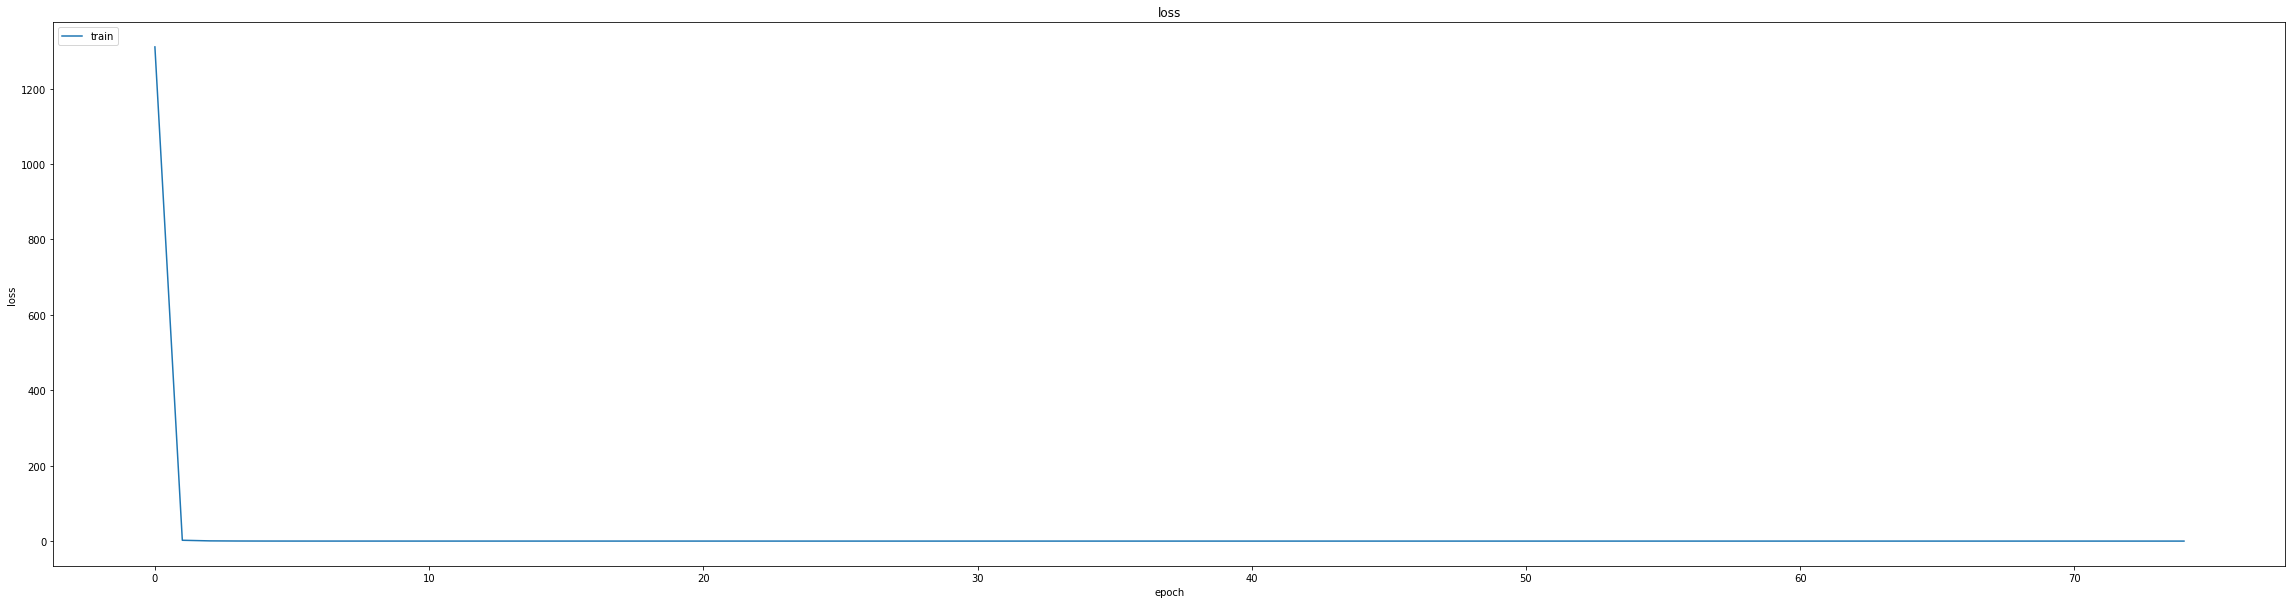

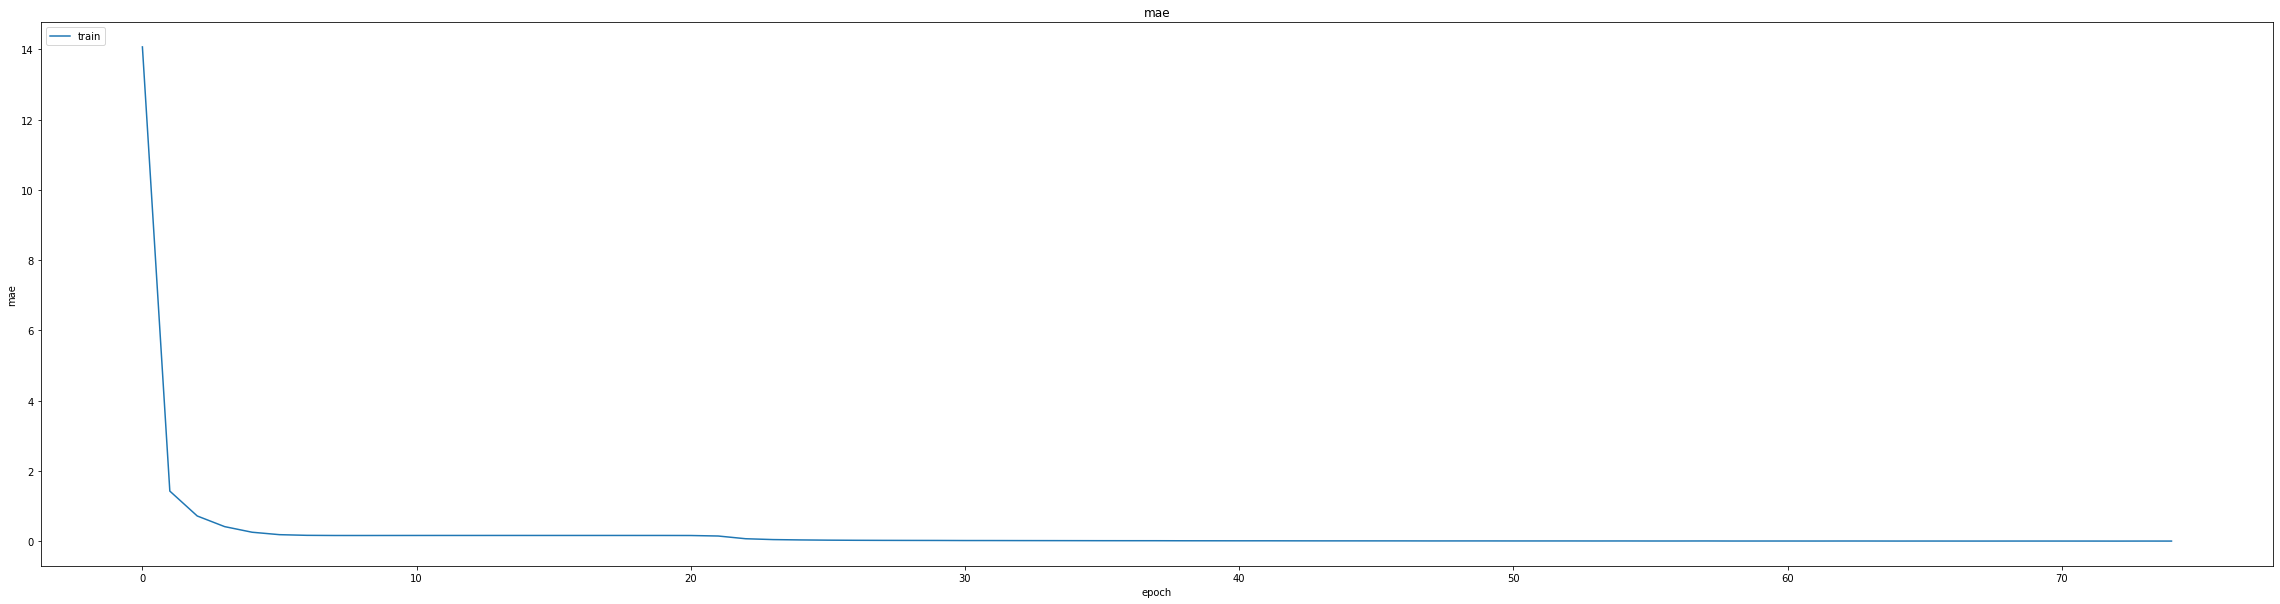

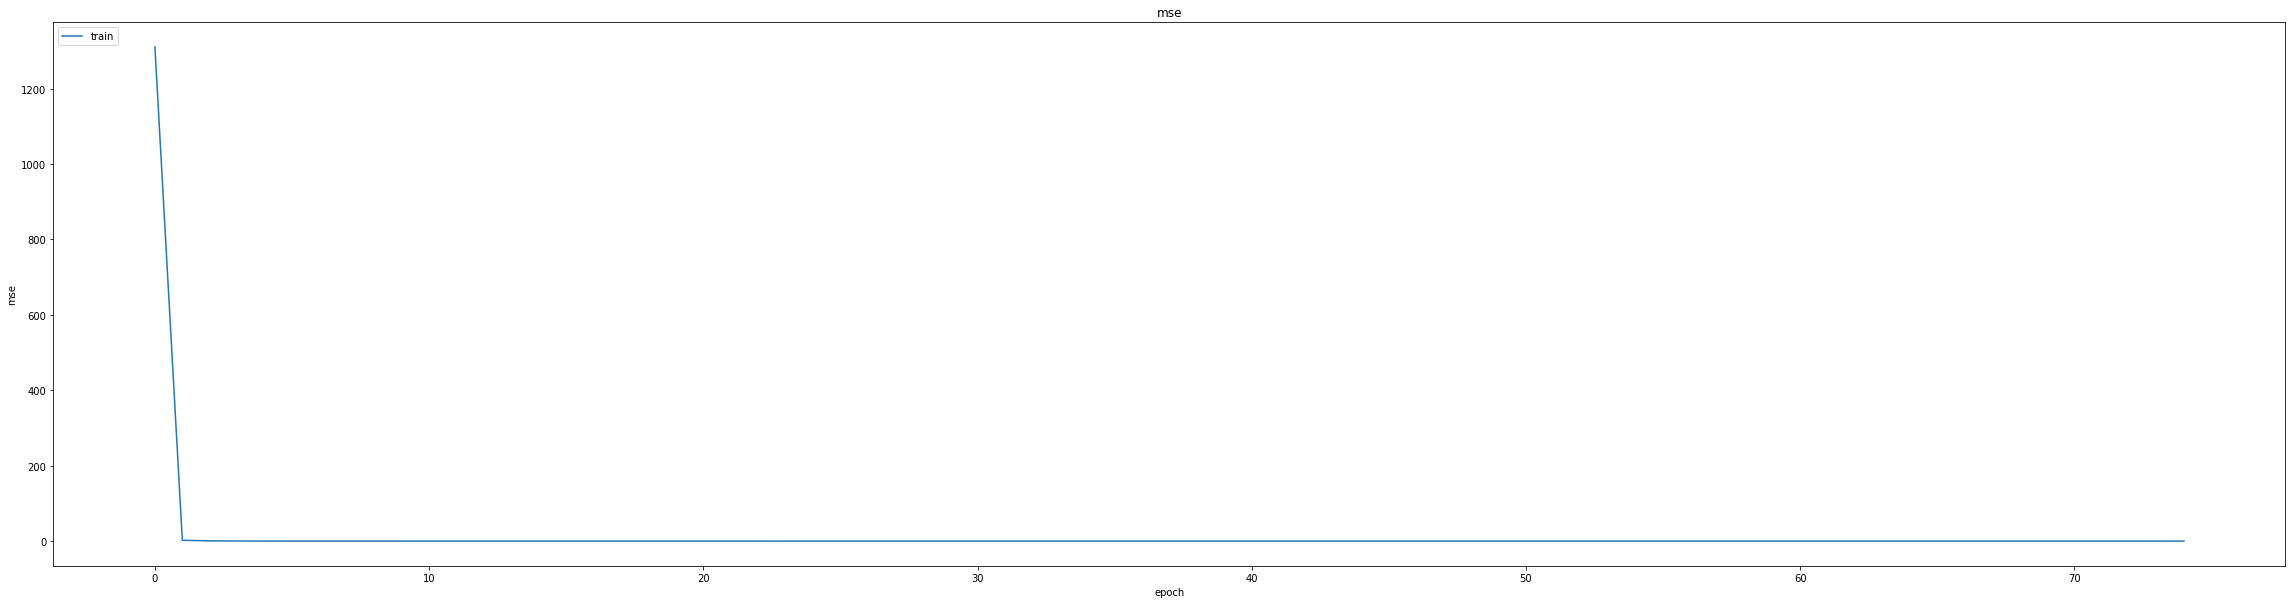

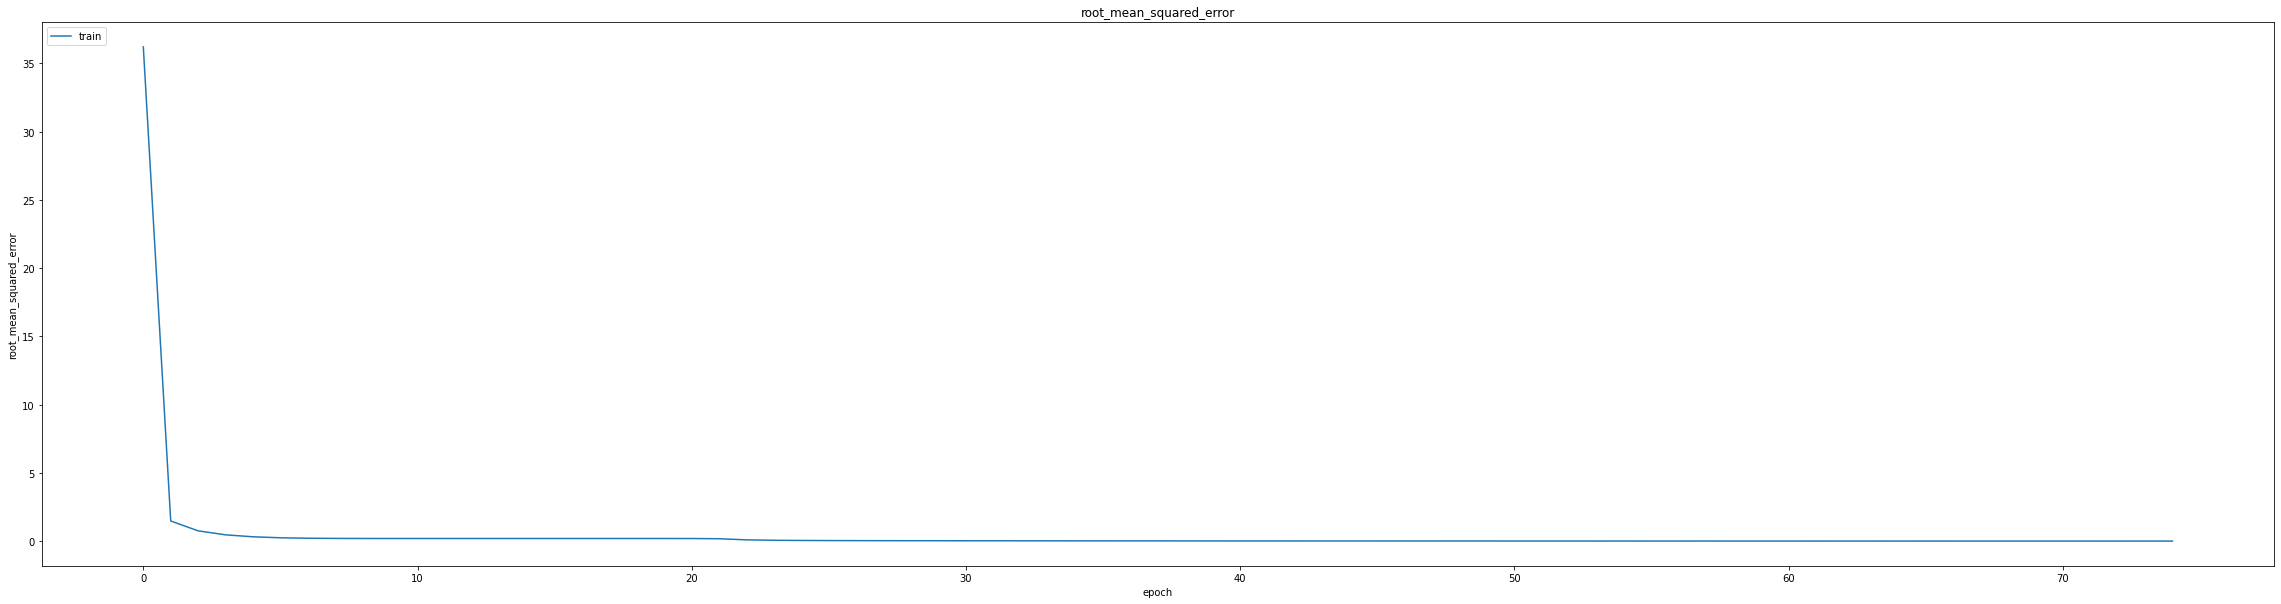

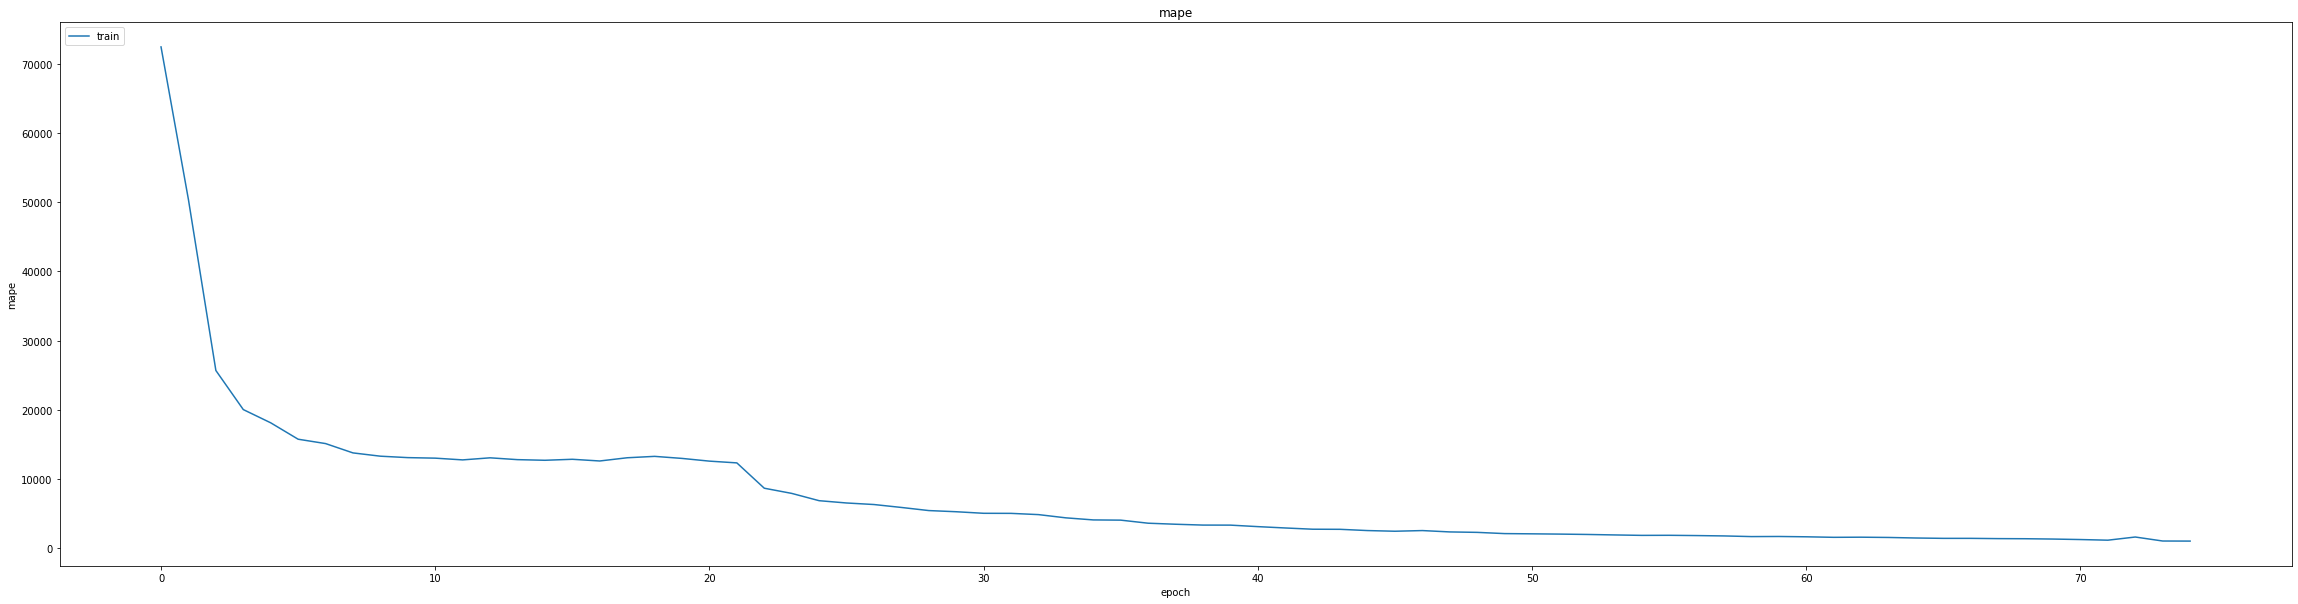

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00483747897669673
0.0070959338918328285
348/348 [==============================] - 4s 6ms/step
0.9985488968211902


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


405/406 [============================>.] - ETA: 0s - loss: 1.7961e-04 - mae: 0.0062 - mse: 1.7961e-04 - root_mean_squared_error: 0.0134 - mape: 1110.5022
Epoch 1: val_mse did not improve from 0.00005
406/406 [==============================] - 18s 23ms/step - loss: 1.7925e-04 - mae: 0.0062 - mse: 1.7925e-04 - root_mean_squared_error: 0.0134 - mape: 1108.0667 - val_loss: 8.0333e-05 - val_mae: 0.0070 - val_mse: 8.0333e-05 - val_root_mean_squared_error: 0.0090 - val_mape: 5235.0283 - lr: 0.0010
Epoch 2/25
406/406 [==============================] - ETA: 0s - loss: 2.8950e-05 - mae: 0.0041 - mse: 2.8950e-05 - root_mean_squared_error: 0.0054 - mape: 1078.9935
Epoch 2: val_mse did not improve from 0.00005
406/406 [==============================] - 7s 18ms/step - loss: 2.8950e-05 - mae: 0.0041 - mse: 2.8950e-05 - root_mean_squared_error: 0.0054 - mape: 1078.9935 - val_loss: 5.4651e-05 - val_mae: 0.0058 - val_mse: 5.4651e-05 - val_root_mean_squared_error: 0.0074 - val_mape: 4886.3599 - lr: 0.001

406/406 [==============================] - 39s 97ms/step - loss: 2.7913e-05 - mae: 0.0041 - mse: 2.7913e-05 - root_mean_squared_error: 0.0053 - mape: 783.3270 - val_loss: 3.9502e-05 - val_mae: 0.0044 - val_mse: 3.9502e-05 - val_root_mean_squared_error: 0.0063 - val_mape: 4443.4800 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
406/406 [==============================] - ETA: 0s - loss: 2.4126e-05 - mae: 0.0037 - mse: 2.4126e-05 - root_mean_squared_error: 0.0049 - mape: 795.1122
Epoch 11: val_mse did not improve from 0.00004
406/406 [==============================] - 7s 18ms/step - loss: 2.4126e-05 - mae: 0.0037 - mse: 2.4126e-05 - root_mean_squared_error: 0.0049 - mape: 795.1122 - val_loss: 7.2303e-05 - val_mae: 0.0052 - val_mse: 7.2303e-05 - val_root_mean_squared_error: 0.0085 - val_mape: 6774.5898 - lr: 5.9049e-04
Epoch 12/25
403/406 [============================>.] - ETA: 0s - loss: 2.8764e-05 - mae: 0.0041 - mse: 2.8764e-05 - root_mean_squared_error: 0.0054 - mape:

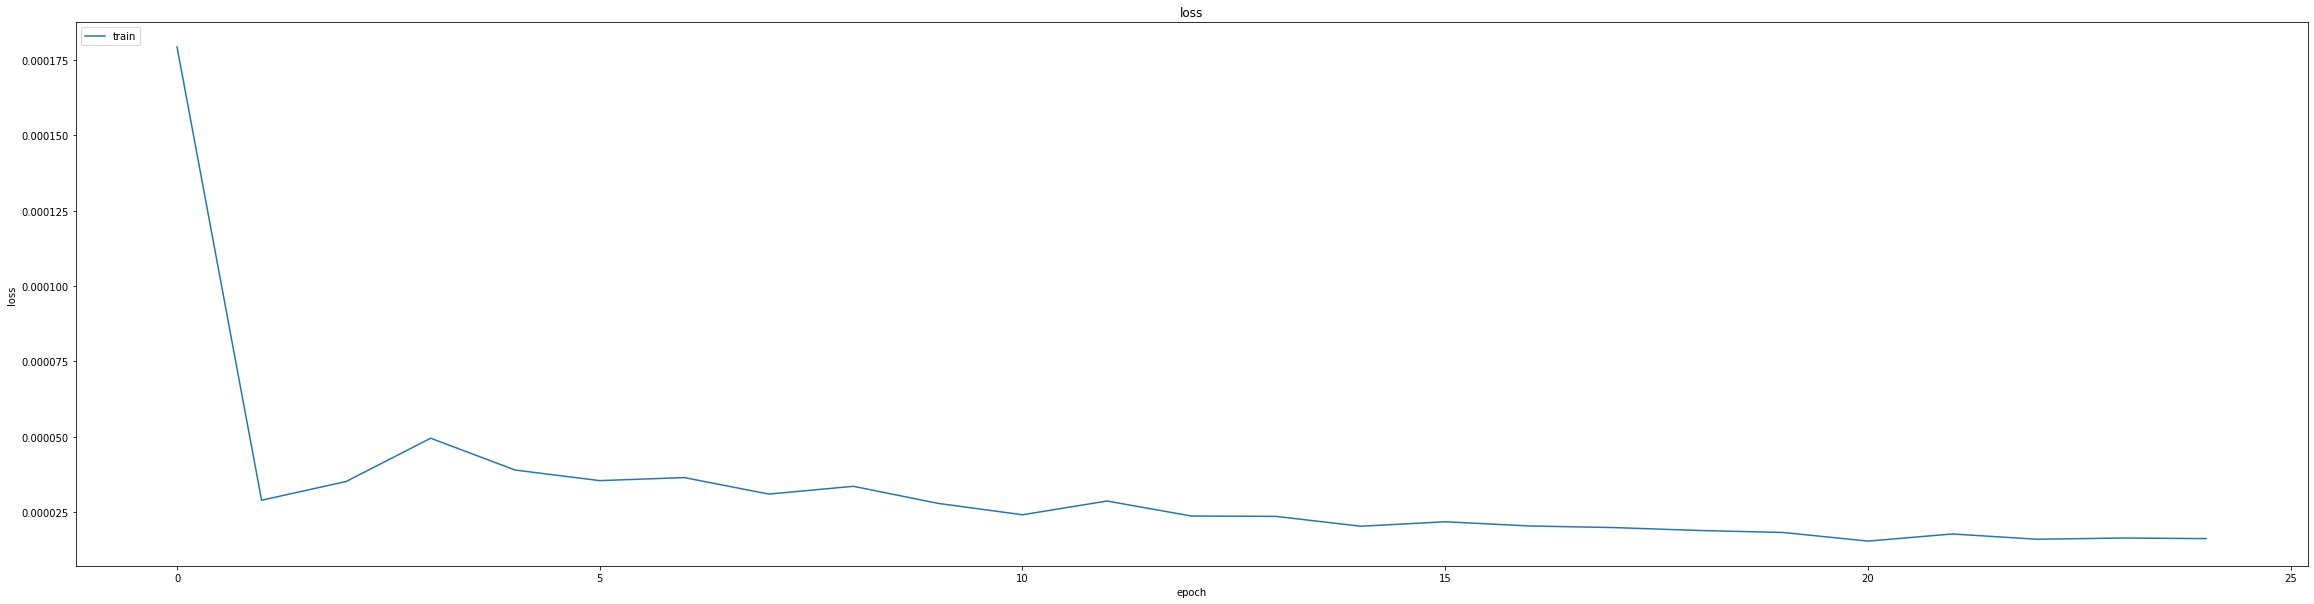

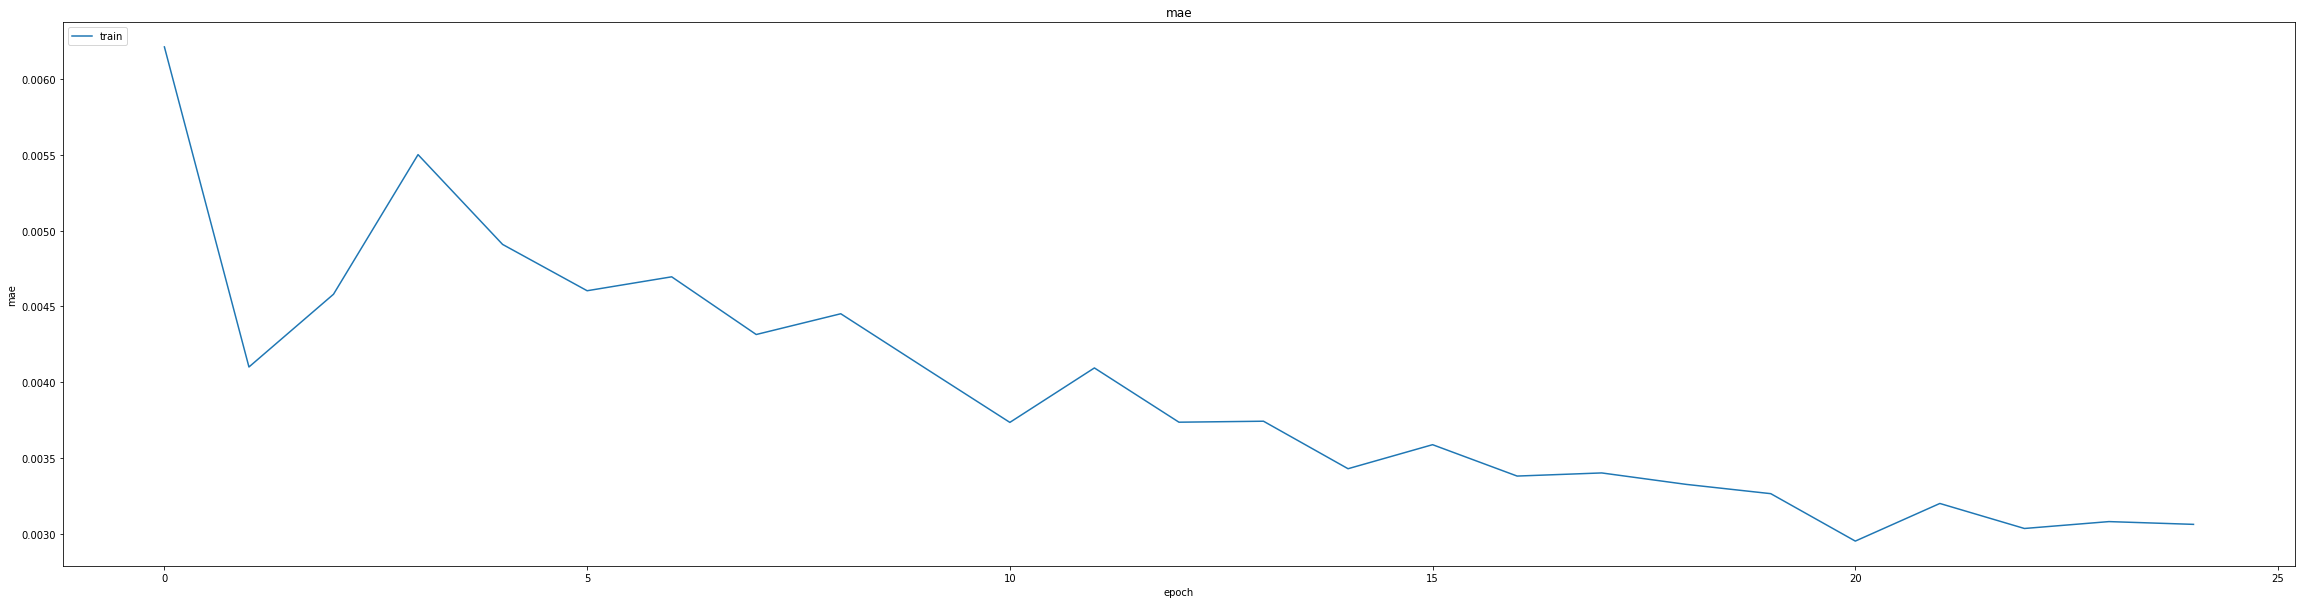

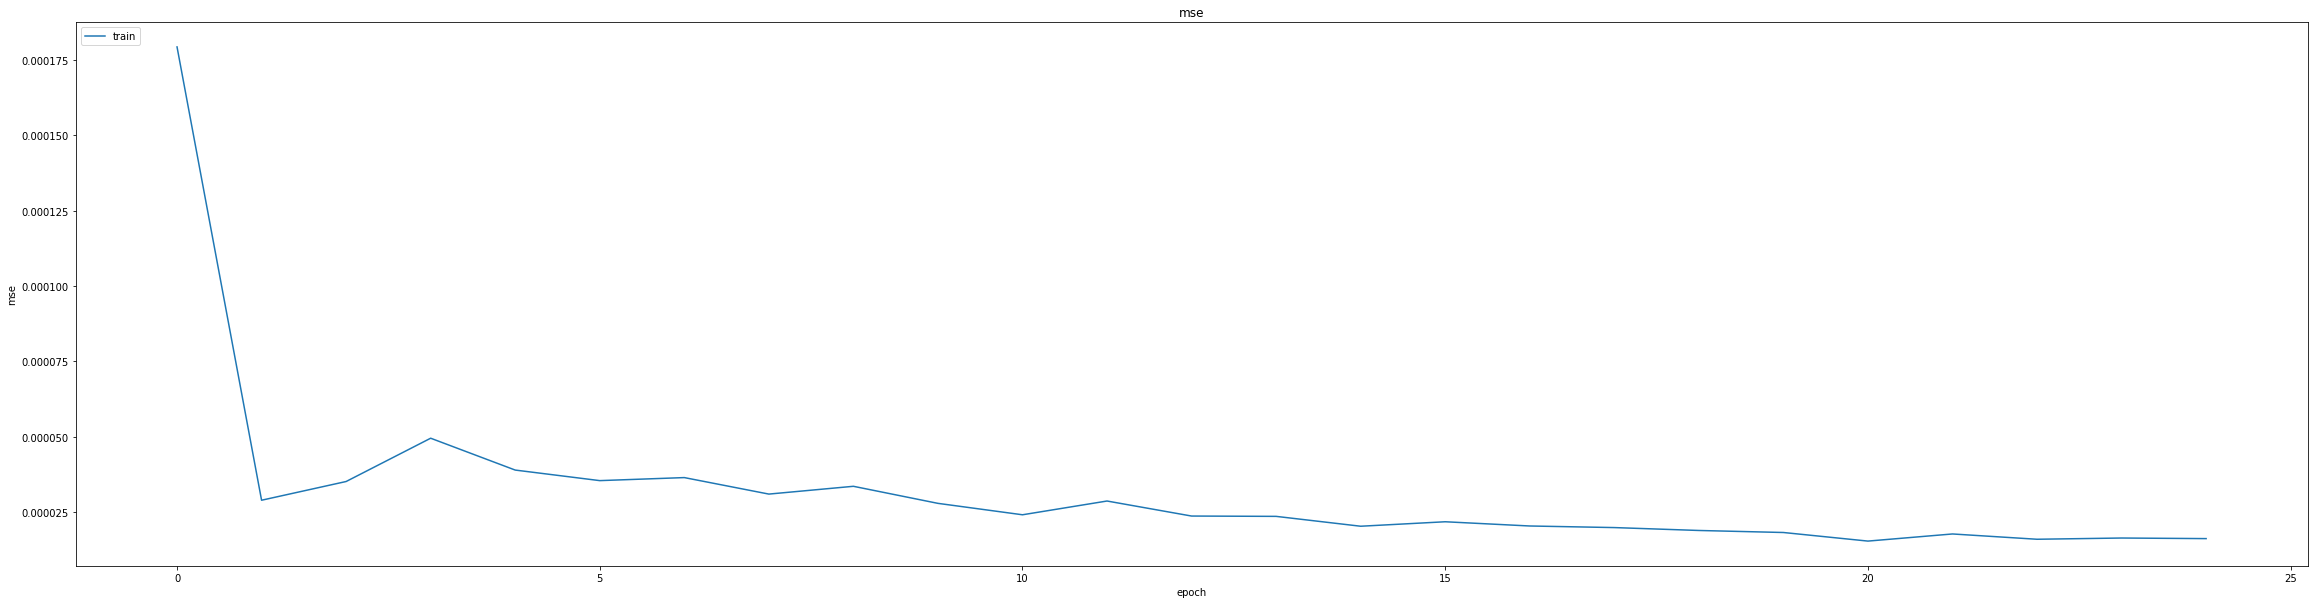

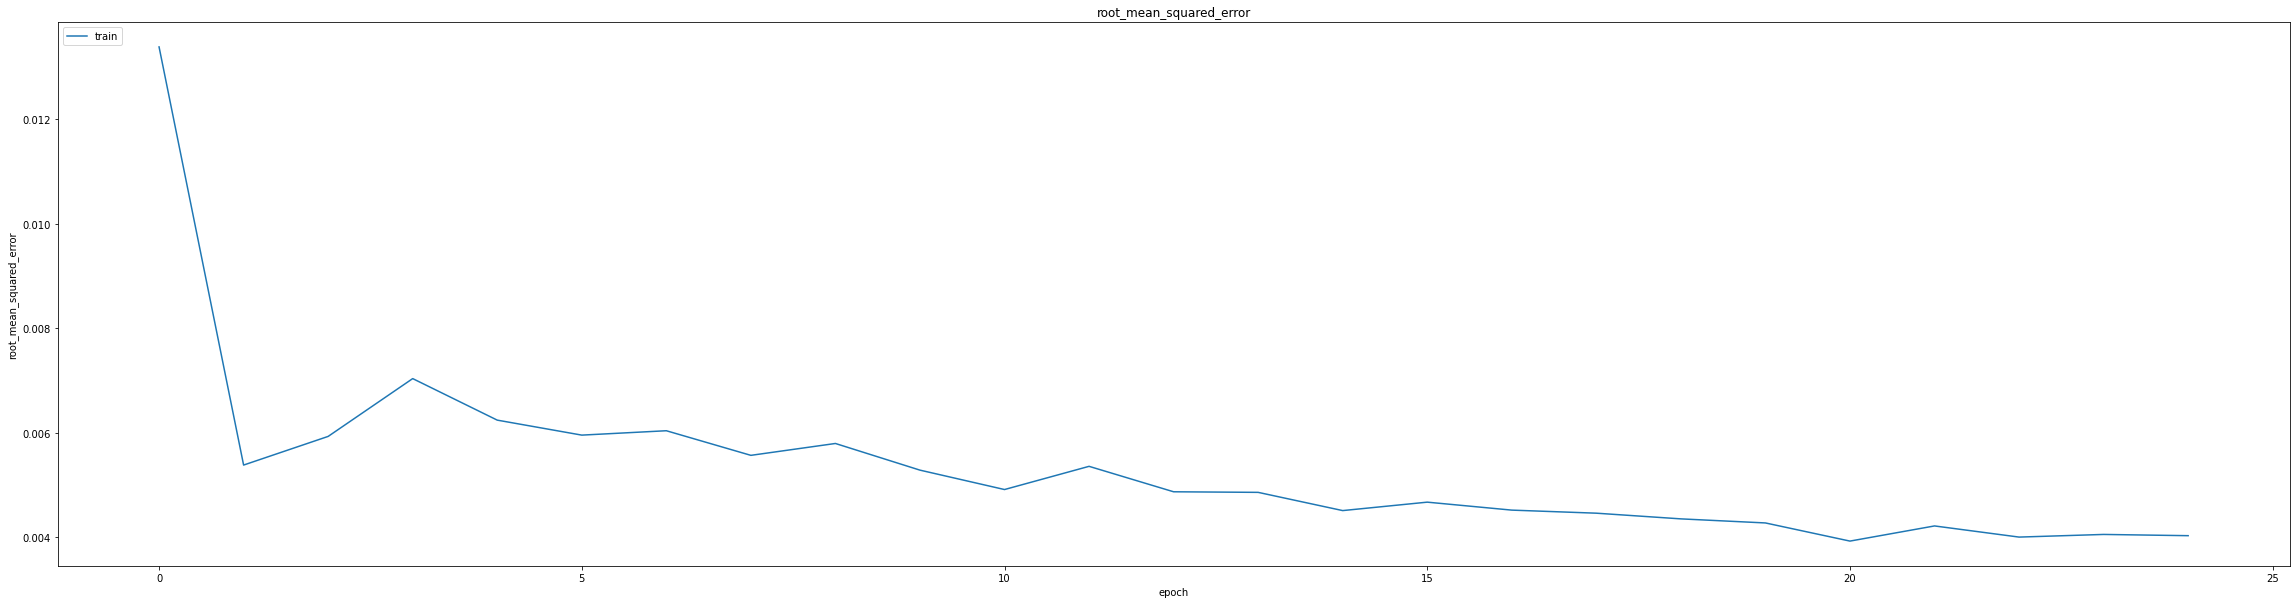

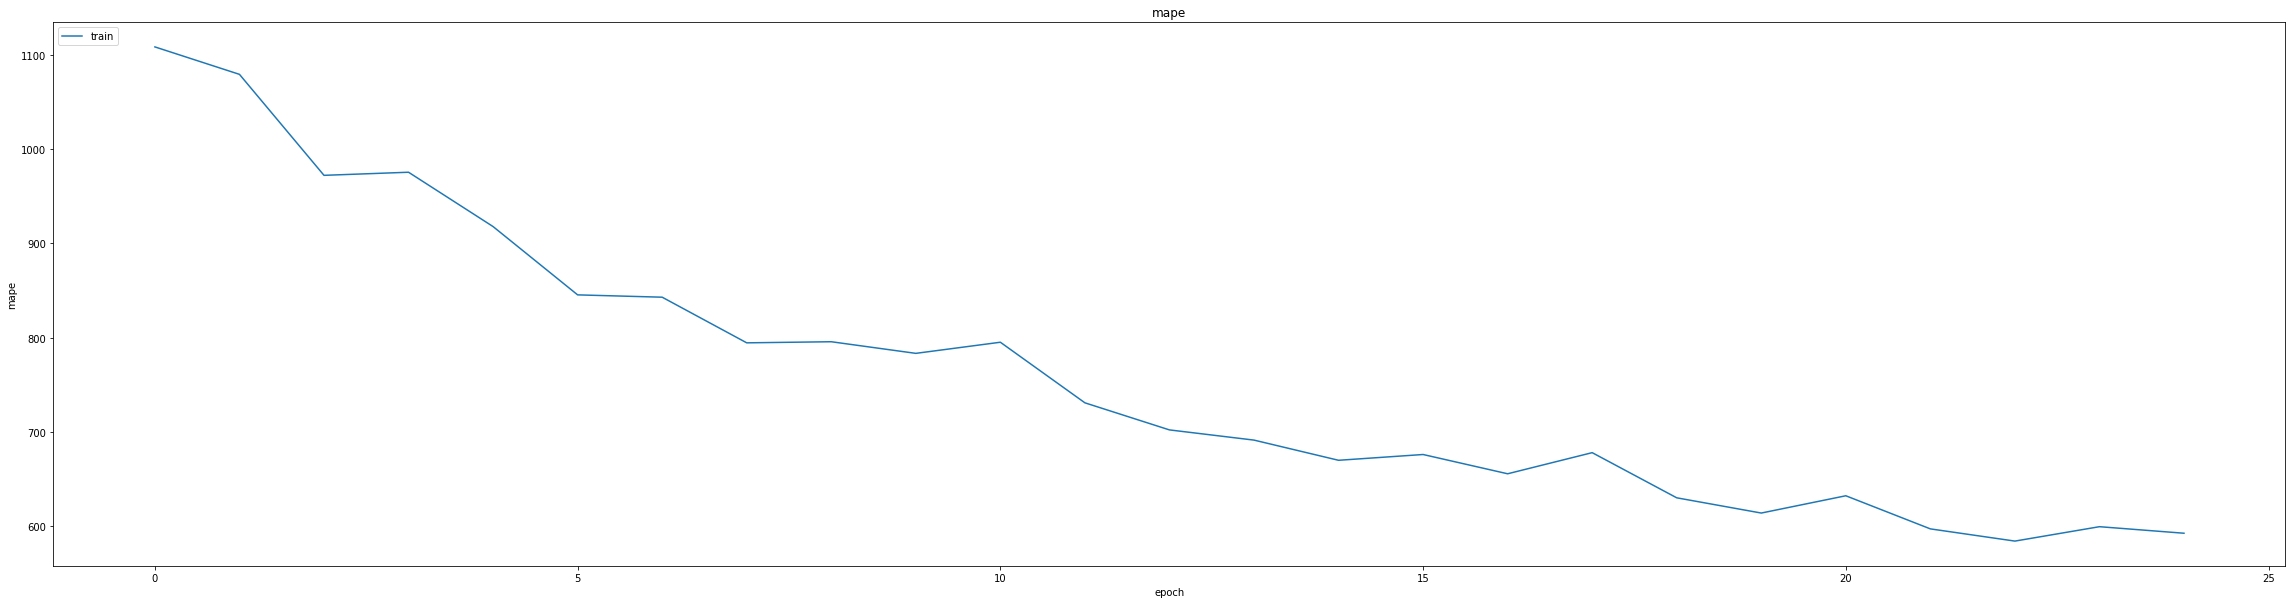

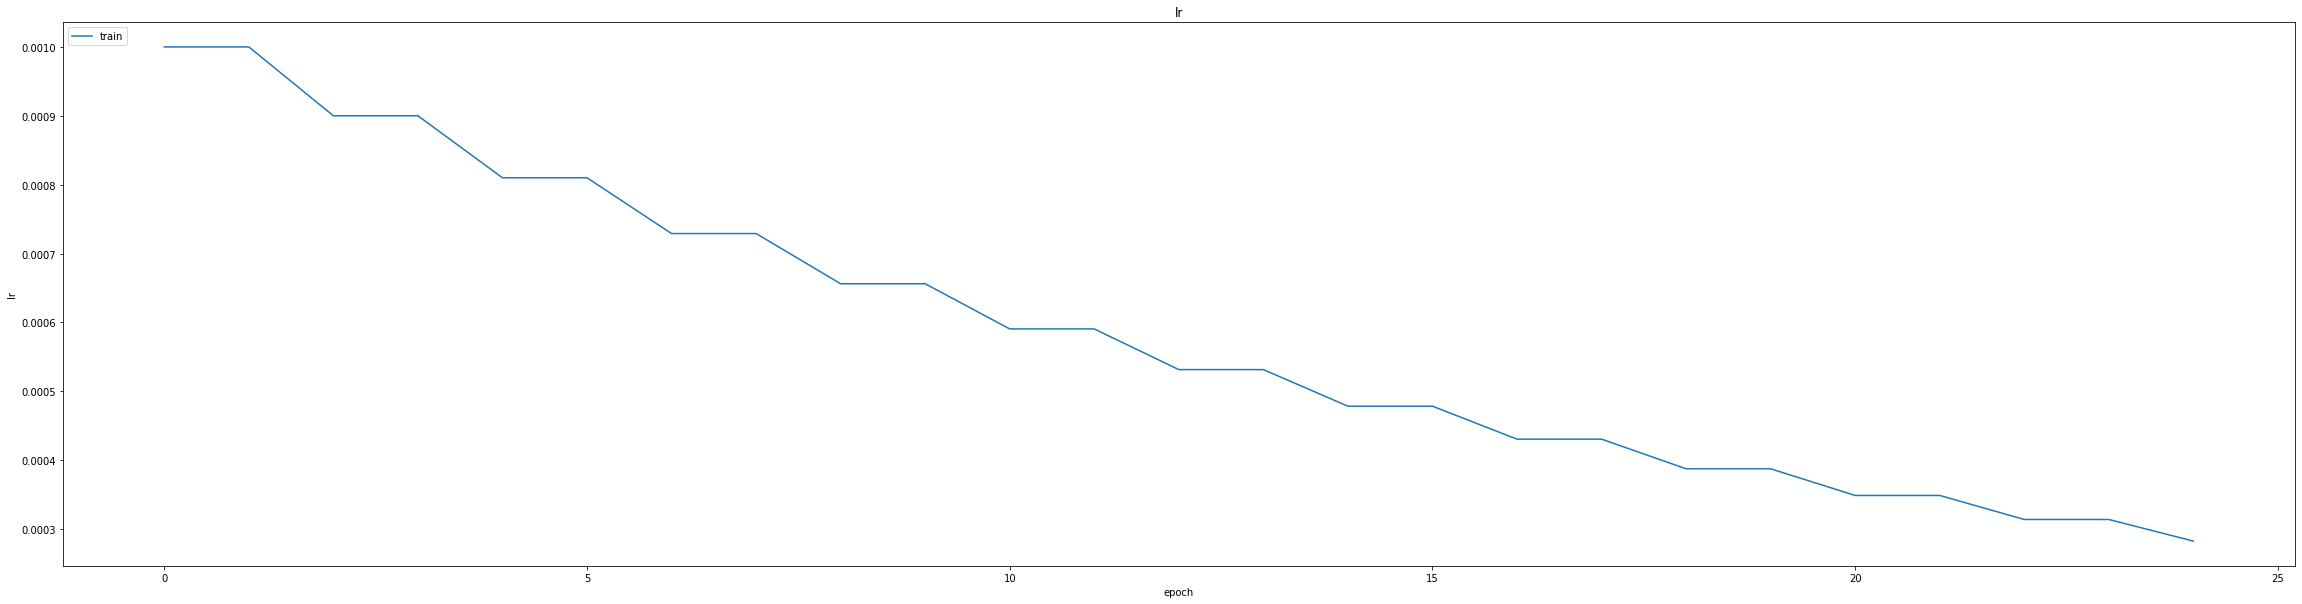

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004360794555395842
0.006285089533776045
348/348 [==============================] - 4s 7ms/step
0.9993332154886502


348/348 [==============================] - 2s 7ms/step


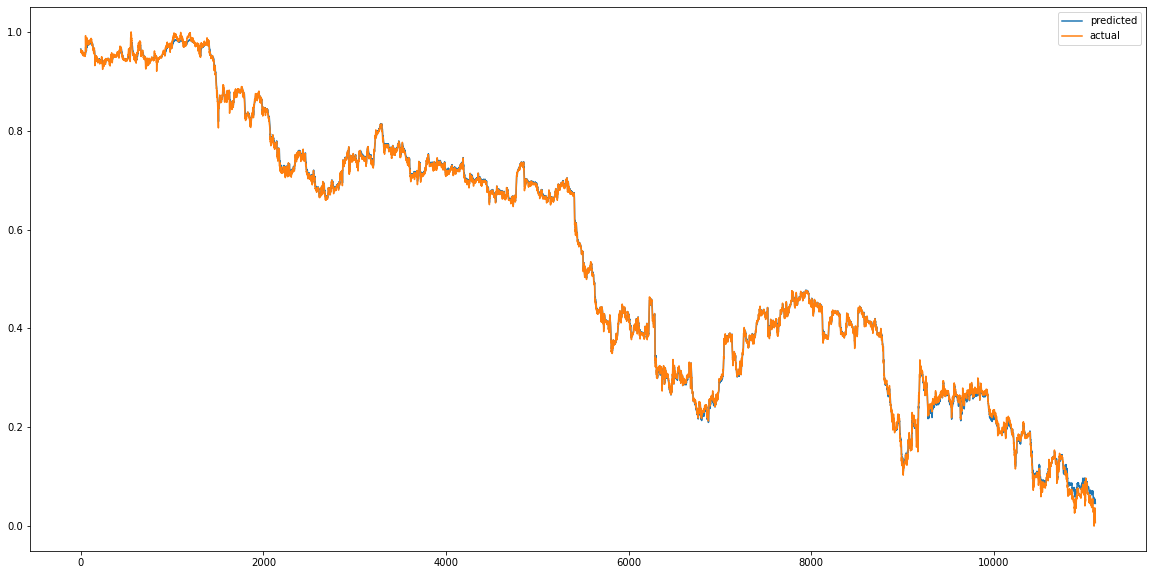

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


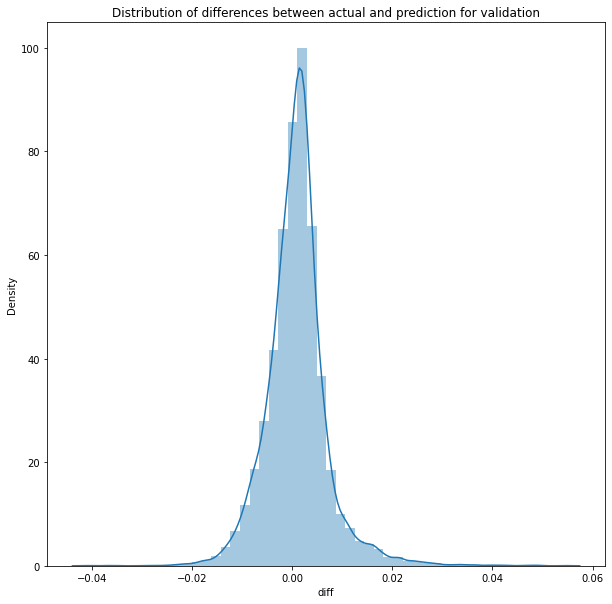

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 7ms/step


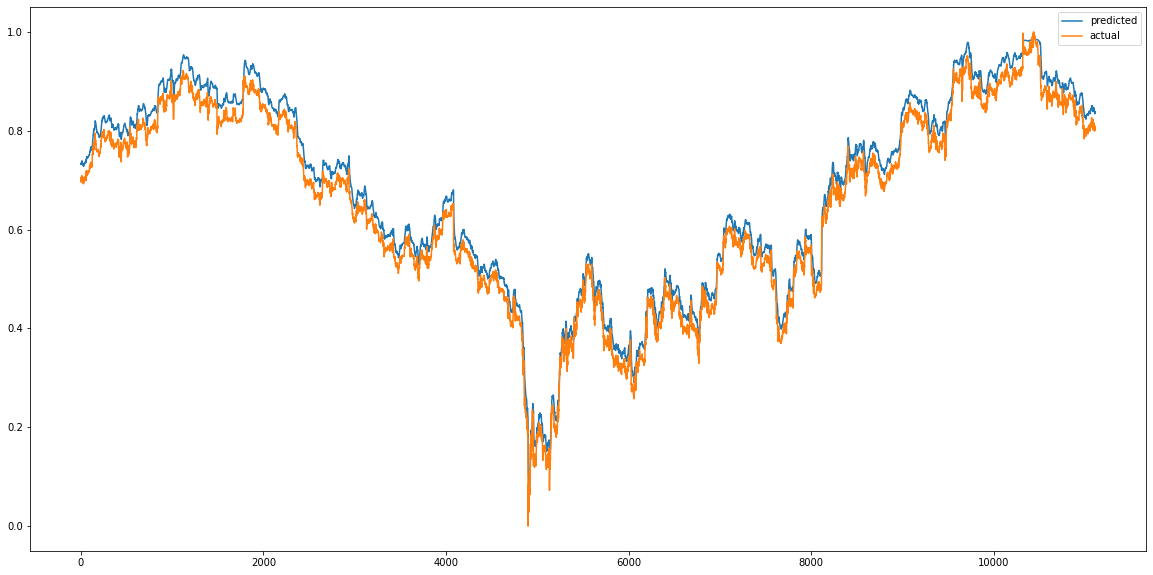

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0009761626346947562
RMSE :  0.031243601500063275
MAE :  0.030051785139044395
348/348 [==============================] - 2s 6ms/step
R2_Score  : 0.9752382825599213


count    11115.000000
mean         0.029893
std          0.009086
min         -0.064512
25%          0.025345
50%          0.030165
75%          0.034805
max          0.199091
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_12 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_6 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 16)                5184      
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
404/406 [============================>.] - ETA: 0s - loss: 1824.4427 - mae: 20.3461 - mse: 1824.4427 - root_mean_squared_error: 42.7135 - mape: 261209.9531
Epoch 1: val_mse improved from inf to 7.19142, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 28s 56ms/step - loss: 1815.9757 - mae: 20.2633 - mse: 1815.9757 - root_mean_squared_error: 42.6143 - mape: 259995.1875 - val_loss: 7.1914 - val_mae: 2.6678 - val_mse: 7.1914 - val_root_mean_squared_error: 2.6817 - val_mape: 290055.5938
Epoch 2/75
402/406 [============================>.] - ETA: 0s - loss: 2.8785 - mae: 1.6277 - mse: 2.8785 - root_mean_squared_error: 1.6966 - mape: 47176.6719
Epoch 2: val_mse improved from 7.19142 to 1.35057, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 20s 49ms/step - loss: 2.8616 - mae: 1.6220 - mse: 2.8616 - root_mean_squared_error: 1.6916 - mape: 46726.4336 - val_loss: 1.3506 - val_mae: 1.1298 - val_mse: 1.3506 - val_root_mean_squared_error: 1.1621 - val_mape: 151194.8438
Epoch 3/75
402/406 [============================>.] - ETA: 0s - loss: 0.6258 - mae: 0.7524 - mse: 0.6258 - root_mean_squared_error: 0.7911 - mape: 29140.9805
Epoch 3: val_mse improved from 1.35057 to 0.49286, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 0.6231 - mae: 0.7505 - mse: 0.6231 - root_mean_squared_error: 0.7894 - mape: 28862.6973 - val_loss: 0.4929 - val_mae: 0.6471 - val_mse: 0.4929 - val_root_mean_squared_error: 0.7020 - val_mape: 107614.0703
Epoch 4/75
402/406 [============================>.] - ETA: 0s - loss: 0.2150 - mae: 0.4135 - mse: 0.2150 - root_mean_squared_error: 0.4636 - mape: 93.7784
Epoch 4: val_mse improved from 0.49286 to 0.24869, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.2143 - mae: 0.4125 - mse: 0.2143 - root_mean_squared_error: 0.4629 - mape: 18204.2090 - val_loss: 0.2487 - val_mae: 0.4195 - val_mse: 0.2487 - val_root_mean_squared_error: 0.4987 - val_mape: 86913.5547
Epoch 5/75
402/406 [============================>.] - ETA: 0s - loss: 0.0976 - mae: 0.2473 - mse: 0.0976 - root_mean_squared_error: 0.3125 - mape: 17035.7539
Epoch 5: val_mse improved from 0.24869 to 0.15787, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0974 - mae: 0.2467 - mse: 0.0974 - root_mean_squared_error: 0.3120 - mape: 16872.9707 - val_loss: 0.1579 - val_mae: 0.3253 - val_mse: 0.1579 - val_root_mean_squared_error: 0.3973 - val_mape: 75321.7500
Epoch 6/75
406/406 [==============================] - ETA: 0s - loss: 0.0585 - mae: 0.1835 - mse: 0.0585 - root_mean_squared_error: 0.2420 - mape: 15212.2031
Epoch 6: val_mse improved from 0.15787 to 0.11936, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0585 - mae: 0.1835 - mse: 0.0585 - root_mean_squared_error: 0.2420 - mape: 15212.2031 - val_loss: 0.1194 - val_mae: 0.2781 - val_mse: 0.1194 - val_root_mean_squared_error: 0.3455 - val_mape: 68400.7734
Epoch 7/75
401/406 [============================>.] - ETA: 0s - loss: 0.0451 - mae: 0.1678 - mse: 0.0451 - root_mean_squared_error: 0.2123 - mape: 14451.7930
Epoch 7: val_mse improved from 0.11936 to 0.10169, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0450 - mae: 0.1677 - mse: 0.0450 - root_mean_squared_error: 0.2122 - mape: 14278.2041 - val_loss: 0.1017 - val_mae: 0.2570 - val_mse: 0.1017 - val_root_mean_squared_error: 0.3189 - val_mape: 64191.4453
Epoch 8/75
403/406 [============================>.] - ETA: 0s - loss: 0.0407 - mae: 0.1648 - mse: 0.0407 - root_mean_squared_error: 0.2017 - mape: 13750.2471
Epoch 8: val_mse improved from 0.10169 to 0.09331, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0407 - mae: 0.1647 - mse: 0.0407 - root_mean_squared_error: 0.2016 - mape: 13652.5693 - val_loss: 0.0933 - val_mae: 0.2502 - val_mse: 0.0933 - val_root_mean_squared_error: 0.3055 - val_mape: 61709.9883
Epoch 9/75
406/406 [==============================] - ETA: 0s - loss: 0.0395 - mae: 0.1650 - mse: 0.0395 - root_mean_squared_error: 0.1986 - mape: 12735.0205
Epoch 9: val_mse improved from 0.09331 to 0.08946, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 18s 44ms/step - loss: 0.0395 - mae: 0.1650 - mse: 0.0395 - root_mean_squared_error: 0.1986 - mape: 12735.0205 - val_loss: 0.0895 - val_mae: 0.2482 - val_mse: 0.0895 - val_root_mean_squared_error: 0.2991 - val_mape: 60385.4023
Epoch 10/75
405/406 [============================>.] - ETA: 0s - loss: 0.0392 - mae: 0.1656 - mse: 0.0392 - root_mean_squared_error: 0.1980 - mape: 13040.8135
Epoch 10: val_mse improved from 0.08946 to 0.08763, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0392 - mae: 0.1656 - mse: 0.0392 - root_mean_squared_error: 0.1980 - mape: 13012.2725 - val_loss: 0.0876 - val_mae: 0.2477 - val_mse: 0.0876 - val_root_mean_squared_error: 0.2960 - val_mape: 59701.1953
Epoch 11/75
403/406 [============================>.] - ETA: 0s - loss: 0.0392 - mae: 0.1662 - mse: 0.0392 - root_mean_squared_error: 0.1979 - mape: 12812.7900
Epoch 11: val_mse improved from 0.08763 to 0.08719, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0392 - mae: 0.1662 - mse: 0.0392 - root_mean_squared_error: 0.1979 - mape: 12721.7979 - val_loss: 0.0872 - val_mae: 0.2476 - val_mse: 0.0872 - val_root_mean_squared_error: 0.2953 - val_mape: 59525.4766
Epoch 12/75
401/406 [============================>.] - ETA: 0s - loss: 0.0391 - mae: 0.1661 - mse: 0.0391 - root_mean_squared_error: 0.1978 - mape: 13032.1172
Epoch 12: val_mse improved from 0.08719 to 0.08693, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0391 - mae: 0.1662 - mse: 0.0391 - root_mean_squared_error: 0.1978 - mape: 12875.5254 - val_loss: 0.0869 - val_mae: 0.2475 - val_mse: 0.0869 - val_root_mean_squared_error: 0.2948 - val_mape: 59425.7188
Epoch 13/75
401/406 [============================>.] - ETA: 0s - loss: 0.0391 - mae: 0.1662 - mse: 0.0391 - root_mean_squared_error: 0.1978 - mape: 12811.4863
Epoch 13: val_mse did not improve from 0.08693
406/406 [==============================] - 5s 11ms/step - loss: 0.0391 - mae: 0.1663 - mse: 0.0391 - root_mean_squared_error: 0.1979 - mape: 12657.6045 - val_loss: 0.0869 - val_mae: 0.2475 - val_mse: 0.0869 - val_root_mean_squared_error: 0.2949 - val_mape: 59431.3242
Epoch 14/75
403/406 [============================>.] - ETA: 0s - loss: 0.0392 - mae: 0.1665 - mse: 0.0392 - root_mean_squared_error: 0.1980 - mape: 12580.1152
Epoch 14: val_mse did not improve from 0.08693
406/406 [==============================] - 4s 11ms/

406/406 [==============================] - 16s 40ms/step - loss: 0.0391 - mae: 0.1662 - mse: 0.0391 - root_mean_squared_error: 0.1978 - mape: 13191.2178 - val_loss: 0.0868 - val_mae: 0.2475 - val_mse: 0.0868 - val_root_mean_squared_error: 0.2945 - val_mape: 59353.4492
Epoch 16/75
402/406 [============================>.] - ETA: 0s - loss: 0.0392 - mae: 0.1664 - mse: 0.0392 - root_mean_squared_error: 0.1981 - mape: 12684.5146
Epoch 16: val_mse did not improve from 0.08675
406/406 [==============================] - 4s 11ms/step - loss: 0.0392 - mae: 0.1663 - mse: 0.0392 - root_mean_squared_error: 0.1979 - mape: 12563.2178 - val_loss: 0.0868 - val_mae: 0.2475 - val_mse: 0.0868 - val_root_mean_squared_error: 0.2946 - val_mape: 59377.6953
Epoch 17/75
403/406 [============================>.] - ETA: 0s - loss: 0.0392 - mae: 0.1665 - mse: 0.0392 - root_mean_squared_error: 0.1980 - mape: 12576.8721
Epoch 17: val_mse did not improve from 0.08675
406/406 [==============================] - 4s 11ms/

406/406 [==============================] - 15s 37ms/step - loss: 0.0392 - mae: 0.1664 - mse: 0.0392 - root_mean_squared_error: 0.1979 - mape: 13105.3252 - val_loss: 0.0861 - val_mae: 0.2474 - val_mse: 0.0861 - val_root_mean_squared_error: 0.2935 - val_mape: 59106.0977
Epoch 20/75
404/406 [============================>.] - ETA: 0s - loss: 0.0392 - mae: 0.1664 - mse: 0.0392 - root_mean_squared_error: 0.1979 - mape: 12571.3994
Epoch 20: val_mse did not improve from 0.08614
406/406 [==============================] - 5s 11ms/step - loss: 0.0392 - mae: 0.1664 - mse: 0.0392 - root_mean_squared_error: 0.1979 - mape: 12513.0137 - val_loss: 0.0862 - val_mae: 0.2474 - val_mse: 0.0862 - val_root_mean_squared_error: 0.2936 - val_mape: 59132.7812
Epoch 21/75
404/406 [============================>.] - ETA: 0s - loss: 0.0392 - mae: 0.1665 - mse: 0.0392 - root_mean_squared_error: 0.1980 - mape: 12697.2051
Epoch 21: val_mse did not improve from 0.08614
406/406 [==============================] - 4s 11ms/

406/406 [==============================] - 16s 39ms/step - loss: 0.0391 - mae: 0.1662 - mse: 0.0391 - root_mean_squared_error: 0.1978 - mape: 12707.5869 - val_loss: 0.0855 - val_mae: 0.2473 - val_mse: 0.0855 - val_root_mean_squared_error: 0.2924 - val_mape: 58847.6641
Epoch 31/75
402/406 [============================>.] - ETA: 0s - loss: 0.0390 - mae: 0.1661 - mse: 0.0390 - root_mean_squared_error: 0.1976 - mape: 12934.4629
Epoch 31: val_mse did not improve from 0.08552
406/406 [==============================] - 5s 11ms/step - loss: 0.0391 - mae: 0.1662 - mse: 0.0391 - root_mean_squared_error: 0.1976 - mape: 12810.8555 - val_loss: 0.0880 - val_mae: 0.2478 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2967 - val_mape: 59858.8477
Epoch 32/75
404/406 [============================>.] - ETA: 0s - loss: 0.0391 - mae: 0.1664 - mse: 0.0391 - root_mean_squared_error: 0.1978 - mape: 13005.3477
Epoch 32: val_mse did not improve from 0.08552
406/406 [==============================] - 5s 11ms/

406/406 [==============================] - 16s 39ms/step - loss: 0.0390 - mae: 0.1661 - mse: 0.0390 - root_mean_squared_error: 0.1976 - mape: 12844.3818 - val_loss: 0.0852 - val_mae: 0.2473 - val_mse: 0.0852 - val_root_mean_squared_error: 0.2919 - val_mape: 58703.0820
Epoch 38/75
404/406 [============================>.] - ETA: 0s - loss: 0.0390 - mae: 0.1661 - mse: 0.0390 - root_mean_squared_error: 0.1975 - mape: 12594.5635
Epoch 38: val_mse did not improve from 0.08518
406/406 [==============================] - 4s 11ms/step - loss: 0.0390 - mae: 0.1661 - mse: 0.0390 - root_mean_squared_error: 0.1976 - mape: 12536.0645 - val_loss: 0.0879 - val_mae: 0.2477 - val_mse: 0.0879 - val_root_mean_squared_error: 0.2965 - val_mape: 59803.9883
Epoch 39/75
406/406 [==============================] - ETA: 0s - loss: 0.0389 - mae: 0.1660 - mse: 0.0389 - root_mean_squared_error: 0.1973 - mape: 12764.5127
Epoch 39: val_mse did not improve from 0.08518
406/406 [==============================] - 4s 11ms/

406/406 [==============================] - 15s 37ms/step - loss: 0.0384 - mae: 0.1645 - mse: 0.0384 - root_mean_squared_error: 0.1960 - mape: 12824.9805 - val_loss: 0.0701 - val_mae: 0.2276 - val_mse: 0.0701 - val_root_mean_squared_error: 0.2647 - val_mape: 55374.9844
Epoch 47/75
404/406 [============================>.] - ETA: 0s - loss: 0.0089 - mae: 0.0617 - mse: 0.0089 - root_mean_squared_error: 0.0943 - mape: 7498.5073
Epoch 47: val_mse improved from 0.07006 to 0.00424, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 0.0089 - mae: 0.0615 - mse: 0.0089 - root_mean_squared_error: 0.0942 - mape: 7463.6226 - val_loss: 0.0042 - val_mae: 0.0408 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0651 - val_mape: 26236.8535
Epoch 48/75
406/406 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0257 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 4962.2925
Epoch 48: val_mse improved from 0.00424 to 0.00274, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0013 - mae: 0.0257 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 4962.2925 - val_loss: 0.0027 - val_mae: 0.0329 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0524 - val_mape: 22951.4531
Epoch 49/75
404/406 [============================>.] - ETA: 0s - loss: 8.9070e-04 - mae: 0.0211 - mse: 8.9070e-04 - root_mean_squared_error: 0.0298 - mape: 4583.6270
Epoch 49: val_mse improved from 0.00274 to 0.00175, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 8.8937e-04 - mae: 0.0211 - mse: 8.8937e-04 - root_mean_squared_error: 0.0298 - mape: 4562.2944 - val_loss: 0.0017 - val_mae: 0.0284 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0418 - val_mape: 19111.6621
Epoch 50/75
402/406 [============================>.] - ETA: 0s - loss: 6.4878e-04 - mae: 0.0186 - mse: 6.4878e-04 - root_mean_squared_error: 0.0255 - mape: 3604.9114
Epoch 50: val_mse improved from 0.00175 to 0.00127, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 6.4769e-04 - mae: 0.0186 - mse: 6.4769e-04 - root_mean_squared_error: 0.0254 - mape: 3570.3923 - val_loss: 0.0013 - val_mae: 0.0262 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0357 - val_mape: 16589.5879
Epoch 51/75
404/406 [============================>.] - ETA: 0s - loss: 4.7889e-04 - mae: 0.0161 - mse: 4.7889e-04 - root_mean_squared_error: 0.0219 - mape: 3065.4314
Epoch 51: val_mse improved from 0.00127 to 0.00074, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 4.7890e-04 - mae: 0.0161 - mse: 4.7890e-04 - root_mean_squared_error: 0.0219 - mape: 3051.1741 - val_loss: 7.3682e-04 - val_mae: 0.0171 - val_mse: 7.3682e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 14656.9102
Epoch 52/75
405/406 [============================>.] - ETA: 0s - loss: 4.1148e-04 - mae: 0.0150 - mse: 4.1148e-04 - root_mean_squared_error: 0.0203 - mape: 4004.3718
Epoch 52: val_mse improved from 0.00074 to 0.00069, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 4.1123e-04 - mae: 0.0150 - mse: 4.1123e-04 - root_mean_squared_error: 0.0203 - mape: 3995.5903 - val_loss: 6.8818e-04 - val_mae: 0.0187 - val_mse: 6.8818e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 13471.8340
Epoch 53/75
401/406 [============================>.] - ETA: 0s - loss: 3.3690e-04 - mae: 0.0136 - mse: 3.3690e-04 - root_mean_squared_error: 0.0184 - mape: 2743.8657
Epoch 53: val_mse improved from 0.00069 to 0.00052, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 3.3755e-04 - mae: 0.0137 - mse: 3.3755e-04 - root_mean_squared_error: 0.0184 - mape: 2710.8442 - val_loss: 5.1896e-04 - val_mae: 0.0150 - val_mse: 5.1896e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 12336.5078
Epoch 54/75
403/406 [============================>.] - ETA: 0s - loss: 2.9120e-04 - mae: 0.0128 - mse: 2.9120e-04 - root_mean_squared_error: 0.0171 - mape: 2393.8628
Epoch 54: val_mse improved from 0.00052 to 0.00044, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 2.9130e-04 - mae: 0.0128 - mse: 2.9130e-04 - root_mean_squared_error: 0.0171 - mape: 2376.8337 - val_loss: 4.3759e-04 - val_mae: 0.0147 - val_mse: 4.3759e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 11298.4902
Epoch 55/75
403/406 [============================>.] - ETA: 0s - loss: 2.7368e-04 - mae: 0.0126 - mse: 2.7368e-04 - root_mean_squared_error: 0.0165 - mape: 2680.9355
Epoch 55: val_mse did not improve from 0.00044
406/406 [==============================] - 4s 11ms/step - loss: 2.7353e-04 - mae: 0.0126 - mse: 2.7353e-04 - root_mean_squared_error: 0.0165 - mape: 2661.8604 - val_loss: 5.4522e-04 - val_mae: 0.0179 - val_mse: 5.4522e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 10536.9434
Epoch 56/75
406/406 [==============================] - ETA: 0s - loss: 2.2716e-04 - mae: 0.0113 - mse: 2.2716e-04 - root_mean_squared_error: 0.0151 - mape: 2168.3909
Epoch 56: val_mse did not improve from 0.00044
406/406

406/406 [==============================] - 15s 37ms/step - loss: 2.4695e-04 - mae: 0.0120 - mse: 2.4695e-04 - root_mean_squared_error: 0.0157 - mape: 2013.4644 - val_loss: 4.0583e-04 - val_mae: 0.0153 - val_mse: 4.0583e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 9495.1211
Epoch 58/75
406/406 [==============================] - ETA: 0s - loss: 2.1499e-04 - mae: 0.0112 - mse: 2.1499e-04 - root_mean_squared_error: 0.0147 - mape: 1923.2080
Epoch 58: val_mse did not improve from 0.00041
406/406 [==============================] - 5s 11ms/step - loss: 2.1499e-04 - mae: 0.0112 - mse: 2.1499e-04 - root_mean_squared_error: 0.0147 - mape: 1923.2080 - val_loss: 4.7979e-04 - val_mae: 0.0179 - val_mse: 4.7979e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 8963.4717
Epoch 59/75
403/406 [============================>.] - ETA: 0s - loss: 2.2265e-04 - mae: 0.0112 - mse: 2.2265e-04 - root_mean_squared_error: 0.0149 - mape: 1936.1875
Epoch 59: val_mse did not improve from 0.00041
406/406 [

406/406 [==============================] - 16s 39ms/step - loss: 2.0806e-04 - mae: 0.0111 - mse: 2.0806e-04 - root_mean_squared_error: 0.0144 - mape: 1884.9626 - val_loss: 3.5499e-04 - val_mae: 0.0140 - val_mse: 3.5499e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 8463.0605
Epoch 61/75
405/406 [============================>.] - ETA: 0s - loss: 1.7639e-04 - mae: 0.0101 - mse: 1.7639e-04 - root_mean_squared_error: 0.0133 - mape: 1773.5906
Epoch 61: val_mse improved from 0.00035 to 0.00032, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 1.7618e-04 - mae: 0.0101 - mse: 1.7618e-04 - root_mean_squared_error: 0.0133 - mape: 1769.7015 - val_loss: 3.2386e-04 - val_mae: 0.0134 - val_mse: 3.2386e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 8674.7148
Epoch 62/75
401/406 [============================>.] - ETA: 0s - loss: 1.7609e-04 - mae: 0.0102 - mse: 1.7609e-04 - root_mean_squared_error: 0.0133 - mape: 1863.9268
Epoch 62: val_mse did not improve from 0.00032
406/406 [==============================] - 4s 11ms/step - loss: 1.7660e-04 - mae: 0.0102 - mse: 1.7660e-04 - root_mean_squared_error: 0.0133 - mape: 1841.4966 - val_loss: 3.7411e-04 - val_mae: 0.0138 - val_mse: 3.7411e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 8253.5586
Epoch 63/75
406/406 [==============================] - ETA: 0s - loss: 1.6599e-04 - mae: 0.0099 - mse: 1.6599e-04 - root_mean_squared_error: 0.0129 - mape: 1652.1909
Epoch 63: val_mse improved from 0.00032 to 0.00025, savi

406/406 [==============================] - 16s 38ms/step - loss: 1.6599e-04 - mae: 0.0099 - mse: 1.6599e-04 - root_mean_squared_error: 0.0129 - mape: 1652.1909 - val_loss: 2.5491e-04 - val_mae: 0.0121 - val_mse: 2.5491e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 7778.9067
Epoch 64/75
403/406 [============================>.] - ETA: 0s - loss: 1.5232e-04 - mae: 0.0094 - mse: 1.5232e-04 - root_mean_squared_error: 0.0123 - mape: 1656.9479
Epoch 64: val_mse did not improve from 0.00025
406/406 [==============================] - 5s 11ms/step - loss: 1.5189e-04 - mae: 0.0094 - mse: 1.5189e-04 - root_mean_squared_error: 0.0123 - mape: 1645.1569 - val_loss: 3.1664e-04 - val_mae: 0.0128 - val_mse: 3.1664e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 8202.4785
Epoch 65/75
403/406 [============================>.] - ETA: 0s - loss: 1.4340e-04 - mae: 0.0092 - mse: 1.4340e-04 - root_mean_squared_error: 0.0120 - mape: 1642.7639
Epoch 65: val_mse improved from 0.00025 to 0.00017, savi

406/406 [==============================] - 15s 37ms/step - loss: 1.4304e-04 - mae: 0.0092 - mse: 1.4304e-04 - root_mean_squared_error: 0.0120 - mape: 1631.0787 - val_loss: 1.7196e-04 - val_mae: 0.0093 - val_mse: 1.7196e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 7480.7788
Epoch 66/75
406/406 [==============================] - ETA: 0s - loss: 1.3905e-04 - mae: 0.0091 - mse: 1.3905e-04 - root_mean_squared_error: 0.0118 - mape: 2074.5447
Epoch 66: val_mse did not improve from 0.00017
406/406 [==============================] - 5s 11ms/step - loss: 1.3905e-04 - mae: 0.0091 - mse: 1.3905e-04 - root_mean_squared_error: 0.0118 - mape: 2074.5447 - val_loss: 3.6298e-04 - val_mae: 0.0162 - val_mse: 3.6298e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 7078.4082
Epoch 67/75
405/406 [============================>.] - ETA: 0s - loss: 1.2571e-04 - mae: 0.0087 - mse: 1.2571e-04 - root_mean_squared_error: 0.0112 - mape: 1550.2817
Epoch 67: val_mse improved from 0.00017 to 0.00017, savi

406/406 [==============================] - 16s 39ms/step - loss: 1.2561e-04 - mae: 0.0087 - mse: 1.2561e-04 - root_mean_squared_error: 0.0112 - mape: 1546.8828 - val_loss: 1.6915e-04 - val_mae: 0.0094 - val_mse: 1.6915e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 7143.8022
Epoch 68/75
406/406 [==============================] - ETA: 0s - loss: 1.1421e-04 - mae: 0.0082 - mse: 1.1421e-04 - root_mean_squared_error: 0.0107 - mape: 1579.7114
Epoch 68: val_mse did not improve from 0.00017
406/406 [==============================] - 4s 11ms/step - loss: 1.1421e-04 - mae: 0.0082 - mse: 1.1421e-04 - root_mean_squared_error: 0.0107 - mape: 1579.7114 - val_loss: 2.0117e-04 - val_mae: 0.0113 - val_mse: 2.0117e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 6981.6143
Epoch 69/75
402/406 [============================>.] - ETA: 0s - loss: 1.0717e-04 - mae: 0.0080 - mse: 1.0717e-04 - root_mean_squared_error: 0.0104 - mape: 1458.5143
Epoch 69: val_mse did not improve from 0.00017
406/406 [

406/406 [==============================] - 17s 41ms/step - loss: 1.1496e-04 - mae: 0.0083 - mse: 1.1496e-04 - root_mean_squared_error: 0.0107 - mape: 1393.2064 - val_loss: 1.1054e-04 - val_mae: 0.0075 - val_mse: 1.1054e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 6732.4482
Epoch 71/75
402/406 [============================>.] - ETA: 0s - loss: 1.0210e-04 - mae: 0.0078 - mse: 1.0210e-04 - root_mean_squared_error: 0.0101 - mape: 1395.6456
Epoch 71: val_mse did not improve from 0.00011
406/406 [==============================] - 4s 11ms/step - loss: 1.0332e-04 - mae: 0.0078 - mse: 1.0332e-04 - root_mean_squared_error: 0.0102 - mape: 1382.2913 - val_loss: 1.3021e-04 - val_mae: 0.0085 - val_mse: 1.3021e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 6442.0205
Epoch 72/75
406/406 [==============================] - ETA: 0s - loss: 8.8713e-05 - mae: 0.0073 - mse: 8.8713e-05 - root_mean_squared_error: 0.0094 - mape: 1383.9769
Epoch 72: val_mse improved from 0.00011 to 0.00010, savi

406/406 [==============================] - 15s 37ms/step - loss: 8.8713e-05 - mae: 0.0073 - mse: 8.8713e-05 - root_mean_squared_error: 0.0094 - mape: 1383.9769 - val_loss: 9.6537e-05 - val_mae: 0.0069 - val_mse: 9.6537e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 6341.0449
Epoch 73/75
402/406 [============================>.] - ETA: 0s - loss: 1.0172e-04 - mae: 0.0078 - mse: 1.0172e-04 - root_mean_squared_error: 0.0101 - mape: 1322.8665
Epoch 73: val_mse did not improve from 0.00010
406/406 [==============================] - 5s 11ms/step - loss: 1.0177e-04 - mae: 0.0078 - mse: 1.0177e-04 - root_mean_squared_error: 0.0101 - mape: 1310.2307 - val_loss: 2.7379e-04 - val_mae: 0.0141 - val_mse: 2.7379e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 6250.7241
Epoch 74/75
401/406 [============================>.] - ETA: 0s - loss: 8.2708e-05 - mae: 0.0071 - mse: 8.2708e-05 - root_mean_squared_error: 0.0091 - mape: 1383.7089
Epoch 74: val_mse did not improve from 0.00010
406/406 [

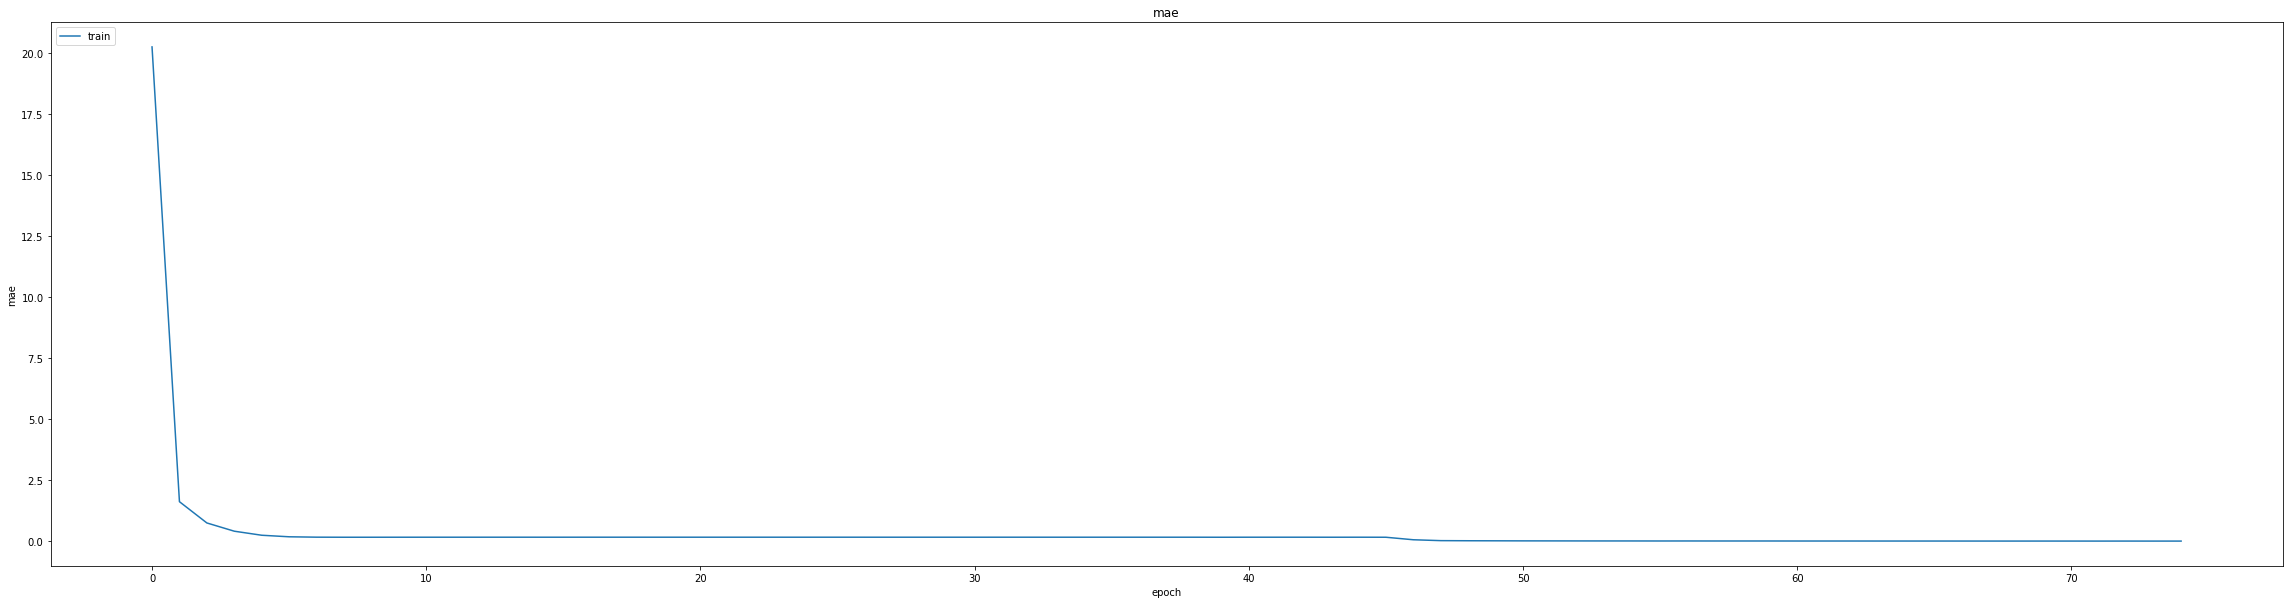

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0068962289951741695
0.009825312532484531
348/348 [==============================] - 2s 4ms/step
0.9974984818169134


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
405/406 [============================>.] - ETA: 0s - loss: 3.6762e-04 - mae: 0.0095 - mse: 3.6762e-04 - root_mean_squared_error: 0.0192 - mape: 1431.6293


Epoch 1: val_mse did not improve from 0.00010
406/406 [==============================] - 11s 18ms/step - loss: 3.6692e-04 - mae: 0.0095 - mse: 3.6692e-04 - root_mean_squared_error: 0.0192 - mape: 1428.4902 - val_loss: 1.2018e-04 - val_mae: 0.0086 - val_mse: 1.2018e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 6512.9380 - lr: 0.0010
Epoch 2/25
403/406 [============================>.] - ETA: 0s - loss: 5.7840e-05 - mae: 0.0057 - mse: 5.7840e-05 - root_mean_squared_error: 0.0076 - mape: 1395.9146
Epoch 2: val_mse did not improve from 0.00010
406/406 [==============================] - 4s 11ms/step - loss: 5.7788e-05 - mae: 0.0057 - mse: 5.7788e-05 - root_mean_squared_error: 0.0076 - mape: 1385.9803 - val_loss: 1.3788e-04 - val_mae: 0.0095 - val_mse: 1.3788e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 6268.2964 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
401/406 [============================>.] - ETA: 0s - loss: 6.0866e-05 - mae: 0.0059 - mse: 6.0866e-05 - 

406/406 [==============================] - 15s 38ms/step - loss: 6.7202e-05 - mae: 0.0063 - mse: 6.7202e-05 - root_mean_squared_error: 0.0082 - mape: 1330.6541 - val_loss: 8.6622e-05 - val_mae: 0.0068 - val_mse: 8.6622e-05 - val_root_mean_squared_error: 0.0093 - val_mape: 5856.3115 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
401/406 [============================>.] - ETA: 0s - loss: 6.5173e-05 - mae: 0.0062 - mse: 6.5173e-05 - root_mean_squared_error: 0.0081 - mape: 1296.3231
Epoch 5: val_mse did not improve from 0.00009
406/406 [==============================] - 4s 11ms/step - loss: 6.5192e-05 - mae: 0.0062 - mse: 6.5192e-05 - root_mean_squared_error: 0.0081 - mape: 1280.7191 - val_loss: 9.9058e-05 - val_mae: 0.0078 - val_mse: 9.9058e-05 - val_root_mean_squared_error: 0.0100 - val_mape: 5818.7119 - lr: 8.1000e-04
Epoch 6/25
402/406 [============================>.] - ETA: 0s - loss: 7.1529e-05 - mae: 0.0066 - mse: 7.1529e-05 - root_mean_squared_error: 0.0085 - mape:

406/406 [==============================] - 15s 37ms/step - loss: 6.2405e-05 - mae: 0.0061 - mse: 6.2405e-05 - root_mean_squared_error: 0.0079 - mape: 1190.8041 - val_loss: 7.8677e-05 - val_mae: 0.0068 - val_mse: 7.8677e-05 - val_root_mean_squared_error: 0.0089 - val_mape: 5659.2339 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
403/406 [============================>.] - ETA: 0s - loss: 4.5842e-05 - mae: 0.0052 - mse: 4.5842e-05 - root_mean_squared_error: 0.0068 - mape: 1184.7433
Epoch 9: val_mse did not improve from 0.00008
406/406 [==============================] - 4s 11ms/step - loss: 4.5806e-05 - mae: 0.0052 - mse: 4.5806e-05 - root_mean_squared_error: 0.0068 - mape: 1176.3131 - val_loss: 1.4404e-04 - val_mae: 0.0105 - val_mse: 1.4404e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 5410.6006 - lr: 6.5610e-04
Epoch 10/25
406/406 [==============================] - ETA: 0s - loss: 5.6084e-05 - mae: 0.0058 - mse: 5.6084e-05 - root_mean_squared_error: 0.0075 - mape

406/406 [==============================] - 17s 42ms/step - loss: 4.4216e-05 - mae: 0.0051 - mse: 4.4216e-05 - root_mean_squared_error: 0.0066 - mape: 1189.1503 - val_loss: 4.5701e-05 - val_mae: 0.0048 - val_mse: 4.5701e-05 - val_root_mean_squared_error: 0.0068 - val_mape: 5343.3906 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
405/406 [============================>.] - ETA: 0s - loss: 3.8591e-05 - mae: 0.0047 - mse: 3.8591e-05 - root_mean_squared_error: 0.0062 - mape: 1153.3003
Epoch 13: val_mse did not improve from 0.00005
406/406 [==============================] - 5s 11ms/step - loss: 3.8616e-05 - mae: 0.0047 - mse: 3.8616e-05 - root_mean_squared_error: 0.0062 - mape: 1150.7717 - val_loss: 1.4663e-04 - val_mae: 0.0106 - val_mse: 1.4663e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 5245.1714 - lr: 5.3144e-04
Epoch 14/25
405/406 [============================>.] - ETA: 0s - loss: 3.8511e-05 - mae: 0.0047 - mse: 3.8511e-05 - root_mean_squared_error: 0.0062 - ma

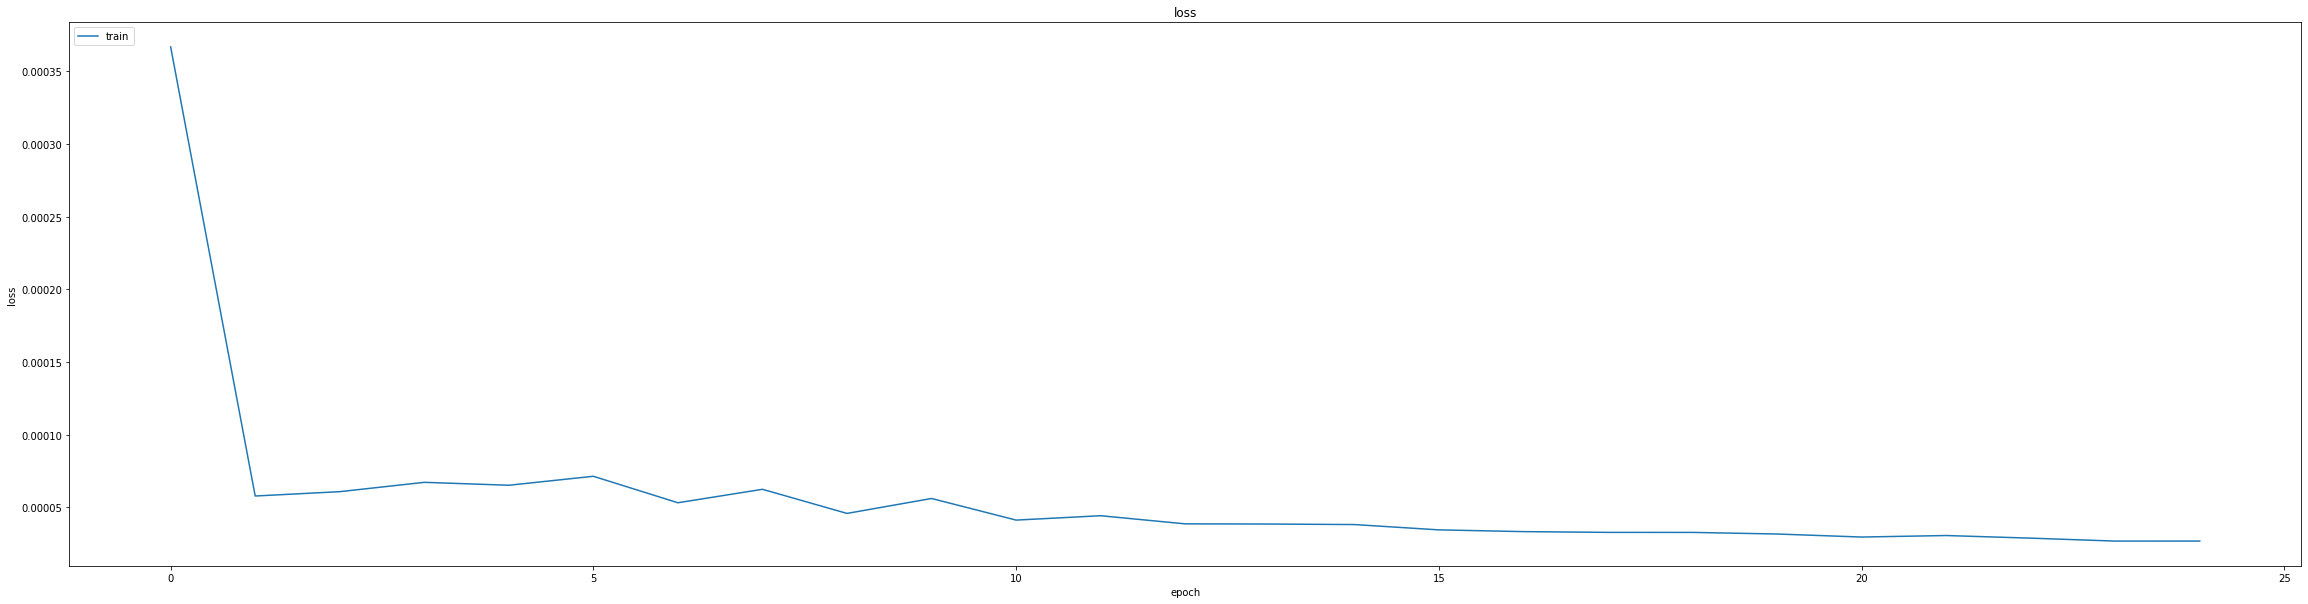

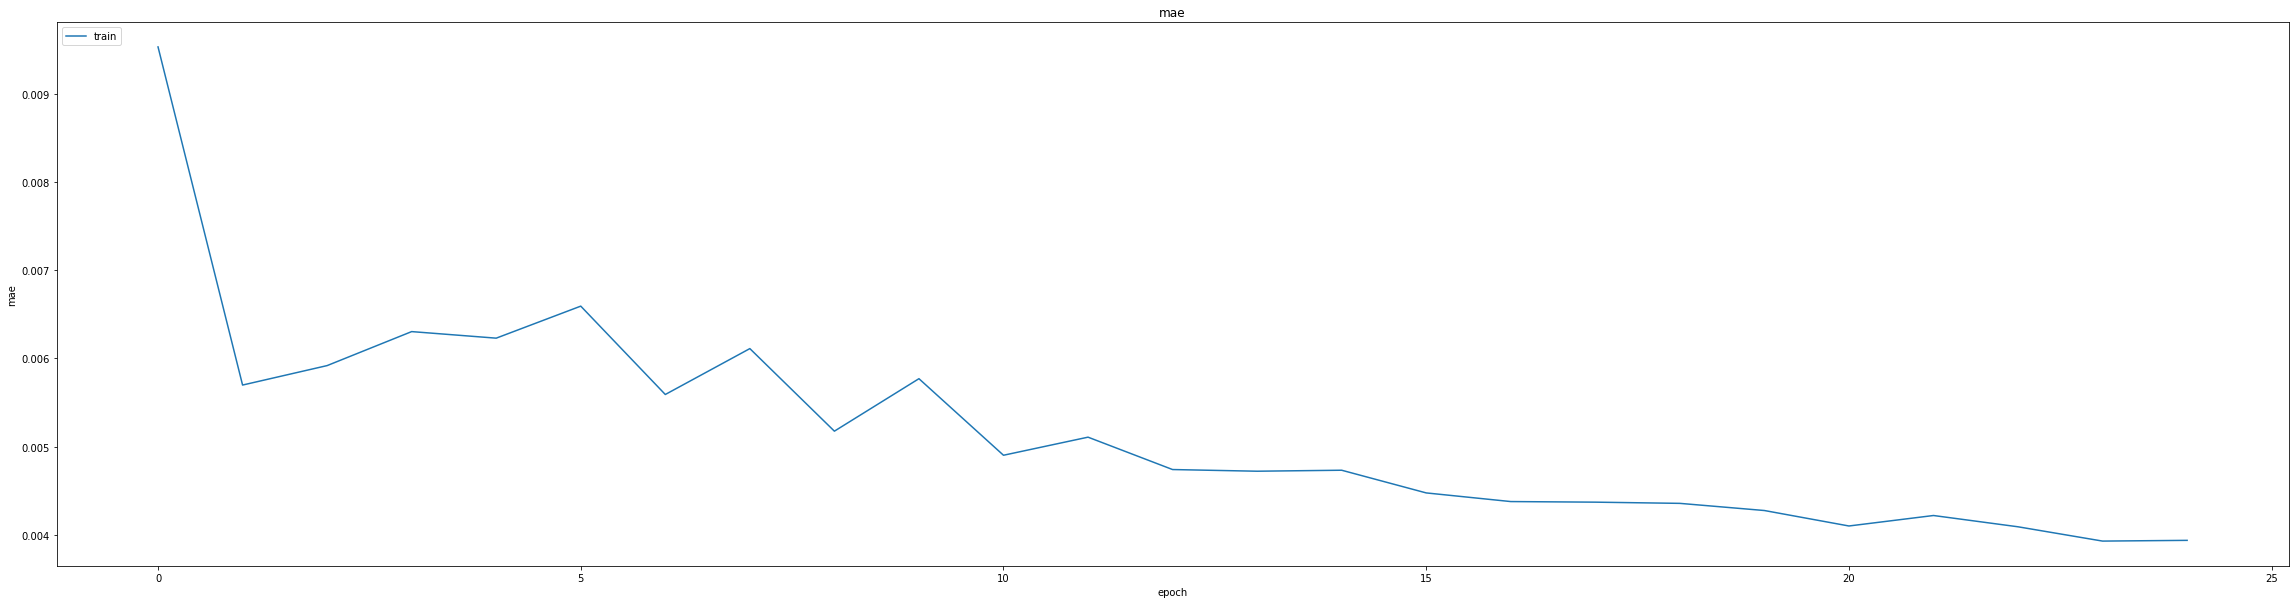

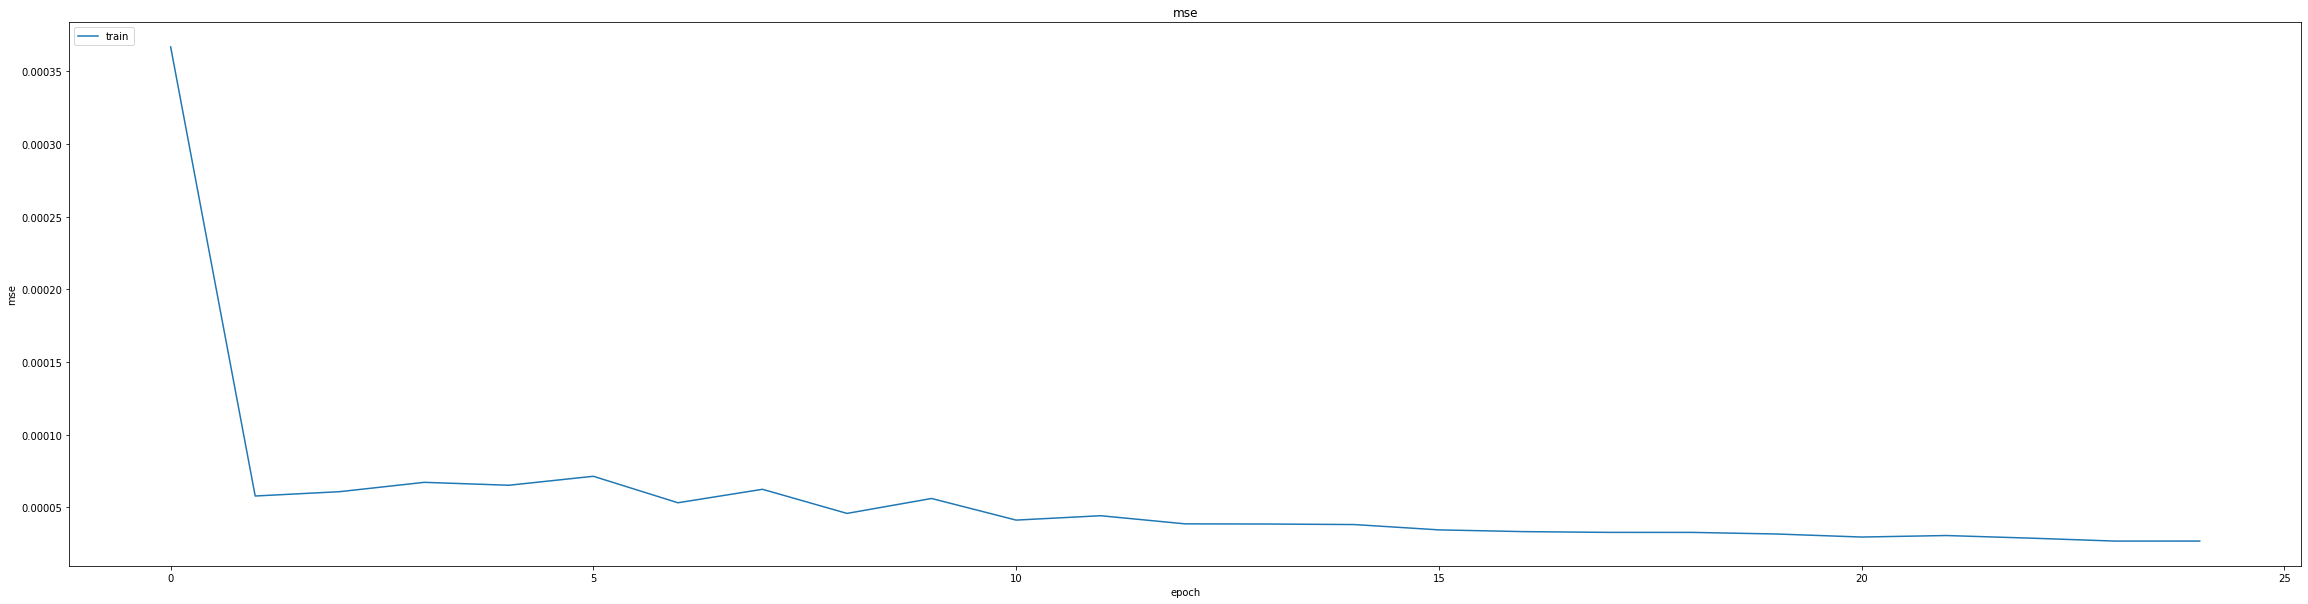

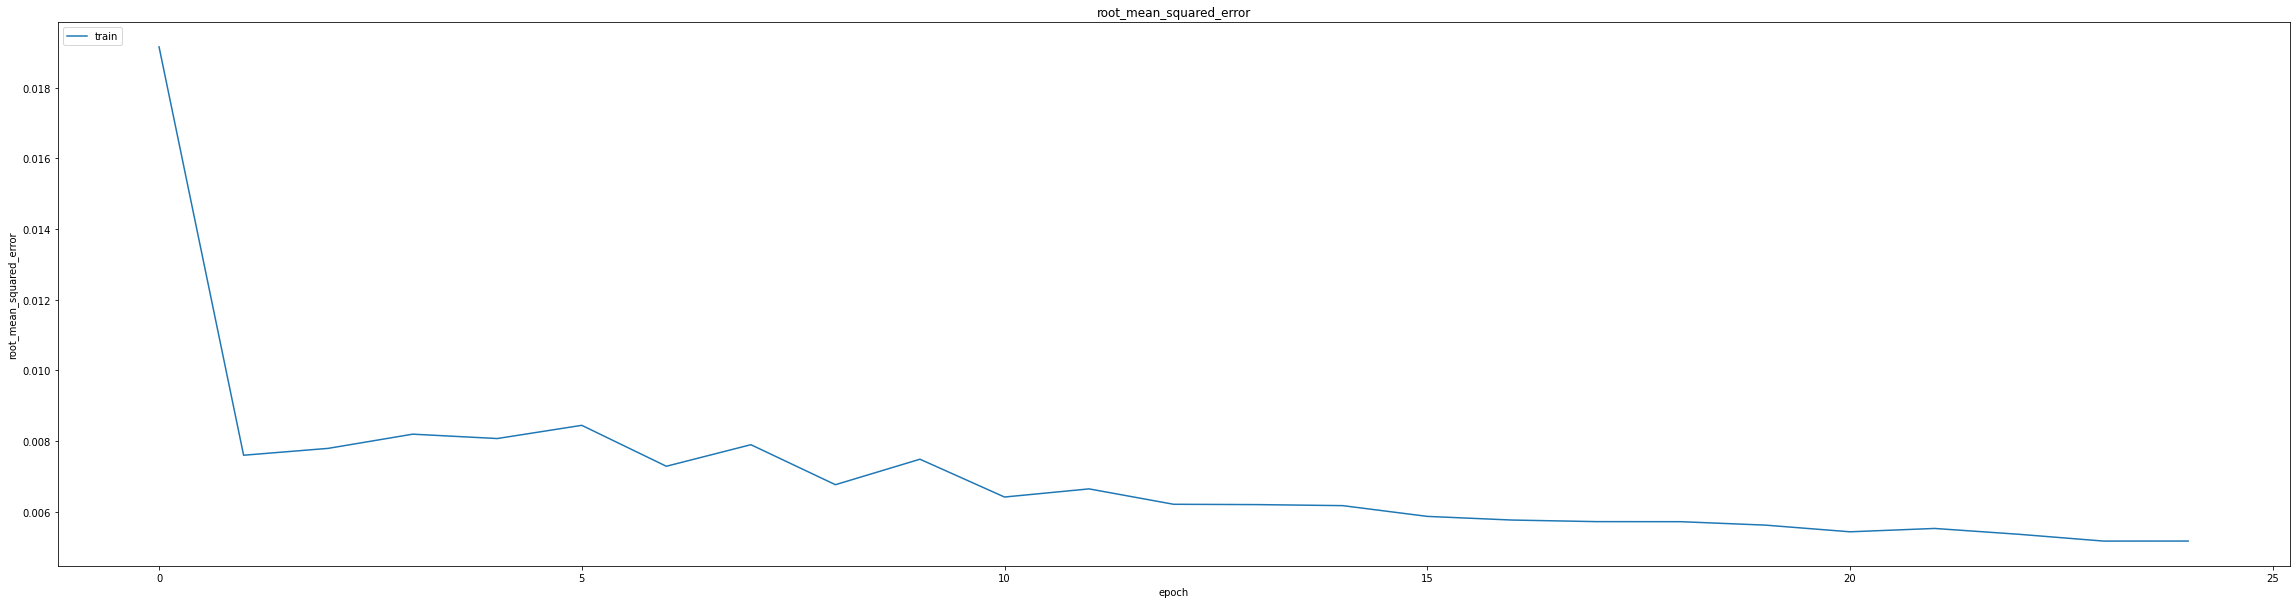

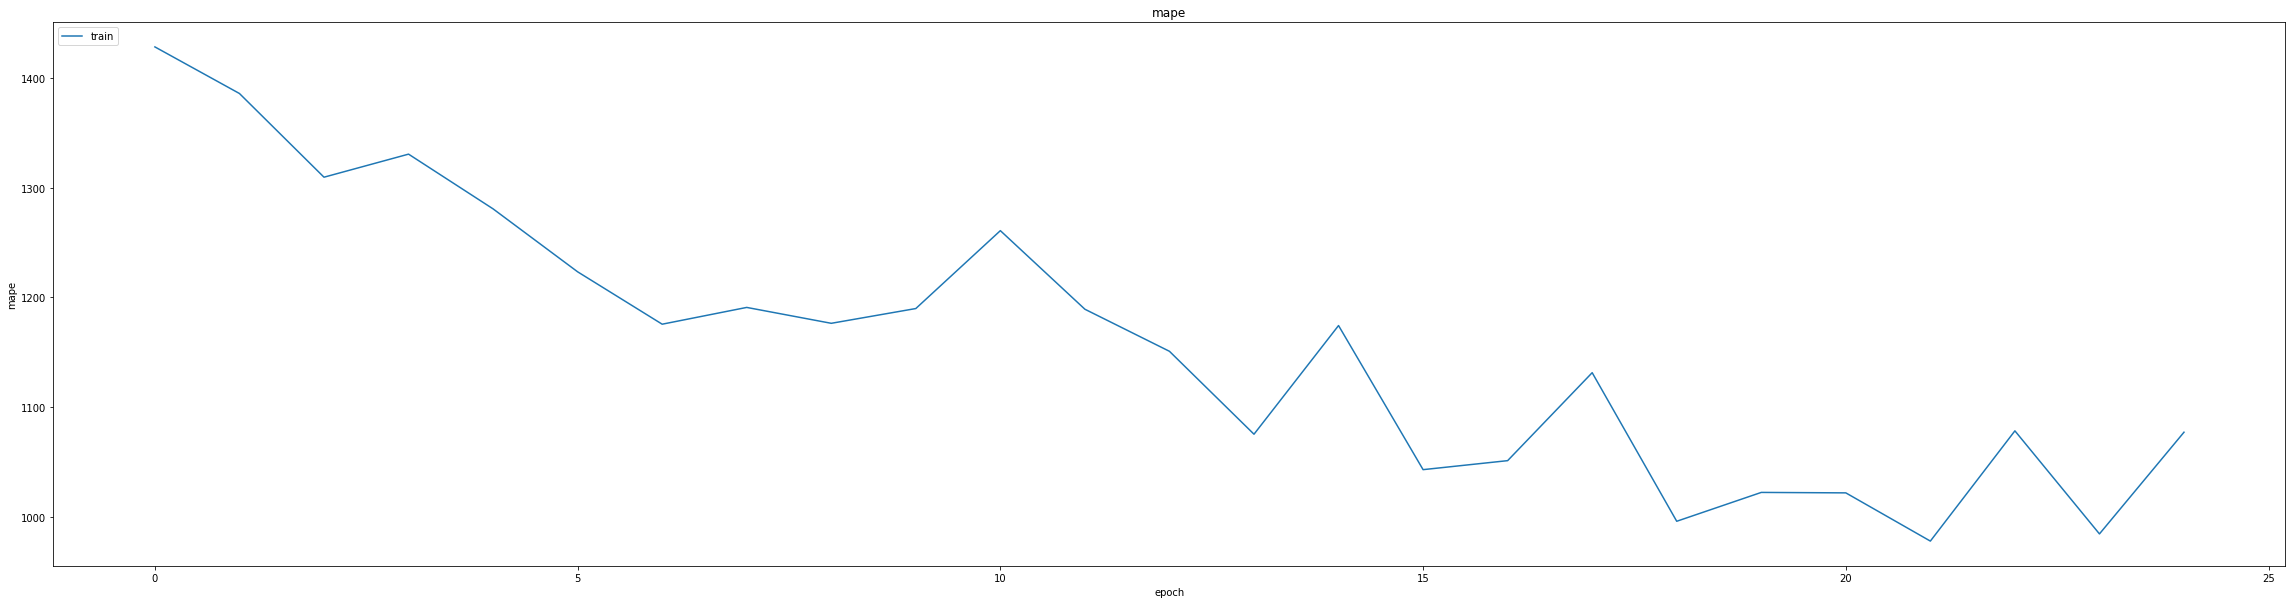

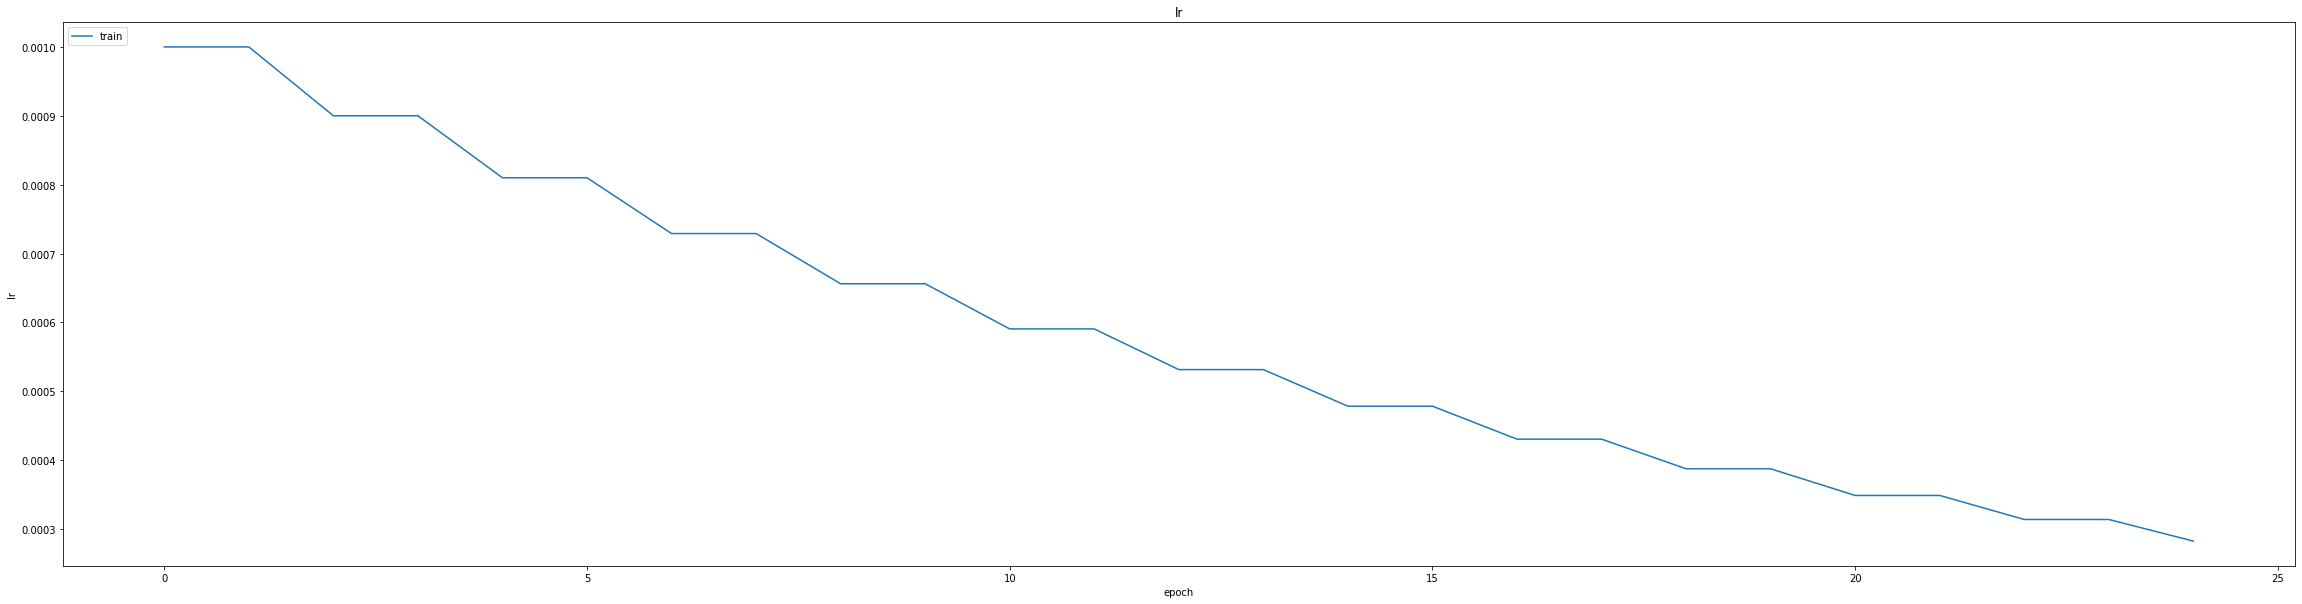

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0048112086951732635
0.00676026102155447
348/348 [==============================] - 3s 4ms/step
0.9983687756545592


348/348 [==============================] - 1s 4ms/step


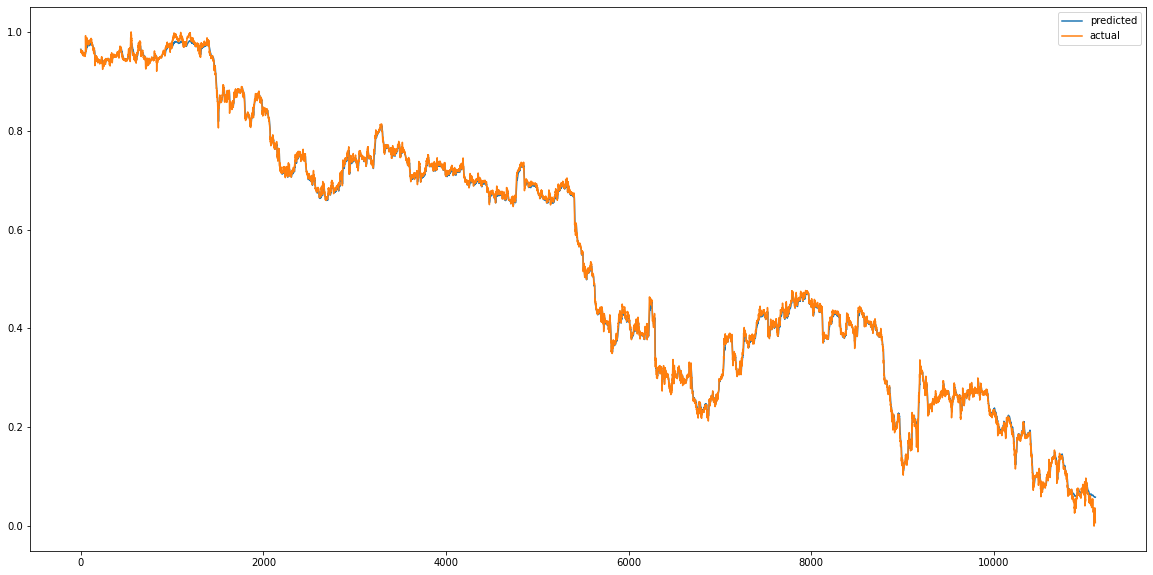

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


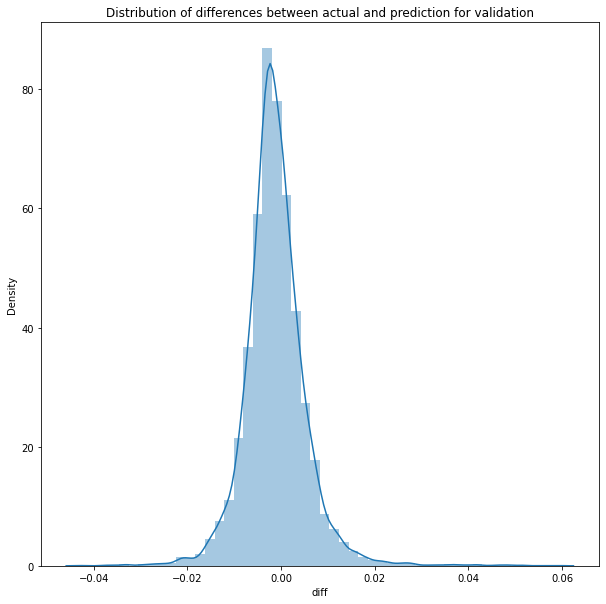

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 5ms/step


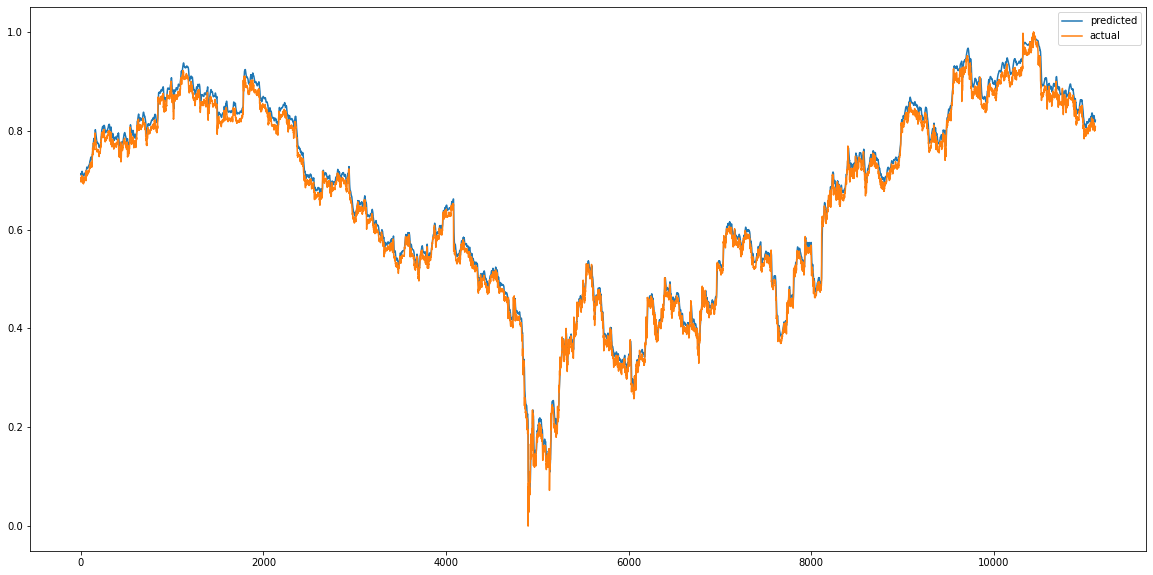

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


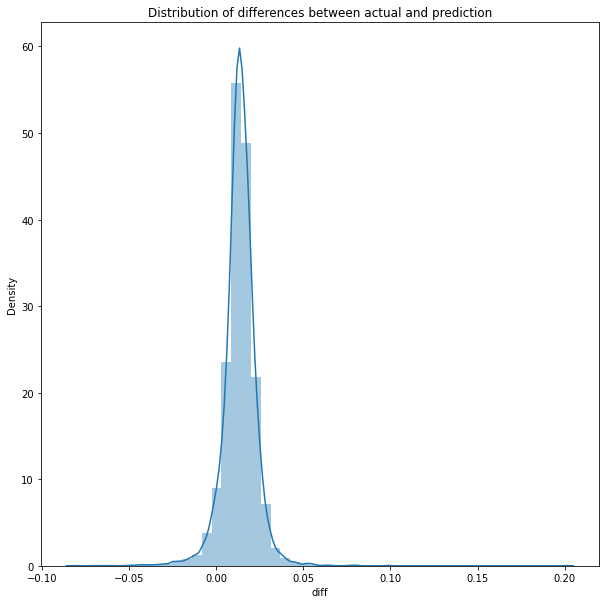

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0002752370010426759
MAE :  0.014537796532979057
RMSE  : 0.01659026826313173
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9930182321977348


count    11115.000000
mean         0.013543
std          0.009583
min         -0.081611
25%          0.009326
50%          0.013685
75%          0.018389
max          0.200597
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_5 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_7 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_6 (GRU)                 (None, 16)                3936      
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
401/406 [============================>.] - ETA: 0s - loss: 740.9283 - mae: 10.8189 - mse: 740.9283 - root_mean_squared_error: 27.2200 - mape: 531637.8750
Epoch 1: val_mse improved from inf to 1.46117, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 19s 37ms/step - loss: 732.0162 - mae: 10.7019 - mse: 732.0162 - root_mean_squared_error: 27.0558 - mape: 525234.5625 - val_loss: 1.4612 - val_mae: 1.1775 - val_mse: 1.4612 - val_root_mean_squared_error: 1.2088 - val_mape: 155742.0625
Epoch 2/75
405/406 [============================>.] - ETA: 0s - loss: 0.4725 - mae: 0.6219 - mse: 0.4725 - root_mean_squared_error: 0.6874 - mape: 23421.9512
Epoch 2: val_mse improved from 1.46117 to 0.25739, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 18s 44ms/step - loss: 0.4719 - mae: 0.6213 - mse: 0.4719 - root_mean_squared_error: 0.6869 - mape: 23370.7910 - val_loss: 0.2574 - val_mae: 0.4285 - val_mse: 0.2574 - val_root_mean_squared_error: 0.5073 - val_mape: 88012.8516
Epoch 3/75
405/406 [============================>.] - ETA: 0s - loss: 0.0886 - mae: 0.2316 - mse: 0.0886 - root_mean_squared_error: 0.2976 - mape: 15965.9062
Epoch 3: val_mse improved from 0.25739 to 0.12404, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 17s 43ms/step - loss: 0.0885 - mae: 0.2315 - mse: 0.0885 - root_mean_squared_error: 0.2975 - mape: 15930.9824 - val_loss: 0.1240 - val_mae: 0.2841 - val_mse: 0.1240 - val_root_mean_squared_error: 0.3522 - val_mape: 69489.6250
Epoch 4/75
402/406 [============================>.] - ETA: 0s - loss: 0.0462 - mae: 0.1691 - mse: 0.0462 - root_mean_squared_error: 0.2149 - mape: 14240.5459
Epoch 4: val_mse improved from 0.12404 to 0.09521, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 0.0461 - mae: 0.1691 - mse: 0.0461 - root_mean_squared_error: 0.2148 - mape: 14104.4688 - val_loss: 0.0952 - val_mae: 0.2517 - val_mse: 0.0952 - val_root_mean_squared_error: 0.3086 - val_mape: 62391.2539
Epoch 5/75
405/406 [============================>.] - ETA: 0s - loss: 0.0401 - mae: 0.1653 - mse: 0.0401 - root_mean_squared_error: 0.2003 - mape: 13584.3027
Epoch 5: val_mse improved from 0.09521 to 0.08725, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 17s 43ms/step - loss: 0.0401 - mae: 0.1652 - mse: 0.0401 - root_mean_squared_error: 0.2002 - mape: 13554.5625 - val_loss: 0.0873 - val_mae: 0.2480 - val_mse: 0.0873 - val_root_mean_squared_error: 0.2954 - val_mape: 59603.1953
Epoch 6/75
403/406 [============================>.] - ETA: 0s - loss: 0.0394 - mae: 0.1661 - mse: 0.0394 - root_mean_squared_error: 0.1984 - mape: 13610.2373
Epoch 6: val_mse improved from 0.08725 to 0.08499, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0394 - mae: 0.1661 - mse: 0.0394 - root_mean_squared_error: 0.1985 - mape: 13513.5850 - val_loss: 0.0850 - val_mae: 0.2476 - val_mse: 0.0850 - val_root_mean_squared_error: 0.2915 - val_mape: 58650.3125
Epoch 7/75
402/406 [============================>.] - ETA: 0s - loss: 0.0391 - mae: 0.1663 - mse: 0.0391 - root_mean_squared_error: 0.1979 - mape: 13017.8809
Epoch 7: val_mse improved from 0.08499 to 0.08440, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0392 - mae: 0.1663 - mse: 0.0392 - root_mean_squared_error: 0.1979 - mape: 12893.5273 - val_loss: 0.0844 - val_mae: 0.2475 - val_mse: 0.0844 - val_root_mean_squared_error: 0.2905 - val_mape: 58387.8008
Epoch 8/75
401/406 [============================>.] - ETA: 0s - loss: 0.0392 - mae: 0.1664 - mse: 0.0392 - root_mean_squared_error: 0.1979 - mape: 12992.4736
Epoch 8: val_mse improved from 0.08440 to 0.08426, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0392 - mae: 0.1665 - mse: 0.0392 - root_mean_squared_error: 0.1980 - mape: 12836.4590 - val_loss: 0.0843 - val_mae: 0.2474 - val_mse: 0.0843 - val_root_mean_squared_error: 0.2903 - val_mape: 58318.1914
Epoch 9/75
403/406 [============================>.] - ETA: 0s - loss: 0.0391 - mae: 0.1664 - mse: 0.0391 - root_mean_squared_error: 0.1979 - mape: 13085.6650
Epoch 9: val_mse improved from 0.08426 to 0.08423, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0391 - mae: 0.1664 - mse: 0.0391 - root_mean_squared_error: 0.1979 - mape: 12992.7129 - val_loss: 0.0842 - val_mae: 0.2474 - val_mse: 0.0842 - val_root_mean_squared_error: 0.2902 - val_mape: 58306.3711
Epoch 10/75
402/406 [============================>.] - ETA: 0s - loss: 0.0392 - mae: 0.1665 - mse: 0.0392 - root_mean_squared_error: 0.1979 - mape: 13298.6367
Epoch 10: val_mse did not improve from 0.08423
406/406 [==============================] - 4s 10ms/step - loss: 0.0391 - mae: 0.1664 - mse: 0.0391 - root_mean_squared_error: 0.1978 - mape: 13171.8018 - val_loss: 0.0844 - val_mae: 0.2474 - val_mse: 0.0844 - val_root_mean_squared_error: 0.2905 - val_mape: 58375.6406
Epoch 11/75
403/406 [============================>.] - ETA: 0s - loss: 0.0391 - mae: 0.1663 - mse: 0.0391 - root_mean_squared_error: 0.1978 - mape: 13042.5107
Epoch 11: val_mse improved from 0.08423 to 0.08418, saving model to /content/drive/MyDrive/modelwe

406/406 [==============================] - 13s 33ms/step - loss: 0.0391 - mae: 0.1663 - mse: 0.0391 - root_mean_squared_error: 0.1978 - mape: 12949.8467 - val_loss: 0.0842 - val_mae: 0.2473 - val_mse: 0.0842 - val_root_mean_squared_error: 0.2901 - val_mape: 58283.8945
Epoch 12/75
403/406 [============================>.] - ETA: 0s - loss: 0.0391 - mae: 0.1662 - mse: 0.0391 - root_mean_squared_error: 0.1976 - mape: 12904.9316
Epoch 12: val_mse improved from 0.08418 to 0.08413, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0390 - mae: 0.1662 - mse: 0.0390 - root_mean_squared_error: 0.1976 - mape: 12813.2549 - val_loss: 0.0841 - val_mae: 0.2473 - val_mse: 0.0841 - val_root_mean_squared_error: 0.2900 - val_mape: 58263.6641
Epoch 13/75
402/406 [============================>.] - ETA: 0s - loss: 0.0390 - mae: 0.1662 - mse: 0.0390 - root_mean_squared_error: 0.1976 - mape: 12933.1631
Epoch 13: val_mse did not improve from 0.08413
406/406 [==============================] - 4s 10ms/step - loss: 0.0390 - mae: 0.1662 - mse: 0.0390 - root_mean_squared_error: 0.1976 - mape: 12809.5361 - val_loss: 0.0842 - val_mae: 0.2472 - val_mse: 0.0842 - val_root_mean_squared_error: 0.2903 - val_mape: 58323.7656
Epoch 14/75
401/406 [============================>.] - ETA: 0s - loss: 0.0389 - mae: 0.1659 - mse: 0.0389 - root_mean_squared_error: 0.1973 - mape: 13030.2939
Epoch 14: val_mse did not improve from 0.08413
406/406 [==============================] - 5s 11ms/

406/406 [==============================] - 14s 34ms/step - loss: 0.0388 - mae: 0.1657 - mse: 0.0388 - root_mean_squared_error: 0.1971 - mape: 12775.4961 - val_loss: 0.0836 - val_mae: 0.2467 - val_mse: 0.0836 - val_root_mean_squared_error: 0.2891 - val_mape: 58054.8203
Epoch 16/75
406/406 [==============================] - ETA: 0s - loss: 0.0386 - mae: 0.1652 - mse: 0.0386 - root_mean_squared_error: 0.1965 - mape: 12814.6484
Epoch 16: val_mse did not improve from 0.08359
406/406 [==============================] - 4s 10ms/step - loss: 0.0386 - mae: 0.1652 - mse: 0.0386 - root_mean_squared_error: 0.1965 - mape: 12814.6484 - val_loss: 0.0847 - val_mae: 0.2465 - val_mse: 0.0847 - val_root_mean_squared_error: 0.2910 - val_mape: 58563.3398
Epoch 17/75
402/406 [============================>.] - ETA: 0s - loss: 0.0384 - mae: 0.1646 - mse: 0.0384 - root_mean_squared_error: 0.1958 - mape: 12899.9766
Epoch 17: val_mse improved from 0.08359 to 0.08311, saving model to /content/drive/MyDrive/modelwe

406/406 [==============================] - 14s 35ms/step - loss: 0.0384 - mae: 0.1646 - mse: 0.0384 - root_mean_squared_error: 0.1959 - mape: 12776.7852 - val_loss: 0.0831 - val_mae: 0.2455 - val_mse: 0.0831 - val_root_mean_squared_error: 0.2883 - val_mape: 57929.7891
Epoch 18/75
403/406 [============================>.] - ETA: 0s - loss: 0.0379 - mae: 0.1635 - mse: 0.0379 - root_mean_squared_error: 0.1946 - mape: 12884.6055
Epoch 18: val_mse improved from 0.08311 to 0.08310, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 0.0379 - mae: 0.1636 - mse: 0.0379 - root_mean_squared_error: 0.1946 - mape: 12793.1953 - val_loss: 0.0831 - val_mae: 0.2440 - val_mse: 0.0831 - val_root_mean_squared_error: 0.2883 - val_mape: 58094.4688
Epoch 19/75
404/406 [============================>.] - ETA: 0s - loss: 0.0366 - mae: 0.1605 - mse: 0.0366 - root_mean_squared_error: 0.1912 - mape: 12664.8008
Epoch 19: val_mse improved from 0.08310 to 0.07649, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 0.0366 - mae: 0.1604 - mse: 0.0366 - root_mean_squared_error: 0.1912 - mape: 12605.9639 - val_loss: 0.0765 - val_mae: 0.2355 - val_mse: 0.0765 - val_root_mean_squared_error: 0.2766 - val_mape: 56130.1992
Epoch 20/75
401/406 [============================>.] - ETA: 0s - loss: 0.0284 - mae: 0.1382 - mse: 0.0284 - root_mean_squared_error: 0.1685 - mape: 12244.3711
Epoch 20: val_mse improved from 0.07649 to 0.04833, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0283 - mae: 0.1379 - mse: 0.0283 - root_mean_squared_error: 0.1682 - mape: 12097.1084 - val_loss: 0.0483 - val_mae: 0.1854 - val_mse: 0.0483 - val_root_mean_squared_error: 0.2198 - val_mape: 48359.3516
Epoch 21/75
400/406 [============================>.] - ETA: 0s - loss: 0.0103 - mae: 0.0740 - mse: 0.0103 - root_mean_squared_error: 0.1012 - mape: 8369.3242
Epoch 21: val_mse improved from 0.04833 to 0.01664, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 0.0102 - mae: 0.0737 - mse: 0.0102 - root_mean_squared_error: 0.1009 - mape: 8248.0488 - val_loss: 0.0166 - val_mae: 0.0982 - val_mse: 0.0166 - val_root_mean_squared_error: 0.1290 - val_mape: 36573.9375
Epoch 22/75
402/406 [============================>.] - ETA: 0s - loss: 0.0039 - mae: 0.0442 - mse: 0.0039 - root_mean_squared_error: 0.0622 - mape: 7136.4106
Epoch 22: val_mse improved from 0.01664 to 0.00867, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0038 - mae: 0.0441 - mse: 0.0038 - root_mean_squared_error: 0.0620 - mape: 7068.0815 - val_loss: 0.0087 - val_mae: 0.0639 - val_mse: 0.0087 - val_root_mean_squared_error: 0.0931 - val_mape: 31336.8926
Epoch 23/75
402/406 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0334 - mse: 0.0023 - root_mean_squared_error: 0.0478 - mape: 6182.2046
Epoch 23: val_mse improved from 0.00867 to 0.00575, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 0.0023 - mae: 0.0333 - mse: 0.0023 - root_mean_squared_error: 0.0478 - mape: 6123.0332 - val_loss: 0.0058 - val_mae: 0.0500 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0759 - val_mape: 28194.2422
Epoch 24/75
402/406 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0282 - mse: 0.0017 - root_mean_squared_error: 0.0410 - mape: 5850.0933
Epoch 24: val_mse improved from 0.00575 to 0.00424, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0017 - mae: 0.0282 - mse: 0.0017 - root_mean_squared_error: 0.0410 - mape: 5794.0811 - val_loss: 0.0042 - val_mae: 0.0360 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0651 - val_mape: 26346.8789
Epoch 25/75
401/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0255 - mse: 0.0014 - root_mean_squared_error: 0.0371 - mape: 5629.2412
Epoch 25: val_mse improved from 0.00424 to 0.00373, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0014 - mae: 0.0254 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 5561.4766 - val_loss: 0.0037 - val_mae: 0.0355 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0611 - val_mape: 25075.8516
Epoch 26/75
404/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0232 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 5238.7139
Epoch 26: val_mse improved from 0.00373 to 0.00298, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 0.0011 - mae: 0.0232 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 5214.3315 - val_loss: 0.0030 - val_mae: 0.0314 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0546 - val_mape: 23517.1465
Epoch 27/75
406/406 [==============================] - ETA: 0s - loss: 9.7733e-04 - mae: 0.0216 - mse: 9.7733e-04 - root_mean_squared_error: 0.0313 - mape: 4727.4790
Epoch 27: val_mse improved from 0.00298 to 0.00256, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 9.7733e-04 - mae: 0.0216 - mse: 9.7733e-04 - root_mean_squared_error: 0.0313 - mape: 4727.4790 - val_loss: 0.0026 - val_mae: 0.0303 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0506 - val_mape: 22275.2617
Epoch 28/75
402/406 [============================>.] - ETA: 0s - loss: 8.3847e-04 - mae: 0.0201 - mse: 8.3847e-04 - root_mean_squared_error: 0.0290 - mape: 4528.6416
Epoch 28: val_mse improved from 0.00256 to 0.00203, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 8.3935e-04 - mae: 0.0201 - mse: 8.3935e-04 - root_mean_squared_error: 0.0290 - mape: 4485.3027 - val_loss: 0.0020 - val_mae: 0.0261 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0450 - val_mape: 20898.6875
Epoch 29/75
401/406 [============================>.] - ETA: 0s - loss: 7.3710e-04 - mae: 0.0191 - mse: 7.3710e-04 - root_mean_squared_error: 0.0271 - mape: 4523.2744
Epoch 29: val_mse improved from 0.00203 to 0.00177, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 7.3697e-04 - mae: 0.0190 - mse: 7.3697e-04 - root_mean_squared_error: 0.0271 - mape: 4468.8433 - val_loss: 0.0018 - val_mae: 0.0252 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0421 - val_mape: 19784.3223
Epoch 30/75
404/406 [============================>.] - ETA: 0s - loss: 6.5637e-04 - mae: 0.0181 - mse: 6.5637e-04 - root_mean_squared_error: 0.0256 - mape: 4353.8320
Epoch 30: val_mse improved from 0.00177 to 0.00145, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 6.5582e-04 - mae: 0.0181 - mse: 6.5582e-04 - root_mean_squared_error: 0.0256 - mape: 4333.5654 - val_loss: 0.0015 - val_mae: 0.0228 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0381 - val_mape: 18560.7090
Epoch 31/75
405/406 [============================>.] - ETA: 0s - loss: 5.9698e-04 - mae: 0.0176 - mse: 5.9698e-04 - root_mean_squared_error: 0.0244 - mape: 3885.1716
Epoch 31: val_mse improved from 0.00145 to 0.00125, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 5.9672e-04 - mae: 0.0176 - mse: 5.9672e-04 - root_mean_squared_error: 0.0244 - mape: 3876.6531 - val_loss: 0.0012 - val_mae: 0.0218 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0353 - val_mape: 17501.5000
Epoch 32/75
403/406 [============================>.] - ETA: 0s - loss: 5.3178e-04 - mae: 0.0167 - mse: 5.3178e-04 - root_mean_squared_error: 0.0231 - mape: 3507.7344
Epoch 32: val_mse improved from 0.00125 to 0.00109, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 5.3143e-04 - mae: 0.0167 - mse: 5.3143e-04 - root_mean_squared_error: 0.0231 - mape: 3482.7812 - val_loss: 0.0011 - val_mae: 0.0210 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 16404.5879
Epoch 33/75
402/406 [============================>.] - ETA: 0s - loss: 4.9173e-04 - mae: 0.0163 - mse: 4.9173e-04 - root_mean_squared_error: 0.0222 - mape: 3446.0190
Epoch 33: val_mse improved from 0.00109 to 0.00093, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 4.9118e-04 - mae: 0.0163 - mse: 4.9118e-04 - root_mean_squared_error: 0.0222 - mape: 3413.0181 - val_loss: 9.2859e-04 - val_mae: 0.0194 - val_mse: 9.2859e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 15485.1895
Epoch 34/75
405/406 [============================>.] - ETA: 0s - loss: 4.4579e-04 - mae: 0.0156 - mse: 4.4579e-04 - root_mean_squared_error: 0.0211 - mape: 3227.7827
Epoch 34: val_mse improved from 0.00093 to 0.00084, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 4.4545e-04 - mae: 0.0156 - mse: 4.4545e-04 - root_mean_squared_error: 0.0211 - mape: 3220.7046 - val_loss: 8.3594e-04 - val_mae: 0.0191 - val_mse: 8.3594e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 14691.8037
Epoch 35/75
402/406 [============================>.] - ETA: 0s - loss: 4.0786e-04 - mae: 0.0150 - mse: 4.0786e-04 - root_mean_squared_error: 0.0202 - mape: 3300.4866
Epoch 35: val_mse improved from 0.00084 to 0.00076, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 4.0840e-04 - mae: 0.0150 - mse: 4.0840e-04 - root_mean_squared_error: 0.0202 - mape: 3268.8943 - val_loss: 7.6166e-04 - val_mae: 0.0183 - val_mse: 7.6166e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 14077.8701
Epoch 36/75
403/406 [============================>.] - ETA: 0s - loss: 3.8379e-04 - mae: 0.0146 - mse: 3.8379e-04 - root_mean_squared_error: 0.0196 - mape: 3131.6189
Epoch 36: val_mse did not improve from 0.00076
406/406 [==============================] - 4s 10ms/step - loss: 3.8343e-04 - mae: 0.0146 - mse: 3.8343e-04 - root_mean_squared_error: 0.0196 - mape: 3109.3367 - val_loss: 8.0827e-04 - val_mae: 0.0202 - val_mse: 8.0827e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 13614.6191
Epoch 37/75
401/406 [============================>.] - ETA: 0s - loss: 3.5094e-04 - mae: 0.0140 - mse: 3.5094e-04 - root_mean_squared_error: 0.0187 - mape: 2818.5979
Epoch 37: val_mse improved from 0.00076 to 0.00068, sa

406/406 [==============================] - 14s 35ms/step - loss: 3.5037e-04 - mae: 0.0140 - mse: 3.5037e-04 - root_mean_squared_error: 0.0187 - mape: 2784.6707 - val_loss: 6.7820e-04 - val_mae: 0.0186 - val_mse: 6.7820e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 12960.5400
Epoch 38/75
403/406 [============================>.] - ETA: 0s - loss: 3.2938e-04 - mae: 0.0136 - mse: 3.2938e-04 - root_mean_squared_error: 0.0181 - mape: 2765.4509
Epoch 38: val_mse improved from 0.00068 to 0.00060, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 3.2945e-04 - mae: 0.0136 - mse: 3.2945e-04 - root_mean_squared_error: 0.0182 - mape: 2745.7844 - val_loss: 5.9558e-04 - val_mae: 0.0170 - val_mse: 5.9558e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 12431.3438
Epoch 39/75
404/406 [============================>.] - ETA: 0s - loss: 3.2347e-04 - mae: 0.0136 - mse: 3.2347e-04 - root_mean_squared_error: 0.0180 - mape: 2668.5247
Epoch 39: val_mse did not improve from 0.00060
406/406 [==============================] - 4s 11ms/step - loss: 3.2388e-04 - mae: 0.0136 - mse: 3.2388e-04 - root_mean_squared_error: 0.0180 - mape: 2656.1135 - val_loss: 5.9815e-04 - val_mae: 0.0182 - val_mse: 5.9815e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 11842.5215
Epoch 40/75
403/406 [============================>.] - ETA: 0s - loss: 2.9324e-04 - mae: 0.0129 - mse: 2.9324e-04 - root_mean_squared_error: 0.0171 - mape: 2593.9973
Epoch 40: val_mse improved from 0.00060 to 0.00051, sa

406/406 [==============================] - 14s 36ms/step - loss: 2.9305e-04 - mae: 0.0129 - mse: 2.9305e-04 - root_mean_squared_error: 0.0171 - mape: 2575.5415 - val_loss: 5.1292e-04 - val_mae: 0.0156 - val_mse: 5.1292e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 11516.2109
Epoch 41/75
404/406 [============================>.] - ETA: 0s - loss: 2.8562e-04 - mae: 0.0128 - mse: 2.8562e-04 - root_mean_squared_error: 0.0169 - mape: 2453.5422
Epoch 41: val_mse did not improve from 0.00051
406/406 [==============================] - 5s 13ms/step - loss: 2.8574e-04 - mae: 0.0128 - mse: 2.8574e-04 - root_mean_squared_error: 0.0169 - mape: 2442.1355 - val_loss: 5.3385e-04 - val_mae: 0.0161 - val_mse: 5.3385e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 11204.2168
Epoch 42/75
403/406 [============================>.] - ETA: 0s - loss: 2.6629e-04 - mae: 0.0123 - mse: 2.6629e-04 - root_mean_squared_error: 0.0163 - mape: 2402.7664
Epoch 42: val_mse did not improve from 0.00051
406/406

406/406 [==============================] - 14s 35ms/step - loss: 2.5759e-04 - mae: 0.0122 - mse: 2.5759e-04 - root_mean_squared_error: 0.0160 - mape: 2254.2583 - val_loss: 4.6978e-04 - val_mae: 0.0162 - val_mse: 4.6978e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 10234.2959
Epoch 45/75
404/406 [============================>.] - ETA: 0s - loss: 2.3410e-04 - mae: 0.0116 - mse: 2.3410e-04 - root_mean_squared_error: 0.0153 - mape: 2211.5635
Epoch 45: val_mse did not improve from 0.00047
406/406 [==============================] - 4s 10ms/step - loss: 2.3412e-04 - mae: 0.0116 - mse: 2.3412e-04 - root_mean_squared_error: 0.0153 - mape: 2201.2756 - val_loss: 4.8295e-04 - val_mae: 0.0169 - val_mse: 4.8295e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 9977.6494
Epoch 46/75
403/406 [============================>.] - ETA: 0s - loss: 2.3113e-04 - mae: 0.0116 - mse: 2.3113e-04 - root_mean_squared_error: 0.0152 - mape: 2132.4150
Epoch 46: val_mse improved from 0.00047 to 0.00043, sav

406/406 [==============================] - 14s 34ms/step - loss: 2.3090e-04 - mae: 0.0116 - mse: 2.3090e-04 - root_mean_squared_error: 0.0152 - mape: 2117.2502 - val_loss: 4.3185e-04 - val_mae: 0.0151 - val_mse: 4.3185e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 9815.8066
Epoch 47/75
402/406 [============================>.] - ETA: 0s - loss: 2.2467e-04 - mae: 0.0115 - mse: 2.2467e-04 - root_mean_squared_error: 0.0150 - mape: 2122.5020
Epoch 47: val_mse improved from 0.00043 to 0.00039, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 2.2466e-04 - mae: 0.0115 - mse: 2.2466e-04 - root_mean_squared_error: 0.0150 - mape: 2102.1792 - val_loss: 3.9089e-04 - val_mae: 0.0139 - val_mse: 3.9089e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 9594.5801
Epoch 48/75
406/406 [==============================] - ETA: 0s - loss: 2.1102e-04 - mae: 0.0111 - mse: 2.1102e-04 - root_mean_squared_error: 0.0145 - mape: 2083.1646
Epoch 48: val_mse did not improve from 0.00039
406/406 [==============================] - 4s 10ms/step - loss: 2.1102e-04 - mae: 0.0111 - mse: 2.1102e-04 - root_mean_squared_error: 0.0145 - mape: 2083.1646 - val_loss: 4.1995e-04 - val_mae: 0.0152 - val_mse: 4.1995e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 9277.6621
Epoch 49/75
402/406 [============================>.] - ETA: 0s - loss: 2.0556e-04 - mae: 0.0109 - mse: 2.0556e-04 - root_mean_squared_error: 0.0143 - mape: 1984.5090
Epoch 49: val_mse did not improve from 0.00039
406/406 [

406/406 [==============================] - 14s 35ms/step - loss: 2.0020e-04 - mae: 0.0109 - mse: 2.0020e-04 - root_mean_squared_error: 0.0141 - mape: 1658.8076 - val_loss: 3.6463e-04 - val_mae: 0.0148 - val_mse: 3.6463e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 8180.6719
Epoch 54/75
405/406 [============================>.] - ETA: 0s - loss: 1.8278e-04 - mae: 0.0104 - mse: 1.8278e-04 - root_mean_squared_error: 0.0135 - mape: 1796.9840
Epoch 54: val_mse did not improve from 0.00036
406/406 [==============================] - 4s 10ms/step - loss: 1.8307e-04 - mae: 0.0104 - mse: 1.8307e-04 - root_mean_squared_error: 0.0135 - mape: 1793.0468 - val_loss: 4.0729e-04 - val_mae: 0.0158 - val_mse: 4.0729e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 8106.8721
Epoch 55/75
402/406 [============================>.] - ETA: 0s - loss: 1.7178e-04 - mae: 0.0100 - mse: 1.7178e-04 - root_mean_squared_error: 0.0131 - mape: 1809.4000
Epoch 55: val_mse did not improve from 0.00036
406/406 [

406/406 [==============================] - 14s 34ms/step - loss: 1.6559e-04 - mae: 0.0099 - mse: 1.6559e-04 - root_mean_squared_error: 0.0129 - mape: 1627.4476 - val_loss: 3.4925e-04 - val_mae: 0.0141 - val_mse: 3.4925e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 7879.5869
Epoch 57/75
402/406 [============================>.] - ETA: 0s - loss: 1.6076e-04 - mae: 0.0098 - mse: 1.6076e-04 - root_mean_squared_error: 0.0127 - mape: 1897.8955
Epoch 57: val_mse did not improve from 0.00035
406/406 [==============================] - 5s 11ms/step - loss: 1.6053e-04 - mae: 0.0098 - mse: 1.6053e-04 - root_mean_squared_error: 0.0127 - mape: 1879.7527 - val_loss: 5.5478e-04 - val_mae: 0.0201 - val_mse: 5.5478e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 7782.8359
Epoch 58/75
403/406 [============================>.] - ETA: 0s - loss: 1.6190e-04 - mae: 0.0099 - mse: 1.6190e-04 - root_mean_squared_error: 0.0127 - mape: 1513.0851
Epoch 58: val_mse did not improve from 0.00035
406/406 [

406/406 [==============================] - 15s 37ms/step - loss: 1.6880e-04 - mae: 0.0101 - mse: 1.6880e-04 - root_mean_squared_error: 0.0130 - mape: 1612.6151 - val_loss: 3.3126e-04 - val_mae: 0.0127 - val_mse: 3.3126e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 7843.7515
Epoch 60/75
404/406 [============================>.] - ETA: 0s - loss: 1.3496e-04 - mae: 0.0089 - mse: 1.3496e-04 - root_mean_squared_error: 0.0116 - mape: 1525.7864
Epoch 60: val_mse improved from 0.00033 to 0.00027, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 1.3489e-04 - mae: 0.0089 - mse: 1.3489e-04 - root_mean_squared_error: 0.0116 - mape: 1518.6869 - val_loss: 2.7422e-04 - val_mae: 0.0124 - val_mse: 2.7422e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 7332.2485
Epoch 61/75
404/406 [============================>.] - ETA: 0s - loss: 1.5912e-04 - mae: 0.0095 - mse: 1.5912e-04 - root_mean_squared_error: 0.0126 - mape: 1501.7795
Epoch 61: val_mse did not improve from 0.00027
406/406 [==============================] - 4s 10ms/step - loss: 1.5880e-04 - mae: 0.0095 - mse: 1.5880e-04 - root_mean_squared_error: 0.0126 - mape: 1494.7924 - val_loss: 3.4582e-04 - val_mae: 0.0138 - val_mse: 3.4582e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 7562.2100
Epoch 62/75
401/406 [============================>.] - ETA: 0s - loss: 1.1935e-04 - mae: 0.0084 - mse: 1.1935e-04 - root_mean_squared_error: 0.0109 - mape: 1395.7477
Epoch 62: val_mse did not improve from 0.00027
406/406 [

406/406 [==============================] - 14s 35ms/step - loss: 1.2304e-04 - mae: 0.0086 - mse: 1.2304e-04 - root_mean_squared_error: 0.0111 - mape: 1501.2823 - val_loss: 2.2043e-04 - val_mae: 0.0112 - val_mse: 2.2043e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 6740.1733
Epoch 64/75
402/406 [============================>.] - ETA: 0s - loss: 1.2692e-04 - mae: 0.0088 - mse: 1.2692e-04 - root_mean_squared_error: 0.0113 - mape: 1286.4207
Epoch 64: val_mse did not improve from 0.00022
406/406 [==============================] - 4s 10ms/step - loss: 1.2662e-04 - mae: 0.0088 - mse: 1.2662e-04 - root_mean_squared_error: 0.0113 - mape: 1274.1035 - val_loss: 2.3826e-04 - val_mae: 0.0121 - val_mse: 2.3826e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 6564.9634
Epoch 65/75
401/406 [============================>.] - ETA: 0s - loss: 1.1288e-04 - mae: 0.0082 - mse: 1.1288e-04 - root_mean_squared_error: 0.0106 - mape: 1316.9369
Epoch 65: val_mse did not improve from 0.00022
406/406 [

406/406 [==============================] - 14s 35ms/step - loss: 1.3342e-04 - mae: 0.0089 - mse: 1.3342e-04 - root_mean_squared_error: 0.0116 - mape: 1245.5793 - val_loss: 1.4583e-04 - val_mae: 0.0094 - val_mse: 1.4583e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 5870.6021
Epoch 68/75
401/406 [============================>.] - ETA: 0s - loss: 9.4222e-05 - mae: 0.0076 - mse: 9.4222e-05 - root_mean_squared_error: 0.0097 - mape: 1332.6261
Epoch 68: val_mse did not improve from 0.00015
406/406 [==============================] - 4s 10ms/step - loss: 9.5232e-05 - mae: 0.0076 - mse: 9.5232e-05 - root_mean_squared_error: 0.0098 - mape: 1316.5933 - val_loss: 4.5987e-04 - val_mae: 0.0186 - val_mse: 4.5987e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 6098.2827
Epoch 69/75
404/406 [============================>.] - ETA: 0s - loss: 7.8423e-05 - mae: 0.0068 - mse: 7.8423e-05 - root_mean_squared_error: 0.0089 - mape: 1237.1560
Epoch 69: val_mse improved from 0.00015 to 0.00013, savi

406/406 [==============================] - 14s 35ms/step - loss: 7.8343e-05 - mae: 0.0068 - mse: 7.8343e-05 - root_mean_squared_error: 0.0089 - mape: 1231.3981 - val_loss: 1.2585e-04 - val_mae: 0.0083 - val_mse: 1.2585e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 5725.0361
Epoch 70/75
401/406 [============================>.] - ETA: 0s - loss: 8.6685e-05 - mae: 0.0071 - mse: 8.6685e-05 - root_mean_squared_error: 0.0093 - mape: 1266.5850
Epoch 70: val_mse improved from 0.00013 to 0.00011, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 8.6554e-05 - mae: 0.0071 - mse: 8.6554e-05 - root_mean_squared_error: 0.0093 - mape: 1251.3397 - val_loss: 1.1409e-04 - val_mae: 0.0083 - val_mse: 1.1409e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 5319.1611
Epoch 71/75
402/406 [============================>.] - ETA: 0s - loss: 8.3502e-05 - mae: 0.0071 - mse: 8.3502e-05 - root_mean_squared_error: 0.0091 - mape: 1091.1760
Epoch 71: val_mse did not improve from 0.00011
406/406 [==============================] - 4s 10ms/step - loss: 8.3252e-05 - mae: 0.0071 - mse: 8.3252e-05 - root_mean_squared_error: 0.0091 - mape: 1080.7319 - val_loss: 1.1889e-04 - val_mae: 0.0085 - val_mse: 1.1889e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 5424.6396
Epoch 72/75
404/406 [============================>.] - ETA: 0s - loss: 8.1150e-05 - mae: 0.0070 - mse: 8.1150e-05 - root_mean_squared_error: 0.0090 - mape: 1148.5906
Epoch 72: val_mse did not improve from 0.00011
406/406 [

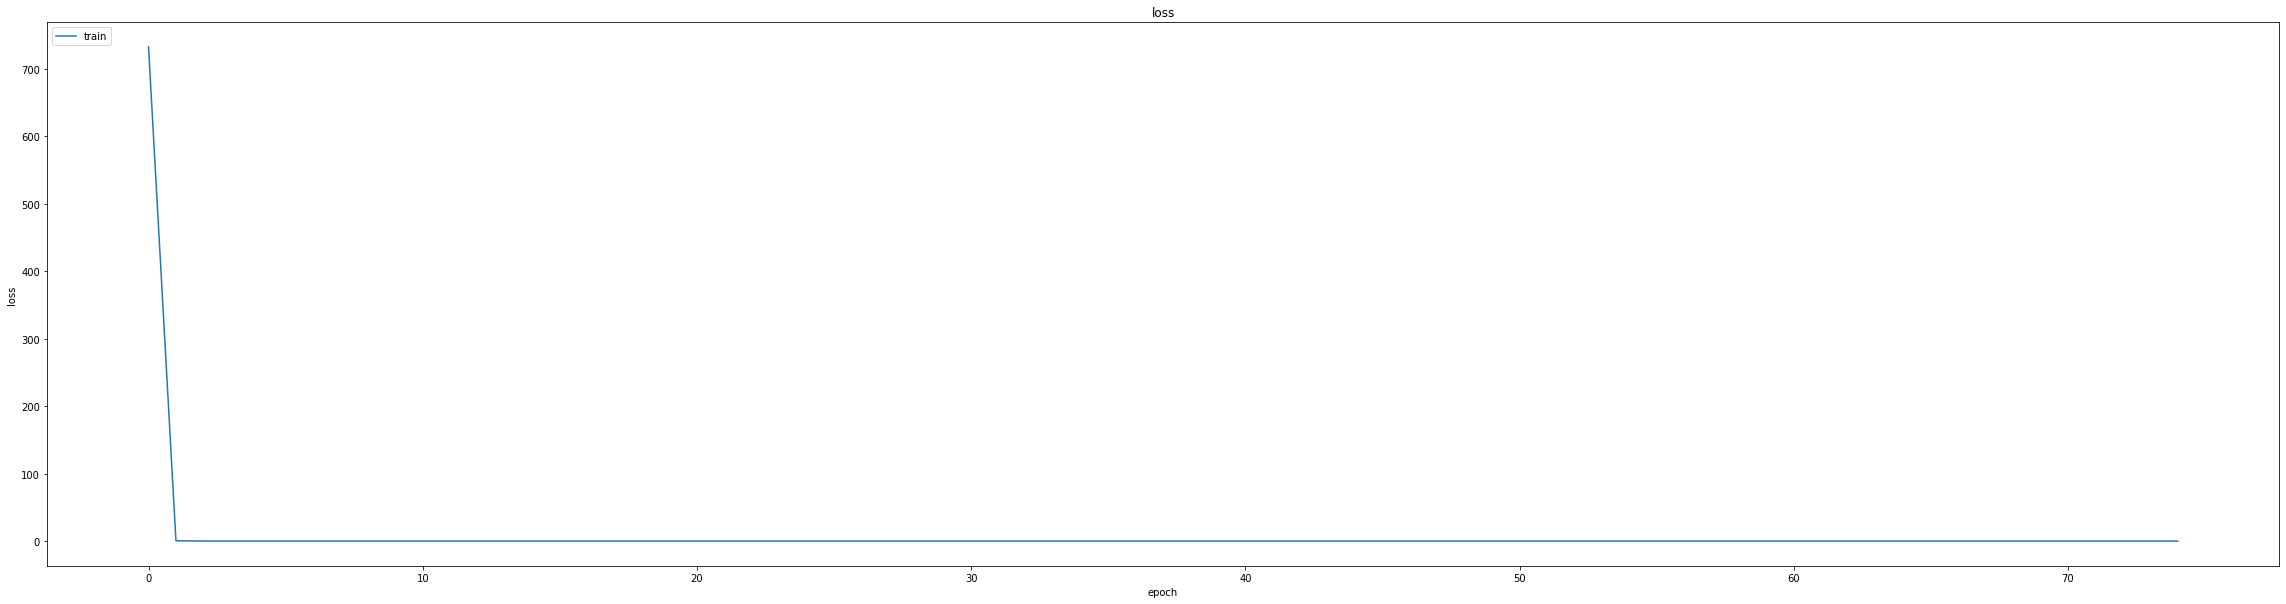

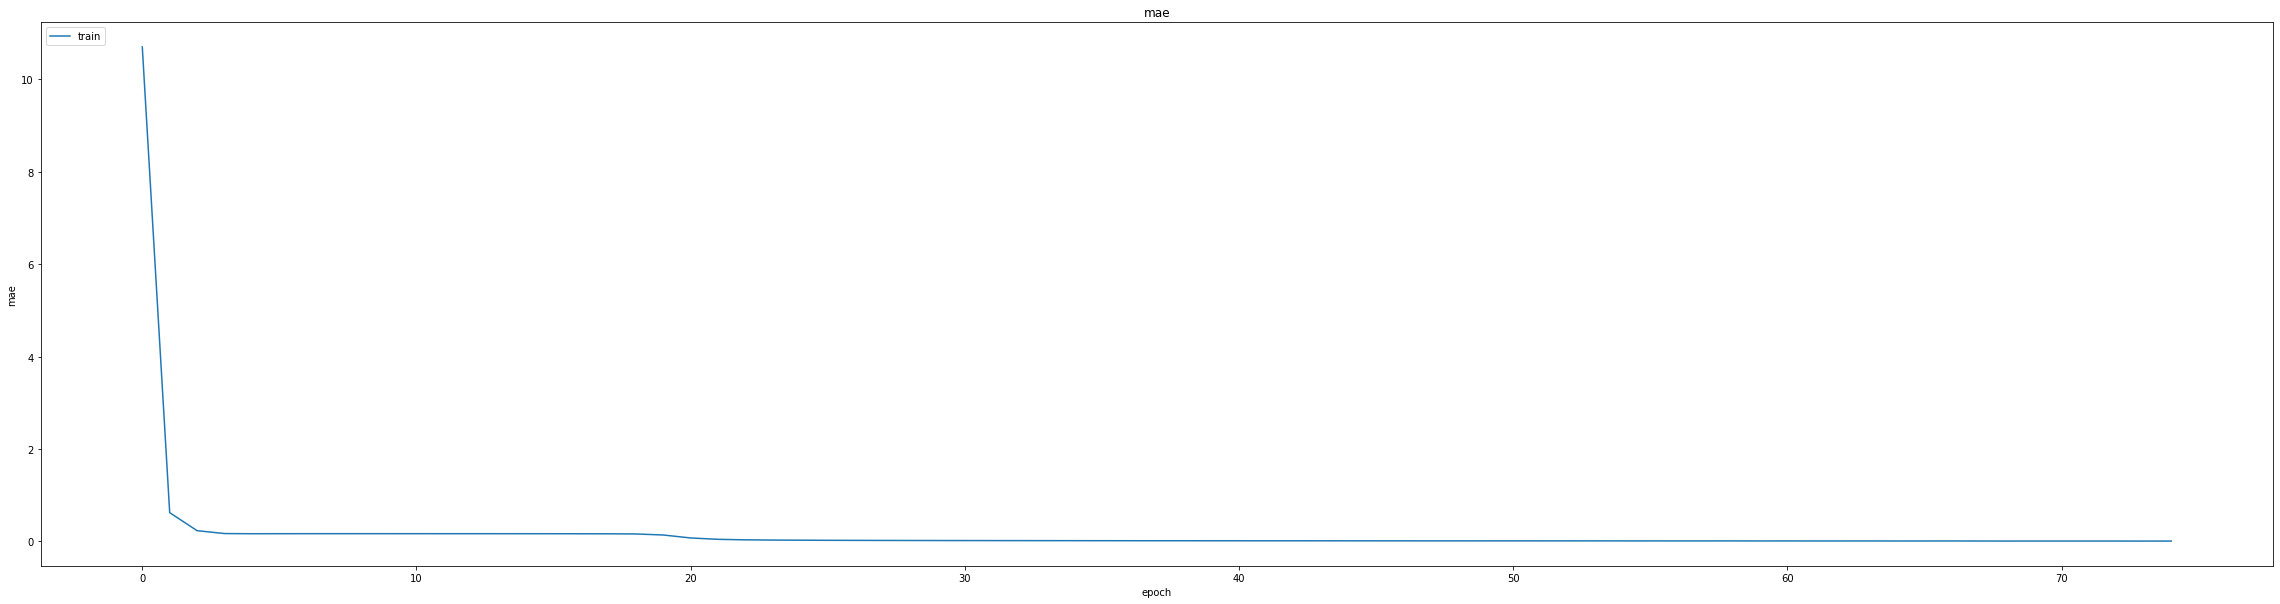

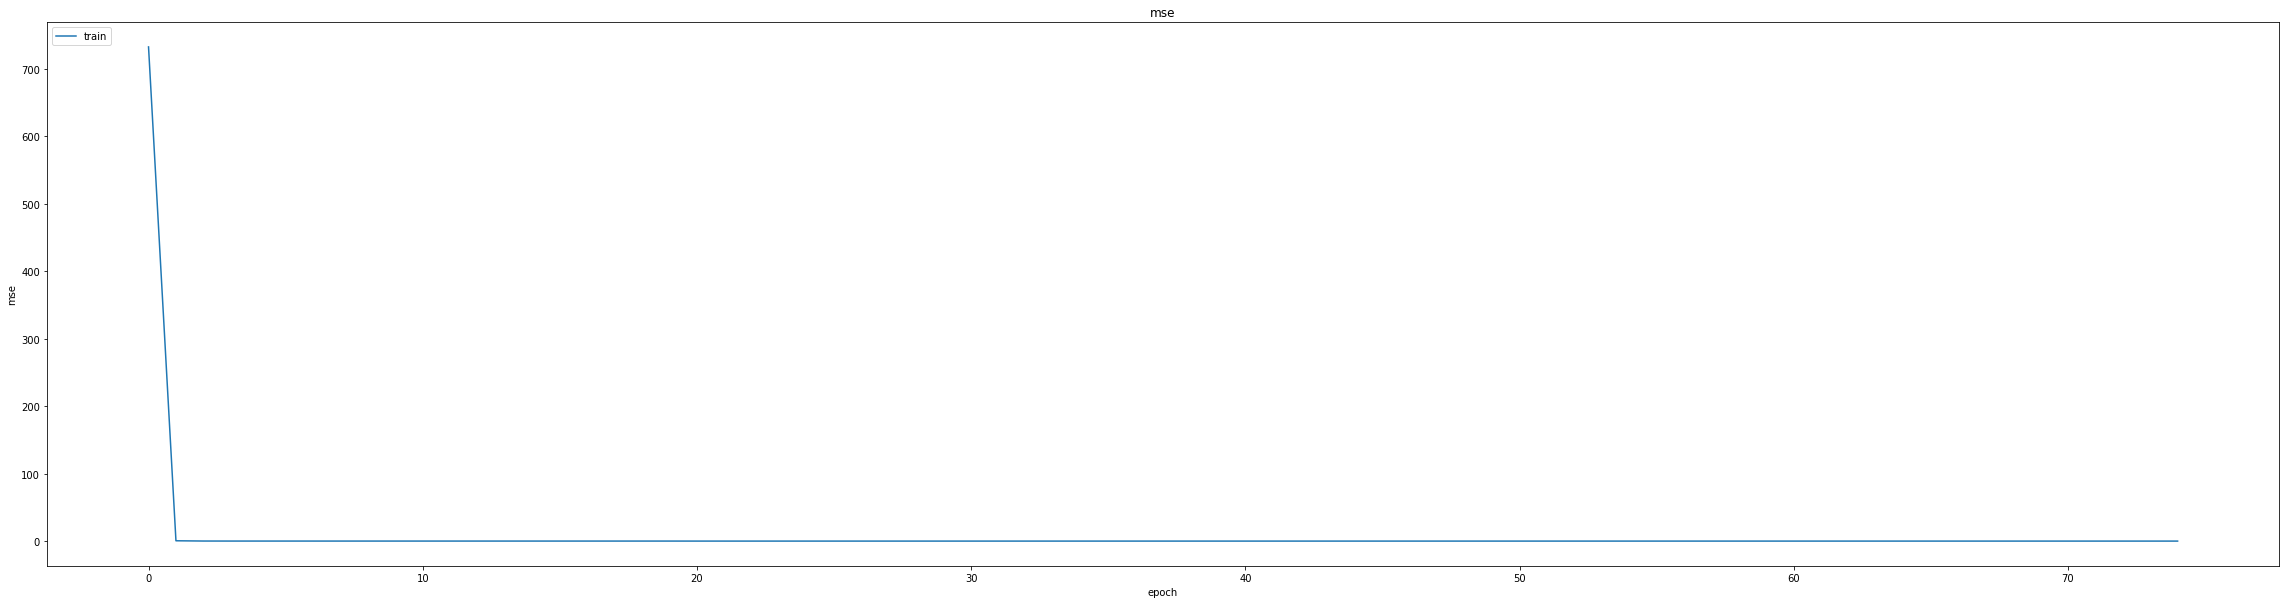

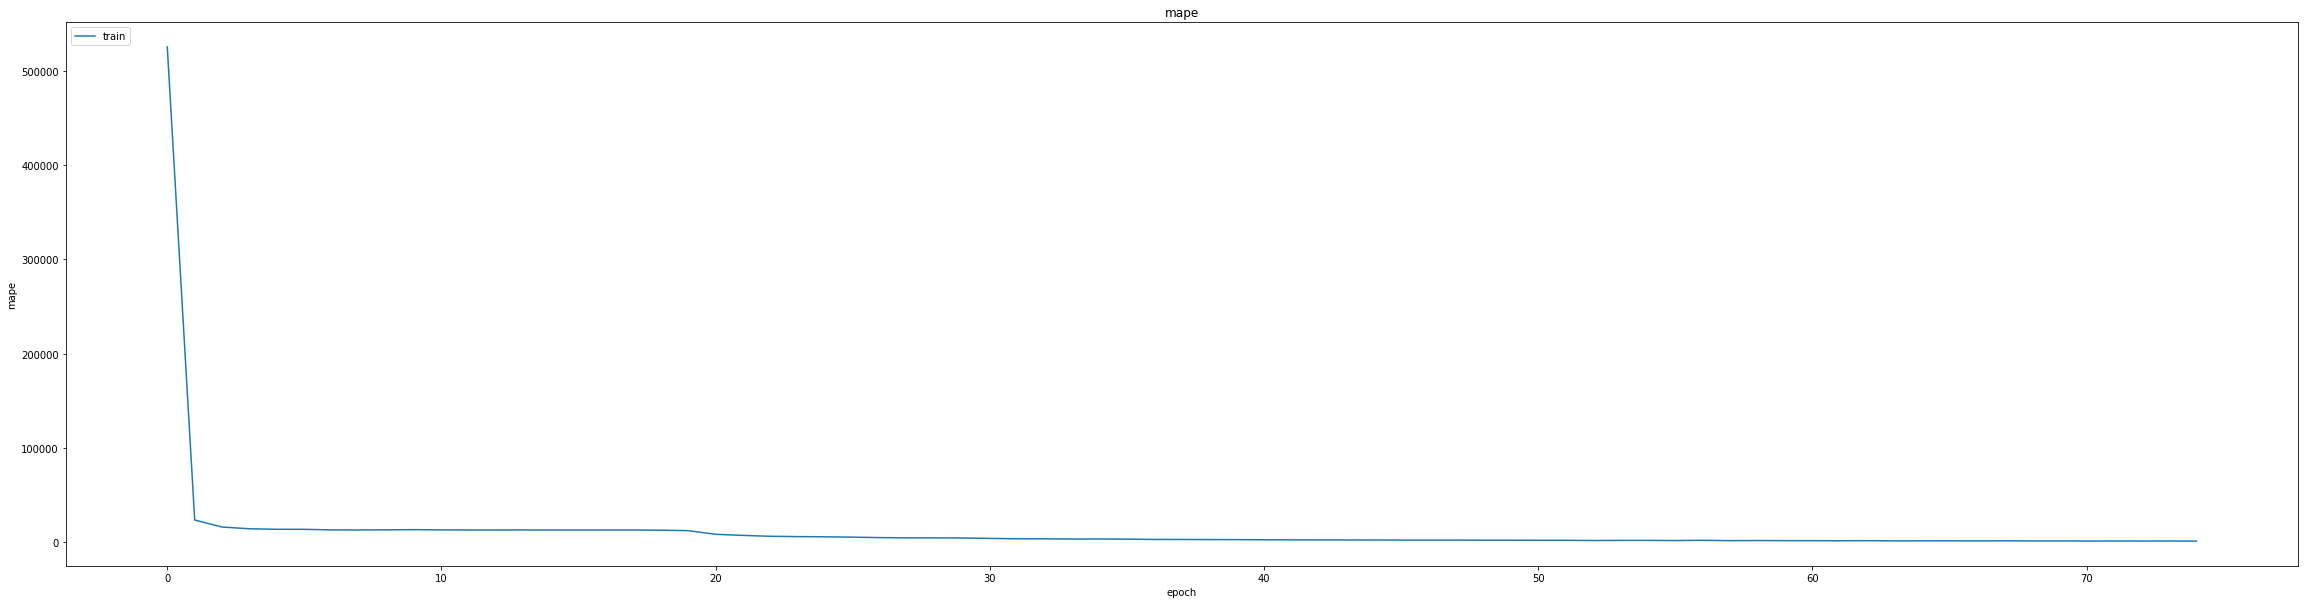

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.008104230277240276
0.008104230277240276
0.010681378655135632
348/348 [==============================] - 2s 4ms/step
0.9981403801449612


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
401/406 [============================>.] - ETA: 0s - loss: 5.0412e-04 - mae: 0.0103 - mse: 5.0412e-04 - root_mean_squared_error: 0.0225 - mape: 1220.4275
Epoch 1: val_mse did not improve from 0.00011
406/406 [==============================] - 9s 13ms/step - loss: 4.9870e-04 - mae: 0.0102 - mse: 4.9870e-04 - root_mean_squared_error: 0.0223 - mape: 1205.7374 - val_loss: 1.5442e-04 - val_mae: 0.0090 - val_mse: 1.5442e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 5929.6606 - lr: 0.0010
Epoch 2/25
403/406 [============================>.] - ETA: 0s - loss: 5.1691e-05 - mae: 0.0054 - mse: 5.1691e-05 - root_mean_squared_error: 0.0072 - mape: 1172.4198
Epoch 2: val_mse did not improve from 0.00011
406/406 [==============================] - 4s 10ms/step - loss: 5.1625e-05 - mae: 0.0054 - mse: 5.1625e-05 - root_mean_squared_error: 0.0072 - mape: 1164.0765 - val_loss: 1.3482e-04 - val_mae: 0.0089 - val_mse: 1.3482e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 5414.3271 -

406/406 [==============================] - 15s 36ms/step - loss: 5.5141e-05 - mae: 0.0058 - mse: 5.5141e-05 - root_mean_squared_error: 0.0074 - mape: 1049.7137 - val_loss: 8.3002e-05 - val_mae: 0.0067 - val_mse: 8.3002e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 4960.4609 - lr: 8.1000e-04
Epoch 6/25
403/406 [============================>.] - ETA: 0s - loss: 5.5986e-05 - mae: 0.0058 - mse: 5.5986e-05 - root_mean_squared_error: 0.0075 - mape: 1038.1744
Epoch 6: val_mse did not improve from 0.00008
406/406 [==============================] - 4s 10ms/step - loss: 5.5987e-05 - mae: 0.0058 - mse: 5.5987e-05 - root_mean_squared_error: 0.0075 - mape: 1030.7894 - val_loss: 9.5600e-05 - val_mae: 0.0079 - val_mse: 9.5600e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 4848.5679 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
406/406 [==============================] - ETA: 0s - loss: 4.9715e-05 - mae: 0.0054 - mse: 4.9715e-05 - root_mean_squared_error: 0.0071 - mape:

406/406 [==============================] - 14s 35ms/step - loss: 4.7129e-05 - mae: 0.0053 - mse: 4.7129e-05 - root_mean_squared_error: 0.0069 - mape: 967.1810 - val_loss: 6.2731e-05 - val_mae: 0.0059 - val_mse: 6.2731e-05 - val_root_mean_squared_error: 0.0079 - val_mape: 4804.3950 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
403/406 [============================>.] - ETA: 0s - loss: 4.7304e-05 - mae: 0.0054 - mse: 4.7304e-05 - root_mean_squared_error: 0.0069 - mape: 960.8789
Epoch 11: val_mse did not improve from 0.00006
406/406 [==============================] - 4s 10ms/step - loss: 4.7261e-05 - mae: 0.0054 - mse: 4.7261e-05 - root_mean_squared_error: 0.0069 - mape: 954.0445 - val_loss: 6.6756e-05 - val_mae: 0.0059 - val_mse: 6.6756e-05 - val_root_mean_squared_error: 0.0082 - val_mape: 4724.6230 - lr: 5.9049e-04
Epoch 12/25
406/406 [==============================] - ETA: 0s - loss: 3.7784e-05 - mae: 0.0047 - mse: 3.7784e-05 - root_mean_squared_error: 0.0061 - mape:

406/406 [==============================] - 14s 35ms/step - loss: 3.6373e-05 - mae: 0.0046 - mse: 3.6373e-05 - root_mean_squared_error: 0.0060 - mape: 893.5234 - val_loss: 5.8010e-05 - val_mae: 0.0058 - val_mse: 5.8010e-05 - val_root_mean_squared_error: 0.0076 - val_mape: 4598.0356 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
403/406 [============================>.] - ETA: 0s - loss: 3.4321e-05 - mae: 0.0045 - mse: 3.4321e-05 - root_mean_squared_error: 0.0059 - mape: 937.7392
Epoch 15: val_mse did not improve from 0.00006
406/406 [==============================] - 5s 12ms/step - loss: 3.4533e-05 - mae: 0.0045 - mse: 3.4533e-05 - root_mean_squared_error: 0.0059 - mape: 931.0687 - val_loss: 1.3463e-04 - val_mae: 0.0096 - val_mse: 1.3463e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 4781.0830 - lr: 4.7830e-04
Epoch 16/25
406/406 [==============================] - ETA: 0s - loss: 3.1807e-05 - mae: 0.0043 - mse: 3.1807e-05 - root_mean_squared_error: 0.0056 - mape

406/406 [==============================] - 14s 34ms/step - loss: 2.4690e-05 - mae: 0.0038 - mse: 2.4690e-05 - root_mean_squared_error: 0.0050 - mape: 865.5400 - val_loss: 5.7043e-05 - val_mae: 0.0057 - val_mse: 5.7043e-05 - val_root_mean_squared_error: 0.0076 - val_mape: 4328.2383 - lr: 2.8243e-04


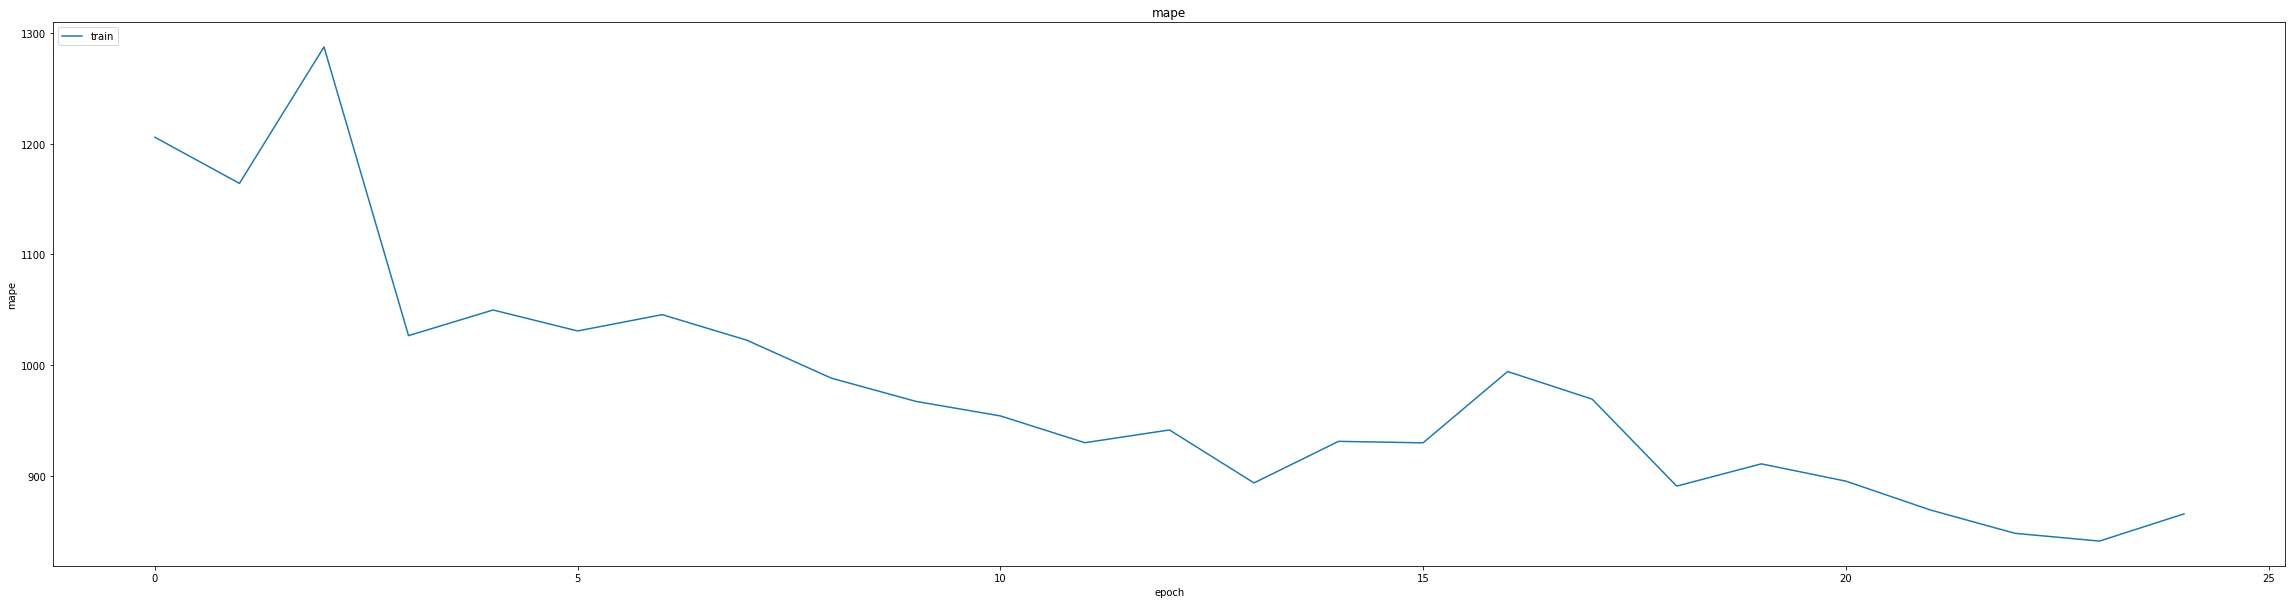

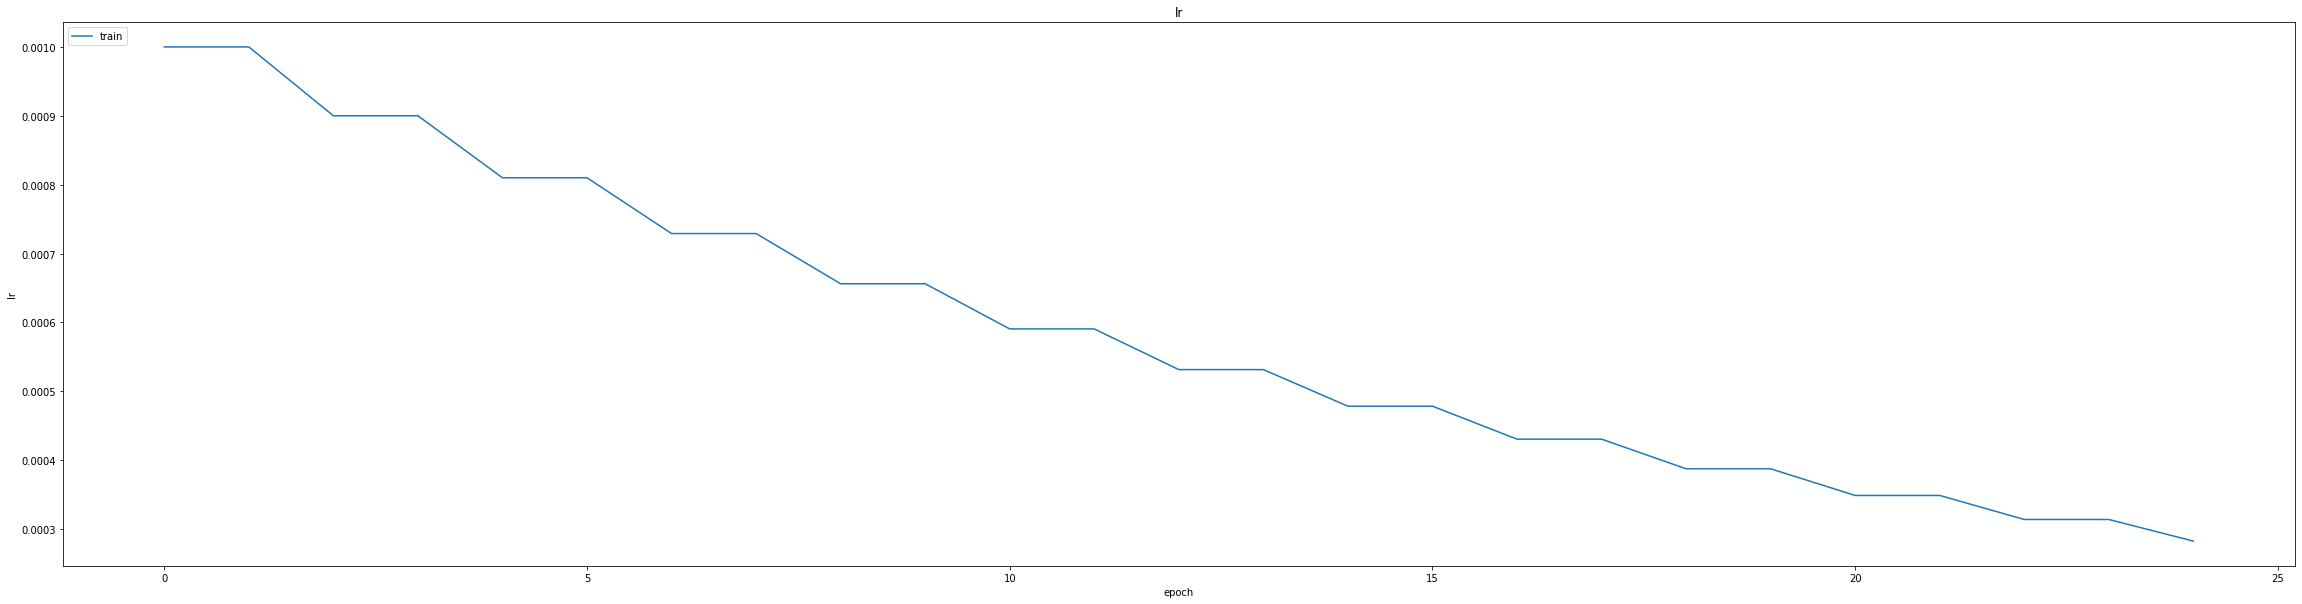

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.005670385900884867
0.005670385900884867
0.007552698254585266
348/348 [==============================] - 2s 3ms/step
0.9992303907716362


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(70-30)")

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

348/348 [==============================] - 1s 3ms/step


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


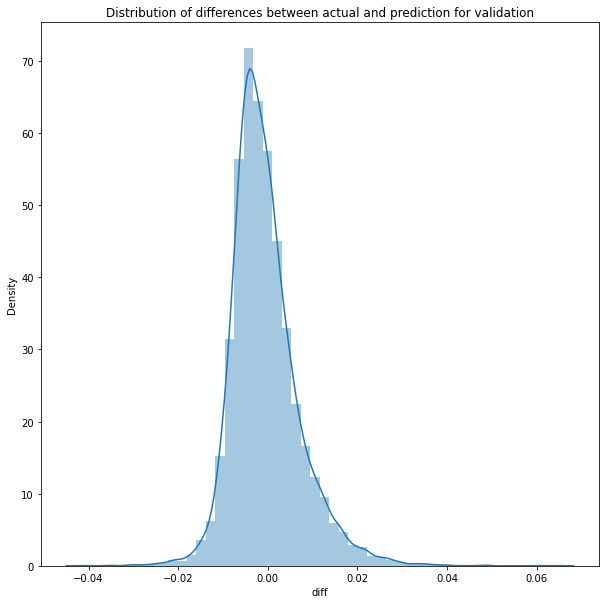

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


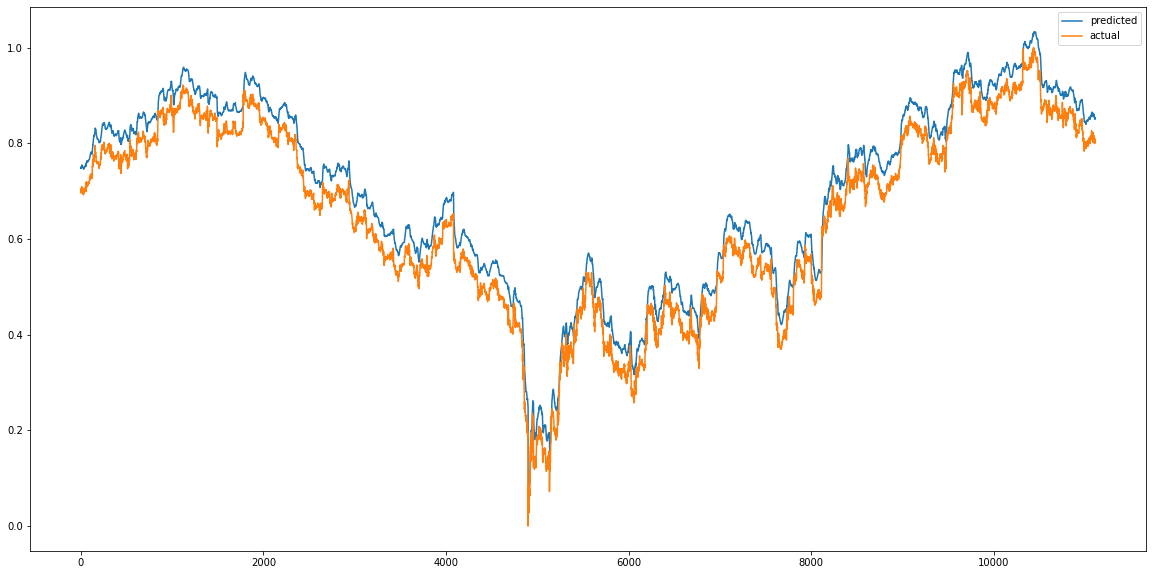

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


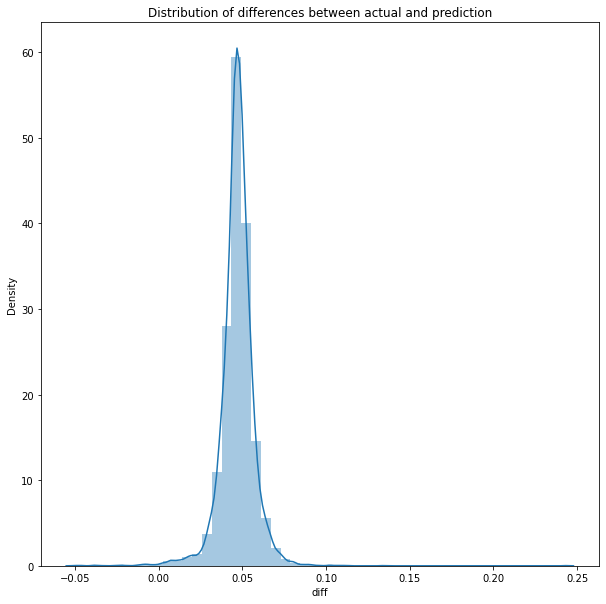

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.002310527713877693
RMSE :  0.0480679489252214
MAE :  0.04707687684291663
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9413902638855458


count    11115.000000
mean         0.046977
std          0.010182
min         -0.050518
25%          0.042789
50%          0.047228
75%          0.051820
max          0.243049
Name: diff, dtype: float64